In [26]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

import os, sys
sys.path.append(os.path.join("../../../"))

# our library
from src.mcmc_sat import mcmc, utils

In [21]:
A = np.array([[1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
             [0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
             [0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
             [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
             [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
             [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
             [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
             [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
             [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
             [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
             [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0],
             [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1],
             [1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

y=np.array([3,12,1,21,86,16,2,24,5,184,822,163,40,102,13,58,253,38,18,104,40,19,147,25,52,220,35,1,3,6,8,36,5,1,14,2,1,10,13,3,43,4])

In [22]:
bound = 10
num_bits = 8
num_vars = A.shape[1]
trace = mcmc.sample_mh_trace_from_conf_matrix_sat(A=A[:bound], y=y[:bound],
                                                  num_bits=8,
                                                  max_int_bv=32,
                                                  num_samples=10000,
                                                  num_chains=4)

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	4078/4078/0
independent support size:  	0
clauses (all/long/binary/unit): 16433/12342/3902/189
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	320 MB

STAGE #1: Build the initial partial assignments



time elapsed: 60.1982s



time elapsed: 121.199s



time elapsed: 182.201s



time elapsed: 243.199s



time elapsed: 304.199s



time elapsed: 365.198s


ZH - Rehash the table.
ts 1048576 1048575
ZH - Number of collisions.
coll 28602



time elapsed: 426.199s



time elapsed: 487.199s



time elapsed: 548.198s



time elapsed: 609.198s


ZH - Rehash the table.
ts 1048576 1048575
ZH - Number of collisions.
coll 26130



time elapsed: 670.198s



time elapsed: 731.198s



time elapsed: 792.199s


STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...


Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	320 MB



Completing sample #1 of 10000 which has 330 variables unset and 1 sample.
Completing sample #2 of 10000 which has 414 variables unset and 1 sample.
Completing sample #3 of 10000 which has 391 variables unset and 1 sample.
Completing sample #4 of 10000 which has 407 variables unset and 1 sample.
Completing sample #5 of 10000 which has 338 variables unset and 1 sample.
Completing sample #6 of 10000 which has 332 variables unset and 1 sample.
Completing sample #7 of 10000 which has 290 variables unset and 1 sample.
Completing sample #8 of 10000 which has 401 variables unset and 1 sample.


Completing sample #9 of 10000 which has 275 variables unset and 1 sample.
Completing sample #10 of 10000 which has 230 variables unset and 1 sample.
Completing sample #11 of 10000 which has 314 variables unset and 1 sample.
Completing sample #12 of 10000 which has 289 variables unset and 1 sample.
Completing sample #13 of 10000 which has 242 variables unset and 1 sample.
Completing sample #14 of 10000 which has 404 variables unset and 1 sample.
Completing sample #15 of 10000 which has 298 variables unset and 1 sample.


Completing sample #16 of 10000 which has 317 variables unset and 1 sample.
Completing sample #17 of 10000 which has 288 variables unset and 1 sample.
Completing sample #18 of 10000 which has 270 variables unset and 1 sample.
Completing sample #19 of 10000 which has 253 variables unset and 1 sample.
Completing sample #20 of 10000 which has 392 variables unset and 1 sample.
Completing sample #21 of 10000 which has 338 variables unset and 1 sample.


Completing sample #22 of 10000 which has 133 variables unset and 1 sample.
Completing sample #23 of 10000 which has 419 variables unset and 1 sample.
Completing sample #24 of 10000 which has 208 variables unset and 1 sample.
Completing sample #25 of 10000 which has 274 variables unset and 1 sample.
Completing sample #26 of 10000 which has 223 variables unset and 1 sample.
Completing sample #27 of 10000 which has 205 variables unset and 1 sample.


Completing sample #28 of 10000 which has 335 variables unset and 1 sample.
Completing sample #29 of 10000 which has 151 variables unset and 1 sample.
Completing sample #30 of 10000 which has 294 variables unset and 1 sample.
Completing sample #31 of 10000 which has 426 variables unset and 1 sample.
Completing sample #32 of 10000 which has 467 variables unset and 1 sample.
Completing sample #33 of 10000 which has 290 variables unset and 1 sample.


Completing sample #34 of 10000 which has 307 variables unset and 1 sample.
Completing sample #35 of 10000 which has 398 variables unset and 1 sample.
Completing sample #36 of 10000 which has 369 variables unset and 1 sample.
Completing sample #37 of 10000 which has 404 variables unset and 1 sample.
Completing sample #38 of 10000 which has 414 variables unset and 1 sample.


Completing sample #39 of 10000 which has 165 variables unset and 1 sample.
Completing sample #40 of 10000 which has 298 variables unset and 1 sample.
Completing sample #41 of 10000 which has 181 variables unset and 1 sample.
Completing sample #42 of 10000 which has 387 variables unset and 1 sample.
Completing sample #43 of 10000 which has 471 variables unset and 1 sample.


Completing sample #44 of 10000 which has 213 variables unset and 1 sample.
Completing sample #45 of 10000 which has 278 variables unset and 1 sample.
Completing sample #46 of 10000 which has 318 variables unset and 1 sample.
Completing sample #47 of 10000 which has 373 variables unset and 1 sample.
Completing sample #48 of 10000 which has 246 variables unset and 1 sample.
Completing sample #49 of 10000 which has 348 variables unset and 1 sample.


Completing sample #50 of 10000 which has 257 variables unset and 1 sample.
Completing sample #51 of 10000 which has 470 variables unset and 1 sample.
Completing sample #52 of 10000 which has 199 variables unset and 1 sample.
Completing sample #53 of 10000 which has 262 variables unset and 1 sample.
Completing sample #54 of 10000 which has 343 variables unset and 1 sample.
Completing sample #55 of 10000 which has 250 variables unset and 1 sample.


Completing sample #56 of 10000 which has 231 variables unset and 1 sample.
Completing sample #57 of 10000 which has 303 variables unset and 1 sample.
Completing sample #58 of 10000 which has 200 variables unset and 1 sample.
Completing sample #59 of 10000 which has 262 variables unset and 1 sample.
Completing sample #60 of 10000 which has 296 variables unset and 1 sample.
Completing sample #61 of 10000 which has 308 variables unset and 1 sample.
Completing sample #62 of 10000 which has 323 variables unset and 1 sample.


Completing sample #63 of 10000 which has 368 variables unset and 1 sample.
Completing sample #64 of 10000 which has 276 variables unset and 1 sample.
Completing sample #65 of 10000 which has 409 variables unset and 1 sample.
Completing sample #66 of 10000 which has 303 variables unset and 1 sample.
Completing sample #67 of 10000 which has 291 variables unset and 1 sample.
Completing sample #68 of 10000 which has 254 variables unset and 1 sample.
Completing sample #69 of 10000 which has 238 variables unset and 1 sample.
Completing sample #70 of 10000 which has 477 variables unset and 1 sample.


Completing sample #71 of 10000 which has 305 variables unset and 1 sample.
Completing sample #72 of 10000 which has 369 variables unset and 1 sample.
Completing sample #73 of 10000 which has 299 variables unset and 1 sample.
Completing sample #74 of 10000 which has 330 variables unset and 1 sample.
Completing sample #75 of 10000 which has 333 variables unset and 1 sample.
Completing sample #76 of 10000 which has 219 variables unset and 1 sample.
Completing sample #77 of 10000 which has 211 variables unset and 1 sample.
Completing sample #78 of 10000 which has 317 variables unset and 1 sample.


Completing sample #79 of 10000 which has 280 variables unset and 1 sample.
Completing sample #80 of 10000 which has 298 variables unset and 1 sample.
Completing sample #81 of 10000 which has 243 variables unset and 1 sample.
Completing sample #82 of 10000 which has 232 variables unset and 1 sample.
Completing sample #83 of 10000 which has 204 variables unset and 1 sample.
Completing sample #84 of 10000 which has 127 variables unset and 1 sample.
Completing sample #85 of 10000 which has 243 variables unset and 1 sample.
Completing sample #86 of 10000 which has 341 variables unset and 1 sample.
Completing sample #87 of 10000 which has 304 variables unset and 1 sample.


Completing sample #88 of 10000 which has 176 variables unset and 1 sample.
Completing sample #89 of 10000 which has 252 variables unset and 1 sample.
Completing sample #90 of 10000 which has 302 variables unset and 1 sample.
Completing sample #91 of 10000 which has 330 variables unset and 1 sample.
Completing sample #92 of 10000 which has 221 variables unset and 1 sample.
Completing sample #93 of 10000 which has 343 variables unset and 1 sample.
Completing sample #94 of 10000 which has 333 variables unset and 1 sample.
Completing sample #95 of 10000 which has 351 variables unset and 1 sample.
Completing sample #96 of 10000 which has 241 variables unset and 1 sample.
Completing sample #97 of 10000 which has 298 variables unset and 1 sample.


Completing sample #98 of 10000 which has 226 variables unset and 1 sample.
Completing sample #99 of 10000 which has 387 variables unset and 1 sample.
Completing sample #100 of 10000 which has 214 variables unset and 1 sample.
Completing sample #101 of 10000 which has 395 variables unset and 1 sample.
Completing sample #102 of 10000 which has 220 variables unset and 1 sample.
Completing sample #103 of 10000 which has 400 variables unset and 1 sample.
Completing sample #104 of 10000 which has 212 variables unset and 1 sample.
Completing sample #105 of 10000 which has 306 variables unset and 1 sample.


Completing sample #106 of 10000 which has 388 variables unset and 1 sample.
Completing sample #107 of 10000 which has 261 variables unset and 1 sample.
Completing sample #108 of 10000 which has 359 variables unset and 1 sample.
Completing sample #109 of 10000 which has 194 variables unset and 1 sample.
Completing sample #110 of 10000 which has 332 variables unset and 1 sample.
Completing sample #111 of 10000 which has 327 variables unset and 1 sample.
Completing sample #112 of 10000 which has 296 variables unset and 1 sample.
Completing sample #113 of 10000 which has 238 variables unset and 1 sample.
Completing sample #114 of 10000 which has 405 variables unset and 1 sample.


Completing sample #115 of 10000 which has 157 variables unset and 1 sample.
Completing sample #116 of 10000 which has 147 variables unset and 1 sample.
Completing sample #117 of 10000 which has 491 variables unset and 1 sample.
Completing sample #118 of 10000 which has 404 variables unset and 1 sample.
Completing sample #119 of 10000 which has 388 variables unset and 1 sample.
Completing sample #120 of 10000 which has 357 variables unset and 1 sample.
Completing sample #121 of 10000 which has 271 variables unset and 1 sample.
Completing sample #122 of 10000 which has 248 variables unset and 1 sample.
Completing sample #123 of 10000 which has 356 variables unset and 1 sample.


Completing sample #124 of 10000 which has 452 variables unset and 1 sample.
Completing sample #125 of 10000 which has 411 variables unset and 1 sample.
Completing sample #126 of 10000 which has 275 variables unset and 1 sample.
Completing sample #127 of 10000 which has 264 variables unset and 1 sample.
Completing sample #128 of 10000 which has 369 variables unset and 1 sample.
Completing sample #129 of 10000 which has 216 variables unset and 1 sample.
Completing sample #130 of 10000 which has 445 variables unset and 1 sample.
Completing sample #131 of 10000 which has 506 variables unset and 1 sample.


Completing sample #132 of 10000 which has 288 variables unset and 1 sample.
Completing sample #133 of 10000 which has 452 variables unset and 1 sample.
Completing sample #134 of 10000 which has 307 variables unset and 1 sample.
Completing sample #135 of 10000 which has 397 variables unset and 1 sample.
Completing sample #136 of 10000 which has 204 variables unset and 1 sample.
Completing sample #137 of 10000 which has 200 variables unset and 1 sample.
Completing sample #138 of 10000 which has 311 variables unset and 1 sample.
Completing sample #139 of 10000 which has 194 variables unset and 1 sample.
Completing sample #140 of 10000 which has 311 variables unset and 1 sample.
Completing sample #141 of 10000 which has 243 variables unset and 1 sample.


Completing sample #142 of 10000 which has 384 variables unset and 1 sample.
Completing sample #143 of 10000 which has 316 variables unset and 1 sample.
Completing sample #144 of 10000 which has 262 variables unset and 1 sample.
Completing sample #145 of 10000 which has 343 variables unset and 1 sample.
Completing sample #146 of 10000 which has 355 variables unset and 1 sample.
Completing sample #147 of 10000 which has 364 variables unset and 1 sample.
Completing sample #148 of 10000 which has 279 variables unset and 1 sample.
Completing sample #149 of 10000 which has 156 variables unset and 1 sample.
Completing sample #150 of 10000 which has 512 variables unset and 1 sample.


Completing sample #151 of 10000 which has 439 variables unset and 1 sample.
Completing sample #152 of 10000 which has 284 variables unset and 1 sample.
Completing sample #153 of 10000 which has 313 variables unset and 1 sample.
Completing sample #154 of 10000 which has 422 variables unset and 1 sample.
Completing sample #155 of 10000 which has 532 variables unset and 1 sample.
Completing sample #156 of 10000 which has 407 variables unset and 1 sample.
Completing sample #157 of 10000 which has 316 variables unset and 1 sample.
Completing sample #158 of 10000 which has 373 variables unset and 1 sample.


Completing sample #159 of 10000 which has 317 variables unset and 1 sample.
Completing sample #160 of 10000 which has 284 variables unset and 1 sample.
Completing sample #161 of 10000 which has 344 variables unset and 1 sample.
Completing sample #162 of 10000 which has 240 variables unset and 1 sample.
Completing sample #163 of 10000 which has 226 variables unset and 1 sample.
Completing sample #164 of 10000 which has 369 variables unset and 1 sample.
Completing sample #165 of 10000 which has 264 variables unset and 1 sample.
Completing sample #166 of 10000 which has 277 variables unset and 1 sample.
Completing sample #167 of 10000 which has 355 variables unset and 1 sample.


Completing sample #168 of 10000 which has 350 variables unset and 1 sample.
Completing sample #169 of 10000 which has 544 variables unset and 1 sample.
Completing sample #170 of 10000 which has 410 variables unset and 1 sample.
Completing sample #171 of 10000 which has 430 variables unset and 1 sample.
Completing sample #172 of 10000 which has 421 variables unset and 1 sample.
Completing sample #173 of 10000 which has 316 variables unset and 1 sample.
Completing sample #174 of 10000 which has 446 variables unset and 1 sample.
Completing sample #175 of 10000 which has 294 variables unset and 1 sample.


Completing sample #176 of 10000 which has 428 variables unset and 1 sample.
Completing sample #177 of 10000 which has 282 variables unset and 1 sample.
Completing sample #178 of 10000 which has 260 variables unset and 1 sample.
Completing sample #179 of 10000 which has 272 variables unset and 1 sample.
Completing sample #180 of 10000 which has 376 variables unset and 1 sample.
Completing sample #181 of 10000 which has 323 variables unset and 1 sample.
Completing sample #182 of 10000 which has 327 variables unset and 1 sample.
Completing sample #183 of 10000 which has 338 variables unset and 1 sample.
Completing sample #184 of 10000 which has 292 variables unset and 1 sample.


Completing sample #185 of 10000 which has 251 variables unset and 1 sample.
Completing sample #186 of 10000 which has 372 variables unset and 1 sample.
Completing sample #187 of 10000 which has 254 variables unset and 1 sample.
Completing sample #188 of 10000 which has 246 variables unset and 1 sample.
Completing sample #189 of 10000 which has 272 variables unset and 1 sample.
Completing sample #190 of 10000 which has 380 variables unset and 1 sample.
Completing sample #191 of 10000 which has 365 variables unset and 1 sample.
Completing sample #192 of 10000 which has 280 variables unset and 1 sample.
Completing sample #193 of 10000 which has 287 variables unset and 1 sample.


Completing sample #194 of 10000 which has 281 variables unset and 1 sample.
Completing sample #195 of 10000 which has 271 variables unset and 1 sample.
Completing sample #196 of 10000 which has 221 variables unset and 1 sample.
Completing sample #197 of 10000 which has 421 variables unset and 1 sample.
Completing sample #198 of 10000 which has 234 variables unset and 1 sample.
Completing sample #199 of 10000 which has 400 variables unset and 1 sample.
Completing sample #200 of 10000 which has 390 variables unset and 1 sample.
Completing sample #201 of 10000 which has 429 variables unset and 1 sample.
Completing sample #202 of 10000 which has 363 variables unset and 1 sample.


Completing sample #203 of 10000 which has 484 variables unset and 1 sample.
Completing sample #204 of 10000 which has 282 variables unset and 1 sample.
Completing sample #205 of 10000 which has 267 variables unset and 1 sample.
Completing sample #206 of 10000 which has 206 variables unset and 1 sample.
Completing sample #207 of 10000 which has 350 variables unset and 1 sample.
Completing sample #208 of 10000 which has 213 variables unset and 1 sample.
Completing sample #209 of 10000 which has 208 variables unset and 1 sample.


Completing sample #210 of 10000 which has 369 variables unset and 1 sample.
Completing sample #211 of 10000 which has 414 variables unset and 1 sample.
Completing sample #212 of 10000 which has 488 variables unset and 1 sample.
Completing sample #213 of 10000 which has 179 variables unset and 1 sample.
Completing sample #214 of 10000 which has 214 variables unset and 1 sample.
Completing sample #215 of 10000 which has 254 variables unset and 1 sample.
Completing sample #216 of 10000 which has 345 variables unset and 1 sample.


Completing sample #217 of 10000 which has 183 variables unset and 1 sample.
Completing sample #218 of 10000 which has 249 variables unset and 1 sample.
Completing sample #219 of 10000 which has 164 variables unset and 1 sample.
Completing sample #220 of 10000 which has 429 variables unset and 1 sample.
Completing sample #221 of 10000 which has 434 variables unset and 1 sample.
Completing sample #222 of 10000 which has 286 variables unset and 1 sample.
Completing sample #223 of 10000 which has 262 variables unset and 1 sample.
Completing sample #224 of 10000 which has 207 variables unset and 1 sample.


Completing sample #225 of 10000 which has 385 variables unset and 1 sample.
Completing sample #226 of 10000 which has 326 variables unset and 1 sample.
Completing sample #227 of 10000 which has 430 variables unset and 1 sample.
Completing sample #228 of 10000 which has 249 variables unset and 1 sample.
Completing sample #229 of 10000 which has 132 variables unset and 1 sample.
Completing sample #230 of 10000 which has 202 variables unset and 1 sample.
Completing sample #231 of 10000 which has 426 variables unset and 1 sample.


Completing sample #232 of 10000 which has 256 variables unset and 1 sample.
Completing sample #233 of 10000 which has 234 variables unset and 1 sample.
Completing sample #234 of 10000 which has 484 variables unset and 1 sample.
Completing sample #235 of 10000 which has 385 variables unset and 1 sample.
Completing sample #236 of 10000 which has 222 variables unset and 1 sample.
Completing sample #237 of 10000 which has 333 variables unset and 1 sample.
Completing sample #238 of 10000 which has 394 variables unset and 1 sample.
Completing sample #239 of 10000 which has 365 variables unset and 1 sample.
Completing sample #240 of 10000 which has 280 variables unset and 1 sample.


Completing sample #241 of 10000 which has 164 variables unset and 1 sample.
Completing sample #242 of 10000 which has 206 variables unset and 1 sample.
Completing sample #243 of 10000 which has 291 variables unset and 1 sample.
Completing sample #244 of 10000 which has 435 variables unset and 1 sample.
Completing sample #245 of 10000 which has 333 variables unset and 1 sample.
Completing sample #246 of 10000 which has 283 variables unset and 1 sample.
Completing sample #247 of 10000 which has 370 variables unset and 1 sample.
Completing sample #248 of 10000 which has 272 variables unset and 1 sample.
Completing sample #249 of 10000 which has 244 variables unset and 1 sample.
Completing sample #250 of 10000 which has 247 variables unset and 1 sample.


Completing sample #251 of 10000 which has 274 variables unset and 1 sample.
Completing sample #252 of 10000 which has 222 variables unset and 1 sample.
Completing sample #253 of 10000 which has 223 variables unset and 1 sample.
Completing sample #254 of 10000 which has 196 variables unset and 1 sample.
Completing sample #255 of 10000 which has 313 variables unset and 1 sample.
Completing sample #256 of 10000 which has 415 variables unset and 1 sample.
Completing sample #257 of 10000 which has 323 variables unset and 1 sample.
Completing sample #258 of 10000 which has 321 variables unset and 1 sample.
Completing sample #259 of 10000 which has 261 variables unset and 1 sample.


Completing sample #260 of 10000 which has 286 variables unset and 1 sample.
Completing sample #261 of 10000 which has 322 variables unset and 1 sample.
Completing sample #262 of 10000 which has 406 variables unset and 1 sample.
Completing sample #263 of 10000 which has 226 variables unset and 1 sample.
Completing sample #264 of 10000 which has 338 variables unset and 1 sample.
Completing sample #265 of 10000 which has 142 variables unset and 1 sample.
Completing sample #266 of 10000 which has 351 variables unset and 1 sample.
Completing sample #267 of 10000 which has 422 variables unset and 1 sample.
Completing sample #268 of 10000 which has 165 variables unset and 1 sample.


Completing sample #269 of 10000 which has 256 variables unset and 1 sample.
Completing sample #270 of 10000 which has 414 variables unset and 1 sample.
Completing sample #271 of 10000 which has 227 variables unset and 1 sample.
Completing sample #272 of 10000 which has 249 variables unset and 1 sample.
Completing sample #273 of 10000 which has 231 variables unset and 1 sample.
Completing sample #274 of 10000 which has 236 variables unset and 1 sample.
Completing sample #275 of 10000 which has 348 variables unset and 1 sample.
Completing sample #276 of 10000 which has 357 variables unset and 1 sample.


Completing sample #277 of 10000 which has 237 variables unset and 1 sample.
Completing sample #278 of 10000 which has 327 variables unset and 1 sample.
Completing sample #279 of 10000 which has 278 variables unset and 1 sample.
Completing sample #280 of 10000 which has 245 variables unset and 1 sample.
Completing sample #281 of 10000 which has 326 variables unset and 1 sample.
Completing sample #282 of 10000 which has 250 variables unset and 1 sample.
Completing sample #283 of 10000 which has 281 variables unset and 1 sample.
Completing sample #284 of 10000 which has 313 variables unset and 1 sample.


Completing sample #285 of 10000 which has 305 variables unset and 1 sample.
Completing sample #286 of 10000 which has 417 variables unset and 1 sample.
Completing sample #287 of 10000 which has 419 variables unset and 1 sample.
Completing sample #288 of 10000 which has 472 variables unset and 1 sample.
Completing sample #289 of 10000 which has 360 variables unset and 1 sample.
Completing sample #290 of 10000 which has 349 variables unset and 1 sample.
Completing sample #291 of 10000 which has 227 variables unset and 1 sample.
Completing sample #292 of 10000 which has 304 variables unset and 1 sample.
Completing sample #293 of 10000 which has 270 variables unset and 1 sample.


Completing sample #294 of 10000 which has 406 variables unset and 1 sample.
Completing sample #295 of 10000 which has 357 variables unset and 1 sample.
Completing sample #296 of 10000 which has 346 variables unset and 1 sample.
Completing sample #297 of 10000 which has 418 variables unset and 1 sample.
Completing sample #298 of 10000 which has 358 variables unset and 1 sample.
Completing sample #299 of 10000 which has 594 variables unset and 1 sample.
Completing sample #300 of 10000 which has 414 variables unset and 1 sample.
Completing sample #301 of 10000 which has 391 variables unset and 1 sample.


Completing sample #302 of 10000 which has 309 variables unset and 1 sample.
Completing sample #303 of 10000 which has 298 variables unset and 1 sample.
Completing sample #304 of 10000 which has 377 variables unset and 1 sample.
Completing sample #305 of 10000 which has 325 variables unset and 1 sample.
Completing sample #306 of 10000 which has 481 variables unset and 1 sample.
Completing sample #307 of 10000 which has 232 variables unset and 1 sample.
Completing sample #308 of 10000 which has 270 variables unset and 1 sample.
Completing sample #309 of 10000 which has 258 variables unset and 1 sample.
Completing sample #310 of 10000 which has 442 variables unset and 1 sample.


Completing sample #311 of 10000 which has 344 variables unset and 1 sample.
Completing sample #312 of 10000 which has 261 variables unset and 1 sample.
Completing sample #313 of 10000 which has 182 variables unset and 1 sample.
Completing sample #314 of 10000 which has 462 variables unset and 1 sample.
Completing sample #315 of 10000 which has 323 variables unset and 1 sample.
Completing sample #316 of 10000 which has 354 variables unset and 1 sample.
Completing sample #317 of 10000 which has 336 variables unset and 1 sample.
Completing sample #318 of 10000 which has 258 variables unset and 1 sample.
Completing sample #319 of 10000 which has 224 variables unset and 1 sample.


Completing sample #320 of 10000 which has 195 variables unset and 1 sample.
Completing sample #321 of 10000 which has 325 variables unset and 1 sample.
Completing sample #322 of 10000 which has 367 variables unset and 1 sample.
Completing sample #323 of 10000 which has 463 variables unset and 1 sample.
Completing sample #324 of 10000 which has 410 variables unset and 1 sample.
Completing sample #325 of 10000 which has 355 variables unset and 1 sample.
Completing sample #326 of 10000 which has 479 variables unset and 1 sample.


Completing sample #327 of 10000 which has 277 variables unset and 1 sample.
Completing sample #328 of 10000 which has 221 variables unset and 1 sample.
Completing sample #329 of 10000 which has 248 variables unset and 1 sample.
Completing sample #330 of 10000 which has 340 variables unset and 1 sample.
Completing sample #331 of 10000 which has 279 variables unset and 1 sample.
Completing sample #332 of 10000 which has 401 variables unset and 1 sample.
Completing sample #333 of 10000 which has 272 variables unset and 1 sample.
Completing sample #334 of 10000 which has 217 variables unset and 1 sample.
Completing sample #335 of 10000 which has 325 variables unset and 1 sample.


Completing sample #336 of 10000 which has 372 variables unset and 1 sample.
Completing sample #337 of 10000 which has 296 variables unset and 1 sample.
Completing sample #338 of 10000 which has 410 variables unset and 1 sample.
Completing sample #339 of 10000 which has 251 variables unset and 1 sample.
Completing sample #340 of 10000 which has 266 variables unset and 1 sample.
Completing sample #341 of 10000 which has 365 variables unset and 1 sample.
Completing sample #342 of 10000 which has 181 variables unset and 1 sample.
Completing sample #343 of 10000 which has 259 variables unset and 1 sample.


Completing sample #344 of 10000 which has 184 variables unset and 1 sample.
Completing sample #345 of 10000 which has 444 variables unset and 1 sample.
Completing sample #346 of 10000 which has 282 variables unset and 1 sample.
Completing sample #347 of 10000 which has 289 variables unset and 1 sample.
Completing sample #348 of 10000 which has 556 variables unset and 1 sample.
Completing sample #349 of 10000 which has 222 variables unset and 1 sample.
Completing sample #350 of 10000 which has 449 variables unset and 1 sample.


Completing sample #351 of 10000 which has 451 variables unset and 1 sample.
Completing sample #352 of 10000 which has 262 variables unset and 1 sample.
Completing sample #353 of 10000 which has 145 variables unset and 1 sample.
Completing sample #354 of 10000 which has 189 variables unset and 1 sample.
Completing sample #355 of 10000 which has 371 variables unset and 1 sample.
Completing sample #356 of 10000 which has 344 variables unset and 1 sample.
Completing sample #357 of 10000 which has 419 variables unset and 1 sample.


Completing sample #358 of 10000 which has 407 variables unset and 1 sample.
Completing sample #359 of 10000 which has 345 variables unset and 1 sample.
Completing sample #360 of 10000 which has 327 variables unset and 1 sample.
Completing sample #361 of 10000 which has 227 variables unset and 1 sample.
Completing sample #362 of 10000 which has 331 variables unset and 1 sample.
Completing sample #363 of 10000 which has 384 variables unset and 1 sample.
Completing sample #364 of 10000 which has 220 variables unset and 1 sample.
Completing sample #365 of 10000 which has 337 variables unset and 1 sample.


Completing sample #366 of 10000 which has 218 variables unset and 1 sample.
Completing sample #367 of 10000 which has 301 variables unset and 1 sample.
Completing sample #368 of 10000 which has 426 variables unset and 1 sample.
Completing sample #369 of 10000 which has 277 variables unset and 1 sample.
Completing sample #370 of 10000 which has 222 variables unset and 1 sample.
Completing sample #371 of 10000 which has 304 variables unset and 1 sample.
Completing sample #372 of 10000 which has 284 variables unset and 1 sample.
Completing sample #373 of 10000 which has 480 variables unset and 1 sample.


Completing sample #374 of 10000 which has 277 variables unset and 1 sample.
Completing sample #375 of 10000 which has 373 variables unset and 1 sample.
Completing sample #376 of 10000 which has 405 variables unset and 1 sample.
Completing sample #377 of 10000 which has 292 variables unset and 1 sample.
Completing sample #378 of 10000 which has 197 variables unset and 1 sample.
Completing sample #379 of 10000 which has 325 variables unset and 1 sample.
Completing sample #380 of 10000 which has 461 variables unset and 1 sample.


Completing sample #381 of 10000 which has 377 variables unset and 1 sample.
Completing sample #382 of 10000 which has 472 variables unset and 1 sample.
Completing sample #383 of 10000 which has 212 variables unset and 1 sample.
Completing sample #384 of 10000 which has 229 variables unset and 1 sample.
Completing sample #385 of 10000 which has 435 variables unset and 1 sample.
Completing sample #386 of 10000 which has 440 variables unset and 1 sample.
Completing sample #387 of 10000 which has 324 variables unset and 1 sample.
Completing sample #388 of 10000 which has 353 variables unset and 1 sample.


Completing sample #389 of 10000 which has 227 variables unset and 1 sample.
Completing sample #390 of 10000 which has 307 variables unset and 1 sample.
Completing sample #391 of 10000 which has 337 variables unset and 1 sample.
Completing sample #392 of 10000 which has 305 variables unset and 1 sample.
Completing sample #393 of 10000 which has 255 variables unset and 1 sample.
Completing sample #394 of 10000 which has 278 variables unset and 1 sample.
Completing sample #395 of 10000 which has 328 variables unset and 1 sample.


Completing sample #396 of 10000 which has 226 variables unset and 1 sample.
Completing sample #397 of 10000 which has 309 variables unset and 1 sample.
Completing sample #398 of 10000 which has 406 variables unset and 1 sample.
Completing sample #399 of 10000 which has 268 variables unset and 1 sample.
Completing sample #400 of 10000 which has 165 variables unset and 1 sample.
Completing sample #401 of 10000 which has 289 variables unset and 1 sample.
Completing sample #402 of 10000 which has 236 variables unset and 1 sample.
Completing sample #403 of 10000 which has 242 variables unset and 1 sample.


Completing sample #404 of 10000 which has 234 variables unset and 1 sample.
Completing sample #405 of 10000 which has 315 variables unset and 1 sample.
Completing sample #406 of 10000 which has 391 variables unset and 1 sample.
Completing sample #407 of 10000 which has 319 variables unset and 1 sample.
Completing sample #408 of 10000 which has 405 variables unset and 1 sample.
Completing sample #409 of 10000 which has 282 variables unset and 1 sample.
Completing sample #410 of 10000 which has 167 variables unset and 1 sample.
Completing sample #411 of 10000 which has 71 variables unset and 1 sample.


Completing sample #412 of 10000 which has 371 variables unset and 1 sample.
Completing sample #413 of 10000 which has 497 variables unset and 1 sample.
Completing sample #414 of 10000 which has 312 variables unset and 1 sample.
Completing sample #415 of 10000 which has 345 variables unset and 1 sample.
Completing sample #416 of 10000 which has 86 variables unset and 1 sample.
Completing sample #417 of 10000 which has 413 variables unset and 1 sample.
Completing sample #418 of 10000 which has 249 variables unset and 1 sample.
Completing sample #419 of 10000 which has 315 variables unset and 1 sample.


Completing sample #420 of 10000 which has 251 variables unset and 1 sample.
Completing sample #421 of 10000 which has 267 variables unset and 1 sample.
Completing sample #422 of 10000 which has 352 variables unset and 1 sample.
Completing sample #423 of 10000 which has 295 variables unset and 1 sample.
Completing sample #424 of 10000 which has 517 variables unset and 1 sample.
Completing sample #425 of 10000 which has 291 variables unset and 1 sample.
Completing sample #426 of 10000 which has 294 variables unset and 1 sample.
Completing sample #427 of 10000 which has 266 variables unset and 1 sample.


Completing sample #428 of 10000 which has 284 variables unset and 1 sample.
Completing sample #429 of 10000 which has 166 variables unset and 1 sample.
Completing sample #430 of 10000 which has 423 variables unset and 1 sample.
Completing sample #431 of 10000 which has 143 variables unset and 1 sample.
Completing sample #432 of 10000 which has 296 variables unset and 1 sample.
Completing sample #433 of 10000 which has 267 variables unset and 1 sample.
Completing sample #434 of 10000 which has 272 variables unset and 1 sample.


Completing sample #435 of 10000 which has 480 variables unset and 1 sample.
Completing sample #436 of 10000 which has 195 variables unset and 1 sample.
Completing sample #437 of 10000 which has 278 variables unset and 1 sample.
Completing sample #438 of 10000 which has 378 variables unset and 1 sample.
Completing sample #439 of 10000 which has 286 variables unset and 1 sample.
Completing sample #440 of 10000 which has 337 variables unset and 1 sample.
Completing sample #441 of 10000 which has 313 variables unset and 1 sample.


Completing sample #442 of 10000 which has 285 variables unset and 1 sample.
Completing sample #443 of 10000 which has 271 variables unset and 1 sample.
Completing sample #444 of 10000 which has 339 variables unset and 1 sample.
Completing sample #445 of 10000 which has 457 variables unset and 1 sample.
Completing sample #446 of 10000 which has 218 variables unset and 1 sample.
Completing sample #447 of 10000 which has 471 variables unset and 1 sample.
Completing sample #448 of 10000 which has 572 variables unset and 1 sample.


Completing sample #449 of 10000 which has 369 variables unset and 1 sample.
Completing sample #450 of 10000 which has 425 variables unset and 1 sample.
Completing sample #451 of 10000 which has 406 variables unset and 1 sample.
Completing sample #452 of 10000 which has 351 variables unset and 1 sample.
Completing sample #453 of 10000 which has 191 variables unset and 1 sample.
Completing sample #454 of 10000 which has 224 variables unset and 1 sample.
Completing sample #455 of 10000 which has 311 variables unset and 1 sample.


Completing sample #456 of 10000 which has 136 variables unset and 1 sample.
Completing sample #457 of 10000 which has 347 variables unset and 1 sample.
Completing sample #458 of 10000 which has 200 variables unset and 1 sample.
Completing sample #459 of 10000 which has 233 variables unset and 1 sample.
Completing sample #460 of 10000 which has 414 variables unset and 1 sample.
Completing sample #461 of 10000 which has 367 variables unset and 1 sample.
Completing sample #462 of 10000 which has 198 variables unset and 1 sample.
Completing sample #463 of 10000 which has 340 variables unset and 1 sample.


Completing sample #464 of 10000 which has 341 variables unset and 1 sample.
Completing sample #465 of 10000 which has 370 variables unset and 1 sample.
Completing sample #466 of 10000 which has 345 variables unset and 1 sample.
Completing sample #467 of 10000 which has 350 variables unset and 1 sample.
Completing sample #468 of 10000 which has 121 variables unset and 1 sample.
Completing sample #469 of 10000 which has 217 variables unset and 1 sample.
Completing sample #470 of 10000 which has 477 variables unset and 1 sample.
Completing sample #471 of 10000 which has 129 variables unset and 1 sample.


Completing sample #472 of 10000 which has 334 variables unset and 1 sample.
Completing sample #473 of 10000 which has 479 variables unset and 1 sample.
Completing sample #474 of 10000 which has 398 variables unset and 1 sample.
Completing sample #475 of 10000 which has 281 variables unset and 1 sample.
Completing sample #476 of 10000 which has 392 variables unset and 1 sample.
Completing sample #477 of 10000 which has 336 variables unset and 1 sample.
Completing sample #478 of 10000 which has 270 variables unset and 1 sample.
Completing sample #479 of 10000 which has 230 variables unset and 1 sample.


Completing sample #480 of 10000 which has 197 variables unset and 1 sample.
Completing sample #481 of 10000 which has 494 variables unset and 1 sample.
Completing sample #482 of 10000 which has 305 variables unset and 1 sample.
Completing sample #483 of 10000 which has 361 variables unset and 1 sample.
Completing sample #484 of 10000 which has 259 variables unset and 1 sample.
Completing sample #485 of 10000 which has 319 variables unset and 1 sample.
Completing sample #486 of 10000 which has 395 variables unset and 1 sample.
Completing sample #487 of 10000 which has 216 variables unset and 1 sample.


Completing sample #488 of 10000 which has 298 variables unset and 1 sample.
Completing sample #489 of 10000 which has 176 variables unset and 1 sample.
Completing sample #490 of 10000 which has 410 variables unset and 1 sample.
Completing sample #491 of 10000 which has 319 variables unset and 1 sample.
Completing sample #492 of 10000 which has 422 variables unset and 1 sample.
Completing sample #493 of 10000 which has 452 variables unset and 1 sample.
Completing sample #494 of 10000 which has 293 variables unset and 1 sample.
Completing sample #495 of 10000 which has 273 variables unset and 1 sample.
Completing sample #496 of 10000 which has 237 variables unset and 1 sample.


Completing sample #497 of 10000 which has 232 variables unset and 1 sample.
Completing sample #498 of 10000 which has 234 variables unset and 1 sample.
Completing sample #499 of 10000 which has 260 variables unset and 1 sample.
Completing sample #500 of 10000 which has 221 variables unset and 1 sample.
Completing sample #501 of 10000 which has 284 variables unset and 1 sample.
Completing sample #502 of 10000 which has 351 variables unset and 1 sample.
Completing sample #503 of 10000 which has 429 variables unset and 1 sample.
Completing sample #504 of 10000 which has 468 variables unset and 1 sample.


Completing sample #505 of 10000 which has 328 variables unset and 1 sample.
Completing sample #506 of 10000 which has 334 variables unset and 1 sample.
Completing sample #507 of 10000 which has 367 variables unset and 1 sample.
Completing sample #508 of 10000 which has 323 variables unset and 1 sample.
Completing sample #509 of 10000 which has 227 variables unset and 1 sample.
Completing sample #510 of 10000 which has 377 variables unset and 1 sample.
Completing sample #511 of 10000 which has 503 variables unset and 1 sample.
Completing sample #512 of 10000 which has 404 variables unset and 1 sample.


Completing sample #513 of 10000 which has 307 variables unset and 1 sample.
Completing sample #514 of 10000 which has 385 variables unset and 1 sample.
Completing sample #515 of 10000 which has 224 variables unset and 1 sample.
Completing sample #516 of 10000 which has 221 variables unset and 1 sample.
Completing sample #517 of 10000 which has 327 variables unset and 1 sample.
Completing sample #518 of 10000 which has 565 variables unset and 1 sample.
Completing sample #519 of 10000 which has 387 variables unset and 1 sample.


Completing sample #520 of 10000 which has 277 variables unset and 1 sample.
Completing sample #521 of 10000 which has 518 variables unset and 1 sample.
Completing sample #522 of 10000 which has 336 variables unset and 1 sample.
Completing sample #523 of 10000 which has 241 variables unset and 1 sample.
Completing sample #524 of 10000 which has 400 variables unset and 1 sample.
Completing sample #525 of 10000 which has 354 variables unset and 1 sample.
Completing sample #526 of 10000 which has 325 variables unset and 1 sample.


Completing sample #527 of 10000 which has 571 variables unset and 1 sample.
Completing sample #528 of 10000 which has 442 variables unset and 1 sample.
Completing sample #529 of 10000 which has 74 variables unset and 1 sample.
Completing sample #530 of 10000 which has 182 variables unset and 1 sample.
Completing sample #531 of 10000 which has 295 variables unset and 1 sample.
Completing sample #532 of 10000 which has 296 variables unset and 1 sample.
Completing sample #533 of 10000 which has 527 variables unset and 1 sample.


Completing sample #534 of 10000 which has 328 variables unset and 1 sample.
Completing sample #535 of 10000 which has 309 variables unset and 1 sample.
Completing sample #536 of 10000 which has 323 variables unset and 1 sample.
Completing sample #537 of 10000 which has 324 variables unset and 1 sample.
Completing sample #538 of 10000 which has 266 variables unset and 1 sample.
Completing sample #539 of 10000 which has 415 variables unset and 1 sample.
Completing sample #540 of 10000 which has 324 variables unset and 1 sample.


Completing sample #541 of 10000 which has 101 variables unset and 1 sample.
Completing sample #542 of 10000 which has 505 variables unset and 1 sample.
Completing sample #543 of 10000 which has 306 variables unset and 1 sample.
Completing sample #544 of 10000 which has 384 variables unset and 1 sample.
Completing sample #545 of 10000 which has 152 variables unset and 1 sample.
Completing sample #546 of 10000 which has 280 variables unset and 1 sample.
Completing sample #547 of 10000 which has 239 variables unset and 1 sample.
Completing sample #548 of 10000 which has 193 variables unset and 1 sample.


Completing sample #549 of 10000 which has 230 variables unset and 1 sample.
Completing sample #550 of 10000 which has 234 variables unset and 1 sample.
Completing sample #551 of 10000 which has 265 variables unset and 1 sample.
Completing sample #552 of 10000 which has 235 variables unset and 1 sample.
Completing sample #553 of 10000 which has 303 variables unset and 1 sample.
Completing sample #554 of 10000 which has 267 variables unset and 1 sample.
Completing sample #555 of 10000 which has 214 variables unset and 1 sample.
Completing sample #556 of 10000 which has 308 variables unset and 1 sample.


Completing sample #557 of 10000 which has 248 variables unset and 1 sample.
Completing sample #558 of 10000 which has 325 variables unset and 1 sample.
Completing sample #559 of 10000 which has 222 variables unset and 1 sample.
Completing sample #560 of 10000 which has 269 variables unset and 1 sample.
Completing sample #561 of 10000 which has 230 variables unset and 1 sample.
Completing sample #562 of 10000 which has 354 variables unset and 1 sample.
Completing sample #563 of 10000 which has 279 variables unset and 1 sample.
Completing sample #564 of 10000 which has 112 variables unset and 1 sample.
Completing sample #565 of 10000 which has 338 variables unset and 1 sample.


Completing sample #566 of 10000 which has 313 variables unset and 1 sample.
Completing sample #567 of 10000 which has 215 variables unset and 1 sample.
Completing sample #568 of 10000 which has 360 variables unset and 1 sample.
Completing sample #569 of 10000 which has 363 variables unset and 1 sample.
Completing sample #570 of 10000 which has 370 variables unset and 1 sample.
Completing sample #571 of 10000 which has 295 variables unset and 1 sample.
Completing sample #572 of 10000 which has 363 variables unset and 1 sample.
Completing sample #573 of 10000 which has 311 variables unset and 1 sample.


Completing sample #574 of 10000 which has 130 variables unset and 1 sample.
Completing sample #575 of 10000 which has 369 variables unset and 1 sample.
Completing sample #576 of 10000 which has 356 variables unset and 1 sample.
Completing sample #577 of 10000 which has 126 variables unset and 1 sample.
Completing sample #578 of 10000 which has 320 variables unset and 1 sample.
Completing sample #579 of 10000 which has 343 variables unset and 1 sample.
Completing sample #580 of 10000 which has 245 variables unset and 1 sample.
Completing sample #581 of 10000 which has 279 variables unset and 1 sample.


Completing sample #582 of 10000 which has 598 variables unset and 1 sample.
Completing sample #583 of 10000 which has 253 variables unset and 1 sample.
Completing sample #584 of 10000 which has 163 variables unset and 1 sample.
Completing sample #585 of 10000 which has 184 variables unset and 1 sample.
Completing sample #586 of 10000 which has 175 variables unset and 1 sample.
Completing sample #587 of 10000 which has 163 variables unset and 1 sample.
Completing sample #588 of 10000 which has 308 variables unset and 1 sample.


Completing sample #589 of 10000 which has 281 variables unset and 1 sample.
Completing sample #590 of 10000 which has 320 variables unset and 1 sample.
Completing sample #591 of 10000 which has 346 variables unset and 1 sample.
Completing sample #592 of 10000 which has 379 variables unset and 1 sample.
Completing sample #593 of 10000 which has 192 variables unset and 1 sample.
Completing sample #594 of 10000 which has 350 variables unset and 1 sample.
Completing sample #595 of 10000 which has 353 variables unset and 1 sample.
Completing sample #596 of 10000 which has 333 variables unset and 1 sample.


Completing sample #597 of 10000 which has 180 variables unset and 1 sample.
Completing sample #598 of 10000 which has 294 variables unset and 1 sample.
Completing sample #599 of 10000 which has 257 variables unset and 1 sample.
Completing sample #600 of 10000 which has 250 variables unset and 1 sample.
Completing sample #601 of 10000 which has 319 variables unset and 1 sample.
Completing sample #602 of 10000 which has 196 variables unset and 1 sample.
Completing sample #603 of 10000 which has 256 variables unset and 1 sample.
Completing sample #604 of 10000 which has 372 variables unset and 1 sample.


Completing sample #605 of 10000 which has 330 variables unset and 1 sample.
Completing sample #606 of 10000 which has 390 variables unset and 1 sample.
Completing sample #607 of 10000 which has 440 variables unset and 1 sample.
Completing sample #608 of 10000 which has 368 variables unset and 1 sample.
Completing sample #609 of 10000 which has 411 variables unset and 1 sample.
Completing sample #610 of 10000 which has 167 variables unset and 1 sample.
Completing sample #611 of 10000 which has 212 variables unset and 1 sample.
Completing sample #612 of 10000 which has 360 variables unset and 1 sample.


Completing sample #613 of 10000 which has 354 variables unset and 1 sample.
Completing sample #614 of 10000 which has 182 variables unset and 1 sample.
Completing sample #615 of 10000 which has 339 variables unset and 1 sample.
Completing sample #616 of 10000 which has 300 variables unset and 1 sample.
Completing sample #617 of 10000 which has 377 variables unset and 1 sample.
Completing sample #618 of 10000 which has 200 variables unset and 1 sample.
Completing sample #619 of 10000 which has 397 variables unset and 1 sample.


Completing sample #620 of 10000 which has 337 variables unset and 1 sample.
Completing sample #621 of 10000 which has 284 variables unset and 1 sample.
Completing sample #622 of 10000 which has 297 variables unset and 1 sample.
Completing sample #623 of 10000 which has 243 variables unset and 1 sample.
Completing sample #624 of 10000 which has 331 variables unset and 1 sample.
Completing sample #625 of 10000 which has 388 variables unset and 1 sample.
Completing sample #626 of 10000 which has 207 variables unset and 1 sample.


Completing sample #627 of 10000 which has 409 variables unset and 1 sample.
Completing sample #628 of 10000 which has 215 variables unset and 1 sample.
Completing sample #629 of 10000 which has 471 variables unset and 1 sample.
Completing sample #630 of 10000 which has 243 variables unset and 1 sample.
Completing sample #631 of 10000 which has 237 variables unset and 1 sample.
Completing sample #632 of 10000 which has 302 variables unset and 1 sample.
Completing sample #633 of 10000 which has 278 variables unset and 1 sample.
Completing sample #634 of 10000 which has 115 variables unset and 1 sample.


Completing sample #635 of 10000 which has 416 variables unset and 1 sample.
Completing sample #636 of 10000 which has 440 variables unset and 1 sample.
Completing sample #637 of 10000 which has 153 variables unset and 1 sample.
Completing sample #638 of 10000 which has 278 variables unset and 1 sample.
Completing sample #639 of 10000 which has 443 variables unset and 1 sample.
Completing sample #640 of 10000 which has 336 variables unset and 1 sample.
Completing sample #641 of 10000 which has 232 variables unset and 1 sample.


Completing sample #642 of 10000 which has 375 variables unset and 1 sample.
Completing sample #643 of 10000 which has 175 variables unset and 1 sample.
Completing sample #644 of 10000 which has 364 variables unset and 1 sample.
Completing sample #645 of 10000 which has 311 variables unset and 1 sample.
Completing sample #646 of 10000 which has 334 variables unset and 1 sample.
Completing sample #647 of 10000 which has 359 variables unset and 1 sample.
Completing sample #648 of 10000 which has 286 variables unset and 1 sample.


Completing sample #649 of 10000 which has 356 variables unset and 1 sample.
Completing sample #650 of 10000 which has 237 variables unset and 1 sample.
Completing sample #651 of 10000 which has 482 variables unset and 1 sample.
Completing sample #652 of 10000 which has 461 variables unset and 1 sample.
Completing sample #653 of 10000 which has 302 variables unset and 1 sample.
Completing sample #654 of 10000 which has 247 variables unset and 1 sample.
Completing sample #655 of 10000 which has 312 variables unset and 1 sample.


Completing sample #656 of 10000 which has 272 variables unset and 1 sample.
Completing sample #657 of 10000 which has 309 variables unset and 1 sample.
Completing sample #658 of 10000 which has 343 variables unset and 1 sample.
Completing sample #659 of 10000 which has 130 variables unset and 1 sample.
Completing sample #660 of 10000 which has 336 variables unset and 1 sample.
Completing sample #661 of 10000 which has 328 variables unset and 1 sample.
Completing sample #662 of 10000 which has 346 variables unset and 1 sample.
Completing sample #663 of 10000 which has 249 variables unset and 1 sample.


Completing sample #664 of 10000 which has 178 variables unset and 1 sample.
Completing sample #665 of 10000 which has 269 variables unset and 1 sample.
Completing sample #666 of 10000 which has 229 variables unset and 1 sample.
Completing sample #667 of 10000 which has 278 variables unset and 1 sample.
Completing sample #668 of 10000 which has 513 variables unset and 1 sample.
Completing sample #669 of 10000 which has 318 variables unset and 1 sample.
Completing sample #670 of 10000 which has 353 variables unset and 1 sample.


Completing sample #671 of 10000 which has 183 variables unset and 1 sample.
Completing sample #672 of 10000 which has 174 variables unset and 1 sample.
Completing sample #673 of 10000 which has 295 variables unset and 1 sample.
Completing sample #674 of 10000 which has 420 variables unset and 1 sample.
Completing sample #675 of 10000 which has 256 variables unset and 1 sample.
Completing sample #676 of 10000 which has 341 variables unset and 1 sample.
Completing sample #677 of 10000 which has 380 variables unset and 1 sample.
Completing sample #678 of 10000 which has 159 variables unset and 1 sample.


Completing sample #679 of 10000 which has 321 variables unset and 1 sample.
Completing sample #680 of 10000 which has 357 variables unset and 1 sample.
Completing sample #681 of 10000 which has 202 variables unset and 1 sample.
Completing sample #682 of 10000 which has 286 variables unset and 1 sample.
Completing sample #683 of 10000 which has 273 variables unset and 1 sample.
Completing sample #684 of 10000 which has 374 variables unset and 1 sample.
Completing sample #685 of 10000 which has 160 variables unset and 1 sample.
Completing sample #686 of 10000 which has 257 variables unset and 1 sample.


Completing sample #687 of 10000 which has 298 variables unset and 1 sample.
Completing sample #688 of 10000 which has 430 variables unset and 1 sample.
Completing sample #689 of 10000 which has 356 variables unset and 1 sample.
Completing sample #690 of 10000 which has 296 variables unset and 1 sample.
Completing sample #691 of 10000 which has 217 variables unset and 1 sample.
Completing sample #692 of 10000 which has 366 variables unset and 1 sample.
Completing sample #693 of 10000 which has 333 variables unset and 1 sample.


Completing sample #694 of 10000 which has 314 variables unset and 1 sample.
Completing sample #695 of 10000 which has 246 variables unset and 1 sample.
Completing sample #696 of 10000 which has 288 variables unset and 1 sample.
Completing sample #697 of 10000 which has 178 variables unset and 1 sample.
Completing sample #698 of 10000 which has 518 variables unset and 1 sample.
Completing sample #699 of 10000 which has 300 variables unset and 1 sample.
Completing sample #700 of 10000 which has 178 variables unset and 1 sample.


Completing sample #701 of 10000 which has 326 variables unset and 1 sample.
Completing sample #702 of 10000 which has 403 variables unset and 1 sample.
Completing sample #703 of 10000 which has 264 variables unset and 1 sample.
Completing sample #704 of 10000 which has 511 variables unset and 1 sample.
Completing sample #705 of 10000 which has 260 variables unset and 1 sample.
Completing sample #706 of 10000 which has 323 variables unset and 1 sample.
Completing sample #707 of 10000 which has 148 variables unset and 1 sample.
Completing sample #708 of 10000 which has 353 variables unset and 1 sample.


Completing sample #709 of 10000 which has 348 variables unset and 1 sample.
Completing sample #710 of 10000 which has 205 variables unset and 1 sample.
Completing sample #711 of 10000 which has 447 variables unset and 1 sample.
Completing sample #712 of 10000 which has 279 variables unset and 1 sample.
Completing sample #713 of 10000 which has 319 variables unset and 1 sample.
Completing sample #714 of 10000 which has 363 variables unset and 1 sample.
Completing sample #715 of 10000 which has 275 variables unset and 1 sample.


Completing sample #716 of 10000 which has 333 variables unset and 1 sample.
Completing sample #717 of 10000 which has 142 variables unset and 1 sample.
Completing sample #718 of 10000 which has 224 variables unset and 1 sample.
Completing sample #719 of 10000 which has 266 variables unset and 1 sample.
Completing sample #720 of 10000 which has 233 variables unset and 1 sample.
Completing sample #721 of 10000 which has 454 variables unset and 1 sample.
Completing sample #722 of 10000 which has 173 variables unset and 1 sample.


Completing sample #723 of 10000 which has 343 variables unset and 1 sample.
Completing sample #724 of 10000 which has 396 variables unset and 1 sample.
Completing sample #725 of 10000 which has 103 variables unset and 1 sample.
Completing sample #726 of 10000 which has 299 variables unset and 1 sample.
Completing sample #727 of 10000 which has 504 variables unset and 1 sample.
Completing sample #728 of 10000 which has 289 variables unset and 1 sample.
Completing sample #729 of 10000 which has 271 variables unset and 1 sample.


Completing sample #730 of 10000 which has 343 variables unset and 1 sample.
Completing sample #731 of 10000 which has 399 variables unset and 1 sample.
Completing sample #732 of 10000 which has 234 variables unset and 1 sample.
Completing sample #733 of 10000 which has 291 variables unset and 1 sample.
Completing sample #734 of 10000 which has 236 variables unset and 1 sample.
Completing sample #735 of 10000 which has 313 variables unset and 1 sample.
Completing sample #736 of 10000 which has 248 variables unset and 1 sample.
Completing sample #737 of 10000 which has 232 variables unset and 1 sample.


Completing sample #738 of 10000 which has 360 variables unset and 1 sample.
Completing sample #739 of 10000 which has 375 variables unset and 1 sample.
Completing sample #740 of 10000 which has 233 variables unset and 1 sample.
Completing sample #741 of 10000 which has 140 variables unset and 1 sample.
Completing sample #742 of 10000 which has 261 variables unset and 1 sample.
Completing sample #743 of 10000 which has 69 variables unset and 1 sample.
Completing sample #744 of 10000 which has 462 variables unset and 1 sample.
Completing sample #745 of 10000 which has 262 variables unset and 1 sample.


Completing sample #746 of 10000 which has 364 variables unset and 1 sample.
Completing sample #747 of 10000 which has 429 variables unset and 1 sample.
Completing sample #748 of 10000 which has 390 variables unset and 1 sample.
Completing sample #749 of 10000 which has 417 variables unset and 1 sample.
Completing sample #750 of 10000 which has 176 variables unset and 1 sample.
Completing sample #751 of 10000 which has 227 variables unset and 1 sample.
Completing sample #752 of 10000 which has 346 variables unset and 1 sample.


Completing sample #753 of 10000 which has 205 variables unset and 1 sample.
Completing sample #754 of 10000 which has 353 variables unset and 1 sample.
Completing sample #755 of 10000 which has 335 variables unset and 1 sample.
Completing sample #756 of 10000 which has 460 variables unset and 1 sample.
Completing sample #757 of 10000 which has 383 variables unset and 1 sample.
Completing sample #758 of 10000 which has 373 variables unset and 1 sample.


Completing sample #759 of 10000 which has 268 variables unset and 1 sample.
Completing sample #760 of 10000 which has 262 variables unset and 1 sample.
Completing sample #761 of 10000 which has 249 variables unset and 1 sample.
Completing sample #762 of 10000 which has 257 variables unset and 1 sample.
Completing sample #763 of 10000 which has 296 variables unset and 1 sample.
Completing sample #764 of 10000 which has 264 variables unset and 1 sample.
Completing sample #765 of 10000 which has 239 variables unset and 1 sample.
Completing sample #766 of 10000 which has 294 variables unset and 1 sample.
Completing sample #767 of 10000 which has 377 variables unset and 1 sample.


Completing sample #768 of 10000 which has 378 variables unset and 1 sample.
Completing sample #769 of 10000 which has 410 variables unset and 1 sample.
Completing sample #770 of 10000 which has 387 variables unset and 1 sample.
Completing sample #771 of 10000 which has 428 variables unset and 1 sample.
Completing sample #772 of 10000 which has 309 variables unset and 1 sample.
Completing sample #773 of 10000 which has 292 variables unset and 1 sample.
Completing sample #774 of 10000 which has 334 variables unset and 1 sample.


Completing sample #775 of 10000 which has 339 variables unset and 1 sample.
Completing sample #776 of 10000 which has 338 variables unset and 1 sample.
Completing sample #777 of 10000 which has 264 variables unset and 1 sample.
Completing sample #778 of 10000 which has 307 variables unset and 1 sample.
Completing sample #779 of 10000 which has 263 variables unset and 1 sample.
Completing sample #780 of 10000 which has 143 variables unset and 1 sample.
Completing sample #781 of 10000 which has 206 variables unset and 1 sample.
Completing sample #782 of 10000 which has 303 variables unset and 1 sample.


Completing sample #783 of 10000 which has 368 variables unset and 1 sample.
Completing sample #784 of 10000 which has 227 variables unset and 1 sample.
Completing sample #785 of 10000 which has 374 variables unset and 1 sample.
Completing sample #786 of 10000 which has 280 variables unset and 1 sample.
Completing sample #787 of 10000 which has 160 variables unset and 1 sample.
Completing sample #788 of 10000 which has 352 variables unset and 1 sample.
Completing sample #789 of 10000 which has 361 variables unset and 1 sample.


Completing sample #790 of 10000 which has 253 variables unset and 1 sample.
Completing sample #791 of 10000 which has 191 variables unset and 1 sample.
Completing sample #792 of 10000 which has 178 variables unset and 1 sample.
Completing sample #793 of 10000 which has 348 variables unset and 1 sample.
Completing sample #794 of 10000 which has 246 variables unset and 1 sample.
Completing sample #795 of 10000 which has 310 variables unset and 1 sample.
Completing sample #796 of 10000 which has 120 variables unset and 1 sample.
Completing sample #797 of 10000 which has 342 variables unset and 1 sample.


Completing sample #798 of 10000 which has 448 variables unset and 1 sample.
Completing sample #799 of 10000 which has 224 variables unset and 1 sample.
Completing sample #800 of 10000 which has 225 variables unset and 1 sample.
Completing sample #801 of 10000 which has 219 variables unset and 1 sample.
Completing sample #802 of 10000 which has 341 variables unset and 1 sample.
Completing sample #803 of 10000 which has 320 variables unset and 1 sample.
Completing sample #804 of 10000 which has 217 variables unset and 1 sample.


Completing sample #805 of 10000 which has 330 variables unset and 1 sample.
Completing sample #806 of 10000 which has 359 variables unset and 1 sample.
Completing sample #807 of 10000 which has 319 variables unset and 1 sample.
Completing sample #808 of 10000 which has 328 variables unset and 1 sample.
Completing sample #809 of 10000 which has 326 variables unset and 1 sample.
Completing sample #810 of 10000 which has 287 variables unset and 1 sample.


Completing sample #811 of 10000 which has 331 variables unset and 1 sample.
Completing sample #812 of 10000 which has 312 variables unset and 1 sample.
Completing sample #813 of 10000 which has 376 variables unset and 1 sample.
Completing sample #814 of 10000 which has 265 variables unset and 1 sample.
Completing sample #815 of 10000 which has 362 variables unset and 1 sample.
Completing sample #816 of 10000 which has 269 variables unset and 1 sample.


Completing sample #817 of 10000 which has 224 variables unset and 1 sample.
Completing sample #818 of 10000 which has 125 variables unset and 1 sample.
Completing sample #819 of 10000 which has 345 variables unset and 1 sample.
Completing sample #820 of 10000 which has 394 variables unset and 1 sample.
Completing sample #821 of 10000 which has 330 variables unset and 1 sample.
Completing sample #822 of 10000 which has 309 variables unset and 1 sample.
Completing sample #823 of 10000 which has 274 variables unset and 1 sample.


Completing sample #824 of 10000 which has 368 variables unset and 1 sample.
Completing sample #825 of 10000 which has 200 variables unset and 1 sample.
Completing sample #826 of 10000 which has 365 variables unset and 1 sample.
Completing sample #827 of 10000 which has 285 variables unset and 1 sample.
Completing sample #828 of 10000 which has 438 variables unset and 1 sample.
Completing sample #829 of 10000 which has 321 variables unset and 1 sample.
Completing sample #830 of 10000 which has 286 variables unset and 1 sample.


Completing sample #831 of 10000 which has 275 variables unset and 1 sample.
Completing sample #832 of 10000 which has 281 variables unset and 1 sample.
Completing sample #833 of 10000 which has 414 variables unset and 1 sample.
Completing sample #834 of 10000 which has 326 variables unset and 1 sample.
Completing sample #835 of 10000 which has 387 variables unset and 1 sample.
Completing sample #836 of 10000 which has 428 variables unset and 1 sample.
Completing sample #837 of 10000 which has 326 variables unset and 1 sample.


Completing sample #838 of 10000 which has 320 variables unset and 1 sample.
Completing sample #839 of 10000 which has 446 variables unset and 1 sample.
Completing sample #840 of 10000 which has 356 variables unset and 1 sample.
Completing sample #841 of 10000 which has 275 variables unset and 1 sample.
Completing sample #842 of 10000 which has 266 variables unset and 1 sample.
Completing sample #843 of 10000 which has 288 variables unset and 1 sample.
Completing sample #844 of 10000 which has 221 variables unset and 1 sample.


Completing sample #845 of 10000 which has 372 variables unset and 1 sample.
Completing sample #846 of 10000 which has 242 variables unset and 1 sample.
Completing sample #847 of 10000 which has 365 variables unset and 1 sample.
Completing sample #848 of 10000 which has 306 variables unset and 1 sample.
Completing sample #849 of 10000 which has 124 variables unset and 1 sample.
Completing sample #850 of 10000 which has 416 variables unset and 1 sample.
Completing sample #851 of 10000 which has 106 variables unset and 1 sample.


Completing sample #852 of 10000 which has 293 variables unset and 1 sample.
Completing sample #853 of 10000 which has 285 variables unset and 1 sample.
Completing sample #854 of 10000 which has 290 variables unset and 1 sample.
Completing sample #855 of 10000 which has 324 variables unset and 1 sample.
Completing sample #856 of 10000 which has 263 variables unset and 1 sample.
Completing sample #857 of 10000 which has 522 variables unset and 1 sample.
Completing sample #858 of 10000 which has 477 variables unset and 1 sample.


Completing sample #859 of 10000 which has 366 variables unset and 1 sample.
Completing sample #860 of 10000 which has 402 variables unset and 1 sample.
Completing sample #861 of 10000 which has 557 variables unset and 1 sample.
Completing sample #862 of 10000 which has 330 variables unset and 1 sample.
Completing sample #863 of 10000 which has 308 variables unset and 1 sample.
Completing sample #864 of 10000 which has 372 variables unset and 1 sample.
Completing sample #865 of 10000 which has 247 variables unset and 1 sample.


Completing sample #866 of 10000 which has 177 variables unset and 1 sample.
Completing sample #867 of 10000 which has 337 variables unset and 1 sample.
Completing sample #868 of 10000 which has 240 variables unset and 1 sample.
Completing sample #869 of 10000 which has 341 variables unset and 1 sample.
Completing sample #870 of 10000 which has 207 variables unset and 1 sample.
Completing sample #871 of 10000 which has 226 variables unset and 1 sample.
Completing sample #872 of 10000 which has 336 variables unset and 1 sample.


Completing sample #873 of 10000 which has 235 variables unset and 1 sample.
Completing sample #874 of 10000 which has 478 variables unset and 1 sample.
Completing sample #875 of 10000 which has 355 variables unset and 1 sample.
Completing sample #876 of 10000 which has 281 variables unset and 1 sample.
Completing sample #877 of 10000 which has 430 variables unset and 1 sample.
Completing sample #878 of 10000 which has 259 variables unset and 1 sample.
Completing sample #879 of 10000 which has 291 variables unset and 1 sample.


Completing sample #880 of 10000 which has 370 variables unset and 1 sample.
Completing sample #881 of 10000 which has 465 variables unset and 1 sample.
Completing sample #882 of 10000 which has 332 variables unset and 1 sample.
Completing sample #883 of 10000 which has 367 variables unset and 1 sample.
Completing sample #884 of 10000 which has 240 variables unset and 1 sample.
Completing sample #885 of 10000 which has 245 variables unset and 1 sample.
Completing sample #886 of 10000 which has 279 variables unset and 1 sample.


Completing sample #887 of 10000 which has 398 variables unset and 1 sample.
Completing sample #888 of 10000 which has 271 variables unset and 1 sample.
Completing sample #889 of 10000 which has 239 variables unset and 1 sample.
Completing sample #890 of 10000 which has 380 variables unset and 1 sample.
Completing sample #891 of 10000 which has 426 variables unset and 1 sample.
Completing sample #892 of 10000 which has 147 variables unset and 1 sample.
Completing sample #893 of 10000 which has 357 variables unset and 1 sample.


Completing sample #894 of 10000 which has 294 variables unset and 1 sample.
Completing sample #895 of 10000 which has 312 variables unset and 1 sample.
Completing sample #896 of 10000 which has 426 variables unset and 1 sample.
Completing sample #897 of 10000 which has 304 variables unset and 1 sample.
Completing sample #898 of 10000 which has 300 variables unset and 1 sample.
Completing sample #899 of 10000 which has 351 variables unset and 1 sample.


Completing sample #900 of 10000 which has 434 variables unset and 1 sample.
Completing sample #901 of 10000 which has 235 variables unset and 1 sample.
Completing sample #902 of 10000 which has 353 variables unset and 1 sample.
Completing sample #903 of 10000 which has 256 variables unset and 1 sample.
Completing sample #904 of 10000 which has 371 variables unset and 1 sample.
Completing sample #905 of 10000 which has 440 variables unset and 1 sample.


Completing sample #906 of 10000 which has 359 variables unset and 1 sample.
Completing sample #907 of 10000 which has 196 variables unset and 1 sample.
Completing sample #908 of 10000 which has 260 variables unset and 1 sample.
Completing sample #909 of 10000 which has 343 variables unset and 1 sample.
Completing sample #910 of 10000 which has 254 variables unset and 1 sample.
Completing sample #911 of 10000 which has 346 variables unset and 1 sample.
Completing sample #912 of 10000 which has 360 variables unset and 1 sample.
Completing sample #913 of 10000 which has 351 variables unset and 1 sample.


Completing sample #914 of 10000 which has 337 variables unset and 1 sample.
Completing sample #915 of 10000 which has 95 variables unset and 1 sample.
Completing sample #916 of 10000 which has 265 variables unset and 1 sample.
Completing sample #917 of 10000 which has 303 variables unset and 1 sample.
Completing sample #918 of 10000 which has 372 variables unset and 1 sample.
Completing sample #919 of 10000 which has 450 variables unset and 1 sample.
Completing sample #920 of 10000 which has 243 variables unset and 1 sample.


Completing sample #921 of 10000 which has 424 variables unset and 1 sample.
Completing sample #922 of 10000 which has 253 variables unset and 1 sample.
Completing sample #923 of 10000 which has 417 variables unset and 1 sample.
Completing sample #924 of 10000 which has 305 variables unset and 1 sample.
Completing sample #925 of 10000 which has 276 variables unset and 1 sample.
Completing sample #926 of 10000 which has 152 variables unset and 1 sample.
Completing sample #927 of 10000 which has 282 variables unset and 1 sample.


Completing sample #928 of 10000 which has 361 variables unset and 1 sample.
Completing sample #929 of 10000 which has 244 variables unset and 1 sample.
Completing sample #930 of 10000 which has 214 variables unset and 1 sample.
Completing sample #931 of 10000 which has 399 variables unset and 1 sample.
Completing sample #932 of 10000 which has 478 variables unset and 1 sample.
Completing sample #933 of 10000 which has 152 variables unset and 1 sample.
Completing sample #934 of 10000 which has 322 variables unset and 1 sample.


Completing sample #935 of 10000 which has 183 variables unset and 1 sample.
Completing sample #936 of 10000 which has 206 variables unset and 1 sample.
Completing sample #937 of 10000 which has 365 variables unset and 1 sample.
Completing sample #938 of 10000 which has 207 variables unset and 1 sample.
Completing sample #939 of 10000 which has 234 variables unset and 1 sample.
Completing sample #940 of 10000 which has 212 variables unset and 1 sample.
Completing sample #941 of 10000 which has 489 variables unset and 1 sample.


Completing sample #942 of 10000 which has 342 variables unset and 1 sample.
Completing sample #943 of 10000 which has 340 variables unset and 1 sample.
Completing sample #944 of 10000 which has 287 variables unset and 1 sample.
Completing sample #945 of 10000 which has 219 variables unset and 1 sample.
Completing sample #946 of 10000 which has 248 variables unset and 1 sample.
Completing sample #947 of 10000 which has 231 variables unset and 1 sample.
Completing sample #948 of 10000 which has 250 variables unset and 1 sample.


Completing sample #949 of 10000 which has 107 variables unset and 1 sample.
Completing sample #950 of 10000 which has 321 variables unset and 1 sample.
Completing sample #951 of 10000 which has 297 variables unset and 1 sample.
Completing sample #952 of 10000 which has 360 variables unset and 1 sample.
Completing sample #953 of 10000 which has 123 variables unset and 1 sample.
Completing sample #954 of 10000 which has 262 variables unset and 1 sample.
Completing sample #955 of 10000 which has 228 variables unset and 1 sample.
Completing sample #956 of 10000 which has 185 variables unset and 1 sample.


Completing sample #957 of 10000 which has 346 variables unset and 1 sample.
Completing sample #958 of 10000 which has 316 variables unset and 1 sample.
Completing sample #959 of 10000 which has 297 variables unset and 1 sample.
Completing sample #960 of 10000 which has 209 variables unset and 1 sample.
Completing sample #961 of 10000 which has 345 variables unset and 1 sample.
Completing sample #962 of 10000 which has 259 variables unset and 1 sample.
Completing sample #963 of 10000 which has 135 variables unset and 1 sample.


Completing sample #964 of 10000 which has 300 variables unset and 1 sample.
Completing sample #965 of 10000 which has 304 variables unset and 1 sample.
Completing sample #966 of 10000 which has 308 variables unset and 1 sample.
Completing sample #967 of 10000 which has 449 variables unset and 1 sample.
Completing sample #968 of 10000 which has 251 variables unset and 1 sample.
Completing sample #969 of 10000 which has 408 variables unset and 1 sample.
Completing sample #970 of 10000 which has 259 variables unset and 1 sample.


Completing sample #971 of 10000 which has 249 variables unset and 1 sample.
Completing sample #972 of 10000 which has 414 variables unset and 1 sample.
Completing sample #973 of 10000 which has 333 variables unset and 1 sample.
Completing sample #974 of 10000 which has 429 variables unset and 1 sample.
Completing sample #975 of 10000 which has 339 variables unset and 1 sample.
Completing sample #976 of 10000 which has 181 variables unset and 1 sample.
Completing sample #977 of 10000 which has 266 variables unset and 1 sample.


Completing sample #978 of 10000 which has 391 variables unset and 1 sample.
Completing sample #979 of 10000 which has 192 variables unset and 1 sample.
Completing sample #980 of 10000 which has 320 variables unset and 1 sample.
Completing sample #981 of 10000 which has 116 variables unset and 1 sample.
Completing sample #982 of 10000 which has 297 variables unset and 1 sample.
Completing sample #983 of 10000 which has 299 variables unset and 1 sample.
Completing sample #984 of 10000 which has 363 variables unset and 1 sample.


Completing sample #985 of 10000 which has 417 variables unset and 1 sample.
Completing sample #986 of 10000 which has 306 variables unset and 1 sample.
Completing sample #987 of 10000 which has 177 variables unset and 1 sample.
Completing sample #988 of 10000 which has 433 variables unset and 1 sample.
Completing sample #989 of 10000 which has 209 variables unset and 1 sample.
Completing sample #990 of 10000 which has 466 variables unset and 1 sample.
Completing sample #991 of 10000 which has 332 variables unset and 1 sample.


Completing sample #992 of 10000 which has 223 variables unset and 1 sample.
Completing sample #993 of 10000 which has 306 variables unset and 1 sample.
Completing sample #994 of 10000 which has 331 variables unset and 1 sample.
Completing sample #995 of 10000 which has 255 variables unset and 1 sample.
Completing sample #996 of 10000 which has 415 variables unset and 1 sample.
Completing sample #997 of 10000 which has 218 variables unset and 1 sample.
Completing sample #998 of 10000 which has 241 variables unset and 1 sample.


Completing sample #999 of 10000 which has 173 variables unset and 1 sample.
Completing sample #1000 of 10000 which has 531 variables unset and 1 sample.
Completing sample #1001 of 10000 which has 293 variables unset and 1 sample.
Completing sample #1002 of 10000 which has 240 variables unset and 1 sample.
Completing sample #1003 of 10000 which has 289 variables unset and 1 sample.
Completing sample #1004 of 10000 which has 231 variables unset and 1 sample.
Completing sample #1005 of 10000 which has 213 variables unset and 1 sample.


Completing sample #1006 of 10000 which has 246 variables unset and 1 sample.
Completing sample #1007 of 10000 which has 256 variables unset and 1 sample.
Completing sample #1008 of 10000 which has 333 variables unset and 1 sample.
Completing sample #1009 of 10000 which has 186 variables unset and 1 sample.
Completing sample #1010 of 10000 which has 331 variables unset and 1 sample.
Completing sample #1011 of 10000 which has 210 variables unset and 1 sample.
Completing sample #1012 of 10000 which has 296 variables unset and 1 sample.
Completing sample #1013 of 10000 which has 295 variables unset and 1 sample.


Completing sample #1014 of 10000 which has 356 variables unset and 1 sample.
Completing sample #1015 of 10000 which has 423 variables unset and 1 sample.
Completing sample #1016 of 10000 which has 339 variables unset and 1 sample.
Completing sample #1017 of 10000 which has 302 variables unset and 1 sample.
Completing sample #1018 of 10000 which has 388 variables unset and 1 sample.
Completing sample #1019 of 10000 which has 364 variables unset and 1 sample.
Completing sample #1020 of 10000 which has 156 variables unset and 1 sample.


Completing sample #1021 of 10000 which has 343 variables unset and 1 sample.
Completing sample #1022 of 10000 which has 356 variables unset and 1 sample.
Completing sample #1023 of 10000 which has 352 variables unset and 1 sample.
Completing sample #1024 of 10000 which has 316 variables unset and 1 sample.
Completing sample #1025 of 10000 which has 385 variables unset and 1 sample.
Completing sample #1026 of 10000 which has 303 variables unset and 1 sample.
Completing sample #1027 of 10000 which has 290 variables unset and 1 sample.


Completing sample #1028 of 10000 which has 491 variables unset and 1 sample.
Completing sample #1029 of 10000 which has 369 variables unset and 1 sample.
Completing sample #1030 of 10000 which has 513 variables unset and 1 sample.
Completing sample #1031 of 10000 which has 256 variables unset and 1 sample.
Completing sample #1032 of 10000 which has 284 variables unset and 1 sample.
Completing sample #1033 of 10000 which has 282 variables unset and 1 sample.
Completing sample #1034 of 10000 which has 239 variables unset and 1 sample.


Completing sample #1035 of 10000 which has 187 variables unset and 1 sample.
Completing sample #1036 of 10000 which has 364 variables unset and 1 sample.
Completing sample #1037 of 10000 which has 294 variables unset and 1 sample.
Completing sample #1038 of 10000 which has 225 variables unset and 1 sample.
Completing sample #1039 of 10000 which has 350 variables unset and 1 sample.
Completing sample #1040 of 10000 which has 337 variables unset and 1 sample.
Completing sample #1041 of 10000 which has 348 variables unset and 1 sample.


Completing sample #1042 of 10000 which has 335 variables unset and 1 sample.
Completing sample #1043 of 10000 which has 271 variables unset and 1 sample.
Completing sample #1044 of 10000 which has 361 variables unset and 1 sample.
Completing sample #1045 of 10000 which has 293 variables unset and 1 sample.
Completing sample #1046 of 10000 which has 324 variables unset and 1 sample.
Completing sample #1047 of 10000 which has 295 variables unset and 1 sample.
Completing sample #1048 of 10000 which has 322 variables unset and 1 sample.


Completing sample #1049 of 10000 which has 252 variables unset and 1 sample.
Completing sample #1050 of 10000 which has 281 variables unset and 1 sample.
Completing sample #1051 of 10000 which has 250 variables unset and 1 sample.
Completing sample #1052 of 10000 which has 332 variables unset and 1 sample.
Completing sample #1053 of 10000 which has 247 variables unset and 1 sample.
Completing sample #1054 of 10000 which has 317 variables unset and 1 sample.
Completing sample #1055 of 10000 which has 504 variables unset and 1 sample.
Completing sample #1056 of 10000 which has 172 variables unset and 1 sample.


Completing sample #1057 of 10000 which has 267 variables unset and 1 sample.
Completing sample #1058 of 10000 which has 285 variables unset and 1 sample.
Completing sample #1059 of 10000 which has 335 variables unset and 1 sample.
Completing sample #1060 of 10000 which has 266 variables unset and 1 sample.
Completing sample #1061 of 10000 which has 261 variables unset and 1 sample.
Completing sample #1062 of 10000 which has 181 variables unset and 1 sample.
Completing sample #1063 of 10000 which has 151 variables unset and 1 sample.
Completing sample #1064 of 10000 which has 215 variables unset and 1 sample.


Completing sample #1065 of 10000 which has 404 variables unset and 1 sample.
Completing sample #1066 of 10000 which has 297 variables unset and 1 sample.
Completing sample #1067 of 10000 which has 367 variables unset and 1 sample.
Completing sample #1068 of 10000 which has 359 variables unset and 1 sample.
Completing sample #1069 of 10000 which has 258 variables unset and 1 sample.
Completing sample #1070 of 10000 which has 150 variables unset and 1 sample.
Completing sample #1071 of 10000 which has 342 variables unset and 1 sample.


Completing sample #1072 of 10000 which has 308 variables unset and 1 sample.
Completing sample #1073 of 10000 which has 354 variables unset and 1 sample.
Completing sample #1074 of 10000 which has 215 variables unset and 1 sample.
Completing sample #1075 of 10000 which has 271 variables unset and 1 sample.
Completing sample #1076 of 10000 which has 336 variables unset and 1 sample.
Completing sample #1077 of 10000 which has 315 variables unset and 1 sample.
Completing sample #1078 of 10000 which has 465 variables unset and 1 sample.
Completing sample #1079 of 10000 which has 250 variables unset and 1 sample.


Completing sample #1080 of 10000 which has 276 variables unset and 1 sample.
Completing sample #1081 of 10000 which has 194 variables unset and 1 sample.
Completing sample #1082 of 10000 which has 376 variables unset and 1 sample.
Completing sample #1083 of 10000 which has 345 variables unset and 1 sample.
Completing sample #1084 of 10000 which has 286 variables unset and 1 sample.
Completing sample #1085 of 10000 which has 389 variables unset and 1 sample.
Completing sample #1086 of 10000 which has 403 variables unset and 1 sample.
Completing sample #1087 of 10000 which has 335 variables unset and 1 sample.


Completing sample #1088 of 10000 which has 383 variables unset and 1 sample.
Completing sample #1089 of 10000 which has 257 variables unset and 1 sample.
Completing sample #1090 of 10000 which has 354 variables unset and 1 sample.
Completing sample #1091 of 10000 which has 418 variables unset and 1 sample.
Completing sample #1092 of 10000 which has 224 variables unset and 1 sample.
Completing sample #1093 of 10000 which has 577 variables unset and 1 sample.
Completing sample #1094 of 10000 which has 191 variables unset and 1 sample.
Completing sample #1095 of 10000 which has 223 variables unset and 1 sample.


Completing sample #1096 of 10000 which has 403 variables unset and 1 sample.
Completing sample #1097 of 10000 which has 414 variables unset and 1 sample.
Completing sample #1098 of 10000 which has 406 variables unset and 1 sample.
Completing sample #1099 of 10000 which has 369 variables unset and 1 sample.
Completing sample #1100 of 10000 which has 408 variables unset and 1 sample.
Completing sample #1101 of 10000 which has 284 variables unset and 1 sample.
Completing sample #1102 of 10000 which has 400 variables unset and 1 sample.
Completing sample #1103 of 10000 which has 229 variables unset and 1 sample.


Completing sample #1104 of 10000 which has 440 variables unset and 1 sample.
Completing sample #1105 of 10000 which has 323 variables unset and 1 sample.
Completing sample #1106 of 10000 which has 109 variables unset and 1 sample.
Completing sample #1107 of 10000 which has 199 variables unset and 1 sample.
Completing sample #1108 of 10000 which has 301 variables unset and 1 sample.
Completing sample #1109 of 10000 which has 316 variables unset and 1 sample.
Completing sample #1110 of 10000 which has 323 variables unset and 1 sample.
Completing sample #1111 of 10000 which has 491 variables unset and 1 sample.


Completing sample #1112 of 10000 which has 326 variables unset and 1 sample.
Completing sample #1113 of 10000 which has 285 variables unset and 1 sample.
Completing sample #1114 of 10000 which has 392 variables unset and 1 sample.
Completing sample #1115 of 10000 which has 445 variables unset and 1 sample.
Completing sample #1116 of 10000 which has 426 variables unset and 1 sample.
Completing sample #1117 of 10000 which has 483 variables unset and 1 sample.
Completing sample #1118 of 10000 which has 293 variables unset and 1 sample.
Completing sample #1119 of 10000 which has 198 variables unset and 1 sample.


Completing sample #1120 of 10000 which has 289 variables unset and 1 sample.
Completing sample #1121 of 10000 which has 446 variables unset and 1 sample.
Completing sample #1122 of 10000 which has 484 variables unset and 1 sample.
Completing sample #1123 of 10000 which has 309 variables unset and 1 sample.
Completing sample #1124 of 10000 which has 336 variables unset and 1 sample.
Completing sample #1125 of 10000 which has 238 variables unset and 1 sample.
Completing sample #1126 of 10000 which has 414 variables unset and 1 sample.
Completing sample #1127 of 10000 which has 446 variables unset and 1 sample.


Completing sample #1128 of 10000 which has 365 variables unset and 1 sample.
Completing sample #1129 of 10000 which has 339 variables unset and 1 sample.
Completing sample #1130 of 10000 which has 277 variables unset and 1 sample.
Completing sample #1131 of 10000 which has 354 variables unset and 1 sample.
Completing sample #1132 of 10000 which has 315 variables unset and 1 sample.
Completing sample #1133 of 10000 which has 349 variables unset and 1 sample.
Completing sample #1134 of 10000 which has 243 variables unset and 1 sample.
Completing sample #1135 of 10000 which has 299 variables unset and 1 sample.


Completing sample #1136 of 10000 which has 315 variables unset and 1 sample.
Completing sample #1137 of 10000 which has 379 variables unset and 1 sample.
Completing sample #1138 of 10000 which has 272 variables unset and 1 sample.
Completing sample #1139 of 10000 which has 508 variables unset and 1 sample.
Completing sample #1140 of 10000 which has 441 variables unset and 1 sample.
Completing sample #1141 of 10000 which has 246 variables unset and 1 sample.
Completing sample #1142 of 10000 which has 220 variables unset and 1 sample.
Completing sample #1143 of 10000 which has 325 variables unset and 1 sample.


Completing sample #1144 of 10000 which has 225 variables unset and 1 sample.
Completing sample #1145 of 10000 which has 309 variables unset and 1 sample.
Completing sample #1146 of 10000 which has 320 variables unset and 1 sample.
Completing sample #1147 of 10000 which has 295 variables unset and 1 sample.
Completing sample #1148 of 10000 which has 202 variables unset and 1 sample.
Completing sample #1149 of 10000 which has 320 variables unset and 1 sample.
Completing sample #1150 of 10000 which has 307 variables unset and 1 sample.
Completing sample #1151 of 10000 which has 215 variables unset and 1 sample.


Completing sample #1152 of 10000 which has 257 variables unset and 1 sample.
Completing sample #1153 of 10000 which has 314 variables unset and 1 sample.
Completing sample #1154 of 10000 which has 348 variables unset and 1 sample.
Completing sample #1155 of 10000 which has 288 variables unset and 1 sample.
Completing sample #1156 of 10000 which has 437 variables unset and 1 sample.
Completing sample #1157 of 10000 which has 302 variables unset and 1 sample.
Completing sample #1158 of 10000 which has 328 variables unset and 1 sample.


Completing sample #1159 of 10000 which has 529 variables unset and 1 sample.
Completing sample #1160 of 10000 which has 293 variables unset and 1 sample.
Completing sample #1161 of 10000 which has 342 variables unset and 1 sample.
Completing sample #1162 of 10000 which has 422 variables unset and 1 sample.
Completing sample #1163 of 10000 which has 269 variables unset and 1 sample.
Completing sample #1164 of 10000 which has 235 variables unset and 1 sample.
Completing sample #1165 of 10000 which has 265 variables unset and 1 sample.
Completing sample #1166 of 10000 which has 281 variables unset and 1 sample.


Completing sample #1167 of 10000 which has 394 variables unset and 1 sample.
Completing sample #1168 of 10000 which has 371 variables unset and 1 sample.
Completing sample #1169 of 10000 which has 283 variables unset and 1 sample.
Completing sample #1170 of 10000 which has 180 variables unset and 1 sample.
Completing sample #1171 of 10000 which has 236 variables unset and 1 sample.
Completing sample #1172 of 10000 which has 216 variables unset and 1 sample.
Completing sample #1173 of 10000 which has 318 variables unset and 1 sample.
Completing sample #1174 of 10000 which has 471 variables unset and 1 sample.


Completing sample #1175 of 10000 which has 394 variables unset and 1 sample.
Completing sample #1176 of 10000 which has 426 variables unset and 1 sample.
Completing sample #1177 of 10000 which has 471 variables unset and 1 sample.
Completing sample #1178 of 10000 which has 236 variables unset and 1 sample.
Completing sample #1179 of 10000 which has 237 variables unset and 1 sample.
Completing sample #1180 of 10000 which has 332 variables unset and 1 sample.
Completing sample #1181 of 10000 which has 457 variables unset and 1 sample.


Completing sample #1182 of 10000 which has 174 variables unset and 1 sample.
Completing sample #1183 of 10000 which has 198 variables unset and 1 sample.
Completing sample #1184 of 10000 which has 268 variables unset and 1 sample.
Completing sample #1185 of 10000 which has 205 variables unset and 1 sample.
Completing sample #1186 of 10000 which has 229 variables unset and 1 sample.
Completing sample #1187 of 10000 which has 346 variables unset and 1 sample.
Completing sample #1188 of 10000 which has 398 variables unset and 1 sample.
Completing sample #1189 of 10000 which has 173 variables unset and 1 sample.


Completing sample #1190 of 10000 which has 224 variables unset and 1 sample.
Completing sample #1191 of 10000 which has 302 variables unset and 1 sample.
Completing sample #1192 of 10000 which has 228 variables unset and 1 sample.
Completing sample #1193 of 10000 which has 253 variables unset and 1 sample.
Completing sample #1194 of 10000 which has 449 variables unset and 1 sample.
Completing sample #1195 of 10000 which has 330 variables unset and 1 sample.


Completing sample #1196 of 10000 which has 251 variables unset and 1 sample.
Completing sample #1197 of 10000 which has 406 variables unset and 1 sample.
Completing sample #1198 of 10000 which has 260 variables unset and 1 sample.
Completing sample #1199 of 10000 which has 294 variables unset and 1 sample.
Completing sample #1200 of 10000 which has 532 variables unset and 1 sample.
Completing sample #1201 of 10000 which has 327 variables unset and 1 sample.
Completing sample #1202 of 10000 which has 376 variables unset and 1 sample.


Completing sample #1203 of 10000 which has 517 variables unset and 1 sample.
Completing sample #1204 of 10000 which has 284 variables unset and 1 sample.
Completing sample #1205 of 10000 which has 478 variables unset and 1 sample.
Completing sample #1206 of 10000 which has 501 variables unset and 1 sample.
Completing sample #1207 of 10000 which has 549 variables unset and 1 sample.
Completing sample #1208 of 10000 which has 415 variables unset and 1 sample.
Completing sample #1209 of 10000 which has 238 variables unset and 1 sample.
Completing sample #1210 of 10000 which has 190 variables unset and 1 sample.


Completing sample #1211 of 10000 which has 378 variables unset and 1 sample.
Completing sample #1212 of 10000 which has 238 variables unset and 1 sample.
Completing sample #1213 of 10000 which has 393 variables unset and 1 sample.
Completing sample #1214 of 10000 which has 322 variables unset and 1 sample.
Completing sample #1215 of 10000 which has 272 variables unset and 1 sample.
Completing sample #1216 of 10000 which has 360 variables unset and 1 sample.
Completing sample #1217 of 10000 which has 222 variables unset and 1 sample.
Completing sample #1218 of 10000 which has 222 variables unset and 1 sample.


Completing sample #1219 of 10000 which has 260 variables unset and 1 sample.
Completing sample #1220 of 10000 which has 397 variables unset and 1 sample.
Completing sample #1221 of 10000 which has 179 variables unset and 1 sample.
Completing sample #1222 of 10000 which has 368 variables unset and 1 sample.
Completing sample #1223 of 10000 which has 340 variables unset and 1 sample.
Completing sample #1224 of 10000 which has 160 variables unset and 1 sample.
Completing sample #1225 of 10000 which has 296 variables unset and 1 sample.


Completing sample #1226 of 10000 which has 172 variables unset and 1 sample.
Completing sample #1227 of 10000 which has 329 variables unset and 1 sample.
Completing sample #1228 of 10000 which has 238 variables unset and 1 sample.
Completing sample #1229 of 10000 which has 346 variables unset and 1 sample.
Completing sample #1230 of 10000 which has 373 variables unset and 1 sample.
Completing sample #1231 of 10000 which has 339 variables unset and 1 sample.
Completing sample #1232 of 10000 which has 387 variables unset and 1 sample.
Completing sample #1233 of 10000 which has 296 variables unset and 1 sample.


Completing sample #1234 of 10000 which has 495 variables unset and 1 sample.
Completing sample #1235 of 10000 which has 306 variables unset and 1 sample.
Completing sample #1236 of 10000 which has 229 variables unset and 1 sample.
Completing sample #1237 of 10000 which has 190 variables unset and 1 sample.
Completing sample #1238 of 10000 which has 342 variables unset and 1 sample.
Completing sample #1239 of 10000 which has 379 variables unset and 1 sample.
Completing sample #1240 of 10000 which has 320 variables unset and 1 sample.
Completing sample #1241 of 10000 which has 269 variables unset and 1 sample.


Completing sample #1242 of 10000 which has 222 variables unset and 1 sample.
Completing sample #1243 of 10000 which has 154 variables unset and 1 sample.
Completing sample #1244 of 10000 which has 145 variables unset and 1 sample.
Completing sample #1245 of 10000 which has 282 variables unset and 1 sample.
Completing sample #1246 of 10000 which has 359 variables unset and 1 sample.
Completing sample #1247 of 10000 which has 475 variables unset and 1 sample.
Completing sample #1248 of 10000 which has 328 variables unset and 1 sample.


Completing sample #1249 of 10000 which has 341 variables unset and 1 sample.
Completing sample #1250 of 10000 which has 380 variables unset and 1 sample.
Completing sample #1251 of 10000 which has 385 variables unset and 1 sample.
Completing sample #1252 of 10000 which has 369 variables unset and 1 sample.
Completing sample #1253 of 10000 which has 267 variables unset and 1 sample.
Completing sample #1254 of 10000 which has 405 variables unset and 1 sample.
Completing sample #1255 of 10000 which has 480 variables unset and 1 sample.


Completing sample #1256 of 10000 which has 244 variables unset and 1 sample.
Completing sample #1257 of 10000 which has 227 variables unset and 1 sample.
Completing sample #1258 of 10000 which has 238 variables unset and 1 sample.
Completing sample #1259 of 10000 which has 241 variables unset and 1 sample.
Completing sample #1260 of 10000 which has 517 variables unset and 1 sample.
Completing sample #1261 of 10000 which has 134 variables unset and 1 sample.
Completing sample #1262 of 10000 which has 237 variables unset and 1 sample.
Completing sample #1263 of 10000 which has 234 variables unset and 1 sample.


Completing sample #1264 of 10000 which has 299 variables unset and 1 sample.
Completing sample #1265 of 10000 which has 388 variables unset and 1 sample.
Completing sample #1266 of 10000 which has 158 variables unset and 1 sample.
Completing sample #1267 of 10000 which has 194 variables unset and 1 sample.
Completing sample #1268 of 10000 which has 295 variables unset and 1 sample.
Completing sample #1269 of 10000 which has 433 variables unset and 1 sample.
Completing sample #1270 of 10000 which has 326 variables unset and 1 sample.
Completing sample #1271 of 10000 which has 382 variables unset and 1 sample.


Completing sample #1272 of 10000 which has 245 variables unset and 1 sample.
Completing sample #1273 of 10000 which has 383 variables unset and 1 sample.
Completing sample #1274 of 10000 which has 294 variables unset and 1 sample.
Completing sample #1275 of 10000 which has 503 variables unset and 1 sample.
Completing sample #1276 of 10000 which has 347 variables unset and 1 sample.
Completing sample #1277 of 10000 which has 438 variables unset and 1 sample.
Completing sample #1278 of 10000 which has 189 variables unset and 1 sample.


Completing sample #1279 of 10000 which has 494 variables unset and 1 sample.
Completing sample #1280 of 10000 which has 565 variables unset and 1 sample.
Completing sample #1281 of 10000 which has 318 variables unset and 1 sample.
Completing sample #1282 of 10000 which has 339 variables unset and 1 sample.
Completing sample #1283 of 10000 which has 429 variables unset and 1 sample.
Completing sample #1284 of 10000 which has 207 variables unset and 1 sample.
Completing sample #1285 of 10000 which has 233 variables unset and 1 sample.


Completing sample #1286 of 10000 which has 409 variables unset and 1 sample.
Completing sample #1287 of 10000 which has 258 variables unset and 1 sample.
Completing sample #1288 of 10000 which has 185 variables unset and 1 sample.
Completing sample #1289 of 10000 which has 237 variables unset and 1 sample.
Completing sample #1290 of 10000 which has 306 variables unset and 1 sample.
Completing sample #1291 of 10000 which has 385 variables unset and 1 sample.
Completing sample #1292 of 10000 which has 452 variables unset and 1 sample.


Completing sample #1293 of 10000 which has 405 variables unset and 1 sample.
Completing sample #1294 of 10000 which has 299 variables unset and 1 sample.
Completing sample #1295 of 10000 which has 209 variables unset and 1 sample.
Completing sample #1296 of 10000 which has 506 variables unset and 1 sample.
Completing sample #1297 of 10000 which has 288 variables unset and 1 sample.
Completing sample #1298 of 10000 which has 279 variables unset and 1 sample.
Completing sample #1299 of 10000 which has 358 variables unset and 1 sample.


Completing sample #1300 of 10000 which has 138 variables unset and 1 sample.
Completing sample #1301 of 10000 which has 282 variables unset and 1 sample.
Completing sample #1302 of 10000 which has 301 variables unset and 1 sample.
Completing sample #1303 of 10000 which has 265 variables unset and 1 sample.
Completing sample #1304 of 10000 which has 245 variables unset and 1 sample.
Completing sample #1305 of 10000 which has 521 variables unset and 1 sample.
Completing sample #1306 of 10000 which has 449 variables unset and 1 sample.


Completing sample #1307 of 10000 which has 411 variables unset and 1 sample.
Completing sample #1308 of 10000 which has 181 variables unset and 1 sample.
Completing sample #1309 of 10000 which has 248 variables unset and 1 sample.
Completing sample #1310 of 10000 which has 127 variables unset and 1 sample.
Completing sample #1311 of 10000 which has 272 variables unset and 1 sample.
Completing sample #1312 of 10000 which has 197 variables unset and 1 sample.
Completing sample #1313 of 10000 which has 421 variables unset and 1 sample.
Completing sample #1314 of 10000 which has 268 variables unset and 1 sample.


Completing sample #1315 of 10000 which has 409 variables unset and 1 sample.
Completing sample #1316 of 10000 which has 379 variables unset and 1 sample.
Completing sample #1317 of 10000 which has 394 variables unset and 1 sample.
Completing sample #1318 of 10000 which has 288 variables unset and 1 sample.
Completing sample #1319 of 10000 which has 516 variables unset and 1 sample.
Completing sample #1320 of 10000 which has 472 variables unset and 1 sample.
Completing sample #1321 of 10000 which has 203 variables unset and 1 sample.


Completing sample #1322 of 10000 which has 377 variables unset and 1 sample.
Completing sample #1323 of 10000 which has 358 variables unset and 1 sample.
Completing sample #1324 of 10000 which has 278 variables unset and 1 sample.
Completing sample #1325 of 10000 which has 339 variables unset and 1 sample.
Completing sample #1326 of 10000 which has 368 variables unset and 1 sample.
Completing sample #1327 of 10000 which has 310 variables unset and 1 sample.
Completing sample #1328 of 10000 which has 264 variables unset and 1 sample.
Completing sample #1329 of 10000 which has 284 variables unset and 1 sample.


Completing sample #1330 of 10000 which has 279 variables unset and 1 sample.
Completing sample #1331 of 10000 which has 241 variables unset and 1 sample.
Completing sample #1332 of 10000 which has 348 variables unset and 1 sample.
Completing sample #1333 of 10000 which has 302 variables unset and 1 sample.
Completing sample #1334 of 10000 which has 323 variables unset and 1 sample.
Completing sample #1335 of 10000 which has 266 variables unset and 1 sample.
Completing sample #1336 of 10000 which has 256 variables unset and 1 sample.


Completing sample #1337 of 10000 which has 224 variables unset and 1 sample.
Completing sample #1338 of 10000 which has 445 variables unset and 1 sample.
Completing sample #1339 of 10000 which has 419 variables unset and 1 sample.
Completing sample #1340 of 10000 which has 280 variables unset and 1 sample.
Completing sample #1341 of 10000 which has 338 variables unset and 1 sample.
Completing sample #1342 of 10000 which has 303 variables unset and 1 sample.
Completing sample #1343 of 10000 which has 397 variables unset and 1 sample.
Completing sample #1344 of 10000 which has 357 variables unset and 1 sample.


Completing sample #1345 of 10000 which has 448 variables unset and 1 sample.
Completing sample #1346 of 10000 which has 384 variables unset and 1 sample.
Completing sample #1347 of 10000 which has 340 variables unset and 1 sample.
Completing sample #1348 of 10000 which has 263 variables unset and 1 sample.
Completing sample #1349 of 10000 which has 268 variables unset and 1 sample.
Completing sample #1350 of 10000 which has 268 variables unset and 1 sample.
Completing sample #1351 of 10000 which has 457 variables unset and 1 sample.
Completing sample #1352 of 10000 which has 303 variables unset and 1 sample.


Completing sample #1353 of 10000 which has 271 variables unset and 1 sample.
Completing sample #1354 of 10000 which has 331 variables unset and 1 sample.
Completing sample #1355 of 10000 which has 233 variables unset and 1 sample.
Completing sample #1356 of 10000 which has 358 variables unset and 1 sample.
Completing sample #1357 of 10000 which has 303 variables unset and 1 sample.
Completing sample #1358 of 10000 which has 153 variables unset and 1 sample.
Completing sample #1359 of 10000 which has 295 variables unset and 1 sample.
Completing sample #1360 of 10000 which has 329 variables unset and 1 sample.
Completing sample #1361 of 10000 which has 308 variables unset and 1 sample.


Completing sample #1362 of 10000 which has 193 variables unset and 1 sample.
Completing sample #1363 of 10000 which has 305 variables unset and 1 sample.
Completing sample #1364 of 10000 which has 207 variables unset and 1 sample.
Completing sample #1365 of 10000 which has 428 variables unset and 1 sample.
Completing sample #1366 of 10000 which has 342 variables unset and 1 sample.
Completing sample #1367 of 10000 which has 319 variables unset and 1 sample.
Completing sample #1368 of 10000 which has 354 variables unset and 1 sample.


Completing sample #1369 of 10000 which has 305 variables unset and 1 sample.
Completing sample #1370 of 10000 which has 287 variables unset and 1 sample.
Completing sample #1371 of 10000 which has 379 variables unset and 1 sample.
Completing sample #1372 of 10000 which has 394 variables unset and 1 sample.
Completing sample #1373 of 10000 which has 265 variables unset and 1 sample.
Completing sample #1374 of 10000 which has 298 variables unset and 1 sample.
Completing sample #1375 of 10000 which has 470 variables unset and 1 sample.


Completing sample #1376 of 10000 which has 420 variables unset and 1 sample.
Completing sample #1377 of 10000 which has 336 variables unset and 1 sample.
Completing sample #1378 of 10000 which has 347 variables unset and 1 sample.
Completing sample #1379 of 10000 which has 334 variables unset and 1 sample.
Completing sample #1380 of 10000 which has 184 variables unset and 1 sample.
Completing sample #1381 of 10000 which has 331 variables unset and 1 sample.
Completing sample #1382 of 10000 which has 285 variables unset and 1 sample.
Completing sample #1383 of 10000 which has 313 variables unset and 1 sample.


Completing sample #1384 of 10000 which has 342 variables unset and 1 sample.
Completing sample #1385 of 10000 which has 314 variables unset and 1 sample.
Completing sample #1386 of 10000 which has 185 variables unset and 1 sample.
Completing sample #1387 of 10000 which has 248 variables unset and 1 sample.
Completing sample #1388 of 10000 which has 439 variables unset and 1 sample.
Completing sample #1389 of 10000 which has 322 variables unset and 1 sample.
Completing sample #1390 of 10000 which has 373 variables unset and 1 sample.
Completing sample #1391 of 10000 which has 318 variables unset and 1 sample.


Completing sample #1392 of 10000 which has 389 variables unset and 1 sample.
Completing sample #1393 of 10000 which has 357 variables unset and 1 sample.
Completing sample #1394 of 10000 which has 409 variables unset and 1 sample.
Completing sample #1395 of 10000 which has 233 variables unset and 1 sample.
Completing sample #1396 of 10000 which has 424 variables unset and 1 sample.
Completing sample #1397 of 10000 which has 362 variables unset and 1 sample.
Completing sample #1398 of 10000 which has 465 variables unset and 1 sample.
Completing sample #1399 of 10000 which has 169 variables unset and 1 sample.


Completing sample #1400 of 10000 which has 361 variables unset and 1 sample.
Completing sample #1401 of 10000 which has 330 variables unset and 1 sample.
Completing sample #1402 of 10000 which has 293 variables unset and 1 sample.
Completing sample #1403 of 10000 which has 465 variables unset and 1 sample.
Completing sample #1404 of 10000 which has 298 variables unset and 1 sample.
Completing sample #1405 of 10000 which has 284 variables unset and 1 sample.
Completing sample #1406 of 10000 which has 308 variables unset and 1 sample.
Completing sample #1407 of 10000 which has 359 variables unset and 1 sample.


Completing sample #1408 of 10000 which has 237 variables unset and 1 sample.
Completing sample #1409 of 10000 which has 239 variables unset and 1 sample.
Completing sample #1410 of 10000 which has 440 variables unset and 1 sample.
Completing sample #1411 of 10000 which has 507 variables unset and 1 sample.
Completing sample #1412 of 10000 which has 378 variables unset and 1 sample.
Completing sample #1413 of 10000 which has 473 variables unset and 1 sample.
Completing sample #1414 of 10000 which has 302 variables unset and 1 sample.


Completing sample #1415 of 10000 which has 424 variables unset and 1 sample.
Completing sample #1416 of 10000 which has 195 variables unset and 1 sample.
Completing sample #1417 of 10000 which has 215 variables unset and 1 sample.
Completing sample #1418 of 10000 which has 343 variables unset and 1 sample.
Completing sample #1419 of 10000 which has 389 variables unset and 1 sample.
Completing sample #1420 of 10000 which has 220 variables unset and 1 sample.
Completing sample #1421 of 10000 which has 337 variables unset and 1 sample.


Completing sample #1422 of 10000 which has 177 variables unset and 1 sample.
Completing sample #1423 of 10000 which has 410 variables unset and 1 sample.
Completing sample #1424 of 10000 which has 421 variables unset and 1 sample.
Completing sample #1425 of 10000 which has 243 variables unset and 1 sample.
Completing sample #1426 of 10000 which has 271 variables unset and 1 sample.
Completing sample #1427 of 10000 which has 152 variables unset and 1 sample.
Completing sample #1428 of 10000 which has 324 variables unset and 1 sample.
Completing sample #1429 of 10000 which has 167 variables unset and 1 sample.


Completing sample #1430 of 10000 which has 267 variables unset and 1 sample.
Completing sample #1431 of 10000 which has 402 variables unset and 1 sample.
Completing sample #1432 of 10000 which has 158 variables unset and 1 sample.
Completing sample #1433 of 10000 which has 326 variables unset and 1 sample.
Completing sample #1434 of 10000 which has 258 variables unset and 1 sample.
Completing sample #1435 of 10000 which has 369 variables unset and 1 sample.
Completing sample #1436 of 10000 which has 119 variables unset and 1 sample.
Completing sample #1437 of 10000 which has 330 variables unset and 1 sample.
Completing sample #1438 of 10000 which has 242 variables unset and 1 sample.


Completing sample #1439 of 10000 which has 291 variables unset and 1 sample.
Completing sample #1440 of 10000 which has 216 variables unset and 1 sample.
Completing sample #1441 of 10000 which has 255 variables unset and 1 sample.
Completing sample #1442 of 10000 which has 466 variables unset and 1 sample.
Completing sample #1443 of 10000 which has 147 variables unset and 1 sample.
Completing sample #1444 of 10000 which has 275 variables unset and 1 sample.
Completing sample #1445 of 10000 which has 151 variables unset and 1 sample.
Completing sample #1446 of 10000 which has 283 variables unset and 1 sample.
Completing sample #1447 of 10000 which has 236 variables unset and 1 sample.


Completing sample #1448 of 10000 which has 463 variables unset and 1 sample.
Completing sample #1449 of 10000 which has 340 variables unset and 1 sample.
Completing sample #1450 of 10000 which has 213 variables unset and 1 sample.
Completing sample #1451 of 10000 which has 194 variables unset and 1 sample.
Completing sample #1452 of 10000 which has 195 variables unset and 1 sample.
Completing sample #1453 of 10000 which has 387 variables unset and 1 sample.
Completing sample #1454 of 10000 which has 196 variables unset and 1 sample.


Completing sample #1455 of 10000 which has 212 variables unset and 1 sample.
Completing sample #1456 of 10000 which has 310 variables unset and 1 sample.
Completing sample #1457 of 10000 which has 422 variables unset and 1 sample.
Completing sample #1458 of 10000 which has 413 variables unset and 1 sample.
Completing sample #1459 of 10000 which has 290 variables unset and 1 sample.
Completing sample #1460 of 10000 which has 197 variables unset and 1 sample.
Completing sample #1461 of 10000 which has 401 variables unset and 1 sample.


Completing sample #1462 of 10000 which has 458 variables unset and 1 sample.
Completing sample #1463 of 10000 which has 354 variables unset and 1 sample.
Completing sample #1464 of 10000 which has 155 variables unset and 1 sample.
Completing sample #1465 of 10000 which has 585 variables unset and 1 sample.
Completing sample #1466 of 10000 which has 397 variables unset and 1 sample.
Completing sample #1467 of 10000 which has 242 variables unset and 1 sample.
Completing sample #1468 of 10000 which has 434 variables unset and 1 sample.
Completing sample #1469 of 10000 which has 157 variables unset and 1 sample.


Completing sample #1470 of 10000 which has 367 variables unset and 1 sample.
Completing sample #1471 of 10000 which has 404 variables unset and 1 sample.
Completing sample #1472 of 10000 which has 214 variables unset and 1 sample.
Completing sample #1473 of 10000 which has 279 variables unset and 1 sample.
Completing sample #1474 of 10000 which has 278 variables unset and 1 sample.
Completing sample #1475 of 10000 which has 285 variables unset and 1 sample.
Completing sample #1476 of 10000 which has 399 variables unset and 1 sample.


Completing sample #1477 of 10000 which has 334 variables unset and 1 sample.
Completing sample #1478 of 10000 which has 142 variables unset and 1 sample.
Completing sample #1479 of 10000 which has 294 variables unset and 1 sample.
Completing sample #1480 of 10000 which has 423 variables unset and 1 sample.
Completing sample #1481 of 10000 which has 448 variables unset and 1 sample.
Completing sample #1482 of 10000 which has 142 variables unset and 1 sample.
Completing sample #1483 of 10000 which has 288 variables unset and 1 sample.


Completing sample #1484 of 10000 which has 437 variables unset and 1 sample.
Completing sample #1485 of 10000 which has 247 variables unset and 1 sample.
Completing sample #1486 of 10000 which has 353 variables unset and 1 sample.
Completing sample #1487 of 10000 which has 362 variables unset and 1 sample.
Completing sample #1488 of 10000 which has 344 variables unset and 1 sample.
Completing sample #1489 of 10000 which has 371 variables unset and 1 sample.
Completing sample #1490 of 10000 which has 323 variables unset and 1 sample.


Completing sample #1491 of 10000 which has 397 variables unset and 1 sample.
Completing sample #1492 of 10000 which has 223 variables unset and 1 sample.
Completing sample #1493 of 10000 which has 366 variables unset and 1 sample.
Completing sample #1494 of 10000 which has 138 variables unset and 1 sample.
Completing sample #1495 of 10000 which has 446 variables unset and 1 sample.
Completing sample #1496 of 10000 which has 386 variables unset and 1 sample.
Completing sample #1497 of 10000 which has 405 variables unset and 1 sample.


Completing sample #1498 of 10000 which has 289 variables unset and 1 sample.
Completing sample #1499 of 10000 which has 313 variables unset and 1 sample.
Completing sample #1500 of 10000 which has 410 variables unset and 1 sample.
Completing sample #1501 of 10000 which has 188 variables unset and 1 sample.
Completing sample #1502 of 10000 which has 250 variables unset and 1 sample.
Completing sample #1503 of 10000 which has 162 variables unset and 1 sample.
Completing sample #1504 of 10000 which has 384 variables unset and 1 sample.


Completing sample #1505 of 10000 which has 196 variables unset and 1 sample.
Completing sample #1506 of 10000 which has 326 variables unset and 1 sample.
Completing sample #1507 of 10000 which has 168 variables unset and 1 sample.
Completing sample #1508 of 10000 which has 167 variables unset and 1 sample.
Completing sample #1509 of 10000 which has 263 variables unset and 1 sample.
Completing sample #1510 of 10000 which has 357 variables unset and 1 sample.
Completing sample #1511 of 10000 which has 400 variables unset and 1 sample.
Completing sample #1512 of 10000 which has 292 variables unset and 1 sample.


Completing sample #1513 of 10000 which has 345 variables unset and 1 sample.
Completing sample #1514 of 10000 which has 205 variables unset and 1 sample.
Completing sample #1515 of 10000 which has 320 variables unset and 1 sample.
Completing sample #1516 of 10000 which has 243 variables unset and 1 sample.
Completing sample #1517 of 10000 which has 262 variables unset and 1 sample.
Completing sample #1518 of 10000 which has 89 variables unset and 1 sample.
Completing sample #1519 of 10000 which has 510 variables unset and 1 sample.


Completing sample #1520 of 10000 which has 440 variables unset and 1 sample.
Completing sample #1521 of 10000 which has 185 variables unset and 1 sample.
Completing sample #1522 of 10000 which has 488 variables unset and 1 sample.
Completing sample #1523 of 10000 which has 256 variables unset and 1 sample.
Completing sample #1524 of 10000 which has 171 variables unset and 1 sample.
Completing sample #1525 of 10000 which has 317 variables unset and 1 sample.
Completing sample #1526 of 10000 which has 312 variables unset and 1 sample.
Completing sample #1527 of 10000 which has 306 variables unset and 1 sample.


Completing sample #1528 of 10000 which has 396 variables unset and 1 sample.
Completing sample #1529 of 10000 which has 333 variables unset and 1 sample.
Completing sample #1530 of 10000 which has 310 variables unset and 1 sample.
Completing sample #1531 of 10000 which has 219 variables unset and 1 sample.
Completing sample #1532 of 10000 which has 179 variables unset and 1 sample.
Completing sample #1533 of 10000 which has 284 variables unset and 1 sample.
Completing sample #1534 of 10000 which has 443 variables unset and 1 sample.
Completing sample #1535 of 10000 which has 369 variables unset and 1 sample.


Completing sample #1536 of 10000 which has 343 variables unset and 1 sample.
Completing sample #1537 of 10000 which has 288 variables unset and 1 sample.
Completing sample #1538 of 10000 which has 287 variables unset and 1 sample.
Completing sample #1539 of 10000 which has 379 variables unset and 1 sample.
Completing sample #1540 of 10000 which has 348 variables unset and 1 sample.
Completing sample #1541 of 10000 which has 144 variables unset and 1 sample.
Completing sample #1542 of 10000 which has 290 variables unset and 1 sample.


Completing sample #1543 of 10000 which has 279 variables unset and 1 sample.
Completing sample #1544 of 10000 which has 386 variables unset and 1 sample.
Completing sample #1545 of 10000 which has 329 variables unset and 1 sample.
Completing sample #1546 of 10000 which has 321 variables unset and 1 sample.
Completing sample #1547 of 10000 which has 295 variables unset and 1 sample.
Completing sample #1548 of 10000 which has 320 variables unset and 1 sample.


Completing sample #1549 of 10000 which has 224 variables unset and 1 sample.
Completing sample #1550 of 10000 which has 271 variables unset and 1 sample.
Completing sample #1551 of 10000 which has 383 variables unset and 1 sample.
Completing sample #1552 of 10000 which has 333 variables unset and 1 sample.
Completing sample #1553 of 10000 which has 360 variables unset and 1 sample.
Completing sample #1554 of 10000 which has 341 variables unset and 1 sample.


Completing sample #1555 of 10000 which has 276 variables unset and 1 sample.
Completing sample #1556 of 10000 which has 335 variables unset and 1 sample.
Completing sample #1557 of 10000 which has 311 variables unset and 1 sample.
Completing sample #1558 of 10000 which has 302 variables unset and 1 sample.
Completing sample #1559 of 10000 which has 267 variables unset and 1 sample.
Completing sample #1560 of 10000 which has 354 variables unset and 1 sample.
Completing sample #1561 of 10000 which has 267 variables unset and 1 sample.
Completing sample #1562 of 10000 which has 157 variables unset and 1 sample.


Completing sample #1563 of 10000 which has 354 variables unset and 1 sample.
Completing sample #1564 of 10000 which has 297 variables unset and 1 sample.
Completing sample #1565 of 10000 which has 510 variables unset and 1 sample.
Completing sample #1566 of 10000 which has 141 variables unset and 1 sample.
Completing sample #1567 of 10000 which has 462 variables unset and 1 sample.
Completing sample #1568 of 10000 which has 297 variables unset and 1 sample.
Completing sample #1569 of 10000 which has 422 variables unset and 1 sample.


Completing sample #1570 of 10000 which has 569 variables unset and 1 sample.
Completing sample #1571 of 10000 which has 149 variables unset and 1 sample.
Completing sample #1572 of 10000 which has 373 variables unset and 1 sample.
Completing sample #1573 of 10000 which has 339 variables unset and 1 sample.
Completing sample #1574 of 10000 which has 331 variables unset and 1 sample.
Completing sample #1575 of 10000 which has 524 variables unset and 1 sample.
Completing sample #1576 of 10000 which has 338 variables unset and 1 sample.


Completing sample #1577 of 10000 which has 275 variables unset and 1 sample.
Completing sample #1578 of 10000 which has 310 variables unset and 1 sample.
Completing sample #1579 of 10000 which has 188 variables unset and 1 sample.
Completing sample #1580 of 10000 which has 371 variables unset and 1 sample.
Completing sample #1581 of 10000 which has 304 variables unset and 1 sample.
Completing sample #1582 of 10000 which has 248 variables unset and 1 sample.
Completing sample #1583 of 10000 which has 175 variables unset and 1 sample.


Completing sample #1584 of 10000 which has 284 variables unset and 1 sample.
Completing sample #1585 of 10000 which has 89 variables unset and 1 sample.
Completing sample #1586 of 10000 which has 423 variables unset and 1 sample.
Completing sample #1587 of 10000 which has 350 variables unset and 1 sample.
Completing sample #1588 of 10000 which has 495 variables unset and 1 sample.


Completing sample #1589 of 10000 which has 367 variables unset and 1 sample.
Completing sample #1590 of 10000 which has 430 variables unset and 1 sample.
Completing sample #1591 of 10000 which has 317 variables unset and 1 sample.
Completing sample #1592 of 10000 which has 417 variables unset and 1 sample.
Completing sample #1593 of 10000 which has 367 variables unset and 1 sample.
Completing sample #1594 of 10000 which has 183 variables unset and 1 sample.


Completing sample #1595 of 10000 which has 205 variables unset and 1 sample.
Completing sample #1596 of 10000 which has 480 variables unset and 1 sample.
Completing sample #1597 of 10000 which has 203 variables unset and 1 sample.
Completing sample #1598 of 10000 which has 173 variables unset and 1 sample.
Completing sample #1599 of 10000 which has 372 variables unset and 1 sample.


Completing sample #1600 of 10000 which has 296 variables unset and 1 sample.
Completing sample #1601 of 10000 which has 432 variables unset and 1 sample.
Completing sample #1602 of 10000 which has 479 variables unset and 1 sample.
Completing sample #1603 of 10000 which has 203 variables unset and 1 sample.
Completing sample #1604 of 10000 which has 464 variables unset and 1 sample.


Completing sample #1605 of 10000 which has 312 variables unset and 1 sample.
Completing sample #1606 of 10000 which has 190 variables unset and 1 sample.
Completing sample #1607 of 10000 which has 389 variables unset and 1 sample.
Completing sample #1608 of 10000 which has 225 variables unset and 1 sample.
Completing sample #1609 of 10000 which has 331 variables unset and 1 sample.
Completing sample #1610 of 10000 which has 186 variables unset and 1 sample.


Completing sample #1611 of 10000 which has 220 variables unset and 1 sample.
Completing sample #1612 of 10000 which has 146 variables unset and 1 sample.
Completing sample #1613 of 10000 which has 414 variables unset and 1 sample.
Completing sample #1614 of 10000 which has 425 variables unset and 1 sample.
Completing sample #1615 of 10000 which has 308 variables unset and 1 sample.
Completing sample #1616 of 10000 which has 301 variables unset and 1 sample.
Completing sample #1617 of 10000 which has 220 variables unset and 1 sample.


Completing sample #1618 of 10000 which has 302 variables unset and 1 sample.
Completing sample #1619 of 10000 which has 278 variables unset and 1 sample.
Completing sample #1620 of 10000 which has 246 variables unset and 1 sample.
Completing sample #1621 of 10000 which has 293 variables unset and 1 sample.
Completing sample #1622 of 10000 which has 253 variables unset and 1 sample.
Completing sample #1623 of 10000 which has 298 variables unset and 1 sample.
Completing sample #1624 of 10000 which has 363 variables unset and 1 sample.


Completing sample #1625 of 10000 which has 244 variables unset and 1 sample.
Completing sample #1626 of 10000 which has 302 variables unset and 1 sample.
Completing sample #1627 of 10000 which has 443 variables unset and 1 sample.
Completing sample #1628 of 10000 which has 208 variables unset and 1 sample.
Completing sample #1629 of 10000 which has 350 variables unset and 1 sample.
Completing sample #1630 of 10000 which has 378 variables unset and 1 sample.


Completing sample #1631 of 10000 which has 330 variables unset and 1 sample.
Completing sample #1632 of 10000 which has 460 variables unset and 1 sample.
Completing sample #1633 of 10000 which has 144 variables unset and 1 sample.
Completing sample #1634 of 10000 which has 312 variables unset and 1 sample.
Completing sample #1635 of 10000 which has 173 variables unset and 1 sample.
Completing sample #1636 of 10000 which has 288 variables unset and 1 sample.
Completing sample #1637 of 10000 which has 427 variables unset and 1 sample.


Completing sample #1638 of 10000 which has 285 variables unset and 1 sample.
Completing sample #1639 of 10000 which has 407 variables unset and 1 sample.
Completing sample #1640 of 10000 which has 327 variables unset and 1 sample.
Completing sample #1641 of 10000 which has 275 variables unset and 1 sample.
Completing sample #1642 of 10000 which has 430 variables unset and 1 sample.
Completing sample #1643 of 10000 which has 425 variables unset and 1 sample.
Completing sample #1644 of 10000 which has 286 variables unset and 1 sample.


Completing sample #1645 of 10000 which has 353 variables unset and 1 sample.
Completing sample #1646 of 10000 which has 258 variables unset and 1 sample.
Completing sample #1647 of 10000 which has 409 variables unset and 1 sample.
Completing sample #1648 of 10000 which has 280 variables unset and 1 sample.
Completing sample #1649 of 10000 which has 202 variables unset and 1 sample.
Completing sample #1650 of 10000 which has 371 variables unset and 1 sample.
Completing sample #1651 of 10000 which has 327 variables unset and 1 sample.
Completing sample #1652 of 10000 which has 324 variables unset and 1 sample.


Completing sample #1653 of 10000 which has 287 variables unset and 1 sample.
Completing sample #1654 of 10000 which has 184 variables unset and 1 sample.
Completing sample #1655 of 10000 which has 385 variables unset and 1 sample.
Completing sample #1656 of 10000 which has 402 variables unset and 1 sample.
Completing sample #1657 of 10000 which has 320 variables unset and 1 sample.
Completing sample #1658 of 10000 which has 388 variables unset and 1 sample.
Completing sample #1659 of 10000 which has 281 variables unset and 1 sample.
Completing sample #1660 of 10000 which has 227 variables unset and 1 sample.


Completing sample #1661 of 10000 which has 261 variables unset and 1 sample.
Completing sample #1662 of 10000 which has 396 variables unset and 1 sample.
Completing sample #1663 of 10000 which has 399 variables unset and 1 sample.
Completing sample #1664 of 10000 which has 451 variables unset and 1 sample.
Completing sample #1665 of 10000 which has 239 variables unset and 1 sample.
Completing sample #1666 of 10000 which has 284 variables unset and 1 sample.
Completing sample #1667 of 10000 which has 390 variables unset and 1 sample.
Completing sample #1668 of 10000 which has 241 variables unset and 1 sample.


Completing sample #1669 of 10000 which has 416 variables unset and 1 sample.
Completing sample #1670 of 10000 which has 356 variables unset and 1 sample.
Completing sample #1671 of 10000 which has 307 variables unset and 1 sample.
Completing sample #1672 of 10000 which has 298 variables unset and 1 sample.
Completing sample #1673 of 10000 which has 333 variables unset and 1 sample.
Completing sample #1674 of 10000 which has 283 variables unset and 1 sample.
Completing sample #1675 of 10000 which has 297 variables unset and 1 sample.
Completing sample #1676 of 10000 which has 429 variables unset and 1 sample.


Completing sample #1677 of 10000 which has 343 variables unset and 1 sample.
Completing sample #1678 of 10000 which has 271 variables unset and 1 sample.
Completing sample #1679 of 10000 which has 364 variables unset and 1 sample.
Completing sample #1680 of 10000 which has 275 variables unset and 1 sample.
Completing sample #1681 of 10000 which has 235 variables unset and 1 sample.
Completing sample #1682 of 10000 which has 360 variables unset and 1 sample.
Completing sample #1683 of 10000 which has 331 variables unset and 1 sample.
Completing sample #1684 of 10000 which has 155 variables unset and 1 sample.


Completing sample #1685 of 10000 which has 341 variables unset and 1 sample.
Completing sample #1686 of 10000 which has 254 variables unset and 1 sample.
Completing sample #1687 of 10000 which has 270 variables unset and 1 sample.
Completing sample #1688 of 10000 which has 297 variables unset and 1 sample.
Completing sample #1689 of 10000 which has 201 variables unset and 1 sample.
Completing sample #1690 of 10000 which has 331 variables unset and 1 sample.
Completing sample #1691 of 10000 which has 152 variables unset and 1 sample.
Completing sample #1692 of 10000 which has 545 variables unset and 1 sample.


Completing sample #1693 of 10000 which has 228 variables unset and 1 sample.
Completing sample #1694 of 10000 which has 357 variables unset and 1 sample.
Completing sample #1695 of 10000 which has 392 variables unset and 1 sample.
Completing sample #1696 of 10000 which has 418 variables unset and 1 sample.
Completing sample #1697 of 10000 which has 300 variables unset and 1 sample.
Completing sample #1698 of 10000 which has 268 variables unset and 1 sample.
Completing sample #1699 of 10000 which has 87 variables unset and 1 sample.
Completing sample #1700 of 10000 which has 391 variables unset and 1 sample.


Completing sample #1701 of 10000 which has 123 variables unset and 1 sample.
Completing sample #1702 of 10000 which has 358 variables unset and 1 sample.
Completing sample #1703 of 10000 which has 172 variables unset and 1 sample.
Completing sample #1704 of 10000 which has 289 variables unset and 1 sample.
Completing sample #1705 of 10000 which has 372 variables unset and 1 sample.
Completing sample #1706 of 10000 which has 357 variables unset and 1 sample.
Completing sample #1707 of 10000 which has 268 variables unset and 1 sample.


Completing sample #1708 of 10000 which has 216 variables unset and 1 sample.
Completing sample #1709 of 10000 which has 315 variables unset and 1 sample.
Completing sample #1710 of 10000 which has 217 variables unset and 1 sample.
Completing sample #1711 of 10000 which has 405 variables unset and 1 sample.
Completing sample #1712 of 10000 which has 239 variables unset and 1 sample.
Completing sample #1713 of 10000 which has 408 variables unset and 1 sample.
Completing sample #1714 of 10000 which has 193 variables unset and 1 sample.


Completing sample #1715 of 10000 which has 388 variables unset and 1 sample.
Completing sample #1716 of 10000 which has 307 variables unset and 1 sample.
Completing sample #1717 of 10000 which has 367 variables unset and 1 sample.
Completing sample #1718 of 10000 which has 289 variables unset and 1 sample.
Completing sample #1719 of 10000 which has 481 variables unset and 1 sample.
Completing sample #1720 of 10000 which has 350 variables unset and 1 sample.
Completing sample #1721 of 10000 which has 314 variables unset and 1 sample.
Completing sample #1722 of 10000 which has 291 variables unset and 1 sample.


Completing sample #1723 of 10000 which has 398 variables unset and 1 sample.
Completing sample #1724 of 10000 which has 319 variables unset and 1 sample.
Completing sample #1725 of 10000 which has 226 variables unset and 1 sample.
Completing sample #1726 of 10000 which has 186 variables unset and 1 sample.
Completing sample #1727 of 10000 which has 299 variables unset and 1 sample.
Completing sample #1728 of 10000 which has 230 variables unset and 1 sample.
Completing sample #1729 of 10000 which has 280 variables unset and 1 sample.
Completing sample #1730 of 10000 which has 143 variables unset and 1 sample.


Completing sample #1731 of 10000 which has 249 variables unset and 1 sample.
Completing sample #1732 of 10000 which has 169 variables unset and 1 sample.
Completing sample #1733 of 10000 which has 278 variables unset and 1 sample.
Completing sample #1734 of 10000 which has 385 variables unset and 1 sample.
Completing sample #1735 of 10000 which has 304 variables unset and 1 sample.
Completing sample #1736 of 10000 which has 362 variables unset and 1 sample.
Completing sample #1737 of 10000 which has 153 variables unset and 1 sample.
Completing sample #1738 of 10000 which has 182 variables unset and 1 sample.


Completing sample #1739 of 10000 which has 404 variables unset and 1 sample.
Completing sample #1740 of 10000 which has 340 variables unset and 1 sample.
Completing sample #1741 of 10000 which has 443 variables unset and 1 sample.
Completing sample #1742 of 10000 which has 194 variables unset and 1 sample.
Completing sample #1743 of 10000 which has 360 variables unset and 1 sample.
Completing sample #1744 of 10000 which has 283 variables unset and 1 sample.
Completing sample #1745 of 10000 which has 397 variables unset and 1 sample.


Completing sample #1746 of 10000 which has 524 variables unset and 1 sample.
Completing sample #1747 of 10000 which has 355 variables unset and 1 sample.
Completing sample #1748 of 10000 which has 487 variables unset and 1 sample.
Completing sample #1749 of 10000 which has 231 variables unset and 1 sample.
Completing sample #1750 of 10000 which has 563 variables unset and 1 sample.
Completing sample #1751 of 10000 which has 179 variables unset and 1 sample.


Completing sample #1752 of 10000 which has 407 variables unset and 1 sample.
Completing sample #1753 of 10000 which has 440 variables unset and 1 sample.
Completing sample #1754 of 10000 which has 384 variables unset and 1 sample.
Completing sample #1755 of 10000 which has 193 variables unset and 1 sample.
Completing sample #1756 of 10000 which has 303 variables unset and 1 sample.
Completing sample #1757 of 10000 which has 390 variables unset and 1 sample.


Completing sample #1758 of 10000 which has 310 variables unset and 1 sample.
Completing sample #1759 of 10000 which has 370 variables unset and 1 sample.
Completing sample #1760 of 10000 which has 420 variables unset and 1 sample.
Completing sample #1761 of 10000 which has 390 variables unset and 1 sample.
Completing sample #1762 of 10000 which has 424 variables unset and 1 sample.
Completing sample #1763 of 10000 which has 350 variables unset and 1 sample.


Completing sample #1764 of 10000 which has 228 variables unset and 1 sample.
Completing sample #1765 of 10000 which has 235 variables unset and 1 sample.
Completing sample #1766 of 10000 which has 283 variables unset and 1 sample.
Completing sample #1767 of 10000 which has 194 variables unset and 1 sample.
Completing sample #1768 of 10000 which has 333 variables unset and 1 sample.
Completing sample #1769 of 10000 which has 420 variables unset and 1 sample.
Completing sample #1770 of 10000 which has 337 variables unset and 1 sample.


Completing sample #1771 of 10000 which has 257 variables unset and 1 sample.
Completing sample #1772 of 10000 which has 262 variables unset and 1 sample.
Completing sample #1773 of 10000 which has 270 variables unset and 1 sample.
Completing sample #1774 of 10000 which has 373 variables unset and 1 sample.
Completing sample #1775 of 10000 which has 243 variables unset and 1 sample.
Completing sample #1776 of 10000 which has 337 variables unset and 1 sample.
Completing sample #1777 of 10000 which has 378 variables unset and 1 sample.


Completing sample #1778 of 10000 which has 363 variables unset and 1 sample.
Completing sample #1779 of 10000 which has 252 variables unset and 1 sample.
Completing sample #1780 of 10000 which has 231 variables unset and 1 sample.
Completing sample #1781 of 10000 which has 388 variables unset and 1 sample.
Completing sample #1782 of 10000 which has 390 variables unset and 1 sample.
Completing sample #1783 of 10000 which has 219 variables unset and 1 sample.
Completing sample #1784 of 10000 which has 295 variables unset and 1 sample.


Completing sample #1785 of 10000 which has 303 variables unset and 1 sample.
Completing sample #1786 of 10000 which has 317 variables unset and 1 sample.
Completing sample #1787 of 10000 which has 346 variables unset and 1 sample.
Completing sample #1788 of 10000 which has 228 variables unset and 1 sample.
Completing sample #1789 of 10000 which has 317 variables unset and 1 sample.
Completing sample #1790 of 10000 which has 261 variables unset and 1 sample.
Completing sample #1791 of 10000 which has 395 variables unset and 1 sample.


Completing sample #1792 of 10000 which has 463 variables unset and 1 sample.
Completing sample #1793 of 10000 which has 349 variables unset and 1 sample.
Completing sample #1794 of 10000 which has 316 variables unset and 1 sample.
Completing sample #1795 of 10000 which has 357 variables unset and 1 sample.
Completing sample #1796 of 10000 which has 388 variables unset and 1 sample.
Completing sample #1797 of 10000 which has 237 variables unset and 1 sample.
Completing sample #1798 of 10000 which has 270 variables unset and 1 sample.


Completing sample #1799 of 10000 which has 244 variables unset and 1 sample.
Completing sample #1800 of 10000 which has 355 variables unset and 1 sample.
Completing sample #1801 of 10000 which has 329 variables unset and 1 sample.
Completing sample #1802 of 10000 which has 386 variables unset and 1 sample.
Completing sample #1803 of 10000 which has 252 variables unset and 1 sample.
Completing sample #1804 of 10000 which has 293 variables unset and 1 sample.
Completing sample #1805 of 10000 which has 284 variables unset and 1 sample.
Completing sample #1806 of 10000 which has 286 variables unset and 1 sample.


Completing sample #1807 of 10000 which has 191 variables unset and 1 sample.
Completing sample #1808 of 10000 which has 411 variables unset and 1 sample.
Completing sample #1809 of 10000 which has 437 variables unset and 1 sample.
Completing sample #1810 of 10000 which has 298 variables unset and 1 sample.
Completing sample #1811 of 10000 which has 228 variables unset and 1 sample.
Completing sample #1812 of 10000 which has 182 variables unset and 1 sample.
Completing sample #1813 of 10000 which has 349 variables unset and 1 sample.
Completing sample #1814 of 10000 which has 210 variables unset and 1 sample.


Completing sample #1815 of 10000 which has 451 variables unset and 1 sample.
Completing sample #1816 of 10000 which has 272 variables unset and 1 sample.
Completing sample #1817 of 10000 which has 260 variables unset and 1 sample.
Completing sample #1818 of 10000 which has 343 variables unset and 1 sample.
Completing sample #1819 of 10000 which has 229 variables unset and 1 sample.
Completing sample #1820 of 10000 which has 302 variables unset and 1 sample.
Completing sample #1821 of 10000 which has 354 variables unset and 1 sample.
Completing sample #1822 of 10000 which has 290 variables unset and 1 sample.


Completing sample #1823 of 10000 which has 144 variables unset and 1 sample.
Completing sample #1824 of 10000 which has 251 variables unset and 1 sample.
Completing sample #1825 of 10000 which has 340 variables unset and 1 sample.
Completing sample #1826 of 10000 which has 281 variables unset and 1 sample.
Completing sample #1827 of 10000 which has 226 variables unset and 1 sample.
Completing sample #1828 of 10000 which has 327 variables unset and 1 sample.
Completing sample #1829 of 10000 which has 180 variables unset and 1 sample.
Completing sample #1830 of 10000 which has 397 variables unset and 1 sample.


Completing sample #1831 of 10000 which has 392 variables unset and 1 sample.
Completing sample #1832 of 10000 which has 174 variables unset and 1 sample.
Completing sample #1833 of 10000 which has 234 variables unset and 1 sample.
Completing sample #1834 of 10000 which has 304 variables unset and 1 sample.
Completing sample #1835 of 10000 which has 226 variables unset and 1 sample.
Completing sample #1836 of 10000 which has 342 variables unset and 1 sample.
Completing sample #1837 of 10000 which has 249 variables unset and 1 sample.
Completing sample #1838 of 10000 which has 206 variables unset and 1 sample.


Completing sample #1839 of 10000 which has 195 variables unset and 1 sample.
Completing sample #1840 of 10000 which has 275 variables unset and 1 sample.
Completing sample #1841 of 10000 which has 240 variables unset and 1 sample.
Completing sample #1842 of 10000 which has 425 variables unset and 1 sample.
Completing sample #1843 of 10000 which has 295 variables unset and 1 sample.
Completing sample #1844 of 10000 which has 360 variables unset and 1 sample.
Completing sample #1845 of 10000 which has 302 variables unset and 1 sample.
Completing sample #1846 of 10000 which has 285 variables unset and 1 sample.


Completing sample #1847 of 10000 which has 391 variables unset and 1 sample.
Completing sample #1848 of 10000 which has 389 variables unset and 1 sample.
Completing sample #1849 of 10000 which has 269 variables unset and 1 sample.
Completing sample #1850 of 10000 which has 342 variables unset and 1 sample.
Completing sample #1851 of 10000 which has 378 variables unset and 1 sample.
Completing sample #1852 of 10000 which has 228 variables unset and 1 sample.
Completing sample #1853 of 10000 which has 265 variables unset and 1 sample.
Completing sample #1854 of 10000 which has 252 variables unset and 1 sample.


Completing sample #1855 of 10000 which has 343 variables unset and 1 sample.
Completing sample #1856 of 10000 which has 84 variables unset and 1 sample.
Completing sample #1857 of 10000 which has 254 variables unset and 1 sample.
Completing sample #1858 of 10000 which has 271 variables unset and 1 sample.
Completing sample #1859 of 10000 which has 273 variables unset and 1 sample.
Completing sample #1860 of 10000 which has 307 variables unset and 1 sample.
Completing sample #1861 of 10000 which has 291 variables unset and 1 sample.
Completing sample #1862 of 10000 which has 77 variables unset and 1 sample.
Completing sample #1863 of 10000 which has 405 variables unset and 1 sample.


Completing sample #1864 of 10000 which has 267 variables unset and 1 sample.
Completing sample #1865 of 10000 which has 274 variables unset and 1 sample.
Completing sample #1866 of 10000 which has 440 variables unset and 1 sample.
Completing sample #1867 of 10000 which has 431 variables unset and 1 sample.
Completing sample #1868 of 10000 which has 283 variables unset and 1 sample.
Completing sample #1869 of 10000 which has 331 variables unset and 1 sample.
Completing sample #1870 of 10000 which has 355 variables unset and 1 sample.


Completing sample #1871 of 10000 which has 271 variables unset and 1 sample.
Completing sample #1872 of 10000 which has 405 variables unset and 1 sample.
Completing sample #1873 of 10000 which has 384 variables unset and 1 sample.
Completing sample #1874 of 10000 which has 340 variables unset and 1 sample.
Completing sample #1875 of 10000 which has 178 variables unset and 1 sample.
Completing sample #1876 of 10000 which has 361 variables unset and 1 sample.
Completing sample #1877 of 10000 which has 159 variables unset and 1 sample.
Completing sample #1878 of 10000 which has 319 variables unset and 1 sample.


Completing sample #1879 of 10000 which has 293 variables unset and 1 sample.
Completing sample #1880 of 10000 which has 427 variables unset and 1 sample.
Completing sample #1881 of 10000 which has 316 variables unset and 1 sample.
Completing sample #1882 of 10000 which has 391 variables unset and 1 sample.
Completing sample #1883 of 10000 which has 235 variables unset and 1 sample.
Completing sample #1884 of 10000 which has 367 variables unset and 1 sample.
Completing sample #1885 of 10000 which has 397 variables unset and 1 sample.


Completing sample #1886 of 10000 which has 262 variables unset and 1 sample.
Completing sample #1887 of 10000 which has 358 variables unset and 1 sample.
Completing sample #1888 of 10000 which has 290 variables unset and 1 sample.
Completing sample #1889 of 10000 which has 346 variables unset and 1 sample.
Completing sample #1890 of 10000 which has 123 variables unset and 1 sample.
Completing sample #1891 of 10000 which has 215 variables unset and 1 sample.
Completing sample #1892 of 10000 which has 282 variables unset and 1 sample.
Completing sample #1893 of 10000 which has 330 variables unset and 1 sample.


Completing sample #1894 of 10000 which has 254 variables unset and 1 sample.
Completing sample #1895 of 10000 which has 206 variables unset and 1 sample.
Completing sample #1896 of 10000 which has 317 variables unset and 1 sample.
Completing sample #1897 of 10000 which has 319 variables unset and 1 sample.
Completing sample #1898 of 10000 which has 326 variables unset and 1 sample.
Completing sample #1899 of 10000 which has 349 variables unset and 1 sample.
Completing sample #1900 of 10000 which has 265 variables unset and 1 sample.
Completing sample #1901 of 10000 which has 451 variables unset and 1 sample.


Completing sample #1902 of 10000 which has 299 variables unset and 1 sample.
Completing sample #1903 of 10000 which has 256 variables unset and 1 sample.
Completing sample #1904 of 10000 which has 230 variables unset and 1 sample.
Completing sample #1905 of 10000 which has 244 variables unset and 1 sample.
Completing sample #1906 of 10000 which has 369 variables unset and 1 sample.
Completing sample #1907 of 10000 which has 390 variables unset and 1 sample.
Completing sample #1908 of 10000 which has 364 variables unset and 1 sample.
Completing sample #1909 of 10000 which has 306 variables unset and 1 sample.
Completing sample #1910 of 10000 which has 219 variables unset and 1 sample.


Completing sample #1911 of 10000 which has 429 variables unset and 1 sample.
Completing sample #1912 of 10000 which has 212 variables unset and 1 sample.
Completing sample #1913 of 10000 which has 192 variables unset and 1 sample.
Completing sample #1914 of 10000 which has 160 variables unset and 1 sample.
Completing sample #1915 of 10000 which has 257 variables unset and 1 sample.
Completing sample #1916 of 10000 which has 259 variables unset and 1 sample.
Completing sample #1917 of 10000 which has 419 variables unset and 1 sample.


Completing sample #1918 of 10000 which has 296 variables unset and 1 sample.
Completing sample #1919 of 10000 which has 283 variables unset and 1 sample.
Completing sample #1920 of 10000 which has 451 variables unset and 1 sample.
Completing sample #1921 of 10000 which has 268 variables unset and 1 sample.
Completing sample #1922 of 10000 which has 202 variables unset and 1 sample.
Completing sample #1923 of 10000 which has 335 variables unset and 1 sample.
Completing sample #1924 of 10000 which has 426 variables unset and 1 sample.
Completing sample #1925 of 10000 which has 414 variables unset and 1 sample.


Completing sample #1926 of 10000 which has 349 variables unset and 1 sample.
Completing sample #1927 of 10000 which has 153 variables unset and 1 sample.
Completing sample #1928 of 10000 which has 210 variables unset and 1 sample.
Completing sample #1929 of 10000 which has 210 variables unset and 1 sample.
Completing sample #1930 of 10000 which has 156 variables unset and 1 sample.
Completing sample #1931 of 10000 which has 425 variables unset and 1 sample.
Completing sample #1932 of 10000 which has 164 variables unset and 1 sample.
Completing sample #1933 of 10000 which has 453 variables unset and 1 sample.


Completing sample #1934 of 10000 which has 205 variables unset and 1 sample.
Completing sample #1935 of 10000 which has 241 variables unset and 1 sample.
Completing sample #1936 of 10000 which has 301 variables unset and 1 sample.
Completing sample #1937 of 10000 which has 427 variables unset and 1 sample.
Completing sample #1938 of 10000 which has 284 variables unset and 1 sample.
Completing sample #1939 of 10000 which has 321 variables unset and 1 sample.
Completing sample #1940 of 10000 which has 357 variables unset and 1 sample.


Completing sample #1941 of 10000 which has 284 variables unset and 1 sample.
Completing sample #1942 of 10000 which has 232 variables unset and 1 sample.
Completing sample #1943 of 10000 which has 303 variables unset and 1 sample.
Completing sample #1944 of 10000 which has 370 variables unset and 1 sample.
Completing sample #1945 of 10000 which has 294 variables unset and 1 sample.
Completing sample #1946 of 10000 which has 471 variables unset and 1 sample.
Completing sample #1947 of 10000 which has 264 variables unset and 1 sample.
Completing sample #1948 of 10000 which has 318 variables unset and 1 sample.


Completing sample #1949 of 10000 which has 178 variables unset and 1 sample.
Completing sample #1950 of 10000 which has 358 variables unset and 1 sample.
Completing sample #1951 of 10000 which has 261 variables unset and 1 sample.
Completing sample #1952 of 10000 which has 293 variables unset and 1 sample.
Completing sample #1953 of 10000 which has 352 variables unset and 1 sample.
Completing sample #1954 of 10000 which has 419 variables unset and 1 sample.
Completing sample #1955 of 10000 which has 175 variables unset and 1 sample.
Completing sample #1956 of 10000 which has 390 variables unset and 1 sample.


Completing sample #1957 of 10000 which has 466 variables unset and 1 sample.
Completing sample #1958 of 10000 which has 265 variables unset and 1 sample.
Completing sample #1959 of 10000 which has 242 variables unset and 1 sample.
Completing sample #1960 of 10000 which has 290 variables unset and 1 sample.
Completing sample #1961 of 10000 which has 377 variables unset and 1 sample.
Completing sample #1962 of 10000 which has 318 variables unset and 1 sample.
Completing sample #1963 of 10000 which has 445 variables unset and 1 sample.
Completing sample #1964 of 10000 which has 150 variables unset and 1 sample.


Completing sample #1965 of 10000 which has 204 variables unset and 1 sample.
Completing sample #1966 of 10000 which has 193 variables unset and 1 sample.
Completing sample #1967 of 10000 which has 281 variables unset and 1 sample.
Completing sample #1968 of 10000 which has 368 variables unset and 1 sample.
Completing sample #1969 of 10000 which has 332 variables unset and 1 sample.
Completing sample #1970 of 10000 which has 203 variables unset and 1 sample.
Completing sample #1971 of 10000 which has 407 variables unset and 1 sample.
Completing sample #1972 of 10000 which has 297 variables unset and 1 sample.


Completing sample #1973 of 10000 which has 179 variables unset and 1 sample.
Completing sample #1974 of 10000 which has 487 variables unset and 1 sample.
Completing sample #1975 of 10000 which has 302 variables unset and 1 sample.
Completing sample #1976 of 10000 which has 255 variables unset and 1 sample.
Completing sample #1977 of 10000 which has 229 variables unset and 1 sample.
Completing sample #1978 of 10000 which has 426 variables unset and 1 sample.
Completing sample #1979 of 10000 which has 141 variables unset and 1 sample.
Completing sample #1980 of 10000 which has 241 variables unset and 1 sample.
Completing sample #1981 of 10000 which has 447 variables unset and 1 sample.


Completing sample #1982 of 10000 which has 451 variables unset and 1 sample.
Completing sample #1983 of 10000 which has 331 variables unset and 1 sample.
Completing sample #1984 of 10000 which has 198 variables unset and 1 sample.
Completing sample #1985 of 10000 which has 281 variables unset and 1 sample.
Completing sample #1986 of 10000 which has 401 variables unset and 1 sample.
Completing sample #1987 of 10000 which has 254 variables unset and 1 sample.
Completing sample #1988 of 10000 which has 330 variables unset and 1 sample.
Completing sample #1989 of 10000 which has 302 variables unset and 1 sample.


Completing sample #1990 of 10000 which has 502 variables unset and 1 sample.
Completing sample #1991 of 10000 which has 305 variables unset and 1 sample.
Completing sample #1992 of 10000 which has 256 variables unset and 1 sample.
Completing sample #1993 of 10000 which has 195 variables unset and 1 sample.
Completing sample #1994 of 10000 which has 387 variables unset and 1 sample.
Completing sample #1995 of 10000 which has 109 variables unset and 1 sample.
Completing sample #1996 of 10000 which has 319 variables unset and 1 sample.


Completing sample #1997 of 10000 which has 385 variables unset and 1 sample.
Completing sample #1998 of 10000 which has 395 variables unset and 1 sample.
Completing sample #1999 of 10000 which has 247 variables unset and 1 sample.
Completing sample #2000 of 10000 which has 238 variables unset and 1 sample.
Completing sample #2001 of 10000 which has 286 variables unset and 1 sample.
Completing sample #2002 of 10000 which has 147 variables unset and 1 sample.
Completing sample #2003 of 10000 which has 402 variables unset and 1 sample.
Completing sample #2004 of 10000 which has 408 variables unset and 1 sample.


Completing sample #2005 of 10000 which has 393 variables unset and 1 sample.
Completing sample #2006 of 10000 which has 367 variables unset and 1 sample.
Completing sample #2007 of 10000 which has 341 variables unset and 1 sample.
Completing sample #2008 of 10000 which has 415 variables unset and 1 sample.
Completing sample #2009 of 10000 which has 484 variables unset and 1 sample.
Completing sample #2010 of 10000 which has 366 variables unset and 1 sample.
Completing sample #2011 of 10000 which has 488 variables unset and 1 sample.
Completing sample #2012 of 10000 which has 285 variables unset and 1 sample.


Completing sample #2013 of 10000 which has 297 variables unset and 1 sample.
Completing sample #2014 of 10000 which has 311 variables unset and 1 sample.
Completing sample #2015 of 10000 which has 267 variables unset and 1 sample.
Completing sample #2016 of 10000 which has 236 variables unset and 1 sample.
Completing sample #2017 of 10000 which has 375 variables unset and 1 sample.
Completing sample #2018 of 10000 which has 342 variables unset and 1 sample.
Completing sample #2019 of 10000 which has 465 variables unset and 1 sample.
Completing sample #2020 of 10000 which has 512 variables unset and 1 sample.


Completing sample #2021 of 10000 which has 217 variables unset and 1 sample.
Completing sample #2022 of 10000 which has 162 variables unset and 1 sample.
Completing sample #2023 of 10000 which has 321 variables unset and 1 sample.
Completing sample #2024 of 10000 which has 322 variables unset and 1 sample.
Completing sample #2025 of 10000 which has 334 variables unset and 1 sample.
Completing sample #2026 of 10000 which has 318 variables unset and 1 sample.
Completing sample #2027 of 10000 which has 135 variables unset and 1 sample.
Completing sample #2028 of 10000 which has 226 variables unset and 1 sample.
Completing sample #2029 of 10000 which has 206 variables unset and 1 sample.


Completing sample #2030 of 10000 which has 208 variables unset and 1 sample.
Completing sample #2031 of 10000 which has 438 variables unset and 1 sample.
Completing sample #2032 of 10000 which has 268 variables unset and 1 sample.
Completing sample #2033 of 10000 which has 302 variables unset and 1 sample.
Completing sample #2034 of 10000 which has 331 variables unset and 1 sample.
Completing sample #2035 of 10000 which has 274 variables unset and 1 sample.
Completing sample #2036 of 10000 which has 133 variables unset and 1 sample.
Completing sample #2037 of 10000 which has 308 variables unset and 1 sample.


Completing sample #2038 of 10000 which has 226 variables unset and 1 sample.
Completing sample #2039 of 10000 which has 188 variables unset and 1 sample.
Completing sample #2040 of 10000 which has 111 variables unset and 1 sample.
Completing sample #2041 of 10000 which has 306 variables unset and 1 sample.
Completing sample #2042 of 10000 which has 246 variables unset and 1 sample.
Completing sample #2043 of 10000 which has 211 variables unset and 1 sample.
Completing sample #2044 of 10000 which has 446 variables unset and 1 sample.
Completing sample #2045 of 10000 which has 287 variables unset and 1 sample.


Completing sample #2046 of 10000 which has 280 variables unset and 1 sample.
Completing sample #2047 of 10000 which has 216 variables unset and 1 sample.
Completing sample #2048 of 10000 which has 295 variables unset and 1 sample.
Completing sample #2049 of 10000 which has 539 variables unset and 1 sample.
Completing sample #2050 of 10000 which has 525 variables unset and 1 sample.
Completing sample #2051 of 10000 which has 435 variables unset and 1 sample.
Completing sample #2052 of 10000 which has 249 variables unset and 1 sample.
Completing sample #2053 of 10000 which has 252 variables unset and 1 sample.


Completing sample #2054 of 10000 which has 404 variables unset and 1 sample.
Completing sample #2055 of 10000 which has 327 variables unset and 1 sample.
Completing sample #2056 of 10000 which has 359 variables unset and 1 sample.
Completing sample #2057 of 10000 which has 342 variables unset and 1 sample.
Completing sample #2058 of 10000 which has 321 variables unset and 1 sample.
Completing sample #2059 of 10000 which has 468 variables unset and 1 sample.
Completing sample #2060 of 10000 which has 311 variables unset and 1 sample.
Completing sample #2061 of 10000 which has 322 variables unset and 1 sample.


Completing sample #2062 of 10000 which has 510 variables unset and 1 sample.
Completing sample #2063 of 10000 which has 257 variables unset and 1 sample.
Completing sample #2064 of 10000 which has 329 variables unset and 1 sample.
Completing sample #2065 of 10000 which has 395 variables unset and 1 sample.
Completing sample #2066 of 10000 which has 288 variables unset and 1 sample.
Completing sample #2067 of 10000 which has 433 variables unset and 1 sample.
Completing sample #2068 of 10000 which has 205 variables unset and 1 sample.
Completing sample #2069 of 10000 which has 151 variables unset and 1 sample.


Completing sample #2070 of 10000 which has 389 variables unset and 1 sample.
Completing sample #2071 of 10000 which has 221 variables unset and 1 sample.
Completing sample #2072 of 10000 which has 343 variables unset and 1 sample.
Completing sample #2073 of 10000 which has 459 variables unset and 1 sample.
Completing sample #2074 of 10000 which has 334 variables unset and 1 sample.
Completing sample #2075 of 10000 which has 346 variables unset and 1 sample.
Completing sample #2076 of 10000 which has 369 variables unset and 1 sample.
Completing sample #2077 of 10000 which has 223 variables unset and 1 sample.


Completing sample #2078 of 10000 which has 286 variables unset and 1 sample.
Completing sample #2079 of 10000 which has 462 variables unset and 1 sample.
Completing sample #2080 of 10000 which has 333 variables unset and 1 sample.
Completing sample #2081 of 10000 which has 375 variables unset and 1 sample.
Completing sample #2082 of 10000 which has 462 variables unset and 1 sample.
Completing sample #2083 of 10000 which has 360 variables unset and 1 sample.
Completing sample #2084 of 10000 which has 301 variables unset and 1 sample.
Completing sample #2085 of 10000 which has 232 variables unset and 1 sample.


Completing sample #2086 of 10000 which has 323 variables unset and 1 sample.
Completing sample #2087 of 10000 which has 311 variables unset and 1 sample.
Completing sample #2088 of 10000 which has 219 variables unset and 1 sample.
Completing sample #2089 of 10000 which has 231 variables unset and 1 sample.
Completing sample #2090 of 10000 which has 215 variables unset and 1 sample.
Completing sample #2091 of 10000 which has 199 variables unset and 1 sample.
Completing sample #2092 of 10000 which has 272 variables unset and 1 sample.
Completing sample #2093 of 10000 which has 373 variables unset and 1 sample.


Completing sample #2094 of 10000 which has 453 variables unset and 1 sample.
Completing sample #2095 of 10000 which has 343 variables unset and 1 sample.
Completing sample #2096 of 10000 which has 330 variables unset and 1 sample.
Completing sample #2097 of 10000 which has 289 variables unset and 1 sample.
Completing sample #2098 of 10000 which has 248 variables unset and 1 sample.
Completing sample #2099 of 10000 which has 329 variables unset and 1 sample.
Completing sample #2100 of 10000 which has 413 variables unset and 1 sample.
Completing sample #2101 of 10000 which has 222 variables unset and 1 sample.


Completing sample #2102 of 10000 which has 337 variables unset and 1 sample.
Completing sample #2103 of 10000 which has 262 variables unset and 1 sample.
Completing sample #2104 of 10000 which has 274 variables unset and 1 sample.
Completing sample #2105 of 10000 which has 519 variables unset and 1 sample.
Completing sample #2106 of 10000 which has 453 variables unset and 1 sample.
Completing sample #2107 of 10000 which has 233 variables unset and 1 sample.
Completing sample #2108 of 10000 which has 334 variables unset and 1 sample.
Completing sample #2109 of 10000 which has 202 variables unset and 1 sample.


Completing sample #2110 of 10000 which has 330 variables unset and 1 sample.
Completing sample #2111 of 10000 which has 304 variables unset and 1 sample.
Completing sample #2112 of 10000 which has 396 variables unset and 1 sample.
Completing sample #2113 of 10000 which has 162 variables unset and 1 sample.
Completing sample #2114 of 10000 which has 235 variables unset and 1 sample.
Completing sample #2115 of 10000 which has 296 variables unset and 1 sample.
Completing sample #2116 of 10000 which has 415 variables unset and 1 sample.
Completing sample #2117 of 10000 which has 188 variables unset and 1 sample.
Completing sample #2118 of 10000 which has 405 variables unset and 1 sample.


Completing sample #2119 of 10000 which has 342 variables unset and 1 sample.
Completing sample #2120 of 10000 which has 143 variables unset and 1 sample.
Completing sample #2121 of 10000 which has 292 variables unset and 1 sample.
Completing sample #2122 of 10000 which has 321 variables unset and 1 sample.
Completing sample #2123 of 10000 which has 75 variables unset and 1 sample.
Completing sample #2124 of 10000 which has 509 variables unset and 1 sample.
Completing sample #2125 of 10000 which has 341 variables unset and 1 sample.
Completing sample #2126 of 10000 which has 376 variables unset and 1 sample.


Completing sample #2127 of 10000 which has 399 variables unset and 1 sample.
Completing sample #2128 of 10000 which has 276 variables unset and 1 sample.
Completing sample #2129 of 10000 which has 383 variables unset and 1 sample.
Completing sample #2130 of 10000 which has 294 variables unset and 1 sample.
Completing sample #2131 of 10000 which has 352 variables unset and 1 sample.
Completing sample #2132 of 10000 which has 376 variables unset and 1 sample.
Completing sample #2133 of 10000 which has 318 variables unset and 1 sample.
Completing sample #2134 of 10000 which has 224 variables unset and 1 sample.


Completing sample #2135 of 10000 which has 455 variables unset and 1 sample.
Completing sample #2136 of 10000 which has 342 variables unset and 1 sample.
Completing sample #2137 of 10000 which has 383 variables unset and 1 sample.
Completing sample #2138 of 10000 which has 182 variables unset and 1 sample.
Completing sample #2139 of 10000 which has 412 variables unset and 1 sample.
Completing sample #2140 of 10000 which has 298 variables unset and 1 sample.
Completing sample #2141 of 10000 which has 257 variables unset and 1 sample.


Completing sample #2142 of 10000 which has 273 variables unset and 1 sample.
Completing sample #2143 of 10000 which has 236 variables unset and 1 sample.
Completing sample #2144 of 10000 which has 254 variables unset and 1 sample.
Completing sample #2145 of 10000 which has 128 variables unset and 1 sample.
Completing sample #2146 of 10000 which has 378 variables unset and 1 sample.
Completing sample #2147 of 10000 which has 288 variables unset and 1 sample.
Completing sample #2148 of 10000 which has 345 variables unset and 1 sample.
Completing sample #2149 of 10000 which has 217 variables unset and 1 sample.


Completing sample #2150 of 10000 which has 376 variables unset and 1 sample.
Completing sample #2151 of 10000 which has 182 variables unset and 1 sample.
Completing sample #2152 of 10000 which has 335 variables unset and 1 sample.
Completing sample #2153 of 10000 which has 317 variables unset and 1 sample.
Completing sample #2154 of 10000 which has 335 variables unset and 1 sample.
Completing sample #2155 of 10000 which has 145 variables unset and 1 sample.
Completing sample #2156 of 10000 which has 247 variables unset and 1 sample.
Completing sample #2157 of 10000 which has 293 variables unset and 1 sample.
Completing sample #2158 of 10000 which has 249 variables unset and 1 sample.


Completing sample #2159 of 10000 which has 418 variables unset and 1 sample.
Completing sample #2160 of 10000 which has 434 variables unset and 1 sample.
Completing sample #2161 of 10000 which has 349 variables unset and 1 sample.
Completing sample #2162 of 10000 which has 232 variables unset and 1 sample.
Completing sample #2163 of 10000 which has 488 variables unset and 1 sample.
Completing sample #2164 of 10000 which has 362 variables unset and 1 sample.
Completing sample #2165 of 10000 which has 220 variables unset and 1 sample.
Completing sample #2166 of 10000 which has 245 variables unset and 1 sample.


Completing sample #2167 of 10000 which has 404 variables unset and 1 sample.
Completing sample #2168 of 10000 which has 367 variables unset and 1 sample.
Completing sample #2169 of 10000 which has 303 variables unset and 1 sample.
Completing sample #2170 of 10000 which has 348 variables unset and 1 sample.
Completing sample #2171 of 10000 which has 144 variables unset and 1 sample.
Completing sample #2172 of 10000 which has 165 variables unset and 1 sample.
Completing sample #2173 of 10000 which has 264 variables unset and 1 sample.
Completing sample #2174 of 10000 which has 505 variables unset and 1 sample.


Completing sample #2175 of 10000 which has 352 variables unset and 1 sample.
Completing sample #2176 of 10000 which has 400 variables unset and 1 sample.
Completing sample #2177 of 10000 which has 296 variables unset and 1 sample.
Completing sample #2178 of 10000 which has 366 variables unset and 1 sample.
Completing sample #2179 of 10000 which has 467 variables unset and 1 sample.
Completing sample #2180 of 10000 which has 415 variables unset and 1 sample.
Completing sample #2181 of 10000 which has 401 variables unset and 1 sample.
Completing sample #2182 of 10000 which has 238 variables unset and 1 sample.


Completing sample #2183 of 10000 which has 181 variables unset and 1 sample.
Completing sample #2184 of 10000 which has 274 variables unset and 1 sample.
Completing sample #2185 of 10000 which has 373 variables unset and 1 sample.
Completing sample #2186 of 10000 which has 360 variables unset and 1 sample.
Completing sample #2187 of 10000 which has 324 variables unset and 1 sample.
Completing sample #2188 of 10000 which has 397 variables unset and 1 sample.
Completing sample #2189 of 10000 which has 344 variables unset and 1 sample.
Completing sample #2190 of 10000 which has 666 variables unset and 1 sample.


Completing sample #2191 of 10000 which has 293 variables unset and 1 sample.
Completing sample #2192 of 10000 which has 353 variables unset and 1 sample.
Completing sample #2193 of 10000 which has 261 variables unset and 1 sample.
Completing sample #2194 of 10000 which has 368 variables unset and 1 sample.
Completing sample #2195 of 10000 which has 361 variables unset and 1 sample.
Completing sample #2196 of 10000 which has 399 variables unset and 1 sample.
Completing sample #2197 of 10000 which has 355 variables unset and 1 sample.
Completing sample #2198 of 10000 which has 356 variables unset and 1 sample.


Completing sample #2199 of 10000 which has 255 variables unset and 1 sample.
Completing sample #2200 of 10000 which has 284 variables unset and 1 sample.
Completing sample #2201 of 10000 which has 291 variables unset and 1 sample.
Completing sample #2202 of 10000 which has 240 variables unset and 1 sample.
Completing sample #2203 of 10000 which has 354 variables unset and 1 sample.
Completing sample #2204 of 10000 which has 505 variables unset and 1 sample.
Completing sample #2205 of 10000 which has 430 variables unset and 1 sample.


Completing sample #2206 of 10000 which has 307 variables unset and 1 sample.
Completing sample #2207 of 10000 which has 237 variables unset and 1 sample.
Completing sample #2208 of 10000 which has 307 variables unset and 1 sample.
Completing sample #2209 of 10000 which has 305 variables unset and 1 sample.
Completing sample #2210 of 10000 which has 211 variables unset and 1 sample.
Completing sample #2211 of 10000 which has 163 variables unset and 1 sample.
Completing sample #2212 of 10000 which has 219 variables unset and 1 sample.
Completing sample #2213 of 10000 which has 276 variables unset and 1 sample.


Completing sample #2214 of 10000 which has 353 variables unset and 1 sample.
Completing sample #2215 of 10000 which has 307 variables unset and 1 sample.
Completing sample #2216 of 10000 which has 394 variables unset and 1 sample.
Completing sample #2217 of 10000 which has 204 variables unset and 1 sample.
Completing sample #2218 of 10000 which has 371 variables unset and 1 sample.
Completing sample #2219 of 10000 which has 340 variables unset and 1 sample.
Completing sample #2220 of 10000 which has 207 variables unset and 1 sample.
Completing sample #2221 of 10000 which has 330 variables unset and 1 sample.


Completing sample #2222 of 10000 which has 309 variables unset and 1 sample.
Completing sample #2223 of 10000 which has 320 variables unset and 1 sample.
Completing sample #2224 of 10000 which has 234 variables unset and 1 sample.
Completing sample #2225 of 10000 which has 205 variables unset and 1 sample.
Completing sample #2226 of 10000 which has 259 variables unset and 1 sample.
Completing sample #2227 of 10000 which has 337 variables unset and 1 sample.
Completing sample #2228 of 10000 which has 402 variables unset and 1 sample.
Completing sample #2229 of 10000 which has 300 variables unset and 1 sample.


Completing sample #2230 of 10000 which has 373 variables unset and 1 sample.
Completing sample #2231 of 10000 which has 118 variables unset and 1 sample.
Completing sample #2232 of 10000 which has 275 variables unset and 1 sample.
Completing sample #2233 of 10000 which has 208 variables unset and 1 sample.
Completing sample #2234 of 10000 which has 224 variables unset and 1 sample.
Completing sample #2235 of 10000 which has 290 variables unset and 1 sample.
Completing sample #2236 of 10000 which has 344 variables unset and 1 sample.
Completing sample #2237 of 10000 which has 316 variables unset and 1 sample.


Completing sample #2238 of 10000 which has 357 variables unset and 1 sample.
Completing sample #2239 of 10000 which has 418 variables unset and 1 sample.
Completing sample #2240 of 10000 which has 171 variables unset and 1 sample.
Completing sample #2241 of 10000 which has 218 variables unset and 1 sample.
Completing sample #2242 of 10000 which has 299 variables unset and 1 sample.
Completing sample #2243 of 10000 which has 355 variables unset and 1 sample.
Completing sample #2244 of 10000 which has 252 variables unset and 1 sample.
Completing sample #2245 of 10000 which has 291 variables unset and 1 sample.


Completing sample #2246 of 10000 which has 438 variables unset and 1 sample.
Completing sample #2247 of 10000 which has 325 variables unset and 1 sample.
Completing sample #2248 of 10000 which has 457 variables unset and 1 sample.
Completing sample #2249 of 10000 which has 216 variables unset and 1 sample.
Completing sample #2250 of 10000 which has 247 variables unset and 1 sample.
Completing sample #2251 of 10000 which has 316 variables unset and 1 sample.
Completing sample #2252 of 10000 which has 318 variables unset and 1 sample.
Completing sample #2253 of 10000 which has 228 variables unset and 1 sample.


Completing sample #2254 of 10000 which has 255 variables unset and 1 sample.
Completing sample #2255 of 10000 which has 240 variables unset and 1 sample.
Completing sample #2256 of 10000 which has 397 variables unset and 1 sample.
Completing sample #2257 of 10000 which has 276 variables unset and 1 sample.
Completing sample #2258 of 10000 which has 282 variables unset and 1 sample.
Completing sample #2259 of 10000 which has 284 variables unset and 1 sample.
Completing sample #2260 of 10000 which has 227 variables unset and 1 sample.
Completing sample #2261 of 10000 which has 352 variables unset and 1 sample.


Completing sample #2262 of 10000 which has 357 variables unset and 1 sample.
Completing sample #2263 of 10000 which has 232 variables unset and 1 sample.
Completing sample #2264 of 10000 which has 260 variables unset and 1 sample.
Completing sample #2265 of 10000 which has 351 variables unset and 1 sample.
Completing sample #2266 of 10000 which has 468 variables unset and 1 sample.
Completing sample #2267 of 10000 which has 455 variables unset and 1 sample.
Completing sample #2268 of 10000 which has 303 variables unset and 1 sample.


Completing sample #2269 of 10000 which has 342 variables unset and 1 sample.
Completing sample #2270 of 10000 which has 176 variables unset and 1 sample.
Completing sample #2271 of 10000 which has 185 variables unset and 1 sample.
Completing sample #2272 of 10000 which has 310 variables unset and 1 sample.
Completing sample #2273 of 10000 which has 370 variables unset and 1 sample.
Completing sample #2274 of 10000 which has 431 variables unset and 1 sample.
Completing sample #2275 of 10000 which has 327 variables unset and 1 sample.
Completing sample #2276 of 10000 which has 269 variables unset and 1 sample.
Completing sample #2277 of 10000 which has 234 variables unset and 1 sample.


Completing sample #2278 of 10000 which has 375 variables unset and 1 sample.
Completing sample #2279 of 10000 which has 472 variables unset and 1 sample.
Completing sample #2280 of 10000 which has 252 variables unset and 1 sample.
Completing sample #2281 of 10000 which has 283 variables unset and 1 sample.
Completing sample #2282 of 10000 which has 379 variables unset and 1 sample.
Completing sample #2283 of 10000 which has 427 variables unset and 1 sample.
Completing sample #2284 of 10000 which has 370 variables unset and 1 sample.
Completing sample #2285 of 10000 which has 237 variables unset and 1 sample.


Completing sample #2286 of 10000 which has 141 variables unset and 1 sample.
Completing sample #2287 of 10000 which has 343 variables unset and 1 sample.
Completing sample #2288 of 10000 which has 295 variables unset and 1 sample.
Completing sample #2289 of 10000 which has 348 variables unset and 1 sample.
Completing sample #2290 of 10000 which has 116 variables unset and 1 sample.
Completing sample #2291 of 10000 which has 188 variables unset and 1 sample.
Completing sample #2292 of 10000 which has 427 variables unset and 1 sample.
Completing sample #2293 of 10000 which has 298 variables unset and 1 sample.
Completing sample #2294 of 10000 which has 348 variables unset and 1 sample.


Completing sample #2295 of 10000 which has 278 variables unset and 1 sample.
Completing sample #2296 of 10000 which has 205 variables unset and 1 sample.
Completing sample #2297 of 10000 which has 254 variables unset and 1 sample.
Completing sample #2298 of 10000 which has 303 variables unset and 1 sample.
Completing sample #2299 of 10000 which has 146 variables unset and 1 sample.
Completing sample #2300 of 10000 which has 432 variables unset and 1 sample.
Completing sample #2301 of 10000 which has 381 variables unset and 1 sample.
Completing sample #2302 of 10000 which has 273 variables unset and 1 sample.


Completing sample #2303 of 10000 which has 365 variables unset and 1 sample.
Completing sample #2304 of 10000 which has 197 variables unset and 1 sample.
Completing sample #2305 of 10000 which has 213 variables unset and 1 sample.
Completing sample #2306 of 10000 which has 355 variables unset and 1 sample.
Completing sample #2307 of 10000 which has 391 variables unset and 1 sample.
Completing sample #2308 of 10000 which has 263 variables unset and 1 sample.
Completing sample #2309 of 10000 which has 253 variables unset and 1 sample.
Completing sample #2310 of 10000 which has 174 variables unset and 1 sample.


Completing sample #2311 of 10000 which has 314 variables unset and 1 sample.
Completing sample #2312 of 10000 which has 287 variables unset and 1 sample.
Completing sample #2313 of 10000 which has 238 variables unset and 1 sample.
Completing sample #2314 of 10000 which has 493 variables unset and 1 sample.
Completing sample #2315 of 10000 which has 395 variables unset and 1 sample.
Completing sample #2316 of 10000 which has 382 variables unset and 1 sample.
Completing sample #2317 of 10000 which has 294 variables unset and 1 sample.
Completing sample #2318 of 10000 which has 325 variables unset and 1 sample.


Completing sample #2319 of 10000 which has 316 variables unset and 1 sample.
Completing sample #2320 of 10000 which has 106 variables unset and 1 sample.
Completing sample #2321 of 10000 which has 334 variables unset and 1 sample.
Completing sample #2322 of 10000 which has 257 variables unset and 1 sample.
Completing sample #2323 of 10000 which has 183 variables unset and 1 sample.
Completing sample #2324 of 10000 which has 261 variables unset and 1 sample.
Completing sample #2325 of 10000 which has 250 variables unset and 1 sample.
Completing sample #2326 of 10000 which has 427 variables unset and 1 sample.


Completing sample #2327 of 10000 which has 438 variables unset and 1 sample.
Completing sample #2328 of 10000 which has 383 variables unset and 1 sample.
Completing sample #2329 of 10000 which has 187 variables unset and 1 sample.
Completing sample #2330 of 10000 which has 227 variables unset and 1 sample.
Completing sample #2331 of 10000 which has 438 variables unset and 1 sample.
Completing sample #2332 of 10000 which has 479 variables unset and 1 sample.
Completing sample #2333 of 10000 which has 362 variables unset and 1 sample.
Completing sample #2334 of 10000 which has 357 variables unset and 1 sample.


Completing sample #2335 of 10000 which has 232 variables unset and 1 sample.
Completing sample #2336 of 10000 which has 339 variables unset and 1 sample.
Completing sample #2337 of 10000 which has 416 variables unset and 1 sample.
Completing sample #2338 of 10000 which has 355 variables unset and 1 sample.
Completing sample #2339 of 10000 which has 421 variables unset and 1 sample.
Completing sample #2340 of 10000 which has 341 variables unset and 1 sample.
Completing sample #2341 of 10000 which has 228 variables unset and 1 sample.
Completing sample #2342 of 10000 which has 203 variables unset and 1 sample.


Completing sample #2343 of 10000 which has 342 variables unset and 1 sample.
Completing sample #2344 of 10000 which has 432 variables unset and 1 sample.
Completing sample #2345 of 10000 which has 315 variables unset and 1 sample.
Completing sample #2346 of 10000 which has 429 variables unset and 1 sample.
Completing sample #2347 of 10000 which has 450 variables unset and 1 sample.
Completing sample #2348 of 10000 which has 274 variables unset and 1 sample.
Completing sample #2349 of 10000 which has 281 variables unset and 1 sample.


Completing sample #2350 of 10000 which has 280 variables unset and 1 sample.
Completing sample #2351 of 10000 which has 453 variables unset and 1 sample.
Completing sample #2352 of 10000 which has 229 variables unset and 1 sample.
Completing sample #2353 of 10000 which has 305 variables unset and 1 sample.
Completing sample #2354 of 10000 which has 280 variables unset and 1 sample.
Completing sample #2355 of 10000 which has 311 variables unset and 1 sample.
Completing sample #2356 of 10000 which has 173 variables unset and 1 sample.
Completing sample #2357 of 10000 which has 510 variables unset and 1 sample.


Completing sample #2358 of 10000 which has 398 variables unset and 1 sample.
Completing sample #2359 of 10000 which has 398 variables unset and 1 sample.
Completing sample #2360 of 10000 which has 376 variables unset and 1 sample.
Completing sample #2361 of 10000 which has 361 variables unset and 1 sample.
Completing sample #2362 of 10000 which has 353 variables unset and 1 sample.
Completing sample #2363 of 10000 which has 279 variables unset and 1 sample.
Completing sample #2364 of 10000 which has 387 variables unset and 1 sample.
Completing sample #2365 of 10000 which has 341 variables unset and 1 sample.


Completing sample #2366 of 10000 which has 230 variables unset and 1 sample.
Completing sample #2367 of 10000 which has 310 variables unset and 1 sample.
Completing sample #2368 of 10000 which has 307 variables unset and 1 sample.
Completing sample #2369 of 10000 which has 157 variables unset and 1 sample.
Completing sample #2370 of 10000 which has 255 variables unset and 1 sample.
Completing sample #2371 of 10000 which has 442 variables unset and 1 sample.
Completing sample #2372 of 10000 which has 305 variables unset and 1 sample.
Completing sample #2373 of 10000 which has 235 variables unset and 1 sample.


Completing sample #2374 of 10000 which has 342 variables unset and 1 sample.
Completing sample #2375 of 10000 which has 190 variables unset and 1 sample.
Completing sample #2376 of 10000 which has 261 variables unset and 1 sample.
Completing sample #2377 of 10000 which has 172 variables unset and 1 sample.
Completing sample #2378 of 10000 which has 393 variables unset and 1 sample.
Completing sample #2379 of 10000 which has 204 variables unset and 1 sample.
Completing sample #2380 of 10000 which has 259 variables unset and 1 sample.
Completing sample #2381 of 10000 which has 235 variables unset and 1 sample.
Completing sample #2382 of 10000 which has 119 variables unset and 1 sample.


Completing sample #2383 of 10000 which has 248 variables unset and 1 sample.
Completing sample #2384 of 10000 which has 378 variables unset and 1 sample.
Completing sample #2385 of 10000 which has 278 variables unset and 1 sample.
Completing sample #2386 of 10000 which has 408 variables unset and 1 sample.
Completing sample #2387 of 10000 which has 270 variables unset and 1 sample.
Completing sample #2388 of 10000 which has 363 variables unset and 1 sample.
Completing sample #2389 of 10000 which has 294 variables unset and 1 sample.
Completing sample #2390 of 10000 which has 270 variables unset and 1 sample.


Completing sample #2391 of 10000 which has 417 variables unset and 1 sample.
Completing sample #2392 of 10000 which has 417 variables unset and 1 sample.
Completing sample #2393 of 10000 which has 296 variables unset and 1 sample.
Completing sample #2394 of 10000 which has 439 variables unset and 1 sample.
Completing sample #2395 of 10000 which has 363 variables unset and 1 sample.
Completing sample #2396 of 10000 which has 245 variables unset and 1 sample.
Completing sample #2397 of 10000 which has 394 variables unset and 1 sample.
Completing sample #2398 of 10000 which has 385 variables unset and 1 sample.


Completing sample #2399 of 10000 which has 239 variables unset and 1 sample.
Completing sample #2400 of 10000 which has 397 variables unset and 1 sample.
Completing sample #2401 of 10000 which has 309 variables unset and 1 sample.
Completing sample #2402 of 10000 which has 254 variables unset and 1 sample.
Completing sample #2403 of 10000 which has 421 variables unset and 1 sample.
Completing sample #2404 of 10000 which has 216 variables unset and 1 sample.
Completing sample #2405 of 10000 which has 313 variables unset and 1 sample.
Completing sample #2406 of 10000 which has 389 variables unset and 1 sample.


Completing sample #2407 of 10000 which has 379 variables unset and 1 sample.
Completing sample #2408 of 10000 which has 296 variables unset and 1 sample.
Completing sample #2409 of 10000 which has 560 variables unset and 1 sample.
Completing sample #2410 of 10000 which has 362 variables unset and 1 sample.
Completing sample #2411 of 10000 which has 327 variables unset and 1 sample.
Completing sample #2412 of 10000 which has 252 variables unset and 1 sample.
Completing sample #2413 of 10000 which has 267 variables unset and 1 sample.
Completing sample #2414 of 10000 which has 361 variables unset and 1 sample.
Completing sample #2415 of 10000 which has 372 variables unset and 1 sample.


Completing sample #2416 of 10000 which has 346 variables unset and 1 sample.
Completing sample #2417 of 10000 which has 127 variables unset and 1 sample.
Completing sample #2418 of 10000 which has 420 variables unset and 1 sample.
Completing sample #2419 of 10000 which has 432 variables unset and 1 sample.
Completing sample #2420 of 10000 which has 228 variables unset and 1 sample.
Completing sample #2421 of 10000 which has 163 variables unset and 1 sample.
Completing sample #2422 of 10000 which has 255 variables unset and 1 sample.
Completing sample #2423 of 10000 which has 200 variables unset and 1 sample.


Completing sample #2424 of 10000 which has 342 variables unset and 1 sample.
Completing sample #2425 of 10000 which has 398 variables unset and 1 sample.
Completing sample #2426 of 10000 which has 346 variables unset and 1 sample.
Completing sample #2427 of 10000 which has 163 variables unset and 1 sample.
Completing sample #2428 of 10000 which has 179 variables unset and 1 sample.
Completing sample #2429 of 10000 which has 290 variables unset and 1 sample.
Completing sample #2430 of 10000 which has 337 variables unset and 1 sample.
Completing sample #2431 of 10000 which has 281 variables unset and 1 sample.
Completing sample #2432 of 10000 which has 391 variables unset and 1 sample.


Completing sample #2433 of 10000 which has 396 variables unset and 1 sample.
Completing sample #2434 of 10000 which has 365 variables unset and 1 sample.
Completing sample #2435 of 10000 which has 320 variables unset and 1 sample.
Completing sample #2436 of 10000 which has 568 variables unset and 1 sample.
Completing sample #2437 of 10000 which has 209 variables unset and 1 sample.
Completing sample #2438 of 10000 which has 454 variables unset and 1 sample.
Completing sample #2439 of 10000 which has 295 variables unset and 1 sample.
Completing sample #2440 of 10000 which has 610 variables unset and 1 sample.


Completing sample #2441 of 10000 which has 183 variables unset and 1 sample.
Completing sample #2442 of 10000 which has 218 variables unset and 1 sample.
Completing sample #2443 of 10000 which has 418 variables unset and 1 sample.
Completing sample #2444 of 10000 which has 204 variables unset and 1 sample.
Completing sample #2445 of 10000 which has 409 variables unset and 1 sample.
Completing sample #2446 of 10000 which has 323 variables unset and 1 sample.
Completing sample #2447 of 10000 which has 138 variables unset and 1 sample.
Completing sample #2448 of 10000 which has 259 variables unset and 1 sample.


Completing sample #2449 of 10000 which has 139 variables unset and 1 sample.
Completing sample #2450 of 10000 which has 298 variables unset and 1 sample.
Completing sample #2451 of 10000 which has 168 variables unset and 1 sample.
Completing sample #2452 of 10000 which has 311 variables unset and 1 sample.
Completing sample #2453 of 10000 which has 271 variables unset and 1 sample.
Completing sample #2454 of 10000 which has 269 variables unset and 1 sample.
Completing sample #2455 of 10000 which has 334 variables unset and 1 sample.
Completing sample #2456 of 10000 which has 435 variables unset and 1 sample.


Completing sample #2457 of 10000 which has 175 variables unset and 1 sample.
Completing sample #2458 of 10000 which has 311 variables unset and 1 sample.
Completing sample #2459 of 10000 which has 263 variables unset and 1 sample.
Completing sample #2460 of 10000 which has 228 variables unset and 1 sample.
Completing sample #2461 of 10000 which has 246 variables unset and 1 sample.
Completing sample #2462 of 10000 which has 406 variables unset and 1 sample.
Completing sample #2463 of 10000 which has 302 variables unset and 1 sample.
Completing sample #2464 of 10000 which has 266 variables unset and 1 sample.


Completing sample #2465 of 10000 which has 83 variables unset and 1 sample.
Completing sample #2466 of 10000 which has 224 variables unset and 1 sample.
Completing sample #2467 of 10000 which has 361 variables unset and 1 sample.
Completing sample #2468 of 10000 which has 322 variables unset and 1 sample.
Completing sample #2469 of 10000 which has 219 variables unset and 1 sample.
Completing sample #2470 of 10000 which has 299 variables unset and 1 sample.
Completing sample #2471 of 10000 which has 280 variables unset and 1 sample.
Completing sample #2472 of 10000 which has 368 variables unset and 1 sample.


Completing sample #2473 of 10000 which has 256 variables unset and 1 sample.
Completing sample #2474 of 10000 which has 430 variables unset and 1 sample.
Completing sample #2475 of 10000 which has 402 variables unset and 1 sample.
Completing sample #2476 of 10000 which has 318 variables unset and 1 sample.
Completing sample #2477 of 10000 which has 446 variables unset and 1 sample.
Completing sample #2478 of 10000 which has 412 variables unset and 1 sample.
Completing sample #2479 of 10000 which has 279 variables unset and 1 sample.
Completing sample #2480 of 10000 which has 238 variables unset and 1 sample.


Completing sample #2481 of 10000 which has 290 variables unset and 1 sample.
Completing sample #2482 of 10000 which has 259 variables unset and 1 sample.
Completing sample #2483 of 10000 which has 265 variables unset and 1 sample.
Completing sample #2484 of 10000 which has 407 variables unset and 1 sample.
Completing sample #2485 of 10000 which has 357 variables unset and 1 sample.
Completing sample #2486 of 10000 which has 388 variables unset and 1 sample.
Completing sample #2487 of 10000 which has 295 variables unset and 1 sample.
Completing sample #2488 of 10000 which has 217 variables unset and 1 sample.


Completing sample #2489 of 10000 which has 385 variables unset and 1 sample.
Completing sample #2490 of 10000 which has 301 variables unset and 1 sample.
Completing sample #2491 of 10000 which has 450 variables unset and 1 sample.
Completing sample #2492 of 10000 which has 359 variables unset and 1 sample.
Completing sample #2493 of 10000 which has 143 variables unset and 1 sample.
Completing sample #2494 of 10000 which has 318 variables unset and 1 sample.
Completing sample #2495 of 10000 which has 236 variables unset and 1 sample.
Completing sample #2496 of 10000 which has 418 variables unset and 1 sample.


Completing sample #2497 of 10000 which has 396 variables unset and 1 sample.
Completing sample #2498 of 10000 which has 247 variables unset and 1 sample.
Completing sample #2499 of 10000 which has 332 variables unset and 1 sample.
Completing sample #2500 of 10000 which has 309 variables unset and 1 sample.
Completing sample #2501 of 10000 which has 319 variables unset and 1 sample.
Completing sample #2502 of 10000 which has 196 variables unset and 1 sample.
Completing sample #2503 of 10000 which has 278 variables unset and 1 sample.
Completing sample #2504 of 10000 which has 277 variables unset and 1 sample.
Completing sample #2505 of 10000 which has 405 variables unset and 1 sample.


Completing sample #2506 of 10000 which has 225 variables unset and 1 sample.
Completing sample #2507 of 10000 which has 288 variables unset and 1 sample.
Completing sample #2508 of 10000 which has 430 variables unset and 1 sample.
Completing sample #2509 of 10000 which has 354 variables unset and 1 sample.
Completing sample #2510 of 10000 which has 320 variables unset and 1 sample.
Completing sample #2511 of 10000 which has 269 variables unset and 1 sample.
Completing sample #2512 of 10000 which has 310 variables unset and 1 sample.
Completing sample #2513 of 10000 which has 191 variables unset and 1 sample.


Completing sample #2514 of 10000 which has 557 variables unset and 1 sample.
Completing sample #2515 of 10000 which has 426 variables unset and 1 sample.
Completing sample #2516 of 10000 which has 308 variables unset and 1 sample.
Completing sample #2517 of 10000 which has 289 variables unset and 1 sample.
Completing sample #2518 of 10000 which has 352 variables unset and 1 sample.
Completing sample #2519 of 10000 which has 446 variables unset and 1 sample.
Completing sample #2520 of 10000 which has 150 variables unset and 1 sample.
Completing sample #2521 of 10000 which has 329 variables unset and 1 sample.


Completing sample #2522 of 10000 which has 247 variables unset and 1 sample.
Completing sample #2523 of 10000 which has 447 variables unset and 1 sample.
Completing sample #2524 of 10000 which has 323 variables unset and 1 sample.
Completing sample #2525 of 10000 which has 285 variables unset and 1 sample.
Completing sample #2526 of 10000 which has 243 variables unset and 1 sample.
Completing sample #2527 of 10000 which has 185 variables unset and 1 sample.
Completing sample #2528 of 10000 which has 214 variables unset and 1 sample.
Completing sample #2529 of 10000 which has 383 variables unset and 1 sample.
Completing sample #2530 of 10000 which has 336 variables unset and 1 sample.


Completing sample #2531 of 10000 which has 242 variables unset and 1 sample.
Completing sample #2532 of 10000 which has 279 variables unset and 1 sample.
Completing sample #2533 of 10000 which has 253 variables unset and 1 sample.
Completing sample #2534 of 10000 which has 319 variables unset and 1 sample.
Completing sample #2535 of 10000 which has 283 variables unset and 1 sample.
Completing sample #2536 of 10000 which has 375 variables unset and 1 sample.
Completing sample #2537 of 10000 which has 146 variables unset and 1 sample.
Completing sample #2538 of 10000 which has 277 variables unset and 1 sample.
Completing sample #2539 of 10000 which has 276 variables unset and 1 sample.


Completing sample #2540 of 10000 which has 283 variables unset and 1 sample.
Completing sample #2541 of 10000 which has 255 variables unset and 1 sample.
Completing sample #2542 of 10000 which has 406 variables unset and 1 sample.
Completing sample #2543 of 10000 which has 436 variables unset and 1 sample.
Completing sample #2544 of 10000 which has 341 variables unset and 1 sample.
Completing sample #2545 of 10000 which has 356 variables unset and 1 sample.
Completing sample #2546 of 10000 which has 421 variables unset and 1 sample.
Completing sample #2547 of 10000 which has 275 variables unset and 1 sample.


Completing sample #2548 of 10000 which has 394 variables unset and 1 sample.
Completing sample #2549 of 10000 which has 412 variables unset and 1 sample.
Completing sample #2550 of 10000 which has 213 variables unset and 1 sample.
Completing sample #2551 of 10000 which has 331 variables unset and 1 sample.
Completing sample #2552 of 10000 which has 331 variables unset and 1 sample.
Completing sample #2553 of 10000 which has 213 variables unset and 1 sample.
Completing sample #2554 of 10000 which has 234 variables unset and 1 sample.
Completing sample #2555 of 10000 which has 274 variables unset and 1 sample.


Completing sample #2556 of 10000 which has 310 variables unset and 1 sample.
Completing sample #2557 of 10000 which has 279 variables unset and 1 sample.
Completing sample #2558 of 10000 which has 204 variables unset and 1 sample.
Completing sample #2559 of 10000 which has 261 variables unset and 1 sample.
Completing sample #2560 of 10000 which has 338 variables unset and 1 sample.
Completing sample #2561 of 10000 which has 278 variables unset and 1 sample.
Completing sample #2562 of 10000 which has 393 variables unset and 1 sample.
Completing sample #2563 of 10000 which has 338 variables unset and 1 sample.


Completing sample #2564 of 10000 which has 380 variables unset and 1 sample.
Completing sample #2565 of 10000 which has 317 variables unset and 1 sample.
Completing sample #2566 of 10000 which has 177 variables unset and 1 sample.
Completing sample #2567 of 10000 which has 173 variables unset and 1 sample.
Completing sample #2568 of 10000 which has 346 variables unset and 1 sample.
Completing sample #2569 of 10000 which has 337 variables unset and 1 sample.
Completing sample #2570 of 10000 which has 202 variables unset and 1 sample.
Completing sample #2571 of 10000 which has 459 variables unset and 1 sample.


Completing sample #2572 of 10000 which has 300 variables unset and 1 sample.
Completing sample #2573 of 10000 which has 341 variables unset and 1 sample.
Completing sample #2574 of 10000 which has 259 variables unset and 1 sample.
Completing sample #2575 of 10000 which has 330 variables unset and 1 sample.
Completing sample #2576 of 10000 which has 124 variables unset and 1 sample.
Completing sample #2577 of 10000 which has 346 variables unset and 1 sample.
Completing sample #2578 of 10000 which has 298 variables unset and 1 sample.
Completing sample #2579 of 10000 which has 294 variables unset and 1 sample.


Completing sample #2580 of 10000 which has 312 variables unset and 1 sample.
Completing sample #2581 of 10000 which has 386 variables unset and 1 sample.
Completing sample #2582 of 10000 which has 256 variables unset and 1 sample.
Completing sample #2583 of 10000 which has 191 variables unset and 1 sample.
Completing sample #2584 of 10000 which has 384 variables unset and 1 sample.
Completing sample #2585 of 10000 which has 599 variables unset and 1 sample.
Completing sample #2586 of 10000 which has 307 variables unset and 1 sample.
Completing sample #2587 of 10000 which has 291 variables unset and 1 sample.


Completing sample #2588 of 10000 which has 248 variables unset and 1 sample.
Completing sample #2589 of 10000 which has 318 variables unset and 1 sample.
Completing sample #2590 of 10000 which has 309 variables unset and 1 sample.
Completing sample #2591 of 10000 which has 458 variables unset and 1 sample.
Completing sample #2592 of 10000 which has 289 variables unset and 1 sample.
Completing sample #2593 of 10000 which has 461 variables unset and 1 sample.
Completing sample #2594 of 10000 which has 362 variables unset and 1 sample.
Completing sample #2595 of 10000 which has 334 variables unset and 1 sample.


Completing sample #2596 of 10000 which has 338 variables unset and 1 sample.
Completing sample #2597 of 10000 which has 268 variables unset and 1 sample.
Completing sample #2598 of 10000 which has 378 variables unset and 1 sample.
Completing sample #2599 of 10000 which has 217 variables unset and 1 sample.
Completing sample #2600 of 10000 which has 264 variables unset and 1 sample.
Completing sample #2601 of 10000 which has 252 variables unset and 1 sample.
Completing sample #2602 of 10000 which has 256 variables unset and 1 sample.
Completing sample #2603 of 10000 which has 467 variables unset and 1 sample.


Completing sample #2604 of 10000 which has 333 variables unset and 1 sample.
Completing sample #2605 of 10000 which has 255 variables unset and 1 sample.
Completing sample #2606 of 10000 which has 274 variables unset and 1 sample.
Completing sample #2607 of 10000 which has 229 variables unset and 1 sample.
Completing sample #2608 of 10000 which has 207 variables unset and 1 sample.
Completing sample #2609 of 10000 which has 343 variables unset and 1 sample.
Completing sample #2610 of 10000 which has 272 variables unset and 1 sample.
Completing sample #2611 of 10000 which has 209 variables unset and 1 sample.
Completing sample #2612 of 10000 which has 327 variables unset and 1 sample.


Completing sample #2613 of 10000 which has 346 variables unset and 1 sample.
Completing sample #2614 of 10000 which has 412 variables unset and 1 sample.
Completing sample #2615 of 10000 which has 282 variables unset and 1 sample.
Completing sample #2616 of 10000 which has 259 variables unset and 1 sample.
Completing sample #2617 of 10000 which has 384 variables unset and 1 sample.
Completing sample #2618 of 10000 which has 344 variables unset and 1 sample.
Completing sample #2619 of 10000 which has 466 variables unset and 1 sample.
Completing sample #2620 of 10000 which has 251 variables unset and 1 sample.
Completing sample #2621 of 10000 which has 380 variables unset and 1 sample.


Completing sample #2622 of 10000 which has 309 variables unset and 1 sample.
Completing sample #2623 of 10000 which has 336 variables unset and 1 sample.
Completing sample #2624 of 10000 which has 363 variables unset and 1 sample.
Completing sample #2625 of 10000 which has 216 variables unset and 1 sample.
Completing sample #2626 of 10000 which has 264 variables unset and 1 sample.
Completing sample #2627 of 10000 which has 285 variables unset and 1 sample.
Completing sample #2628 of 10000 which has 297 variables unset and 1 sample.
Completing sample #2629 of 10000 which has 349 variables unset and 1 sample.


Completing sample #2630 of 10000 which has 441 variables unset and 1 sample.
Completing sample #2631 of 10000 which has 248 variables unset and 1 sample.
Completing sample #2632 of 10000 which has 294 variables unset and 1 sample.
Completing sample #2633 of 10000 which has 338 variables unset and 1 sample.
Completing sample #2634 of 10000 which has 271 variables unset and 1 sample.
Completing sample #2635 of 10000 which has 152 variables unset and 1 sample.
Completing sample #2636 of 10000 which has 497 variables unset and 1 sample.


Completing sample #2637 of 10000 which has 491 variables unset and 1 sample.
Completing sample #2638 of 10000 which has 571 variables unset and 1 sample.
Completing sample #2639 of 10000 which has 415 variables unset and 1 sample.
Completing sample #2640 of 10000 which has 436 variables unset and 1 sample.
Completing sample #2641 of 10000 which has 240 variables unset and 1 sample.
Completing sample #2642 of 10000 which has 277 variables unset and 1 sample.
Completing sample #2643 of 10000 which has 342 variables unset and 1 sample.
Completing sample #2644 of 10000 which has 395 variables unset and 1 sample.


Completing sample #2645 of 10000 which has 221 variables unset and 1 sample.
Completing sample #2646 of 10000 which has 329 variables unset and 1 sample.
Completing sample #2647 of 10000 which has 204 variables unset and 1 sample.
Completing sample #2648 of 10000 which has 329 variables unset and 1 sample.
Completing sample #2649 of 10000 which has 285 variables unset and 1 sample.
Completing sample #2650 of 10000 which has 328 variables unset and 1 sample.
Completing sample #2651 of 10000 which has 301 variables unset and 1 sample.
Completing sample #2652 of 10000 which has 269 variables unset and 1 sample.


Completing sample #2653 of 10000 which has 381 variables unset and 1 sample.
Completing sample #2654 of 10000 which has 207 variables unset and 1 sample.
Completing sample #2655 of 10000 which has 276 variables unset and 1 sample.
Completing sample #2656 of 10000 which has 250 variables unset and 1 sample.
Completing sample #2657 of 10000 which has 279 variables unset and 1 sample.
Completing sample #2658 of 10000 which has 395 variables unset and 1 sample.
Completing sample #2659 of 10000 which has 394 variables unset and 1 sample.
Completing sample #2660 of 10000 which has 376 variables unset and 1 sample.


Completing sample #2661 of 10000 which has 304 variables unset and 1 sample.
Completing sample #2662 of 10000 which has 138 variables unset and 1 sample.
Completing sample #2663 of 10000 which has 346 variables unset and 1 sample.
Completing sample #2664 of 10000 which has 350 variables unset and 1 sample.
Completing sample #2665 of 10000 which has 429 variables unset and 1 sample.
Completing sample #2666 of 10000 which has 274 variables unset and 1 sample.
Completing sample #2667 of 10000 which has 204 variables unset and 1 sample.
Completing sample #2668 of 10000 which has 311 variables unset and 1 sample.
Completing sample #2669 of 10000 which has 215 variables unset and 1 sample.


Completing sample #2670 of 10000 which has 363 variables unset and 1 sample.
Completing sample #2671 of 10000 which has 385 variables unset and 1 sample.
Completing sample #2672 of 10000 which has 403 variables unset and 1 sample.
Completing sample #2673 of 10000 which has 166 variables unset and 1 sample.
Completing sample #2674 of 10000 which has 231 variables unset and 1 sample.
Completing sample #2675 of 10000 which has 236 variables unset and 1 sample.
Completing sample #2676 of 10000 which has 406 variables unset and 1 sample.
Completing sample #2677 of 10000 which has 337 variables unset and 1 sample.
Completing sample #2678 of 10000 which has 359 variables unset and 1 sample.


Completing sample #2679 of 10000 which has 409 variables unset and 1 sample.
Completing sample #2680 of 10000 which has 224 variables unset and 1 sample.
Completing sample #2681 of 10000 which has 338 variables unset and 1 sample.
Completing sample #2682 of 10000 which has 307 variables unset and 1 sample.
Completing sample #2683 of 10000 which has 338 variables unset and 1 sample.
Completing sample #2684 of 10000 which has 271 variables unset and 1 sample.
Completing sample #2685 of 10000 which has 421 variables unset and 1 sample.
Completing sample #2686 of 10000 which has 291 variables unset and 1 sample.
Completing sample #2687 of 10000 which has 280 variables unset and 1 sample.


Completing sample #2688 of 10000 which has 342 variables unset and 1 sample.
Completing sample #2689 of 10000 which has 427 variables unset and 1 sample.
Completing sample #2690 of 10000 which has 318 variables unset and 1 sample.
Completing sample #2691 of 10000 which has 517 variables unset and 1 sample.
Completing sample #2692 of 10000 which has 482 variables unset and 1 sample.
Completing sample #2693 of 10000 which has 308 variables unset and 1 sample.
Completing sample #2694 of 10000 which has 300 variables unset and 1 sample.
Completing sample #2695 of 10000 which has 420 variables unset and 1 sample.


Completing sample #2696 of 10000 which has 547 variables unset and 1 sample.
Completing sample #2697 of 10000 which has 288 variables unset and 1 sample.
Completing sample #2698 of 10000 which has 428 variables unset and 1 sample.
Completing sample #2699 of 10000 which has 291 variables unset and 1 sample.
Completing sample #2700 of 10000 which has 367 variables unset and 1 sample.
Completing sample #2701 of 10000 which has 273 variables unset and 1 sample.
Completing sample #2702 of 10000 which has 221 variables unset and 1 sample.


Completing sample #2703 of 10000 which has 449 variables unset and 1 sample.
Completing sample #2704 of 10000 which has 196 variables unset and 1 sample.
Completing sample #2705 of 10000 which has 210 variables unset and 1 sample.
Completing sample #2706 of 10000 which has 392 variables unset and 1 sample.
Completing sample #2707 of 10000 which has 412 variables unset and 1 sample.
Completing sample #2708 of 10000 which has 341 variables unset and 1 sample.
Completing sample #2709 of 10000 which has 283 variables unset and 1 sample.
Completing sample #2710 of 10000 which has 230 variables unset and 1 sample.


Completing sample #2711 of 10000 which has 696 variables unset and 1 sample.
Completing sample #2712 of 10000 which has 390 variables unset and 1 sample.
Completing sample #2713 of 10000 which has 318 variables unset and 1 sample.
Completing sample #2714 of 10000 which has 352 variables unset and 1 sample.
Completing sample #2715 of 10000 which has 367 variables unset and 1 sample.
Completing sample #2716 of 10000 which has 419 variables unset and 1 sample.
Completing sample #2717 of 10000 which has 216 variables unset and 1 sample.
Completing sample #2718 of 10000 which has 347 variables unset and 1 sample.


Completing sample #2719 of 10000 which has 346 variables unset and 1 sample.
Completing sample #2720 of 10000 which has 413 variables unset and 1 sample.
Completing sample #2721 of 10000 which has 114 variables unset and 1 sample.
Completing sample #2722 of 10000 which has 251 variables unset and 1 sample.
Completing sample #2723 of 10000 which has 406 variables unset and 1 sample.
Completing sample #2724 of 10000 which has 277 variables unset and 1 sample.
Completing sample #2725 of 10000 which has 489 variables unset and 1 sample.
Completing sample #2726 of 10000 which has 353 variables unset and 1 sample.
Completing sample #2727 of 10000 which has 288 variables unset and 1 sample.


Completing sample #2728 of 10000 which has 274 variables unset and 1 sample.
Completing sample #2729 of 10000 which has 194 variables unset and 1 sample.
Completing sample #2730 of 10000 which has 352 variables unset and 1 sample.
Completing sample #2731 of 10000 which has 475 variables unset and 1 sample.
Completing sample #2732 of 10000 which has 259 variables unset and 1 sample.
Completing sample #2733 of 10000 which has 443 variables unset and 1 sample.
Completing sample #2734 of 10000 which has 176 variables unset and 1 sample.
Completing sample #2735 of 10000 which has 352 variables unset and 1 sample.


Completing sample #2736 of 10000 which has 306 variables unset and 1 sample.
Completing sample #2737 of 10000 which has 254 variables unset and 1 sample.
Completing sample #2738 of 10000 which has 395 variables unset and 1 sample.
Completing sample #2739 of 10000 which has 185 variables unset and 1 sample.
Completing sample #2740 of 10000 which has 388 variables unset and 1 sample.
Completing sample #2741 of 10000 which has 314 variables unset and 1 sample.
Completing sample #2742 of 10000 which has 278 variables unset and 1 sample.
Completing sample #2743 of 10000 which has 400 variables unset and 1 sample.


Completing sample #2744 of 10000 which has 367 variables unset and 1 sample.
Completing sample #2745 of 10000 which has 223 variables unset and 1 sample.
Completing sample #2746 of 10000 which has 286 variables unset and 1 sample.
Completing sample #2747 of 10000 which has 386 variables unset and 1 sample.
Completing sample #2748 of 10000 which has 442 variables unset and 1 sample.
Completing sample #2749 of 10000 which has 295 variables unset and 1 sample.
Completing sample #2750 of 10000 which has 359 variables unset and 1 sample.
Completing sample #2751 of 10000 which has 219 variables unset and 1 sample.


Completing sample #2752 of 10000 which has 196 variables unset and 1 sample.
Completing sample #2753 of 10000 which has 415 variables unset and 1 sample.
Completing sample #2754 of 10000 which has 118 variables unset and 1 sample.
Completing sample #2755 of 10000 which has 381 variables unset and 1 sample.
Completing sample #2756 of 10000 which has 278 variables unset and 1 sample.
Completing sample #2757 of 10000 which has 210 variables unset and 1 sample.
Completing sample #2758 of 10000 which has 287 variables unset and 1 sample.
Completing sample #2759 of 10000 which has 454 variables unset and 1 sample.
Completing sample #2760 of 10000 which has 195 variables unset and 1 sample.


Completing sample #2761 of 10000 which has 334 variables unset and 1 sample.
Completing sample #2762 of 10000 which has 197 variables unset and 1 sample.
Completing sample #2763 of 10000 which has 348 variables unset and 1 sample.
Completing sample #2764 of 10000 which has 236 variables unset and 1 sample.
Completing sample #2765 of 10000 which has 174 variables unset and 1 sample.
Completing sample #2766 of 10000 which has 421 variables unset and 1 sample.
Completing sample #2767 of 10000 which has 355 variables unset and 1 sample.
Completing sample #2768 of 10000 which has 387 variables unset and 1 sample.


Completing sample #2769 of 10000 which has 252 variables unset and 1 sample.
Completing sample #2770 of 10000 which has 380 variables unset and 1 sample.
Completing sample #2771 of 10000 which has 405 variables unset and 1 sample.
Completing sample #2772 of 10000 which has 178 variables unset and 1 sample.
Completing sample #2773 of 10000 which has 289 variables unset and 1 sample.
Completing sample #2774 of 10000 which has 504 variables unset and 1 sample.
Completing sample #2775 of 10000 which has 347 variables unset and 1 sample.
Completing sample #2776 of 10000 which has 279 variables unset and 1 sample.


Completing sample #2777 of 10000 which has 463 variables unset and 1 sample.
Completing sample #2778 of 10000 which has 368 variables unset and 1 sample.
Completing sample #2779 of 10000 which has 617 variables unset and 1 sample.
Completing sample #2780 of 10000 which has 346 variables unset and 1 sample.
Completing sample #2781 of 10000 which has 364 variables unset and 1 sample.
Completing sample #2782 of 10000 which has 378 variables unset and 1 sample.
Completing sample #2783 of 10000 which has 346 variables unset and 1 sample.
Completing sample #2784 of 10000 which has 540 variables unset and 1 sample.


Completing sample #2785 of 10000 which has 229 variables unset and 1 sample.
Completing sample #2786 of 10000 which has 290 variables unset and 1 sample.
Completing sample #2787 of 10000 which has 261 variables unset and 1 sample.
Completing sample #2788 of 10000 which has 166 variables unset and 1 sample.
Completing sample #2789 of 10000 which has 467 variables unset and 1 sample.
Completing sample #2790 of 10000 which has 140 variables unset and 1 sample.
Completing sample #2791 of 10000 which has 340 variables unset and 1 sample.
Completing sample #2792 of 10000 which has 203 variables unset and 1 sample.


Completing sample #2793 of 10000 which has 346 variables unset and 1 sample.
Completing sample #2794 of 10000 which has 365 variables unset and 1 sample.
Completing sample #2795 of 10000 which has 269 variables unset and 1 sample.
Completing sample #2796 of 10000 which has 638 variables unset and 1 sample.
Completing sample #2797 of 10000 which has 299 variables unset and 1 sample.
Completing sample #2798 of 10000 which has 360 variables unset and 1 sample.
Completing sample #2799 of 10000 which has 356 variables unset and 1 sample.
Completing sample #2800 of 10000 which has 353 variables unset and 1 sample.


Completing sample #2801 of 10000 which has 217 variables unset and 1 sample.
Completing sample #2802 of 10000 which has 319 variables unset and 1 sample.
Completing sample #2803 of 10000 which has 230 variables unset and 1 sample.
Completing sample #2804 of 10000 which has 295 variables unset and 1 sample.
Completing sample #2805 of 10000 which has 299 variables unset and 1 sample.
Completing sample #2806 of 10000 which has 148 variables unset and 1 sample.
Completing sample #2807 of 10000 which has 463 variables unset and 1 sample.
Completing sample #2808 of 10000 which has 362 variables unset and 1 sample.


Completing sample #2809 of 10000 which has 126 variables unset and 1 sample.
Completing sample #2810 of 10000 which has 290 variables unset and 1 sample.
Completing sample #2811 of 10000 which has 227 variables unset and 1 sample.
Completing sample #2812 of 10000 which has 164 variables unset and 1 sample.
Completing sample #2813 of 10000 which has 189 variables unset and 1 sample.
Completing sample #2814 of 10000 which has 354 variables unset and 1 sample.
Completing sample #2815 of 10000 which has 154 variables unset and 1 sample.
Completing sample #2816 of 10000 which has 267 variables unset and 1 sample.
Completing sample #2817 of 10000 which has 524 variables unset and 1 sample.


Completing sample #2818 of 10000 which has 429 variables unset and 1 sample.
Completing sample #2819 of 10000 which has 191 variables unset and 1 sample.
Completing sample #2820 of 10000 which has 325 variables unset and 1 sample.
Completing sample #2821 of 10000 which has 320 variables unset and 1 sample.
Completing sample #2822 of 10000 which has 459 variables unset and 1 sample.
Completing sample #2823 of 10000 which has 367 variables unset and 1 sample.
Completing sample #2824 of 10000 which has 292 variables unset and 1 sample.
Completing sample #2825 of 10000 which has 309 variables unset and 1 sample.


Completing sample #2826 of 10000 which has 229 variables unset and 1 sample.
Completing sample #2827 of 10000 which has 253 variables unset and 1 sample.
Completing sample #2828 of 10000 which has 226 variables unset and 1 sample.
Completing sample #2829 of 10000 which has 356 variables unset and 1 sample.
Completing sample #2830 of 10000 which has 204 variables unset and 1 sample.
Completing sample #2831 of 10000 which has 274 variables unset and 1 sample.
Completing sample #2832 of 10000 which has 193 variables unset and 1 sample.
Completing sample #2833 of 10000 which has 419 variables unset and 1 sample.
Completing sample #2834 of 10000 which has 296 variables unset and 1 sample.


Completing sample #2835 of 10000 which has 274 variables unset and 1 sample.
Completing sample #2836 of 10000 which has 340 variables unset and 1 sample.
Completing sample #2837 of 10000 which has 389 variables unset and 1 sample.
Completing sample #2838 of 10000 which has 359 variables unset and 1 sample.
Completing sample #2839 of 10000 which has 357 variables unset and 1 sample.
Completing sample #2840 of 10000 which has 518 variables unset and 1 sample.
Completing sample #2841 of 10000 which has 333 variables unset and 1 sample.
Completing sample #2842 of 10000 which has 402 variables unset and 1 sample.


Completing sample #2843 of 10000 which has 238 variables unset and 1 sample.
Completing sample #2844 of 10000 which has 212 variables unset and 1 sample.
Completing sample #2845 of 10000 which has 230 variables unset and 1 sample.
Completing sample #2846 of 10000 which has 307 variables unset and 1 sample.
Completing sample #2847 of 10000 which has 371 variables unset and 1 sample.
Completing sample #2848 of 10000 which has 243 variables unset and 1 sample.
Completing sample #2849 of 10000 which has 444 variables unset and 1 sample.
Completing sample #2850 of 10000 which has 377 variables unset and 1 sample.
Completing sample #2851 of 10000 which has 417 variables unset and 1 sample.


Completing sample #2852 of 10000 which has 229 variables unset and 1 sample.
Completing sample #2853 of 10000 which has 348 variables unset and 1 sample.
Completing sample #2854 of 10000 which has 231 variables unset and 1 sample.
Completing sample #2855 of 10000 which has 361 variables unset and 1 sample.
Completing sample #2856 of 10000 which has 256 variables unset and 1 sample.
Completing sample #2857 of 10000 which has 474 variables unset and 1 sample.
Completing sample #2858 of 10000 which has 207 variables unset and 1 sample.
Completing sample #2859 of 10000 which has 361 variables unset and 1 sample.


Completing sample #2860 of 10000 which has 208 variables unset and 1 sample.
Completing sample #2861 of 10000 which has 325 variables unset and 1 sample.
Completing sample #2862 of 10000 which has 266 variables unset and 1 sample.
Completing sample #2863 of 10000 which has 323 variables unset and 1 sample.
Completing sample #2864 of 10000 which has 401 variables unset and 1 sample.
Completing sample #2865 of 10000 which has 366 variables unset and 1 sample.
Completing sample #2866 of 10000 which has 324 variables unset and 1 sample.


Completing sample #2867 of 10000 which has 191 variables unset and 1 sample.
Completing sample #2868 of 10000 which has 220 variables unset and 1 sample.
Completing sample #2869 of 10000 which has 254 variables unset and 1 sample.
Completing sample #2870 of 10000 which has 505 variables unset and 1 sample.
Completing sample #2871 of 10000 which has 412 variables unset and 1 sample.
Completing sample #2872 of 10000 which has 191 variables unset and 1 sample.
Completing sample #2873 of 10000 which has 255 variables unset and 1 sample.
Completing sample #2874 of 10000 which has 461 variables unset and 1 sample.


Completing sample #2875 of 10000 which has 430 variables unset and 1 sample.
Completing sample #2876 of 10000 which has 191 variables unset and 1 sample.
Completing sample #2877 of 10000 which has 346 variables unset and 1 sample.
Completing sample #2878 of 10000 which has 427 variables unset and 1 sample.
Completing sample #2879 of 10000 which has 277 variables unset and 1 sample.
Completing sample #2880 of 10000 which has 199 variables unset and 1 sample.
Completing sample #2881 of 10000 which has 384 variables unset and 1 sample.
Completing sample #2882 of 10000 which has 274 variables unset and 1 sample.


Completing sample #2883 of 10000 which has 117 variables unset and 1 sample.
Completing sample #2884 of 10000 which has 201 variables unset and 1 sample.
Completing sample #2885 of 10000 which has 360 variables unset and 1 sample.
Completing sample #2886 of 10000 which has 460 variables unset and 1 sample.
Completing sample #2887 of 10000 which has 367 variables unset and 1 sample.
Completing sample #2888 of 10000 which has 246 variables unset and 1 sample.
Completing sample #2889 of 10000 which has 200 variables unset and 1 sample.
Completing sample #2890 of 10000 which has 291 variables unset and 1 sample.


Completing sample #2891 of 10000 which has 219 variables unset and 1 sample.
Completing sample #2892 of 10000 which has 433 variables unset and 1 sample.
Completing sample #2893 of 10000 which has 310 variables unset and 1 sample.
Completing sample #2894 of 10000 which has 489 variables unset and 1 sample.
Completing sample #2895 of 10000 which has 222 variables unset and 1 sample.
Completing sample #2896 of 10000 which has 268 variables unset and 1 sample.
Completing sample #2897 of 10000 which has 169 variables unset and 1 sample.
Completing sample #2898 of 10000 which has 533 variables unset and 1 sample.


Completing sample #2899 of 10000 which has 288 variables unset and 1 sample.
Completing sample #2900 of 10000 which has 238 variables unset and 1 sample.
Completing sample #2901 of 10000 which has 311 variables unset and 1 sample.
Completing sample #2902 of 10000 which has 217 variables unset and 1 sample.
Completing sample #2903 of 10000 which has 421 variables unset and 1 sample.
Completing sample #2904 of 10000 which has 379 variables unset and 1 sample.
Completing sample #2905 of 10000 which has 386 variables unset and 1 sample.
Completing sample #2906 of 10000 which has 248 variables unset and 1 sample.
Completing sample #2907 of 10000 which has 314 variables unset and 1 sample.


Completing sample #2908 of 10000 which has 341 variables unset and 1 sample.
Completing sample #2909 of 10000 which has 306 variables unset and 1 sample.
Completing sample #2910 of 10000 which has 371 variables unset and 1 sample.
Completing sample #2911 of 10000 which has 323 variables unset and 1 sample.
Completing sample #2912 of 10000 which has 302 variables unset and 1 sample.
Completing sample #2913 of 10000 which has 324 variables unset and 1 sample.
Completing sample #2914 of 10000 which has 370 variables unset and 1 sample.
Completing sample #2915 of 10000 which has 346 variables unset and 1 sample.


Completing sample #2916 of 10000 which has 151 variables unset and 1 sample.
Completing sample #2917 of 10000 which has 330 variables unset and 1 sample.
Completing sample #2918 of 10000 which has 373 variables unset and 1 sample.
Completing sample #2919 of 10000 which has 216 variables unset and 1 sample.
Completing sample #2920 of 10000 which has 328 variables unset and 1 sample.
Completing sample #2921 of 10000 which has 266 variables unset and 1 sample.
Completing sample #2922 of 10000 which has 254 variables unset and 1 sample.
Completing sample #2923 of 10000 which has 417 variables unset and 1 sample.
Completing sample #2924 of 10000 which has 439 variables unset and 1 sample.


Completing sample #2925 of 10000 which has 220 variables unset and 1 sample.
Completing sample #2926 of 10000 which has 357 variables unset and 1 sample.
Completing sample #2927 of 10000 which has 363 variables unset and 1 sample.
Completing sample #2928 of 10000 which has 289 variables unset and 1 sample.
Completing sample #2929 of 10000 which has 284 variables unset and 1 sample.
Completing sample #2930 of 10000 which has 322 variables unset and 1 sample.
Completing sample #2931 of 10000 which has 350 variables unset and 1 sample.
Completing sample #2932 of 10000 which has 367 variables unset and 1 sample.


Completing sample #2933 of 10000 which has 381 variables unset and 1 sample.
Completing sample #2934 of 10000 which has 252 variables unset and 1 sample.
Completing sample #2935 of 10000 which has 411 variables unset and 1 sample.
Completing sample #2936 of 10000 which has 277 variables unset and 1 sample.
Completing sample #2937 of 10000 which has 526 variables unset and 1 sample.
Completing sample #2938 of 10000 which has 178 variables unset and 1 sample.
Completing sample #2939 of 10000 which has 254 variables unset and 1 sample.
Completing sample #2940 of 10000 which has 395 variables unset and 1 sample.


Completing sample #2941 of 10000 which has 165 variables unset and 1 sample.
Completing sample #2942 of 10000 which has 279 variables unset and 1 sample.
Completing sample #2943 of 10000 which has 233 variables unset and 1 sample.
Completing sample #2944 of 10000 which has 383 variables unset and 1 sample.
Completing sample #2945 of 10000 which has 147 variables unset and 1 sample.
Completing sample #2946 of 10000 which has 455 variables unset and 1 sample.
Completing sample #2947 of 10000 which has 170 variables unset and 1 sample.
Completing sample #2948 of 10000 which has 362 variables unset and 1 sample.
Completing sample #2949 of 10000 which has 312 variables unset and 1 sample.


Completing sample #2950 of 10000 which has 320 variables unset and 1 sample.
Completing sample #2951 of 10000 which has 348 variables unset and 1 sample.
Completing sample #2952 of 10000 which has 221 variables unset and 1 sample.
Completing sample #2953 of 10000 which has 207 variables unset and 1 sample.
Completing sample #2954 of 10000 which has 147 variables unset and 1 sample.
Completing sample #2955 of 10000 which has 272 variables unset and 1 sample.
Completing sample #2956 of 10000 which has 373 variables unset and 1 sample.
Completing sample #2957 of 10000 which has 157 variables unset and 1 sample.


Completing sample #2958 of 10000 which has 291 variables unset and 1 sample.
Completing sample #2959 of 10000 which has 365 variables unset and 1 sample.
Completing sample #2960 of 10000 which has 306 variables unset and 1 sample.
Completing sample #2961 of 10000 which has 493 variables unset and 1 sample.
Completing sample #2962 of 10000 which has 299 variables unset and 1 sample.
Completing sample #2963 of 10000 which has 436 variables unset and 1 sample.
Completing sample #2964 of 10000 which has 217 variables unset and 1 sample.
Completing sample #2965 of 10000 which has 367 variables unset and 1 sample.


Completing sample #2966 of 10000 which has 260 variables unset and 1 sample.
Completing sample #2967 of 10000 which has 242 variables unset and 1 sample.
Completing sample #2968 of 10000 which has 248 variables unset and 1 sample.
Completing sample #2969 of 10000 which has 385 variables unset and 1 sample.
Completing sample #2970 of 10000 which has 220 variables unset and 1 sample.
Completing sample #2971 of 10000 which has 292 variables unset and 1 sample.
Completing sample #2972 of 10000 which has 388 variables unset and 1 sample.
Completing sample #2973 of 10000 which has 457 variables unset and 1 sample.
Completing sample #2974 of 10000 which has 294 variables unset and 1 sample.


Completing sample #2975 of 10000 which has 250 variables unset and 1 sample.
Completing sample #2976 of 10000 which has 354 variables unset and 1 sample.
Completing sample #2977 of 10000 which has 236 variables unset and 1 sample.
Completing sample #2978 of 10000 which has 337 variables unset and 1 sample.
Completing sample #2979 of 10000 which has 208 variables unset and 1 sample.
Completing sample #2980 of 10000 which has 267 variables unset and 1 sample.
Completing sample #2981 of 10000 which has 247 variables unset and 1 sample.
Completing sample #2982 of 10000 which has 460 variables unset and 1 sample.
Completing sample #2983 of 10000 which has 449 variables unset and 1 sample.


Completing sample #2984 of 10000 which has 194 variables unset and 1 sample.
Completing sample #2985 of 10000 which has 189 variables unset and 1 sample.
Completing sample #2986 of 10000 which has 296 variables unset and 1 sample.
Completing sample #2987 of 10000 which has 287 variables unset and 1 sample.
Completing sample #2988 of 10000 which has 290 variables unset and 1 sample.
Completing sample #2989 of 10000 which has 241 variables unset and 1 sample.
Completing sample #2990 of 10000 which has 382 variables unset and 1 sample.
Completing sample #2991 of 10000 which has 207 variables unset and 1 sample.
Completing sample #2992 of 10000 which has 570 variables unset and 1 sample.


Completing sample #2993 of 10000 which has 213 variables unset and 1 sample.
Completing sample #2994 of 10000 which has 287 variables unset and 1 sample.
Completing sample #2995 of 10000 which has 346 variables unset and 1 sample.
Completing sample #2996 of 10000 which has 161 variables unset and 1 sample.
Completing sample #2997 of 10000 which has 425 variables unset and 1 sample.
Completing sample #2998 of 10000 which has 375 variables unset and 1 sample.
Completing sample #2999 of 10000 which has 334 variables unset and 1 sample.
Completing sample #3000 of 10000 which has 253 variables unset and 1 sample.
Completing sample #3001 of 10000 which has 298 variables unset and 1 sample.


Completing sample #3002 of 10000 which has 227 variables unset and 1 sample.
Completing sample #3003 of 10000 which has 289 variables unset and 1 sample.
Completing sample #3004 of 10000 which has 198 variables unset and 1 sample.
Completing sample #3005 of 10000 which has 343 variables unset and 1 sample.
Completing sample #3006 of 10000 which has 367 variables unset and 1 sample.
Completing sample #3007 of 10000 which has 233 variables unset and 1 sample.
Completing sample #3008 of 10000 which has 284 variables unset and 1 sample.
Completing sample #3009 of 10000 which has 207 variables unset and 1 sample.
Completing sample #3010 of 10000 which has 228 variables unset and 1 sample.


Completing sample #3011 of 10000 which has 533 variables unset and 1 sample.
Completing sample #3012 of 10000 which has 267 variables unset and 1 sample.
Completing sample #3013 of 10000 which has 235 variables unset and 1 sample.
Completing sample #3014 of 10000 which has 269 variables unset and 1 sample.
Completing sample #3015 of 10000 which has 269 variables unset and 1 sample.
Completing sample #3016 of 10000 which has 356 variables unset and 1 sample.
Completing sample #3017 of 10000 which has 276 variables unset and 1 sample.
Completing sample #3018 of 10000 which has 574 variables unset and 1 sample.


Completing sample #3019 of 10000 which has 213 variables unset and 1 sample.
Completing sample #3020 of 10000 which has 127 variables unset and 1 sample.
Completing sample #3021 of 10000 which has 182 variables unset and 1 sample.
Completing sample #3022 of 10000 which has 333 variables unset and 1 sample.
Completing sample #3023 of 10000 which has 206 variables unset and 1 sample.
Completing sample #3024 of 10000 which has 409 variables unset and 1 sample.
Completing sample #3025 of 10000 which has 136 variables unset and 1 sample.
Completing sample #3026 of 10000 which has 521 variables unset and 1 sample.
Completing sample #3027 of 10000 which has 202 variables unset and 1 sample.


Completing sample #3028 of 10000 which has 293 variables unset and 1 sample.
Completing sample #3029 of 10000 which has 281 variables unset and 1 sample.
Completing sample #3030 of 10000 which has 230 variables unset and 1 sample.
Completing sample #3031 of 10000 which has 400 variables unset and 1 sample.
Completing sample #3032 of 10000 which has 206 variables unset and 1 sample.
Completing sample #3033 of 10000 which has 421 variables unset and 1 sample.
Completing sample #3034 of 10000 which has 315 variables unset and 1 sample.
Completing sample #3035 of 10000 which has 347 variables unset and 1 sample.


Completing sample #3036 of 10000 which has 222 variables unset and 1 sample.
Completing sample #3037 of 10000 which has 289 variables unset and 1 sample.
Completing sample #3038 of 10000 which has 220 variables unset and 1 sample.
Completing sample #3039 of 10000 which has 329 variables unset and 1 sample.
Completing sample #3040 of 10000 which has 405 variables unset and 1 sample.
Completing sample #3041 of 10000 which has 160 variables unset and 1 sample.
Completing sample #3042 of 10000 which has 274 variables unset and 1 sample.
Completing sample #3043 of 10000 which has 418 variables unset and 1 sample.
Completing sample #3044 of 10000 which has 240 variables unset and 1 sample.


Completing sample #3045 of 10000 which has 431 variables unset and 1 sample.
Completing sample #3046 of 10000 which has 337 variables unset and 1 sample.
Completing sample #3047 of 10000 which has 308 variables unset and 1 sample.
Completing sample #3048 of 10000 which has 302 variables unset and 1 sample.
Completing sample #3049 of 10000 which has 406 variables unset and 1 sample.
Completing sample #3050 of 10000 which has 203 variables unset and 1 sample.
Completing sample #3051 of 10000 which has 293 variables unset and 1 sample.
Completing sample #3052 of 10000 which has 362 variables unset and 1 sample.


Completing sample #3053 of 10000 which has 243 variables unset and 1 sample.
Completing sample #3054 of 10000 which has 367 variables unset and 1 sample.
Completing sample #3055 of 10000 which has 298 variables unset and 1 sample.
Completing sample #3056 of 10000 which has 292 variables unset and 1 sample.
Completing sample #3057 of 10000 which has 407 variables unset and 1 sample.
Completing sample #3058 of 10000 which has 324 variables unset and 1 sample.
Completing sample #3059 of 10000 which has 239 variables unset and 1 sample.
Completing sample #3060 of 10000 which has 336 variables unset and 1 sample.


Completing sample #3061 of 10000 which has 362 variables unset and 1 sample.
Completing sample #3062 of 10000 which has 258 variables unset and 1 sample.
Completing sample #3063 of 10000 which has 385 variables unset and 1 sample.
Completing sample #3064 of 10000 which has 360 variables unset and 1 sample.
Completing sample #3065 of 10000 which has 266 variables unset and 1 sample.
Completing sample #3066 of 10000 which has 315 variables unset and 1 sample.
Completing sample #3067 of 10000 which has 374 variables unset and 1 sample.
Completing sample #3068 of 10000 which has 314 variables unset and 1 sample.


Completing sample #3069 of 10000 which has 448 variables unset and 1 sample.
Completing sample #3070 of 10000 which has 234 variables unset and 1 sample.
Completing sample #3071 of 10000 which has 255 variables unset and 1 sample.
Completing sample #3072 of 10000 which has 425 variables unset and 1 sample.
Completing sample #3073 of 10000 which has 291 variables unset and 1 sample.
Completing sample #3074 of 10000 which has 270 variables unset and 1 sample.
Completing sample #3075 of 10000 which has 142 variables unset and 1 sample.
Completing sample #3076 of 10000 which has 159 variables unset and 1 sample.


Completing sample #3077 of 10000 which has 156 variables unset and 1 sample.
Completing sample #3078 of 10000 which has 244 variables unset and 1 sample.
Completing sample #3079 of 10000 which has 422 variables unset and 1 sample.
Completing sample #3080 of 10000 which has 295 variables unset and 1 sample.
Completing sample #3081 of 10000 which has 412 variables unset and 1 sample.
Completing sample #3082 of 10000 which has 322 variables unset and 1 sample.
Completing sample #3083 of 10000 which has 325 variables unset and 1 sample.
Completing sample #3084 of 10000 which has 333 variables unset and 1 sample.
Completing sample #3085 of 10000 which has 438 variables unset and 1 sample.


Completing sample #3086 of 10000 which has 360 variables unset and 1 sample.
Completing sample #3087 of 10000 which has 241 variables unset and 1 sample.
Completing sample #3088 of 10000 which has 347 variables unset and 1 sample.
Completing sample #3089 of 10000 which has 347 variables unset and 1 sample.
Completing sample #3090 of 10000 which has 318 variables unset and 1 sample.
Completing sample #3091 of 10000 which has 227 variables unset and 1 sample.
Completing sample #3092 of 10000 which has 413 variables unset and 1 sample.
Completing sample #3093 of 10000 which has 385 variables unset and 1 sample.
Completing sample #3094 of 10000 which has 225 variables unset and 1 sample.


Completing sample #3095 of 10000 which has 254 variables unset and 1 sample.
Completing sample #3096 of 10000 which has 343 variables unset and 1 sample.
Completing sample #3097 of 10000 which has 278 variables unset and 1 sample.
Completing sample #3098 of 10000 which has 354 variables unset and 1 sample.
Completing sample #3099 of 10000 which has 493 variables unset and 1 sample.
Completing sample #3100 of 10000 which has 422 variables unset and 1 sample.
Completing sample #3101 of 10000 which has 243 variables unset and 1 sample.


Completing sample #3102 of 10000 which has 387 variables unset and 1 sample.
Completing sample #3103 of 10000 which has 286 variables unset and 1 sample.
Completing sample #3104 of 10000 which has 266 variables unset and 1 sample.
Completing sample #3105 of 10000 which has 293 variables unset and 1 sample.
Completing sample #3106 of 10000 which has 206 variables unset and 1 sample.
Completing sample #3107 of 10000 which has 349 variables unset and 1 sample.
Completing sample #3108 of 10000 which has 392 variables unset and 1 sample.
Completing sample #3109 of 10000 which has 187 variables unset and 1 sample.


Completing sample #3110 of 10000 which has 341 variables unset and 1 sample.
Completing sample #3111 of 10000 which has 342 variables unset and 1 sample.
Completing sample #3112 of 10000 which has 239 variables unset and 1 sample.
Completing sample #3113 of 10000 which has 182 variables unset and 1 sample.
Completing sample #3114 of 10000 which has 438 variables unset and 1 sample.
Completing sample #3115 of 10000 which has 319 variables unset and 1 sample.
Completing sample #3116 of 10000 which has 404 variables unset and 1 sample.
Completing sample #3117 of 10000 which has 320 variables unset and 1 sample.


Completing sample #3118 of 10000 which has 444 variables unset and 1 sample.
Completing sample #3119 of 10000 which has 383 variables unset and 1 sample.
Completing sample #3120 of 10000 which has 450 variables unset and 1 sample.
Completing sample #3121 of 10000 which has 406 variables unset and 1 sample.
Completing sample #3122 of 10000 which has 210 variables unset and 1 sample.
Completing sample #3123 of 10000 which has 128 variables unset and 1 sample.
Completing sample #3124 of 10000 which has 265 variables unset and 1 sample.


Completing sample #3125 of 10000 which has 330 variables unset and 1 sample.
Completing sample #3126 of 10000 which has 361 variables unset and 1 sample.
Completing sample #3127 of 10000 which has 140 variables unset and 1 sample.
Completing sample #3128 of 10000 which has 177 variables unset and 1 sample.
Completing sample #3129 of 10000 which has 196 variables unset and 1 sample.
Completing sample #3130 of 10000 which has 316 variables unset and 1 sample.
Completing sample #3131 of 10000 which has 423 variables unset and 1 sample.
Completing sample #3132 of 10000 which has 261 variables unset and 1 sample.
Completing sample #3133 of 10000 which has 366 variables unset and 1 sample.


Completing sample #3134 of 10000 which has 205 variables unset and 1 sample.
Completing sample #3135 of 10000 which has 490 variables unset and 1 sample.
Completing sample #3136 of 10000 which has 372 variables unset and 1 sample.
Completing sample #3137 of 10000 which has 395 variables unset and 1 sample.
Completing sample #3138 of 10000 which has 293 variables unset and 1 sample.
Completing sample #3139 of 10000 which has 313 variables unset and 1 sample.
Completing sample #3140 of 10000 which has 179 variables unset and 1 sample.


Completing sample #3141 of 10000 which has 204 variables unset and 1 sample.
Completing sample #3142 of 10000 which has 258 variables unset and 1 sample.
Completing sample #3143 of 10000 which has 350 variables unset and 1 sample.
Completing sample #3144 of 10000 which has 222 variables unset and 1 sample.
Completing sample #3145 of 10000 which has 398 variables unset and 1 sample.
Completing sample #3146 of 10000 which has 354 variables unset and 1 sample.
Completing sample #3147 of 10000 which has 230 variables unset and 1 sample.
Completing sample #3148 of 10000 which has 198 variables unset and 1 sample.


Completing sample #3149 of 10000 which has 273 variables unset and 1 sample.
Completing sample #3150 of 10000 which has 438 variables unset and 1 sample.
Completing sample #3151 of 10000 which has 307 variables unset and 1 sample.
Completing sample #3152 of 10000 which has 421 variables unset and 1 sample.
Completing sample #3153 of 10000 which has 493 variables unset and 1 sample.
Completing sample #3154 of 10000 which has 378 variables unset and 1 sample.
Completing sample #3155 of 10000 which has 413 variables unset and 1 sample.
Completing sample #3156 of 10000 which has 346 variables unset and 1 sample.
Completing sample #3157 of 10000 which has 371 variables unset and 1 sample.


Completing sample #3158 of 10000 which has 325 variables unset and 1 sample.
Completing sample #3159 of 10000 which has 358 variables unset and 1 sample.
Completing sample #3160 of 10000 which has 342 variables unset and 1 sample.
Completing sample #3161 of 10000 which has 236 variables unset and 1 sample.
Completing sample #3162 of 10000 which has 351 variables unset and 1 sample.
Completing sample #3163 of 10000 which has 359 variables unset and 1 sample.
Completing sample #3164 of 10000 which has 340 variables unset and 1 sample.
Completing sample #3165 of 10000 which has 359 variables unset and 1 sample.
Completing sample #3166 of 10000 which has 400 variables unset and 1 sample.


Completing sample #3167 of 10000 which has 358 variables unset and 1 sample.
Completing sample #3168 of 10000 which has 438 variables unset and 1 sample.
Completing sample #3169 of 10000 which has 124 variables unset and 1 sample.
Completing sample #3170 of 10000 which has 331 variables unset and 1 sample.
Completing sample #3171 of 10000 which has 342 variables unset and 1 sample.
Completing sample #3172 of 10000 which has 190 variables unset and 1 sample.
Completing sample #3173 of 10000 which has 336 variables unset and 1 sample.
Completing sample #3174 of 10000 which has 225 variables unset and 1 sample.


Completing sample #3175 of 10000 which has 342 variables unset and 1 sample.
Completing sample #3176 of 10000 which has 382 variables unset and 1 sample.
Completing sample #3177 of 10000 which has 289 variables unset and 1 sample.
Completing sample #3178 of 10000 which has 317 variables unset and 1 sample.
Completing sample #3179 of 10000 which has 427 variables unset and 1 sample.
Completing sample #3180 of 10000 which has 266 variables unset and 1 sample.
Completing sample #3181 of 10000 which has 256 variables unset and 1 sample.
Completing sample #3182 of 10000 which has 300 variables unset and 1 sample.


Completing sample #3183 of 10000 which has 391 variables unset and 1 sample.
Completing sample #3184 of 10000 which has 245 variables unset and 1 sample.
Completing sample #3185 of 10000 which has 236 variables unset and 1 sample.
Completing sample #3186 of 10000 which has 315 variables unset and 1 sample.
Completing sample #3187 of 10000 which has 336 variables unset and 1 sample.
Completing sample #3188 of 10000 which has 229 variables unset and 1 sample.
Completing sample #3189 of 10000 which has 107 variables unset and 1 sample.
Completing sample #3190 of 10000 which has 342 variables unset and 1 sample.
Completing sample #3191 of 10000 which has 215 variables unset and 1 sample.


Completing sample #3192 of 10000 which has 371 variables unset and 1 sample.
Completing sample #3193 of 10000 which has 433 variables unset and 1 sample.
Completing sample #3194 of 10000 which has 135 variables unset and 1 sample.
Completing sample #3195 of 10000 which has 395 variables unset and 1 sample.
Completing sample #3196 of 10000 which has 210 variables unset and 1 sample.
Completing sample #3197 of 10000 which has 298 variables unset and 1 sample.
Completing sample #3198 of 10000 which has 375 variables unset and 1 sample.
Completing sample #3199 of 10000 which has 346 variables unset and 1 sample.
Completing sample #3200 of 10000 which has 323 variables unset and 1 sample.


Completing sample #3201 of 10000 which has 213 variables unset and 1 sample.
Completing sample #3202 of 10000 which has 261 variables unset and 1 sample.
Completing sample #3203 of 10000 which has 282 variables unset and 1 sample.
Completing sample #3204 of 10000 which has 301 variables unset and 1 sample.
Completing sample #3205 of 10000 which has 490 variables unset and 1 sample.
Completing sample #3206 of 10000 which has 276 variables unset and 1 sample.
Completing sample #3207 of 10000 which has 444 variables unset and 1 sample.
Completing sample #3208 of 10000 which has 385 variables unset and 1 sample.


Completing sample #3209 of 10000 which has 330 variables unset and 1 sample.
Completing sample #3210 of 10000 which has 364 variables unset and 1 sample.
Completing sample #3211 of 10000 which has 417 variables unset and 1 sample.
Completing sample #3212 of 10000 which has 357 variables unset and 1 sample.
Completing sample #3213 of 10000 which has 450 variables unset and 1 sample.
Completing sample #3214 of 10000 which has 373 variables unset and 1 sample.
Completing sample #3215 of 10000 which has 179 variables unset and 1 sample.
Completing sample #3216 of 10000 which has 235 variables unset and 1 sample.


Completing sample #3217 of 10000 which has 212 variables unset and 1 sample.
Completing sample #3218 of 10000 which has 254 variables unset and 1 sample.
Completing sample #3219 of 10000 which has 242 variables unset and 1 sample.
Completing sample #3220 of 10000 which has 248 variables unset and 1 sample.
Completing sample #3221 of 10000 which has 492 variables unset and 1 sample.
Completing sample #3222 of 10000 which has 324 variables unset and 1 sample.
Completing sample #3223 of 10000 which has 329 variables unset and 1 sample.
Completing sample #3224 of 10000 which has 366 variables unset and 1 sample.
Completing sample #3225 of 10000 which has 323 variables unset and 1 sample.


Completing sample #3226 of 10000 which has 318 variables unset and 1 sample.
Completing sample #3227 of 10000 which has 233 variables unset and 1 sample.
Completing sample #3228 of 10000 which has 367 variables unset and 1 sample.
Completing sample #3229 of 10000 which has 365 variables unset and 1 sample.
Completing sample #3230 of 10000 which has 519 variables unset and 1 sample.
Completing sample #3231 of 10000 which has 343 variables unset and 1 sample.
Completing sample #3232 of 10000 which has 383 variables unset and 1 sample.
Completing sample #3233 of 10000 which has 345 variables unset and 1 sample.


Completing sample #3234 of 10000 which has 271 variables unset and 1 sample.
Completing sample #3235 of 10000 which has 261 variables unset and 1 sample.
Completing sample #3236 of 10000 which has 300 variables unset and 1 sample.
Completing sample #3237 of 10000 which has 265 variables unset and 1 sample.
Completing sample #3238 of 10000 which has 208 variables unset and 1 sample.
Completing sample #3239 of 10000 which has 274 variables unset and 1 sample.
Completing sample #3240 of 10000 which has 429 variables unset and 1 sample.
Completing sample #3241 of 10000 which has 346 variables unset and 1 sample.
Completing sample #3242 of 10000 which has 253 variables unset and 1 sample.


Completing sample #3243 of 10000 which has 251 variables unset and 1 sample.
Completing sample #3244 of 10000 which has 422 variables unset and 1 sample.
Completing sample #3245 of 10000 which has 351 variables unset and 1 sample.
Completing sample #3246 of 10000 which has 244 variables unset and 1 sample.
Completing sample #3247 of 10000 which has 460 variables unset and 1 sample.
Completing sample #3248 of 10000 which has 264 variables unset and 1 sample.
Completing sample #3249 of 10000 which has 201 variables unset and 1 sample.
Completing sample #3250 of 10000 which has 276 variables unset and 1 sample.
Completing sample #3251 of 10000 which has 203 variables unset and 1 sample.


Completing sample #3252 of 10000 which has 357 variables unset and 1 sample.
Completing sample #3253 of 10000 which has 256 variables unset and 1 sample.
Completing sample #3254 of 10000 which has 236 variables unset and 1 sample.
Completing sample #3255 of 10000 which has 460 variables unset and 1 sample.
Completing sample #3256 of 10000 which has 269 variables unset and 1 sample.
Completing sample #3257 of 10000 which has 393 variables unset and 1 sample.
Completing sample #3258 of 10000 which has 338 variables unset and 1 sample.


Completing sample #3259 of 10000 which has 364 variables unset and 1 sample.
Completing sample #3260 of 10000 which has 439 variables unset and 1 sample.
Completing sample #3261 of 10000 which has 238 variables unset and 1 sample.
Completing sample #3262 of 10000 which has 369 variables unset and 1 sample.
Completing sample #3263 of 10000 which has 250 variables unset and 1 sample.
Completing sample #3264 of 10000 which has 348 variables unset and 1 sample.
Completing sample #3265 of 10000 which has 202 variables unset and 1 sample.
Completing sample #3266 of 10000 which has 253 variables unset and 1 sample.
Completing sample #3267 of 10000 which has 459 variables unset and 1 sample.


Completing sample #3268 of 10000 which has 381 variables unset and 1 sample.
Completing sample #3269 of 10000 which has 235 variables unset and 1 sample.
Completing sample #3270 of 10000 which has 290 variables unset and 1 sample.
Completing sample #3271 of 10000 which has 185 variables unset and 1 sample.
Completing sample #3272 of 10000 which has 203 variables unset and 1 sample.
Completing sample #3273 of 10000 which has 338 variables unset and 1 sample.
Completing sample #3274 of 10000 which has 310 variables unset and 1 sample.
Completing sample #3275 of 10000 which has 160 variables unset and 1 sample.
Completing sample #3276 of 10000 which has 226 variables unset and 1 sample.


Completing sample #3277 of 10000 which has 260 variables unset and 1 sample.
Completing sample #3278 of 10000 which has 295 variables unset and 1 sample.
Completing sample #3279 of 10000 which has 330 variables unset and 1 sample.
Completing sample #3280 of 10000 which has 344 variables unset and 1 sample.
Completing sample #3281 of 10000 which has 335 variables unset and 1 sample.
Completing sample #3282 of 10000 which has 157 variables unset and 1 sample.
Completing sample #3283 of 10000 which has 322 variables unset and 1 sample.
Completing sample #3284 of 10000 which has 310 variables unset and 1 sample.
Completing sample #3285 of 10000 which has 243 variables unset and 1 sample.


Completing sample #3286 of 10000 which has 317 variables unset and 1 sample.
Completing sample #3287 of 10000 which has 252 variables unset and 1 sample.
Completing sample #3288 of 10000 which has 328 variables unset and 1 sample.
Completing sample #3289 of 10000 which has 145 variables unset and 1 sample.
Completing sample #3290 of 10000 which has 261 variables unset and 1 sample.
Completing sample #3291 of 10000 which has 496 variables unset and 1 sample.
Completing sample #3292 of 10000 which has 409 variables unset and 1 sample.
Completing sample #3293 of 10000 which has 235 variables unset and 1 sample.
Completing sample #3294 of 10000 which has 255 variables unset and 1 sample.


Completing sample #3295 of 10000 which has 353 variables unset and 1 sample.
Completing sample #3296 of 10000 which has 436 variables unset and 1 sample.
Completing sample #3297 of 10000 which has 357 variables unset and 1 sample.
Completing sample #3298 of 10000 which has 356 variables unset and 1 sample.
Completing sample #3299 of 10000 which has 363 variables unset and 1 sample.
Completing sample #3300 of 10000 which has 181 variables unset and 1 sample.
Completing sample #3301 of 10000 which has 269 variables unset and 1 sample.
Completing sample #3302 of 10000 which has 296 variables unset and 1 sample.
Completing sample #3303 of 10000 which has 251 variables unset and 1 sample.


Completing sample #3304 of 10000 which has 277 variables unset and 1 sample.
Completing sample #3305 of 10000 which has 265 variables unset and 1 sample.
Completing sample #3306 of 10000 which has 292 variables unset and 1 sample.
Completing sample #3307 of 10000 which has 168 variables unset and 1 sample.
Completing sample #3308 of 10000 which has 372 variables unset and 1 sample.
Completing sample #3309 of 10000 which has 385 variables unset and 1 sample.
Completing sample #3310 of 10000 which has 371 variables unset and 1 sample.


Completing sample #3311 of 10000 which has 317 variables unset and 1 sample.
Completing sample #3312 of 10000 which has 324 variables unset and 1 sample.
Completing sample #3313 of 10000 which has 226 variables unset and 1 sample.
Completing sample #3314 of 10000 which has 335 variables unset and 1 sample.
Completing sample #3315 of 10000 which has 294 variables unset and 1 sample.
Completing sample #3316 of 10000 which has 168 variables unset and 1 sample.
Completing sample #3317 of 10000 which has 211 variables unset and 1 sample.


Completing sample #3318 of 10000 which has 493 variables unset and 1 sample.
Completing sample #3319 of 10000 which has 326 variables unset and 1 sample.
Completing sample #3320 of 10000 which has 297 variables unset and 1 sample.
Completing sample #3321 of 10000 which has 340 variables unset and 1 sample.
Completing sample #3322 of 10000 which has 348 variables unset and 1 sample.
Completing sample #3323 of 10000 which has 281 variables unset and 1 sample.
Completing sample #3324 of 10000 which has 247 variables unset and 1 sample.


Completing sample #3325 of 10000 which has 325 variables unset and 1 sample.
Completing sample #3326 of 10000 which has 303 variables unset and 1 sample.
Completing sample #3327 of 10000 which has 300 variables unset and 1 sample.
Completing sample #3328 of 10000 which has 328 variables unset and 1 sample.
Completing sample #3329 of 10000 which has 257 variables unset and 1 sample.
Completing sample #3330 of 10000 which has 282 variables unset and 1 sample.
Completing sample #3331 of 10000 which has 283 variables unset and 1 sample.
Completing sample #3332 of 10000 which has 361 variables unset and 1 sample.


Completing sample #3333 of 10000 which has 159 variables unset and 1 sample.
Completing sample #3334 of 10000 which has 359 variables unset and 1 sample.
Completing sample #3335 of 10000 which has 298 variables unset and 1 sample.
Completing sample #3336 of 10000 which has 263 variables unset and 1 sample.
Completing sample #3337 of 10000 which has 330 variables unset and 1 sample.
Completing sample #3338 of 10000 which has 292 variables unset and 1 sample.
Completing sample #3339 of 10000 which has 379 variables unset and 1 sample.
Completing sample #3340 of 10000 which has 354 variables unset and 1 sample.


Completing sample #3341 of 10000 which has 320 variables unset and 1 sample.
Completing sample #3342 of 10000 which has 270 variables unset and 1 sample.
Completing sample #3343 of 10000 which has 406 variables unset and 1 sample.
Completing sample #3344 of 10000 which has 405 variables unset and 1 sample.
Completing sample #3345 of 10000 which has 166 variables unset and 1 sample.
Completing sample #3346 of 10000 which has 452 variables unset and 1 sample.
Completing sample #3347 of 10000 which has 82 variables unset and 1 sample.
Completing sample #3348 of 10000 which has 289 variables unset and 1 sample.


Completing sample #3349 of 10000 which has 340 variables unset and 1 sample.
Completing sample #3350 of 10000 which has 280 variables unset and 1 sample.
Completing sample #3351 of 10000 which has 324 variables unset and 1 sample.
Completing sample #3352 of 10000 which has 301 variables unset and 1 sample.
Completing sample #3353 of 10000 which has 335 variables unset and 1 sample.
Completing sample #3354 of 10000 which has 157 variables unset and 1 sample.
Completing sample #3355 of 10000 which has 212 variables unset and 1 sample.
Completing sample #3356 of 10000 which has 174 variables unset and 1 sample.


Completing sample #3357 of 10000 which has 333 variables unset and 1 sample.
Completing sample #3358 of 10000 which has 307 variables unset and 1 sample.
Completing sample #3359 of 10000 which has 278 variables unset and 1 sample.
Completing sample #3360 of 10000 which has 423 variables unset and 1 sample.
Completing sample #3361 of 10000 which has 247 variables unset and 1 sample.
Completing sample #3362 of 10000 which has 212 variables unset and 1 sample.
Completing sample #3363 of 10000 which has 299 variables unset and 1 sample.
Completing sample #3364 of 10000 which has 433 variables unset and 1 sample.


Completing sample #3365 of 10000 which has 496 variables unset and 1 sample.
Completing sample #3366 of 10000 which has 374 variables unset and 1 sample.
Completing sample #3367 of 10000 which has 383 variables unset and 1 sample.
Completing sample #3368 of 10000 which has 339 variables unset and 1 sample.
Completing sample #3369 of 10000 which has 206 variables unset and 1 sample.
Completing sample #3370 of 10000 which has 446 variables unset and 1 sample.
Completing sample #3371 of 10000 which has 320 variables unset and 1 sample.
Completing sample #3372 of 10000 which has 165 variables unset and 1 sample.


Completing sample #3373 of 10000 which has 349 variables unset and 1 sample.
Completing sample #3374 of 10000 which has 367 variables unset and 1 sample.
Completing sample #3375 of 10000 which has 344 variables unset and 1 sample.
Completing sample #3376 of 10000 which has 266 variables unset and 1 sample.
Completing sample #3377 of 10000 which has 326 variables unset and 1 sample.
Completing sample #3378 of 10000 which has 382 variables unset and 1 sample.
Completing sample #3379 of 10000 which has 203 variables unset and 1 sample.


Completing sample #3380 of 10000 which has 397 variables unset and 1 sample.
Completing sample #3381 of 10000 which has 361 variables unset and 1 sample.
Completing sample #3382 of 10000 which has 268 variables unset and 1 sample.
Completing sample #3383 of 10000 which has 389 variables unset and 1 sample.
Completing sample #3384 of 10000 which has 245 variables unset and 1 sample.
Completing sample #3385 of 10000 which has 219 variables unset and 1 sample.
Completing sample #3386 of 10000 which has 552 variables unset and 1 sample.
Completing sample #3387 of 10000 which has 273 variables unset and 1 sample.


Completing sample #3388 of 10000 which has 381 variables unset and 1 sample.
Completing sample #3389 of 10000 which has 140 variables unset and 1 sample.
Completing sample #3390 of 10000 which has 347 variables unset and 1 sample.
Completing sample #3391 of 10000 which has 153 variables unset and 1 sample.
Completing sample #3392 of 10000 which has 230 variables unset and 1 sample.
Completing sample #3393 of 10000 which has 256 variables unset and 1 sample.
Completing sample #3394 of 10000 which has 294 variables unset and 1 sample.
Completing sample #3395 of 10000 which has 270 variables unset and 1 sample.


Completing sample #3396 of 10000 which has 256 variables unset and 1 sample.
Completing sample #3397 of 10000 which has 315 variables unset and 1 sample.
Completing sample #3398 of 10000 which has 312 variables unset and 1 sample.
Completing sample #3399 of 10000 which has 99 variables unset and 1 sample.
Completing sample #3400 of 10000 which has 329 variables unset and 1 sample.
Completing sample #3401 of 10000 which has 362 variables unset and 1 sample.
Completing sample #3402 of 10000 which has 397 variables unset and 1 sample.
Completing sample #3403 of 10000 which has 337 variables unset and 1 sample.


Completing sample #3404 of 10000 which has 396 variables unset and 1 sample.
Completing sample #3405 of 10000 which has 291 variables unset and 1 sample.
Completing sample #3406 of 10000 which has 463 variables unset and 1 sample.
Completing sample #3407 of 10000 which has 439 variables unset and 1 sample.
Completing sample #3408 of 10000 which has 356 variables unset and 1 sample.
Completing sample #3409 of 10000 which has 333 variables unset and 1 sample.
Completing sample #3410 of 10000 which has 319 variables unset and 1 sample.
Completing sample #3411 of 10000 which has 374 variables unset and 1 sample.


Completing sample #3412 of 10000 which has 373 variables unset and 1 sample.
Completing sample #3413 of 10000 which has 168 variables unset and 1 sample.
Completing sample #3414 of 10000 which has 370 variables unset and 1 sample.
Completing sample #3415 of 10000 which has 231 variables unset and 1 sample.
Completing sample #3416 of 10000 which has 311 variables unset and 1 sample.
Completing sample #3417 of 10000 which has 461 variables unset and 1 sample.
Completing sample #3418 of 10000 which has 294 variables unset and 1 sample.
Completing sample #3419 of 10000 which has 357 variables unset and 1 sample.


Completing sample #3420 of 10000 which has 222 variables unset and 1 sample.
Completing sample #3421 of 10000 which has 347 variables unset and 1 sample.
Completing sample #3422 of 10000 which has 226 variables unset and 1 sample.
Completing sample #3423 of 10000 which has 312 variables unset and 1 sample.
Completing sample #3424 of 10000 which has 189 variables unset and 1 sample.
Completing sample #3425 of 10000 which has 205 variables unset and 1 sample.
Completing sample #3426 of 10000 which has 465 variables unset and 1 sample.
Completing sample #3427 of 10000 which has 192 variables unset and 1 sample.
Completing sample #3428 of 10000 which has 339 variables unset and 1 sample.


Completing sample #3429 of 10000 which has 360 variables unset and 1 sample.
Completing sample #3430 of 10000 which has 50 variables unset and 1 sample.
Completing sample #3431 of 10000 which has 497 variables unset and 1 sample.
Completing sample #3432 of 10000 which has 329 variables unset and 1 sample.
Completing sample #3433 of 10000 which has 251 variables unset and 1 sample.
Completing sample #3434 of 10000 which has 371 variables unset and 1 sample.
Completing sample #3435 of 10000 which has 256 variables unset and 1 sample.
Completing sample #3436 of 10000 which has 259 variables unset and 1 sample.


Completing sample #3437 of 10000 which has 262 variables unset and 1 sample.
Completing sample #3438 of 10000 which has 329 variables unset and 1 sample.
Completing sample #3439 of 10000 which has 264 variables unset and 1 sample.
Completing sample #3440 of 10000 which has 415 variables unset and 1 sample.
Completing sample #3441 of 10000 which has 358 variables unset and 1 sample.
Completing sample #3442 of 10000 which has 293 variables unset and 1 sample.
Completing sample #3443 of 10000 which has 322 variables unset and 1 sample.
Completing sample #3444 of 10000 which has 401 variables unset and 1 sample.
Completing sample #3445 of 10000 which has 383 variables unset and 1 sample.


Completing sample #3446 of 10000 which has 258 variables unset and 1 sample.
Completing sample #3447 of 10000 which has 323 variables unset and 1 sample.
Completing sample #3448 of 10000 which has 451 variables unset and 1 sample.
Completing sample #3449 of 10000 which has 500 variables unset and 1 sample.
Completing sample #3450 of 10000 which has 349 variables unset and 1 sample.
Completing sample #3451 of 10000 which has 392 variables unset and 1 sample.
Completing sample #3452 of 10000 which has 226 variables unset and 1 sample.
Completing sample #3453 of 10000 which has 346 variables unset and 1 sample.
Completing sample #3454 of 10000 which has 389 variables unset and 1 sample.


Completing sample #3455 of 10000 which has 351 variables unset and 1 sample.
Completing sample #3456 of 10000 which has 232 variables unset and 1 sample.
Completing sample #3457 of 10000 which has 284 variables unset and 1 sample.
Completing sample #3458 of 10000 which has 301 variables unset and 1 sample.
Completing sample #3459 of 10000 which has 301 variables unset and 1 sample.
Completing sample #3460 of 10000 which has 328 variables unset and 1 sample.
Completing sample #3461 of 10000 which has 363 variables unset and 1 sample.
Completing sample #3462 of 10000 which has 307 variables unset and 1 sample.
Completing sample #3463 of 10000 which has 248 variables unset and 1 sample.


Completing sample #3464 of 10000 which has 204 variables unset and 1 sample.
Completing sample #3465 of 10000 which has 337 variables unset and 1 sample.
Completing sample #3466 of 10000 which has 342 variables unset and 1 sample.
Completing sample #3467 of 10000 which has 541 variables unset and 1 sample.
Completing sample #3468 of 10000 which has 454 variables unset and 1 sample.
Completing sample #3469 of 10000 which has 334 variables unset and 1 sample.
Completing sample #3470 of 10000 which has 409 variables unset and 1 sample.
Completing sample #3471 of 10000 which has 370 variables unset and 1 sample.
Completing sample #3472 of 10000 which has 450 variables unset and 1 sample.


Completing sample #3473 of 10000 which has 287 variables unset and 1 sample.
Completing sample #3474 of 10000 which has 423 variables unset and 1 sample.
Completing sample #3475 of 10000 which has 174 variables unset and 1 sample.
Completing sample #3476 of 10000 which has 385 variables unset and 1 sample.
Completing sample #3477 of 10000 which has 236 variables unset and 1 sample.
Completing sample #3478 of 10000 which has 424 variables unset and 1 sample.
Completing sample #3479 of 10000 which has 324 variables unset and 1 sample.


Completing sample #3480 of 10000 which has 314 variables unset and 1 sample.
Completing sample #3481 of 10000 which has 268 variables unset and 1 sample.
Completing sample #3482 of 10000 which has 345 variables unset and 1 sample.
Completing sample #3483 of 10000 which has 334 variables unset and 1 sample.
Completing sample #3484 of 10000 which has 316 variables unset and 1 sample.
Completing sample #3485 of 10000 which has 158 variables unset and 1 sample.
Completing sample #3486 of 10000 which has 272 variables unset and 1 sample.


Completing sample #3487 of 10000 which has 247 variables unset and 1 sample.
Completing sample #3488 of 10000 which has 459 variables unset and 1 sample.
Completing sample #3489 of 10000 which has 273 variables unset and 1 sample.
Completing sample #3490 of 10000 which has 330 variables unset and 1 sample.
Completing sample #3491 of 10000 which has 379 variables unset and 1 sample.
Completing sample #3492 of 10000 which has 311 variables unset and 1 sample.
Completing sample #3493 of 10000 which has 219 variables unset and 1 sample.
Completing sample #3494 of 10000 which has 459 variables unset and 1 sample.
Completing sample #3495 of 10000 which has 214 variables unset and 1 sample.


Completing sample #3496 of 10000 which has 316 variables unset and 1 sample.
Completing sample #3497 of 10000 which has 568 variables unset and 1 sample.
Completing sample #3498 of 10000 which has 518 variables unset and 1 sample.
Completing sample #3499 of 10000 which has 280 variables unset and 1 sample.
Completing sample #3500 of 10000 which has 313 variables unset and 1 sample.
Completing sample #3501 of 10000 which has 223 variables unset and 1 sample.
Completing sample #3502 of 10000 which has 241 variables unset and 1 sample.
Completing sample #3503 of 10000 which has 155 variables unset and 1 sample.


Completing sample #3504 of 10000 which has 229 variables unset and 1 sample.
Completing sample #3505 of 10000 which has 303 variables unset and 1 sample.
Completing sample #3506 of 10000 which has 248 variables unset and 1 sample.
Completing sample #3507 of 10000 which has 272 variables unset and 1 sample.
Completing sample #3508 of 10000 which has 211 variables unset and 1 sample.
Completing sample #3509 of 10000 which has 269 variables unset and 1 sample.
Completing sample #3510 of 10000 which has 258 variables unset and 1 sample.
Completing sample #3511 of 10000 which has 272 variables unset and 1 sample.


Completing sample #3512 of 10000 which has 417 variables unset and 1 sample.
Completing sample #3513 of 10000 which has 312 variables unset and 1 sample.
Completing sample #3514 of 10000 which has 275 variables unset and 1 sample.
Completing sample #3515 of 10000 which has 243 variables unset and 1 sample.
Completing sample #3516 of 10000 which has 362 variables unset and 1 sample.
Completing sample #3517 of 10000 which has 427 variables unset and 1 sample.
Completing sample #3518 of 10000 which has 349 variables unset and 1 sample.


Completing sample #3519 of 10000 which has 322 variables unset and 1 sample.
Completing sample #3520 of 10000 which has 283 variables unset and 1 sample.
Completing sample #3521 of 10000 which has 109 variables unset and 1 sample.
Completing sample #3522 of 10000 which has 358 variables unset and 1 sample.
Completing sample #3523 of 10000 which has 323 variables unset and 1 sample.
Completing sample #3524 of 10000 which has 384 variables unset and 1 sample.
Completing sample #3525 of 10000 which has 212 variables unset and 1 sample.
Completing sample #3526 of 10000 which has 188 variables unset and 1 sample.


Completing sample #3527 of 10000 which has 349 variables unset and 1 sample.
Completing sample #3528 of 10000 which has 311 variables unset and 1 sample.
Completing sample #3529 of 10000 which has 378 variables unset and 1 sample.
Completing sample #3530 of 10000 which has 369 variables unset and 1 sample.
Completing sample #3531 of 10000 which has 377 variables unset and 1 sample.
Completing sample #3532 of 10000 which has 293 variables unset and 1 sample.
Completing sample #3533 of 10000 which has 368 variables unset and 1 sample.
Completing sample #3534 of 10000 which has 376 variables unset and 1 sample.
Completing sample #3535 of 10000 which has 173 variables unset and 1 sample.


Completing sample #3536 of 10000 which has 497 variables unset and 1 sample.
Completing sample #3537 of 10000 which has 219 variables unset and 1 sample.
Completing sample #3538 of 10000 which has 468 variables unset and 1 sample.
Completing sample #3539 of 10000 which has 283 variables unset and 1 sample.
Completing sample #3540 of 10000 which has 519 variables unset and 1 sample.
Completing sample #3541 of 10000 which has 270 variables unset and 1 sample.
Completing sample #3542 of 10000 which has 196 variables unset and 1 sample.
Completing sample #3543 of 10000 which has 218 variables unset and 1 sample.


Completing sample #3544 of 10000 which has 284 variables unset and 1 sample.
Completing sample #3545 of 10000 which has 327 variables unset and 1 sample.
Completing sample #3546 of 10000 which has 461 variables unset and 1 sample.
Completing sample #3547 of 10000 which has 329 variables unset and 1 sample.
Completing sample #3548 of 10000 which has 270 variables unset and 1 sample.
Completing sample #3549 of 10000 which has 281 variables unset and 1 sample.
Completing sample #3550 of 10000 which has 323 variables unset and 1 sample.
Completing sample #3551 of 10000 which has 321 variables unset and 1 sample.
Completing sample #3552 of 10000 which has 281 variables unset and 1 sample.


Completing sample #3553 of 10000 which has 242 variables unset and 1 sample.
Completing sample #3554 of 10000 which has 255 variables unset and 1 sample.
Completing sample #3555 of 10000 which has 313 variables unset and 1 sample.
Completing sample #3556 of 10000 which has 130 variables unset and 1 sample.
Completing sample #3557 of 10000 which has 309 variables unset and 1 sample.
Completing sample #3558 of 10000 which has 239 variables unset and 1 sample.
Completing sample #3559 of 10000 which has 386 variables unset and 1 sample.
Completing sample #3560 of 10000 which has 396 variables unset and 1 sample.
Completing sample #3561 of 10000 which has 172 variables unset and 1 sample.


Completing sample #3562 of 10000 which has 408 variables unset and 1 sample.
Completing sample #3563 of 10000 which has 302 variables unset and 1 sample.
Completing sample #3564 of 10000 which has 324 variables unset and 1 sample.
Completing sample #3565 of 10000 which has 335 variables unset and 1 sample.
Completing sample #3566 of 10000 which has 384 variables unset and 1 sample.
Completing sample #3567 of 10000 which has 213 variables unset and 1 sample.
Completing sample #3568 of 10000 which has 299 variables unset and 1 sample.
Completing sample #3569 of 10000 which has 352 variables unset and 1 sample.
Completing sample #3570 of 10000 which has 201 variables unset and 1 sample.


Completing sample #3571 of 10000 which has 325 variables unset and 1 sample.
Completing sample #3572 of 10000 which has 423 variables unset and 1 sample.
Completing sample #3573 of 10000 which has 318 variables unset and 1 sample.
Completing sample #3574 of 10000 which has 434 variables unset and 1 sample.
Completing sample #3575 of 10000 which has 370 variables unset and 1 sample.
Completing sample #3576 of 10000 which has 239 variables unset and 1 sample.
Completing sample #3577 of 10000 which has 317 variables unset and 1 sample.
Completing sample #3578 of 10000 which has 214 variables unset and 1 sample.
Completing sample #3579 of 10000 which has 358 variables unset and 1 sample.


Completing sample #3580 of 10000 which has 251 variables unset and 1 sample.
Completing sample #3581 of 10000 which has 272 variables unset and 1 sample.
Completing sample #3582 of 10000 which has 376 variables unset and 1 sample.
Completing sample #3583 of 10000 which has 371 variables unset and 1 sample.
Completing sample #3584 of 10000 which has 473 variables unset and 1 sample.
Completing sample #3585 of 10000 which has 392 variables unset and 1 sample.
Completing sample #3586 of 10000 which has 275 variables unset and 1 sample.
Completing sample #3587 of 10000 which has 285 variables unset and 1 sample.
Completing sample #3588 of 10000 which has 464 variables unset and 1 sample.


Completing sample #3589 of 10000 which has 278 variables unset and 1 sample.
Completing sample #3590 of 10000 which has 315 variables unset and 1 sample.
Completing sample #3591 of 10000 which has 295 variables unset and 1 sample.
Completing sample #3592 of 10000 which has 335 variables unset and 1 sample.
Completing sample #3593 of 10000 which has 391 variables unset and 1 sample.
Completing sample #3594 of 10000 which has 466 variables unset and 1 sample.
Completing sample #3595 of 10000 which has 414 variables unset and 1 sample.
Completing sample #3596 of 10000 which has 274 variables unset and 1 sample.
Completing sample #3597 of 10000 which has 332 variables unset and 1 sample.


Completing sample #3598 of 10000 which has 219 variables unset and 1 sample.
Completing sample #3599 of 10000 which has 230 variables unset and 1 sample.
Completing sample #3600 of 10000 which has 92 variables unset and 1 sample.
Completing sample #3601 of 10000 which has 413 variables unset and 1 sample.
Completing sample #3602 of 10000 which has 351 variables unset and 1 sample.
Completing sample #3603 of 10000 which has 327 variables unset and 1 sample.
Completing sample #3604 of 10000 which has 116 variables unset and 1 sample.
Completing sample #3605 of 10000 which has 409 variables unset and 1 sample.
Completing sample #3606 of 10000 which has 347 variables unset and 1 sample.


Completing sample #3607 of 10000 which has 365 variables unset and 1 sample.
Completing sample #3608 of 10000 which has 208 variables unset and 1 sample.
Completing sample #3609 of 10000 which has 376 variables unset and 1 sample.
Completing sample #3610 of 10000 which has 360 variables unset and 1 sample.
Completing sample #3611 of 10000 which has 415 variables unset and 1 sample.
Completing sample #3612 of 10000 which has 316 variables unset and 1 sample.
Completing sample #3613 of 10000 which has 150 variables unset and 1 sample.
Completing sample #3614 of 10000 which has 165 variables unset and 1 sample.
Completing sample #3615 of 10000 which has 380 variables unset and 1 sample.


Completing sample #3616 of 10000 which has 326 variables unset and 1 sample.
Completing sample #3617 of 10000 which has 166 variables unset and 1 sample.
Completing sample #3618 of 10000 which has 237 variables unset and 1 sample.
Completing sample #3619 of 10000 which has 319 variables unset and 1 sample.
Completing sample #3620 of 10000 which has 419 variables unset and 1 sample.
Completing sample #3621 of 10000 which has 256 variables unset and 1 sample.
Completing sample #3622 of 10000 which has 243 variables unset and 1 sample.
Completing sample #3623 of 10000 which has 277 variables unset and 1 sample.
Completing sample #3624 of 10000 which has 274 variables unset and 1 sample.


Completing sample #3625 of 10000 which has 424 variables unset and 1 sample.
Completing sample #3626 of 10000 which has 492 variables unset and 1 sample.
Completing sample #3627 of 10000 which has 273 variables unset and 1 sample.
Completing sample #3628 of 10000 which has 299 variables unset and 1 sample.
Completing sample #3629 of 10000 which has 418 variables unset and 1 sample.
Completing sample #3630 of 10000 which has 308 variables unset and 1 sample.
Completing sample #3631 of 10000 which has 284 variables unset and 1 sample.
Completing sample #3632 of 10000 which has 326 variables unset and 1 sample.
Completing sample #3633 of 10000 which has 339 variables unset and 1 sample.


Completing sample #3634 of 10000 which has 153 variables unset and 1 sample.
Completing sample #3635 of 10000 which has 287 variables unset and 1 sample.
Completing sample #3636 of 10000 which has 284 variables unset and 1 sample.
Completing sample #3637 of 10000 which has 317 variables unset and 1 sample.
Completing sample #3638 of 10000 which has 273 variables unset and 1 sample.
Completing sample #3639 of 10000 which has 176 variables unset and 1 sample.
Completing sample #3640 of 10000 which has 324 variables unset and 1 sample.
Completing sample #3641 of 10000 which has 436 variables unset and 1 sample.
Completing sample #3642 of 10000 which has 296 variables unset and 1 sample.


Completing sample #3643 of 10000 which has 295 variables unset and 1 sample.
Completing sample #3644 of 10000 which has 133 variables unset and 1 sample.
Completing sample #3645 of 10000 which has 525 variables unset and 1 sample.
Completing sample #3646 of 10000 which has 379 variables unset and 1 sample.
Completing sample #3647 of 10000 which has 267 variables unset and 1 sample.
Completing sample #3648 of 10000 which has 370 variables unset and 1 sample.
Completing sample #3649 of 10000 which has 277 variables unset and 1 sample.
Completing sample #3650 of 10000 which has 197 variables unset and 1 sample.
Completing sample #3651 of 10000 which has 202 variables unset and 1 sample.


Completing sample #3652 of 10000 which has 265 variables unset and 1 sample.
Completing sample #3653 of 10000 which has 329 variables unset and 1 sample.
Completing sample #3654 of 10000 which has 416 variables unset and 1 sample.
Completing sample #3655 of 10000 which has 252 variables unset and 1 sample.
Completing sample #3656 of 10000 which has 294 variables unset and 1 sample.
Completing sample #3657 of 10000 which has 259 variables unset and 1 sample.
Completing sample #3658 of 10000 which has 275 variables unset and 1 sample.
Completing sample #3659 of 10000 which has 205 variables unset and 1 sample.
Completing sample #3660 of 10000 which has 222 variables unset and 1 sample.


Completing sample #3661 of 10000 which has 317 variables unset and 1 sample.
Completing sample #3662 of 10000 which has 335 variables unset and 1 sample.
Completing sample #3663 of 10000 which has 332 variables unset and 1 sample.
Completing sample #3664 of 10000 which has 155 variables unset and 1 sample.
Completing sample #3665 of 10000 which has 452 variables unset and 1 sample.
Completing sample #3666 of 10000 which has 203 variables unset and 1 sample.
Completing sample #3667 of 10000 which has 257 variables unset and 1 sample.
Completing sample #3668 of 10000 which has 256 variables unset and 1 sample.
Completing sample #3669 of 10000 which has 247 variables unset and 1 sample.


Completing sample #3670 of 10000 which has 356 variables unset and 1 sample.
Completing sample #3671 of 10000 which has 425 variables unset and 1 sample.
Completing sample #3672 of 10000 which has 334 variables unset and 1 sample.
Completing sample #3673 of 10000 which has 461 variables unset and 1 sample.
Completing sample #3674 of 10000 which has 277 variables unset and 1 sample.
Completing sample #3675 of 10000 which has 389 variables unset and 1 sample.
Completing sample #3676 of 10000 which has 447 variables unset and 1 sample.
Completing sample #3677 of 10000 which has 336 variables unset and 1 sample.


Completing sample #3678 of 10000 which has 317 variables unset and 1 sample.
Completing sample #3679 of 10000 which has 195 variables unset and 1 sample.
Completing sample #3680 of 10000 which has 297 variables unset and 1 sample.
Completing sample #3681 of 10000 which has 179 variables unset and 1 sample.
Completing sample #3682 of 10000 which has 226 variables unset and 1 sample.
Completing sample #3683 of 10000 which has 301 variables unset and 1 sample.
Completing sample #3684 of 10000 which has 318 variables unset and 1 sample.
Completing sample #3685 of 10000 which has 430 variables unset and 1 sample.
Completing sample #3686 of 10000 which has 276 variables unset and 1 sample.


Completing sample #3687 of 10000 which has 355 variables unset and 1 sample.
Completing sample #3688 of 10000 which has 222 variables unset and 1 sample.
Completing sample #3689 of 10000 which has 357 variables unset and 1 sample.
Completing sample #3690 of 10000 which has 470 variables unset and 1 sample.
Completing sample #3691 of 10000 which has 196 variables unset and 1 sample.
Completing sample #3692 of 10000 which has 186 variables unset and 1 sample.
Completing sample #3693 of 10000 which has 221 variables unset and 1 sample.
Completing sample #3694 of 10000 which has 537 variables unset and 1 sample.
Completing sample #3695 of 10000 which has 213 variables unset and 1 sample.


Completing sample #3696 of 10000 which has 264 variables unset and 1 sample.
Completing sample #3697 of 10000 which has 391 variables unset and 1 sample.
Completing sample #3698 of 10000 which has 154 variables unset and 1 sample.
Completing sample #3699 of 10000 which has 387 variables unset and 1 sample.
Completing sample #3700 of 10000 which has 303 variables unset and 1 sample.
Completing sample #3701 of 10000 which has 319 variables unset and 1 sample.
Completing sample #3702 of 10000 which has 298 variables unset and 1 sample.
Completing sample #3703 of 10000 which has 284 variables unset and 1 sample.
Completing sample #3704 of 10000 which has 274 variables unset and 1 sample.


Completing sample #3705 of 10000 which has 265 variables unset and 1 sample.
Completing sample #3706 of 10000 which has 228 variables unset and 1 sample.
Completing sample #3707 of 10000 which has 338 variables unset and 1 sample.
Completing sample #3708 of 10000 which has 380 variables unset and 1 sample.
Completing sample #3709 of 10000 which has 320 variables unset and 1 sample.
Completing sample #3710 of 10000 which has 356 variables unset and 1 sample.
Completing sample #3711 of 10000 which has 311 variables unset and 1 sample.
Completing sample #3712 of 10000 which has 309 variables unset and 1 sample.
Completing sample #3713 of 10000 which has 344 variables unset and 1 sample.


Completing sample #3714 of 10000 which has 295 variables unset and 1 sample.
Completing sample #3715 of 10000 which has 464 variables unset and 1 sample.
Completing sample #3716 of 10000 which has 321 variables unset and 1 sample.
Completing sample #3717 of 10000 which has 217 variables unset and 1 sample.
Completing sample #3718 of 10000 which has 367 variables unset and 1 sample.
Completing sample #3719 of 10000 which has 354 variables unset and 1 sample.
Completing sample #3720 of 10000 which has 407 variables unset and 1 sample.
Completing sample #3721 of 10000 which has 404 variables unset and 1 sample.
Completing sample #3722 of 10000 which has 417 variables unset and 1 sample.


Completing sample #3723 of 10000 which has 323 variables unset and 1 sample.
Completing sample #3724 of 10000 which has 234 variables unset and 1 sample.
Completing sample #3725 of 10000 which has 385 variables unset and 1 sample.
Completing sample #3726 of 10000 which has 344 variables unset and 1 sample.
Completing sample #3727 of 10000 which has 311 variables unset and 1 sample.
Completing sample #3728 of 10000 which has 256 variables unset and 1 sample.
Completing sample #3729 of 10000 which has 362 variables unset and 1 sample.
Completing sample #3730 of 10000 which has 371 variables unset and 1 sample.


Completing sample #3731 of 10000 which has 297 variables unset and 1 sample.
Completing sample #3732 of 10000 which has 204 variables unset and 1 sample.
Completing sample #3733 of 10000 which has 411 variables unset and 1 sample.
Completing sample #3734 of 10000 which has 308 variables unset and 1 sample.
Completing sample #3735 of 10000 which has 380 variables unset and 1 sample.
Completing sample #3736 of 10000 which has 405 variables unset and 1 sample.
Completing sample #3737 of 10000 which has 187 variables unset and 1 sample.
Completing sample #3738 of 10000 which has 323 variables unset and 1 sample.


Completing sample #3739 of 10000 which has 335 variables unset and 1 sample.
Completing sample #3740 of 10000 which has 370 variables unset and 1 sample.
Completing sample #3741 of 10000 which has 219 variables unset and 1 sample.
Completing sample #3742 of 10000 which has 305 variables unset and 1 sample.
Completing sample #3743 of 10000 which has 120 variables unset and 1 sample.
Completing sample #3744 of 10000 which has 350 variables unset and 1 sample.
Completing sample #3745 of 10000 which has 245 variables unset and 1 sample.
Completing sample #3746 of 10000 which has 369 variables unset and 1 sample.
Completing sample #3747 of 10000 which has 268 variables unset and 1 sample.


Completing sample #3748 of 10000 which has 247 variables unset and 1 sample.
Completing sample #3749 of 10000 which has 207 variables unset and 1 sample.
Completing sample #3750 of 10000 which has 452 variables unset and 1 sample.
Completing sample #3751 of 10000 which has 335 variables unset and 1 sample.
Completing sample #3752 of 10000 which has 282 variables unset and 1 sample.
Completing sample #3753 of 10000 which has 450 variables unset and 1 sample.
Completing sample #3754 of 10000 which has 182 variables unset and 1 sample.
Completing sample #3755 of 10000 which has 317 variables unset and 1 sample.
Completing sample #3756 of 10000 which has 207 variables unset and 1 sample.


Completing sample #3757 of 10000 which has 281 variables unset and 1 sample.
Completing sample #3758 of 10000 which has 296 variables unset and 1 sample.
Completing sample #3759 of 10000 which has 277 variables unset and 1 sample.
Completing sample #3760 of 10000 which has 341 variables unset and 1 sample.
Completing sample #3761 of 10000 which has 298 variables unset and 1 sample.
Completing sample #3762 of 10000 which has 212 variables unset and 1 sample.
Completing sample #3763 of 10000 which has 174 variables unset and 1 sample.
Completing sample #3764 of 10000 which has 234 variables unset and 1 sample.


Completing sample #3765 of 10000 which has 158 variables unset and 1 sample.
Completing sample #3766 of 10000 which has 181 variables unset and 1 sample.
Completing sample #3767 of 10000 which has 430 variables unset and 1 sample.
Completing sample #3768 of 10000 which has 222 variables unset and 1 sample.
Completing sample #3769 of 10000 which has 242 variables unset and 1 sample.
Completing sample #3770 of 10000 which has 281 variables unset and 1 sample.
Completing sample #3771 of 10000 which has 215 variables unset and 1 sample.
Completing sample #3772 of 10000 which has 352 variables unset and 1 sample.
Completing sample #3773 of 10000 which has 322 variables unset and 1 sample.


Completing sample #3774 of 10000 which has 381 variables unset and 1 sample.
Completing sample #3775 of 10000 which has 256 variables unset and 1 sample.
Completing sample #3776 of 10000 which has 280 variables unset and 1 sample.
Completing sample #3777 of 10000 which has 342 variables unset and 1 sample.
Completing sample #3778 of 10000 which has 314 variables unset and 1 sample.
Completing sample #3779 of 10000 which has 260 variables unset and 1 sample.
Completing sample #3780 of 10000 which has 465 variables unset and 1 sample.
Completing sample #3781 of 10000 which has 241 variables unset and 1 sample.


Completing sample #3782 of 10000 which has 260 variables unset and 1 sample.
Completing sample #3783 of 10000 which has 240 variables unset and 1 sample.
Completing sample #3784 of 10000 which has 472 variables unset and 1 sample.
Completing sample #3785 of 10000 which has 369 variables unset and 1 sample.
Completing sample #3786 of 10000 which has 275 variables unset and 1 sample.
Completing sample #3787 of 10000 which has 220 variables unset and 1 sample.
Completing sample #3788 of 10000 which has 237 variables unset and 1 sample.
Completing sample #3789 of 10000 which has 354 variables unset and 1 sample.
Completing sample #3790 of 10000 which has 169 variables unset and 1 sample.


Completing sample #3791 of 10000 which has 425 variables unset and 1 sample.
Completing sample #3792 of 10000 which has 306 variables unset and 1 sample.
Completing sample #3793 of 10000 which has 311 variables unset and 1 sample.
Completing sample #3794 of 10000 which has 403 variables unset and 1 sample.
Completing sample #3795 of 10000 which has 383 variables unset and 1 sample.
Completing sample #3796 of 10000 which has 253 variables unset and 1 sample.
Completing sample #3797 of 10000 which has 292 variables unset and 1 sample.
Completing sample #3798 of 10000 which has 263 variables unset and 1 sample.
Completing sample #3799 of 10000 which has 194 variables unset and 1 sample.


Completing sample #3800 of 10000 which has 494 variables unset and 1 sample.
Completing sample #3801 of 10000 which has 234 variables unset and 1 sample.
Completing sample #3802 of 10000 which has 341 variables unset and 1 sample.
Completing sample #3803 of 10000 which has 285 variables unset and 1 sample.
Completing sample #3804 of 10000 which has 322 variables unset and 1 sample.
Completing sample #3805 of 10000 which has 506 variables unset and 1 sample.
Completing sample #3806 of 10000 which has 392 variables unset and 1 sample.
Completing sample #3807 of 10000 which has 327 variables unset and 1 sample.


Completing sample #3808 of 10000 which has 328 variables unset and 1 sample.
Completing sample #3809 of 10000 which has 202 variables unset and 1 sample.
Completing sample #3810 of 10000 which has 466 variables unset and 1 sample.
Completing sample #3811 of 10000 which has 283 variables unset and 1 sample.
Completing sample #3812 of 10000 which has 447 variables unset and 1 sample.
Completing sample #3813 of 10000 which has 279 variables unset and 1 sample.
Completing sample #3814 of 10000 which has 335 variables unset and 1 sample.
Completing sample #3815 of 10000 which has 360 variables unset and 1 sample.
Completing sample #3816 of 10000 which has 385 variables unset and 1 sample.


Completing sample #3817 of 10000 which has 271 variables unset and 1 sample.
Completing sample #3818 of 10000 which has 271 variables unset and 1 sample.
Completing sample #3819 of 10000 which has 267 variables unset and 1 sample.
Completing sample #3820 of 10000 which has 225 variables unset and 1 sample.
Completing sample #3821 of 10000 which has 213 variables unset and 1 sample.
Completing sample #3822 of 10000 which has 207 variables unset and 1 sample.
Completing sample #3823 of 10000 which has 210 variables unset and 1 sample.
Completing sample #3824 of 10000 which has 180 variables unset and 1 sample.


Completing sample #3825 of 10000 which has 393 variables unset and 1 sample.
Completing sample #3826 of 10000 which has 178 variables unset and 1 sample.
Completing sample #3827 of 10000 which has 411 variables unset and 1 sample.
Completing sample #3828 of 10000 which has 319 variables unset and 1 sample.
Completing sample #3829 of 10000 which has 427 variables unset and 1 sample.
Completing sample #3830 of 10000 which has 367 variables unset and 1 sample.
Completing sample #3831 of 10000 which has 314 variables unset and 1 sample.


Completing sample #3832 of 10000 which has 324 variables unset and 1 sample.
Completing sample #3833 of 10000 which has 393 variables unset and 1 sample.
Completing sample #3834 of 10000 which has 232 variables unset and 1 sample.
Completing sample #3835 of 10000 which has 142 variables unset and 1 sample.
Completing sample #3836 of 10000 which has 340 variables unset and 1 sample.
Completing sample #3837 of 10000 which has 333 variables unset and 1 sample.
Completing sample #3838 of 10000 which has 308 variables unset and 1 sample.
Completing sample #3839 of 10000 which has 518 variables unset and 1 sample.
Completing sample #3840 of 10000 which has 331 variables unset and 1 sample.


Completing sample #3841 of 10000 which has 281 variables unset and 1 sample.
Completing sample #3842 of 10000 which has 310 variables unset and 1 sample.
Completing sample #3843 of 10000 which has 311 variables unset and 1 sample.
Completing sample #3844 of 10000 which has 355 variables unset and 1 sample.
Completing sample #3845 of 10000 which has 317 variables unset and 1 sample.
Completing sample #3846 of 10000 which has 303 variables unset and 1 sample.
Completing sample #3847 of 10000 which has 411 variables unset and 1 sample.
Completing sample #3848 of 10000 which has 190 variables unset and 1 sample.
Completing sample #3849 of 10000 which has 287 variables unset and 1 sample.


Completing sample #3850 of 10000 which has 397 variables unset and 1 sample.
Completing sample #3851 of 10000 which has 209 variables unset and 1 sample.
Completing sample #3852 of 10000 which has 266 variables unset and 1 sample.
Completing sample #3853 of 10000 which has 355 variables unset and 1 sample.
Completing sample #3854 of 10000 which has 402 variables unset and 1 sample.
Completing sample #3855 of 10000 which has 379 variables unset and 1 sample.
Completing sample #3856 of 10000 which has 238 variables unset and 1 sample.
Completing sample #3857 of 10000 which has 293 variables unset and 1 sample.
Completing sample #3858 of 10000 which has 282 variables unset and 1 sample.


Completing sample #3859 of 10000 which has 271 variables unset and 1 sample.
Completing sample #3860 of 10000 which has 324 variables unset and 1 sample.
Completing sample #3861 of 10000 which has 505 variables unset and 1 sample.
Completing sample #3862 of 10000 which has 456 variables unset and 1 sample.
Completing sample #3863 of 10000 which has 308 variables unset and 1 sample.
Completing sample #3864 of 10000 which has 304 variables unset and 1 sample.
Completing sample #3865 of 10000 which has 389 variables unset and 1 sample.
Completing sample #3866 of 10000 which has 340 variables unset and 1 sample.
Completing sample #3867 of 10000 which has 343 variables unset and 1 sample.


Completing sample #3868 of 10000 which has 396 variables unset and 1 sample.
Completing sample #3869 of 10000 which has 160 variables unset and 1 sample.
Completing sample #3870 of 10000 which has 429 variables unset and 1 sample.
Completing sample #3871 of 10000 which has 271 variables unset and 1 sample.
Completing sample #3872 of 10000 which has 324 variables unset and 1 sample.
Completing sample #3873 of 10000 which has 432 variables unset and 1 sample.
Completing sample #3874 of 10000 which has 383 variables unset and 1 sample.
Completing sample #3875 of 10000 which has 293 variables unset and 1 sample.
Completing sample #3876 of 10000 which has 276 variables unset and 1 sample.


Completing sample #3877 of 10000 which has 417 variables unset and 1 sample.
Completing sample #3878 of 10000 which has 371 variables unset and 1 sample.
Completing sample #3879 of 10000 which has 277 variables unset and 1 sample.
Completing sample #3880 of 10000 which has 378 variables unset and 1 sample.
Completing sample #3881 of 10000 which has 313 variables unset and 1 sample.
Completing sample #3882 of 10000 which has 271 variables unset and 1 sample.
Completing sample #3883 of 10000 which has 362 variables unset and 1 sample.
Completing sample #3884 of 10000 which has 368 variables unset and 1 sample.
Completing sample #3885 of 10000 which has 464 variables unset and 1 sample.


Completing sample #3886 of 10000 which has 300 variables unset and 1 sample.
Completing sample #3887 of 10000 which has 230 variables unset and 1 sample.
Completing sample #3888 of 10000 which has 177 variables unset and 1 sample.
Completing sample #3889 of 10000 which has 211 variables unset and 1 sample.
Completing sample #3890 of 10000 which has 265 variables unset and 1 sample.
Completing sample #3891 of 10000 which has 238 variables unset and 1 sample.
Completing sample #3892 of 10000 which has 200 variables unset and 1 sample.
Completing sample #3893 of 10000 which has 204 variables unset and 1 sample.
Completing sample #3894 of 10000 which has 203 variables unset and 1 sample.


Completing sample #3895 of 10000 which has 250 variables unset and 1 sample.
Completing sample #3896 of 10000 which has 148 variables unset and 1 sample.
Completing sample #3897 of 10000 which has 146 variables unset and 1 sample.
Completing sample #3898 of 10000 which has 194 variables unset and 1 sample.
Completing sample #3899 of 10000 which has 98 variables unset and 1 sample.
Completing sample #3900 of 10000 which has 318 variables unset and 1 sample.
Completing sample #3901 of 10000 which has 247 variables unset and 1 sample.
Completing sample #3902 of 10000 which has 289 variables unset and 1 sample.
Completing sample #3903 of 10000 which has 508 variables unset and 1 sample.


Completing sample #3904 of 10000 which has 325 variables unset and 1 sample.
Completing sample #3905 of 10000 which has 382 variables unset and 1 sample.
Completing sample #3906 of 10000 which has 305 variables unset and 1 sample.
Completing sample #3907 of 10000 which has 302 variables unset and 1 sample.
Completing sample #3908 of 10000 which has 175 variables unset and 1 sample.
Completing sample #3909 of 10000 which has 370 variables unset and 1 sample.
Completing sample #3910 of 10000 which has 272 variables unset and 1 sample.
Completing sample #3911 of 10000 which has 88 variables unset and 1 sample.
Completing sample #3912 of 10000 which has 325 variables unset and 1 sample.


Completing sample #3913 of 10000 which has 519 variables unset and 1 sample.
Completing sample #3914 of 10000 which has 391 variables unset and 1 sample.
Completing sample #3915 of 10000 which has 398 variables unset and 1 sample.
Completing sample #3916 of 10000 which has 317 variables unset and 1 sample.
Completing sample #3917 of 10000 which has 226 variables unset and 1 sample.
Completing sample #3918 of 10000 which has 259 variables unset and 1 sample.
Completing sample #3919 of 10000 which has 329 variables unset and 1 sample.
Completing sample #3920 of 10000 which has 390 variables unset and 1 sample.
Completing sample #3921 of 10000 which has 284 variables unset and 1 sample.


Completing sample #3922 of 10000 which has 363 variables unset and 1 sample.
Completing sample #3923 of 10000 which has 359 variables unset and 1 sample.
Completing sample #3924 of 10000 which has 241 variables unset and 1 sample.
Completing sample #3925 of 10000 which has 396 variables unset and 1 sample.
Completing sample #3926 of 10000 which has 405 variables unset and 1 sample.
Completing sample #3927 of 10000 which has 321 variables unset and 1 sample.
Completing sample #3928 of 10000 which has 315 variables unset and 1 sample.
Completing sample #3929 of 10000 which has 179 variables unset and 1 sample.
Completing sample #3930 of 10000 which has 266 variables unset and 1 sample.


Completing sample #3931 of 10000 which has 200 variables unset and 1 sample.
Completing sample #3932 of 10000 which has 266 variables unset and 1 sample.
Completing sample #3933 of 10000 which has 227 variables unset and 1 sample.
Completing sample #3934 of 10000 which has 279 variables unset and 1 sample.
Completing sample #3935 of 10000 which has 280 variables unset and 1 sample.
Completing sample #3936 of 10000 which has 304 variables unset and 1 sample.
Completing sample #3937 of 10000 which has 294 variables unset and 1 sample.
Completing sample #3938 of 10000 which has 294 variables unset and 1 sample.
Completing sample #3939 of 10000 which has 428 variables unset and 1 sample.


Completing sample #3940 of 10000 which has 214 variables unset and 1 sample.
Completing sample #3941 of 10000 which has 418 variables unset and 1 sample.
Completing sample #3942 of 10000 which has 265 variables unset and 1 sample.
Completing sample #3943 of 10000 which has 307 variables unset and 1 sample.
Completing sample #3944 of 10000 which has 386 variables unset and 1 sample.
Completing sample #3945 of 10000 which has 389 variables unset and 1 sample.
Completing sample #3946 of 10000 which has 220 variables unset and 1 sample.
Completing sample #3947 of 10000 which has 357 variables unset and 1 sample.
Completing sample #3948 of 10000 which has 399 variables unset and 1 sample.


Completing sample #3949 of 10000 which has 245 variables unset and 1 sample.
Completing sample #3950 of 10000 which has 179 variables unset and 1 sample.
Completing sample #3951 of 10000 which has 278 variables unset and 1 sample.
Completing sample #3952 of 10000 which has 353 variables unset and 1 sample.
Completing sample #3953 of 10000 which has 397 variables unset and 1 sample.
Completing sample #3954 of 10000 which has 365 variables unset and 1 sample.
Completing sample #3955 of 10000 which has 244 variables unset and 1 sample.
Completing sample #3956 of 10000 which has 419 variables unset and 1 sample.


Completing sample #3957 of 10000 which has 321 variables unset and 1 sample.
Completing sample #3958 of 10000 which has 382 variables unset and 1 sample.
Completing sample #3959 of 10000 which has 303 variables unset and 1 sample.
Completing sample #3960 of 10000 which has 203 variables unset and 1 sample.
Completing sample #3961 of 10000 which has 502 variables unset and 1 sample.
Completing sample #3962 of 10000 which has 306 variables unset and 1 sample.
Completing sample #3963 of 10000 which has 217 variables unset and 1 sample.
Completing sample #3964 of 10000 which has 244 variables unset and 1 sample.
Completing sample #3965 of 10000 which has 272 variables unset and 1 sample.


Completing sample #3966 of 10000 which has 504 variables unset and 1 sample.
Completing sample #3967 of 10000 which has 372 variables unset and 1 sample.
Completing sample #3968 of 10000 which has 263 variables unset and 1 sample.
Completing sample #3969 of 10000 which has 340 variables unset and 1 sample.
Completing sample #3970 of 10000 which has 328 variables unset and 1 sample.
Completing sample #3971 of 10000 which has 319 variables unset and 1 sample.
Completing sample #3972 of 10000 which has 203 variables unset and 1 sample.
Completing sample #3973 of 10000 which has 492 variables unset and 1 sample.


Completing sample #3974 of 10000 which has 286 variables unset and 1 sample.
Completing sample #3975 of 10000 which has 333 variables unset and 1 sample.
Completing sample #3976 of 10000 which has 306 variables unset and 1 sample.
Completing sample #3977 of 10000 which has 459 variables unset and 1 sample.
Completing sample #3978 of 10000 which has 336 variables unset and 1 sample.
Completing sample #3979 of 10000 which has 311 variables unset and 1 sample.
Completing sample #3980 of 10000 which has 431 variables unset and 1 sample.
Completing sample #3981 of 10000 which has 398 variables unset and 1 sample.
Completing sample #3982 of 10000 which has 303 variables unset and 1 sample.


Completing sample #3983 of 10000 which has 413 variables unset and 1 sample.
Completing sample #3984 of 10000 which has 163 variables unset and 1 sample.
Completing sample #3985 of 10000 which has 381 variables unset and 1 sample.
Completing sample #3986 of 10000 which has 178 variables unset and 1 sample.
Completing sample #3987 of 10000 which has 342 variables unset and 1 sample.
Completing sample #3988 of 10000 which has 340 variables unset and 1 sample.
Completing sample #3989 of 10000 which has 309 variables unset and 1 sample.
Completing sample #3990 of 10000 which has 106 variables unset and 1 sample.
Completing sample #3991 of 10000 which has 256 variables unset and 1 sample.


Completing sample #3992 of 10000 which has 275 variables unset and 1 sample.
Completing sample #3993 of 10000 which has 426 variables unset and 1 sample.
Completing sample #3994 of 10000 which has 385 variables unset and 1 sample.
Completing sample #3995 of 10000 which has 393 variables unset and 1 sample.
Completing sample #3996 of 10000 which has 347 variables unset and 1 sample.
Completing sample #3997 of 10000 which has 457 variables unset and 1 sample.
Completing sample #3998 of 10000 which has 456 variables unset and 1 sample.
Completing sample #3999 of 10000 which has 273 variables unset and 1 sample.
Completing sample #4000 of 10000 which has 263 variables unset and 1 sample.


Completing sample #4001 of 10000 which has 447 variables unset and 1 sample.
Completing sample #4002 of 10000 which has 273 variables unset and 1 sample.
Completing sample #4003 of 10000 which has 405 variables unset and 1 sample.
Completing sample #4004 of 10000 which has 390 variables unset and 1 sample.
Completing sample #4005 of 10000 which has 468 variables unset and 1 sample.
Completing sample #4006 of 10000 which has 131 variables unset and 1 sample.
Completing sample #4007 of 10000 which has 148 variables unset and 1 sample.
Completing sample #4008 of 10000 which has 250 variables unset and 1 sample.
Completing sample #4009 of 10000 which has 212 variables unset and 1 sample.


Completing sample #4010 of 10000 which has 295 variables unset and 1 sample.
Completing sample #4011 of 10000 which has 499 variables unset and 1 sample.
Completing sample #4012 of 10000 which has 334 variables unset and 1 sample.
Completing sample #4013 of 10000 which has 223 variables unset and 1 sample.
Completing sample #4014 of 10000 which has 283 variables unset and 1 sample.
Completing sample #4015 of 10000 which has 254 variables unset and 1 sample.
Completing sample #4016 of 10000 which has 263 variables unset and 1 sample.
Completing sample #4017 of 10000 which has 238 variables unset and 1 sample.


Completing sample #4018 of 10000 which has 153 variables unset and 1 sample.
Completing sample #4019 of 10000 which has 431 variables unset and 1 sample.
Completing sample #4020 of 10000 which has 316 variables unset and 1 sample.
Completing sample #4021 of 10000 which has 316 variables unset and 1 sample.
Completing sample #4022 of 10000 which has 227 variables unset and 1 sample.
Completing sample #4023 of 10000 which has 386 variables unset and 1 sample.
Completing sample #4024 of 10000 which has 123 variables unset and 1 sample.
Completing sample #4025 of 10000 which has 255 variables unset and 1 sample.
Completing sample #4026 of 10000 which has 251 variables unset and 1 sample.


Completing sample #4027 of 10000 which has 460 variables unset and 1 sample.
Completing sample #4028 of 10000 which has 405 variables unset and 1 sample.
Completing sample #4029 of 10000 which has 376 variables unset and 1 sample.
Completing sample #4030 of 10000 which has 289 variables unset and 1 sample.
Completing sample #4031 of 10000 which has 243 variables unset and 1 sample.
Completing sample #4032 of 10000 which has 172 variables unset and 1 sample.
Completing sample #4033 of 10000 which has 420 variables unset and 1 sample.
Completing sample #4034 of 10000 which has 193 variables unset and 1 sample.


Completing sample #4035 of 10000 which has 230 variables unset and 1 sample.
Completing sample #4036 of 10000 which has 308 variables unset and 1 sample.
Completing sample #4037 of 10000 which has 306 variables unset and 1 sample.
Completing sample #4038 of 10000 which has 429 variables unset and 1 sample.
Completing sample #4039 of 10000 which has 436 variables unset and 1 sample.
Completing sample #4040 of 10000 which has 310 variables unset and 1 sample.
Completing sample #4041 of 10000 which has 154 variables unset and 1 sample.
Completing sample #4042 of 10000 which has 498 variables unset and 1 sample.


Completing sample #4043 of 10000 which has 232 variables unset and 1 sample.
Completing sample #4044 of 10000 which has 308 variables unset and 1 sample.
Completing sample #4045 of 10000 which has 248 variables unset and 1 sample.
Completing sample #4046 of 10000 which has 354 variables unset and 1 sample.
Completing sample #4047 of 10000 which has 335 variables unset and 1 sample.
Completing sample #4048 of 10000 which has 337 variables unset and 1 sample.
Completing sample #4049 of 10000 which has 293 variables unset and 1 sample.
Completing sample #4050 of 10000 which has 419 variables unset and 1 sample.
Completing sample #4051 of 10000 which has 369 variables unset and 1 sample.


Completing sample #4052 of 10000 which has 356 variables unset and 1 sample.
Completing sample #4053 of 10000 which has 457 variables unset and 1 sample.
Completing sample #4054 of 10000 which has 324 variables unset and 1 sample.
Completing sample #4055 of 10000 which has 227 variables unset and 1 sample.
Completing sample #4056 of 10000 which has 200 variables unset and 1 sample.
Completing sample #4057 of 10000 which has 344 variables unset and 1 sample.
Completing sample #4058 of 10000 which has 357 variables unset and 1 sample.
Completing sample #4059 of 10000 which has 417 variables unset and 1 sample.
Completing sample #4060 of 10000 which has 419 variables unset and 1 sample.


Completing sample #4061 of 10000 which has 321 variables unset and 1 sample.
Completing sample #4062 of 10000 which has 256 variables unset and 1 sample.
Completing sample #4063 of 10000 which has 217 variables unset and 1 sample.
Completing sample #4064 of 10000 which has 426 variables unset and 1 sample.
Completing sample #4065 of 10000 which has 446 variables unset and 1 sample.
Completing sample #4066 of 10000 which has 406 variables unset and 1 sample.
Completing sample #4067 of 10000 which has 394 variables unset and 1 sample.
Completing sample #4068 of 10000 which has 367 variables unset and 1 sample.


Completing sample #4069 of 10000 which has 209 variables unset and 1 sample.
Completing sample #4070 of 10000 which has 317 variables unset and 1 sample.
Completing sample #4071 of 10000 which has 217 variables unset and 1 sample.
Completing sample #4072 of 10000 which has 313 variables unset and 1 sample.
Completing sample #4073 of 10000 which has 443 variables unset and 1 sample.
Completing sample #4074 of 10000 which has 332 variables unset and 1 sample.
Completing sample #4075 of 10000 which has 276 variables unset and 1 sample.
Completing sample #4076 of 10000 which has 232 variables unset and 1 sample.
Completing sample #4077 of 10000 which has 307 variables unset and 1 sample.


Completing sample #4078 of 10000 which has 323 variables unset and 1 sample.
Completing sample #4079 of 10000 which has 322 variables unset and 1 sample.
Completing sample #4080 of 10000 which has 371 variables unset and 1 sample.
Completing sample #4081 of 10000 which has 317 variables unset and 1 sample.
Completing sample #4082 of 10000 which has 397 variables unset and 1 sample.
Completing sample #4083 of 10000 which has 322 variables unset and 1 sample.
Completing sample #4084 of 10000 which has 189 variables unset and 1 sample.
Completing sample #4085 of 10000 which has 484 variables unset and 1 sample.


Completing sample #4086 of 10000 which has 181 variables unset and 1 sample.
Completing sample #4087 of 10000 which has 340 variables unset and 1 sample.
Completing sample #4088 of 10000 which has 268 variables unset and 1 sample.
Completing sample #4089 of 10000 which has 479 variables unset and 1 sample.
Completing sample #4090 of 10000 which has 297 variables unset and 1 sample.
Completing sample #4091 of 10000 which has 178 variables unset and 1 sample.
Completing sample #4092 of 10000 which has 377 variables unset and 1 sample.
Completing sample #4093 of 10000 which has 317 variables unset and 1 sample.
Completing sample #4094 of 10000 which has 484 variables unset and 1 sample.


Completing sample #4095 of 10000 which has 228 variables unset and 1 sample.
Completing sample #4096 of 10000 which has 275 variables unset and 1 sample.
Completing sample #4097 of 10000 which has 373 variables unset and 1 sample.
Completing sample #4098 of 10000 which has 229 variables unset and 1 sample.
Completing sample #4099 of 10000 which has 277 variables unset and 1 sample.
Completing sample #4100 of 10000 which has 329 variables unset and 1 sample.
Completing sample #4101 of 10000 which has 234 variables unset and 1 sample.
Completing sample #4102 of 10000 which has 233 variables unset and 1 sample.
Completing sample #4103 of 10000 which has 217 variables unset and 1 sample.


Completing sample #4104 of 10000 which has 461 variables unset and 1 sample.
Completing sample #4105 of 10000 which has 194 variables unset and 1 sample.
Completing sample #4106 of 10000 which has 359 variables unset and 1 sample.
Completing sample #4107 of 10000 which has 248 variables unset and 1 sample.
Completing sample #4108 of 10000 which has 293 variables unset and 1 sample.
Completing sample #4109 of 10000 which has 172 variables unset and 1 sample.
Completing sample #4110 of 10000 which has 149 variables unset and 1 sample.
Completing sample #4111 of 10000 which has 202 variables unset and 1 sample.
Completing sample #4112 of 10000 which has 263 variables unset and 1 sample.


Completing sample #4113 of 10000 which has 364 variables unset and 1 sample.
Completing sample #4114 of 10000 which has 300 variables unset and 1 sample.
Completing sample #4115 of 10000 which has 426 variables unset and 1 sample.
Completing sample #4116 of 10000 which has 236 variables unset and 1 sample.
Completing sample #4117 of 10000 which has 256 variables unset and 1 sample.
Completing sample #4118 of 10000 which has 299 variables unset and 1 sample.
Completing sample #4119 of 10000 which has 277 variables unset and 1 sample.
Completing sample #4120 of 10000 which has 343 variables unset and 1 sample.
Completing sample #4121 of 10000 which has 336 variables unset and 1 sample.


Completing sample #4122 of 10000 which has 320 variables unset and 1 sample.
Completing sample #4123 of 10000 which has 303 variables unset and 1 sample.
Completing sample #4124 of 10000 which has 314 variables unset and 1 sample.
Completing sample #4125 of 10000 which has 291 variables unset and 1 sample.
Completing sample #4126 of 10000 which has 270 variables unset and 1 sample.
Completing sample #4127 of 10000 which has 280 variables unset and 1 sample.
Completing sample #4128 of 10000 which has 447 variables unset and 1 sample.
Completing sample #4129 of 10000 which has 301 variables unset and 1 sample.


Completing sample #4130 of 10000 which has 486 variables unset and 1 sample.
Completing sample #4131 of 10000 which has 241 variables unset and 1 sample.
Completing sample #4132 of 10000 which has 308 variables unset and 1 sample.
Completing sample #4133 of 10000 which has 408 variables unset and 1 sample.
Completing sample #4134 of 10000 which has 235 variables unset and 1 sample.
Completing sample #4135 of 10000 which has 298 variables unset and 1 sample.
Completing sample #4136 of 10000 which has 314 variables unset and 1 sample.
Completing sample #4137 of 10000 which has 382 variables unset and 1 sample.
Completing sample #4138 of 10000 which has 264 variables unset and 1 sample.


Completing sample #4139 of 10000 which has 297 variables unset and 1 sample.
Completing sample #4140 of 10000 which has 311 variables unset and 1 sample.
Completing sample #4141 of 10000 which has 321 variables unset and 1 sample.
Completing sample #4142 of 10000 which has 290 variables unset and 1 sample.
Completing sample #4143 of 10000 which has 291 variables unset and 1 sample.
Completing sample #4144 of 10000 which has 264 variables unset and 1 sample.
Completing sample #4145 of 10000 which has 215 variables unset and 1 sample.
Completing sample #4146 of 10000 which has 265 variables unset and 1 sample.


Completing sample #4147 of 10000 which has 234 variables unset and 1 sample.
Completing sample #4148 of 10000 which has 310 variables unset and 1 sample.
Completing sample #4149 of 10000 which has 213 variables unset and 1 sample.
Completing sample #4150 of 10000 which has 222 variables unset and 1 sample.
Completing sample #4151 of 10000 which has 383 variables unset and 1 sample.
Completing sample #4152 of 10000 which has 295 variables unset and 1 sample.
Completing sample #4153 of 10000 which has 196 variables unset and 1 sample.
Completing sample #4154 of 10000 which has 324 variables unset and 1 sample.
Completing sample #4155 of 10000 which has 370 variables unset and 1 sample.


Completing sample #4156 of 10000 which has 333 variables unset and 1 sample.
Completing sample #4157 of 10000 which has 354 variables unset and 1 sample.
Completing sample #4158 of 10000 which has 257 variables unset and 1 sample.
Completing sample #4159 of 10000 which has 316 variables unset and 1 sample.
Completing sample #4160 of 10000 which has 332 variables unset and 1 sample.
Completing sample #4161 of 10000 which has 311 variables unset and 1 sample.
Completing sample #4162 of 10000 which has 179 variables unset and 1 sample.
Completing sample #4163 of 10000 which has 286 variables unset and 1 sample.
Completing sample #4164 of 10000 which has 354 variables unset and 1 sample.


Completing sample #4165 of 10000 which has 279 variables unset and 1 sample.
Completing sample #4166 of 10000 which has 396 variables unset and 1 sample.
Completing sample #4167 of 10000 which has 158 variables unset and 1 sample.
Completing sample #4168 of 10000 which has 360 variables unset and 1 sample.
Completing sample #4169 of 10000 which has 255 variables unset and 1 sample.
Completing sample #4170 of 10000 which has 273 variables unset and 1 sample.
Completing sample #4171 of 10000 which has 345 variables unset and 1 sample.
Completing sample #4172 of 10000 which has 275 variables unset and 1 sample.
Completing sample #4173 of 10000 which has 325 variables unset and 1 sample.


Completing sample #4174 of 10000 which has 165 variables unset and 1 sample.
Completing sample #4175 of 10000 which has 289 variables unset and 1 sample.
Completing sample #4176 of 10000 which has 387 variables unset and 1 sample.
Completing sample #4177 of 10000 which has 390 variables unset and 1 sample.
Completing sample #4178 of 10000 which has 327 variables unset and 1 sample.
Completing sample #4179 of 10000 which has 329 variables unset and 1 sample.
Completing sample #4180 of 10000 which has 279 variables unset and 1 sample.
Completing sample #4181 of 10000 which has 339 variables unset and 1 sample.
Completing sample #4182 of 10000 which has 292 variables unset and 1 sample.


Completing sample #4183 of 10000 which has 343 variables unset and 1 sample.
Completing sample #4184 of 10000 which has 355 variables unset and 1 sample.
Completing sample #4185 of 10000 which has 226 variables unset and 1 sample.
Completing sample #4186 of 10000 which has 401 variables unset and 1 sample.
Completing sample #4187 of 10000 which has 280 variables unset and 1 sample.
Completing sample #4188 of 10000 which has 117 variables unset and 1 sample.
Completing sample #4189 of 10000 which has 382 variables unset and 1 sample.
Completing sample #4190 of 10000 which has 260 variables unset and 1 sample.
Completing sample #4191 of 10000 which has 267 variables unset and 1 sample.


Completing sample #4192 of 10000 which has 352 variables unset and 1 sample.
Completing sample #4193 of 10000 which has 327 variables unset and 1 sample.
Completing sample #4194 of 10000 which has 325 variables unset and 1 sample.
Completing sample #4195 of 10000 which has 434 variables unset and 1 sample.
Completing sample #4196 of 10000 which has 520 variables unset and 1 sample.
Completing sample #4197 of 10000 which has 361 variables unset and 1 sample.
Completing sample #4198 of 10000 which has 269 variables unset and 1 sample.
Completing sample #4199 of 10000 which has 299 variables unset and 1 sample.
Completing sample #4200 of 10000 which has 423 variables unset and 1 sample.


Completing sample #4201 of 10000 which has 399 variables unset and 1 sample.
Completing sample #4202 of 10000 which has 208 variables unset and 1 sample.
Completing sample #4203 of 10000 which has 345 variables unset and 1 sample.
Completing sample #4204 of 10000 which has 300 variables unset and 1 sample.
Completing sample #4205 of 10000 which has 496 variables unset and 1 sample.
Completing sample #4206 of 10000 which has 468 variables unset and 1 sample.
Completing sample #4207 of 10000 which has 339 variables unset and 1 sample.
Completing sample #4208 of 10000 which has 341 variables unset and 1 sample.
Completing sample #4209 of 10000 which has 307 variables unset and 1 sample.


Completing sample #4210 of 10000 which has 216 variables unset and 1 sample.
Completing sample #4211 of 10000 which has 271 variables unset and 1 sample.
Completing sample #4212 of 10000 which has 152 variables unset and 1 sample.
Completing sample #4213 of 10000 which has 228 variables unset and 1 sample.
Completing sample #4214 of 10000 which has 421 variables unset and 1 sample.
Completing sample #4215 of 10000 which has 334 variables unset and 1 sample.
Completing sample #4216 of 10000 which has 243 variables unset and 1 sample.
Completing sample #4217 of 10000 which has 509 variables unset and 1 sample.
Completing sample #4218 of 10000 which has 305 variables unset and 1 sample.


Completing sample #4219 of 10000 which has 366 variables unset and 1 sample.
Completing sample #4220 of 10000 which has 344 variables unset and 1 sample.
Completing sample #4221 of 10000 which has 325 variables unset and 1 sample.
Completing sample #4222 of 10000 which has 347 variables unset and 1 sample.
Completing sample #4223 of 10000 which has 379 variables unset and 1 sample.
Completing sample #4224 of 10000 which has 285 variables unset and 1 sample.
Completing sample #4225 of 10000 which has 321 variables unset and 1 sample.
Completing sample #4226 of 10000 which has 419 variables unset and 1 sample.
Completing sample #4227 of 10000 which has 429 variables unset and 1 sample.


Completing sample #4228 of 10000 which has 181 variables unset and 1 sample.
Completing sample #4229 of 10000 which has 411 variables unset and 1 sample.
Completing sample #4230 of 10000 which has 184 variables unset and 1 sample.
Completing sample #4231 of 10000 which has 284 variables unset and 1 sample.
Completing sample #4232 of 10000 which has 441 variables unset and 1 sample.
Completing sample #4233 of 10000 which has 219 variables unset and 1 sample.
Completing sample #4234 of 10000 which has 284 variables unset and 1 sample.
Completing sample #4235 of 10000 which has 222 variables unset and 1 sample.
Completing sample #4236 of 10000 which has 501 variables unset and 1 sample.


Completing sample #4237 of 10000 which has 352 variables unset and 1 sample.
Completing sample #4238 of 10000 which has 332 variables unset and 1 sample.
Completing sample #4239 of 10000 which has 303 variables unset and 1 sample.
Completing sample #4240 of 10000 which has 353 variables unset and 1 sample.
Completing sample #4241 of 10000 which has 341 variables unset and 1 sample.
Completing sample #4242 of 10000 which has 504 variables unset and 1 sample.
Completing sample #4243 of 10000 which has 256 variables unset and 1 sample.
Completing sample #4244 of 10000 which has 396 variables unset and 1 sample.
Completing sample #4245 of 10000 which has 403 variables unset and 1 sample.


Completing sample #4246 of 10000 which has 480 variables unset and 1 sample.
Completing sample #4247 of 10000 which has 327 variables unset and 1 sample.
Completing sample #4248 of 10000 which has 349 variables unset and 1 sample.
Completing sample #4249 of 10000 which has 370 variables unset and 1 sample.
Completing sample #4250 of 10000 which has 415 variables unset and 1 sample.
Completing sample #4251 of 10000 which has 359 variables unset and 1 sample.
Completing sample #4252 of 10000 which has 291 variables unset and 1 sample.
Completing sample #4253 of 10000 which has 214 variables unset and 1 sample.
Completing sample #4254 of 10000 which has 388 variables unset and 1 sample.


Completing sample #4255 of 10000 which has 233 variables unset and 1 sample.
Completing sample #4256 of 10000 which has 334 variables unset and 1 sample.
Completing sample #4257 of 10000 which has 298 variables unset and 1 sample.
Completing sample #4258 of 10000 which has 324 variables unset and 1 sample.
Completing sample #4259 of 10000 which has 281 variables unset and 1 sample.
Completing sample #4260 of 10000 which has 203 variables unset and 1 sample.
Completing sample #4261 of 10000 which has 283 variables unset and 1 sample.
Completing sample #4262 of 10000 which has 437 variables unset and 1 sample.
Completing sample #4263 of 10000 which has 244 variables unset and 1 sample.


Completing sample #4264 of 10000 which has 386 variables unset and 1 sample.
Completing sample #4265 of 10000 which has 482 variables unset and 1 sample.
Completing sample #4266 of 10000 which has 385 variables unset and 1 sample.
Completing sample #4267 of 10000 which has 227 variables unset and 1 sample.
Completing sample #4268 of 10000 which has 271 variables unset and 1 sample.
Completing sample #4269 of 10000 which has 324 variables unset and 1 sample.
Completing sample #4270 of 10000 which has 451 variables unset and 1 sample.
Completing sample #4271 of 10000 which has 253 variables unset and 1 sample.
Completing sample #4272 of 10000 which has 140 variables unset and 1 sample.


Completing sample #4273 of 10000 which has 500 variables unset and 1 sample.
Completing sample #4274 of 10000 which has 274 variables unset and 1 sample.
Completing sample #4275 of 10000 which has 359 variables unset and 1 sample.
Completing sample #4276 of 10000 which has 254 variables unset and 1 sample.
Completing sample #4277 of 10000 which has 542 variables unset and 1 sample.
Completing sample #4278 of 10000 which has 393 variables unset and 1 sample.
Completing sample #4279 of 10000 which has 211 variables unset and 1 sample.
Completing sample #4280 of 10000 which has 246 variables unset and 1 sample.
Completing sample #4281 of 10000 which has 101 variables unset and 1 sample.


Completing sample #4282 of 10000 which has 252 variables unset and 1 sample.
Completing sample #4283 of 10000 which has 367 variables unset and 1 sample.
Completing sample #4284 of 10000 which has 226 variables unset and 1 sample.
Completing sample #4285 of 10000 which has 266 variables unset and 1 sample.
Completing sample #4286 of 10000 which has 350 variables unset and 1 sample.
Completing sample #4287 of 10000 which has 445 variables unset and 1 sample.
Completing sample #4288 of 10000 which has 305 variables unset and 1 sample.
Completing sample #4289 of 10000 which has 513 variables unset and 1 sample.
Completing sample #4290 of 10000 which has 371 variables unset and 1 sample.


Completing sample #4291 of 10000 which has 197 variables unset and 1 sample.
Completing sample #4292 of 10000 which has 253 variables unset and 1 sample.
Completing sample #4293 of 10000 which has 239 variables unset and 1 sample.
Completing sample #4294 of 10000 which has 345 variables unset and 1 sample.
Completing sample #4295 of 10000 which has 143 variables unset and 1 sample.
Completing sample #4296 of 10000 which has 218 variables unset and 1 sample.
Completing sample #4297 of 10000 which has 299 variables unset and 1 sample.
Completing sample #4298 of 10000 which has 431 variables unset and 1 sample.
Completing sample #4299 of 10000 which has 342 variables unset and 1 sample.


Completing sample #4300 of 10000 which has 436 variables unset and 1 sample.
Completing sample #4301 of 10000 which has 301 variables unset and 1 sample.
Completing sample #4302 of 10000 which has 390 variables unset and 1 sample.
Completing sample #4303 of 10000 which has 241 variables unset and 1 sample.
Completing sample #4304 of 10000 which has 156 variables unset and 1 sample.
Completing sample #4305 of 10000 which has 446 variables unset and 1 sample.
Completing sample #4306 of 10000 which has 149 variables unset and 1 sample.
Completing sample #4307 of 10000 which has 412 variables unset and 1 sample.


Completing sample #4308 of 10000 which has 208 variables unset and 1 sample.
Completing sample #4309 of 10000 which has 340 variables unset and 1 sample.
Completing sample #4310 of 10000 which has 361 variables unset and 1 sample.
Completing sample #4311 of 10000 which has 389 variables unset and 1 sample.
Completing sample #4312 of 10000 which has 373 variables unset and 1 sample.
Completing sample #4313 of 10000 which has 265 variables unset and 1 sample.
Completing sample #4314 of 10000 which has 429 variables unset and 1 sample.
Completing sample #4315 of 10000 which has 373 variables unset and 1 sample.
Completing sample #4316 of 10000 which has 336 variables unset and 1 sample.


Completing sample #4317 of 10000 which has 438 variables unset and 1 sample.
Completing sample #4318 of 10000 which has 159 variables unset and 1 sample.
Completing sample #4319 of 10000 which has 354 variables unset and 1 sample.
Completing sample #4320 of 10000 which has 170 variables unset and 1 sample.
Completing sample #4321 of 10000 which has 315 variables unset and 1 sample.
Completing sample #4322 of 10000 which has 359 variables unset and 1 sample.
Completing sample #4323 of 10000 which has 452 variables unset and 1 sample.
Completing sample #4324 of 10000 which has 467 variables unset and 1 sample.


Completing sample #4325 of 10000 which has 268 variables unset and 1 sample.
Completing sample #4326 of 10000 which has 347 variables unset and 1 sample.
Completing sample #4327 of 10000 which has 401 variables unset and 1 sample.
Completing sample #4328 of 10000 which has 439 variables unset and 1 sample.
Completing sample #4329 of 10000 which has 324 variables unset and 1 sample.
Completing sample #4330 of 10000 which has 311 variables unset and 1 sample.
Completing sample #4331 of 10000 which has 324 variables unset and 1 sample.
Completing sample #4332 of 10000 which has 248 variables unset and 1 sample.
Completing sample #4333 of 10000 which has 439 variables unset and 1 sample.


Completing sample #4334 of 10000 which has 196 variables unset and 1 sample.
Completing sample #4335 of 10000 which has 200 variables unset and 1 sample.
Completing sample #4336 of 10000 which has 253 variables unset and 1 sample.
Completing sample #4337 of 10000 which has 408 variables unset and 1 sample.
Completing sample #4338 of 10000 which has 296 variables unset and 1 sample.
Completing sample #4339 of 10000 which has 332 variables unset and 1 sample.
Completing sample #4340 of 10000 which has 302 variables unset and 1 sample.


Completing sample #4341 of 10000 which has 387 variables unset and 1 sample.
Completing sample #4342 of 10000 which has 392 variables unset and 1 sample.
Completing sample #4343 of 10000 which has 386 variables unset and 1 sample.
Completing sample #4344 of 10000 which has 410 variables unset and 1 sample.
Completing sample #4345 of 10000 which has 270 variables unset and 1 sample.
Completing sample #4346 of 10000 which has 145 variables unset and 1 sample.
Completing sample #4347 of 10000 which has 359 variables unset and 1 sample.
Completing sample #4348 of 10000 which has 359 variables unset and 1 sample.
Completing sample #4349 of 10000 which has 359 variables unset and 1 sample.


Completing sample #4350 of 10000 which has 287 variables unset and 1 sample.
Completing sample #4351 of 10000 which has 176 variables unset and 1 sample.
Completing sample #4352 of 10000 which has 312 variables unset and 1 sample.
Completing sample #4353 of 10000 which has 254 variables unset and 1 sample.
Completing sample #4354 of 10000 which has 245 variables unset and 1 sample.
Completing sample #4355 of 10000 which has 356 variables unset and 1 sample.
Completing sample #4356 of 10000 which has 358 variables unset and 1 sample.
Completing sample #4357 of 10000 which has 357 variables unset and 1 sample.
Completing sample #4358 of 10000 which has 350 variables unset and 1 sample.


Completing sample #4359 of 10000 which has 414 variables unset and 1 sample.
Completing sample #4360 of 10000 which has 547 variables unset and 1 sample.
Completing sample #4361 of 10000 which has 389 variables unset and 1 sample.
Completing sample #4362 of 10000 which has 509 variables unset and 1 sample.
Completing sample #4363 of 10000 which has 215 variables unset and 1 sample.
Completing sample #4364 of 10000 which has 239 variables unset and 1 sample.
Completing sample #4365 of 10000 which has 257 variables unset and 1 sample.


Completing sample #4366 of 10000 which has 319 variables unset and 1 sample.
Completing sample #4367 of 10000 which has 121 variables unset and 1 sample.
Completing sample #4368 of 10000 which has 312 variables unset and 1 sample.
Completing sample #4369 of 10000 which has 334 variables unset and 1 sample.
Completing sample #4370 of 10000 which has 300 variables unset and 1 sample.
Completing sample #4371 of 10000 which has 337 variables unset and 1 sample.
Completing sample #4372 of 10000 which has 210 variables unset and 1 sample.
Completing sample #4373 of 10000 which has 252 variables unset and 1 sample.
Completing sample #4374 of 10000 which has 192 variables unset and 1 sample.


Completing sample #4375 of 10000 which has 408 variables unset and 1 sample.
Completing sample #4376 of 10000 which has 255 variables unset and 1 sample.
Completing sample #4377 of 10000 which has 297 variables unset and 1 sample.
Completing sample #4378 of 10000 which has 251 variables unset and 1 sample.
Completing sample #4379 of 10000 which has 307 variables unset and 1 sample.
Completing sample #4380 of 10000 which has 346 variables unset and 1 sample.
Completing sample #4381 of 10000 which has 236 variables unset and 1 sample.
Completing sample #4382 of 10000 which has 301 variables unset and 1 sample.
Completing sample #4383 of 10000 which has 165 variables unset and 1 sample.


Completing sample #4384 of 10000 which has 327 variables unset and 1 sample.
Completing sample #4385 of 10000 which has 273 variables unset and 1 sample.
Completing sample #4386 of 10000 which has 320 variables unset and 1 sample.
Completing sample #4387 of 10000 which has 245 variables unset and 1 sample.
Completing sample #4388 of 10000 which has 337 variables unset and 1 sample.
Completing sample #4389 of 10000 which has 257 variables unset and 1 sample.
Completing sample #4390 of 10000 which has 267 variables unset and 1 sample.
Completing sample #4391 of 10000 which has 254 variables unset and 1 sample.
Completing sample #4392 of 10000 which has 365 variables unset and 1 sample.


Completing sample #4393 of 10000 which has 292 variables unset and 1 sample.
Completing sample #4394 of 10000 which has 231 variables unset and 1 sample.
Completing sample #4395 of 10000 which has 314 variables unset and 1 sample.
Completing sample #4396 of 10000 which has 164 variables unset and 1 sample.
Completing sample #4397 of 10000 which has 402 variables unset and 1 sample.
Completing sample #4398 of 10000 which has 415 variables unset and 1 sample.
Completing sample #4399 of 10000 which has 356 variables unset and 1 sample.
Completing sample #4400 of 10000 which has 253 variables unset and 1 sample.
Completing sample #4401 of 10000 which has 232 variables unset and 1 sample.


Completing sample #4402 of 10000 which has 301 variables unset and 1 sample.
Completing sample #4403 of 10000 which has 232 variables unset and 1 sample.
Completing sample #4404 of 10000 which has 318 variables unset and 1 sample.
Completing sample #4405 of 10000 which has 383 variables unset and 1 sample.
Completing sample #4406 of 10000 which has 499 variables unset and 1 sample.
Completing sample #4407 of 10000 which has 324 variables unset and 1 sample.
Completing sample #4408 of 10000 which has 372 variables unset and 1 sample.
Completing sample #4409 of 10000 which has 234 variables unset and 1 sample.
Completing sample #4410 of 10000 which has 409 variables unset and 1 sample.


Completing sample #4411 of 10000 which has 283 variables unset and 1 sample.
Completing sample #4412 of 10000 which has 533 variables unset and 1 sample.
Completing sample #4413 of 10000 which has 306 variables unset and 1 sample.
Completing sample #4414 of 10000 which has 328 variables unset and 1 sample.
Completing sample #4415 of 10000 which has 326 variables unset and 1 sample.
Completing sample #4416 of 10000 which has 339 variables unset and 1 sample.
Completing sample #4417 of 10000 which has 199 variables unset and 1 sample.
Completing sample #4418 of 10000 which has 306 variables unset and 1 sample.
Completing sample #4419 of 10000 which has 310 variables unset and 1 sample.


Completing sample #4420 of 10000 which has 313 variables unset and 1 sample.
Completing sample #4421 of 10000 which has 120 variables unset and 1 sample.
Completing sample #4422 of 10000 which has 137 variables unset and 1 sample.
Completing sample #4423 of 10000 which has 306 variables unset and 1 sample.
Completing sample #4424 of 10000 which has 382 variables unset and 1 sample.
Completing sample #4425 of 10000 which has 491 variables unset and 1 sample.
Completing sample #4426 of 10000 which has 285 variables unset and 1 sample.
Completing sample #4427 of 10000 which has 328 variables unset and 1 sample.
Completing sample #4428 of 10000 which has 278 variables unset and 1 sample.


Completing sample #4429 of 10000 which has 264 variables unset and 1 sample.
Completing sample #4430 of 10000 which has 248 variables unset and 1 sample.
Completing sample #4431 of 10000 which has 205 variables unset and 1 sample.
Completing sample #4432 of 10000 which has 447 variables unset and 1 sample.
Completing sample #4433 of 10000 which has 251 variables unset and 1 sample.
Completing sample #4434 of 10000 which has 288 variables unset and 1 sample.
Completing sample #4435 of 10000 which has 421 variables unset and 1 sample.
Completing sample #4436 of 10000 which has 277 variables unset and 1 sample.
Completing sample #4437 of 10000 which has 378 variables unset and 1 sample.


Completing sample #4438 of 10000 which has 372 variables unset and 1 sample.
Completing sample #4439 of 10000 which has 255 variables unset and 1 sample.
Completing sample #4440 of 10000 which has 113 variables unset and 1 sample.
Completing sample #4441 of 10000 which has 270 variables unset and 1 sample.
Completing sample #4442 of 10000 which has 175 variables unset and 1 sample.
Completing sample #4443 of 10000 which has 360 variables unset and 1 sample.
Completing sample #4444 of 10000 which has 225 variables unset and 1 sample.
Completing sample #4445 of 10000 which has 152 variables unset and 1 sample.
Completing sample #4446 of 10000 which has 360 variables unset and 1 sample.


Completing sample #4447 of 10000 which has 257 variables unset and 1 sample.
Completing sample #4448 of 10000 which has 347 variables unset and 1 sample.
Completing sample #4449 of 10000 which has 210 variables unset and 1 sample.
Completing sample #4450 of 10000 which has 455 variables unset and 1 sample.
Completing sample #4451 of 10000 which has 439 variables unset and 1 sample.
Completing sample #4452 of 10000 which has 282 variables unset and 1 sample.
Completing sample #4453 of 10000 which has 302 variables unset and 1 sample.
Completing sample #4454 of 10000 which has 228 variables unset and 1 sample.


Completing sample #4455 of 10000 which has 245 variables unset and 1 sample.
Completing sample #4456 of 10000 which has 355 variables unset and 1 sample.
Completing sample #4457 of 10000 which has 462 variables unset and 1 sample.
Completing sample #4458 of 10000 which has 216 variables unset and 1 sample.
Completing sample #4459 of 10000 which has 349 variables unset and 1 sample.
Completing sample #4460 of 10000 which has 263 variables unset and 1 sample.
Completing sample #4461 of 10000 which has 447 variables unset and 1 sample.
Completing sample #4462 of 10000 which has 255 variables unset and 1 sample.
Completing sample #4463 of 10000 which has 140 variables unset and 1 sample.


Completing sample #4464 of 10000 which has 286 variables unset and 1 sample.
Completing sample #4465 of 10000 which has 230 variables unset and 1 sample.
Completing sample #4466 of 10000 which has 275 variables unset and 1 sample.
Completing sample #4467 of 10000 which has 391 variables unset and 1 sample.
Completing sample #4468 of 10000 which has 276 variables unset and 1 sample.
Completing sample #4469 of 10000 which has 354 variables unset and 1 sample.
Completing sample #4470 of 10000 which has 413 variables unset and 1 sample.
Completing sample #4471 of 10000 which has 257 variables unset and 1 sample.
Completing sample #4472 of 10000 which has 279 variables unset and 1 sample.


Completing sample #4473 of 10000 which has 352 variables unset and 1 sample.
Completing sample #4474 of 10000 which has 332 variables unset and 1 sample.
Completing sample #4475 of 10000 which has 445 variables unset and 1 sample.
Completing sample #4476 of 10000 which has 313 variables unset and 1 sample.
Completing sample #4477 of 10000 which has 287 variables unset and 1 sample.
Completing sample #4478 of 10000 which has 329 variables unset and 1 sample.
Completing sample #4479 of 10000 which has 361 variables unset and 1 sample.
Completing sample #4480 of 10000 which has 256 variables unset and 1 sample.
Completing sample #4481 of 10000 which has 463 variables unset and 1 sample.


Completing sample #4482 of 10000 which has 332 variables unset and 1 sample.
Completing sample #4483 of 10000 which has 322 variables unset and 1 sample.
Completing sample #4484 of 10000 which has 242 variables unset and 1 sample.
Completing sample #4485 of 10000 which has 367 variables unset and 1 sample.
Completing sample #4486 of 10000 which has 316 variables unset and 1 sample.
Completing sample #4487 of 10000 which has 300 variables unset and 1 sample.
Completing sample #4488 of 10000 which has 337 variables unset and 1 sample.
Completing sample #4489 of 10000 which has 277 variables unset and 1 sample.


Completing sample #4490 of 10000 which has 317 variables unset and 1 sample.
Completing sample #4491 of 10000 which has 272 variables unset and 1 sample.
Completing sample #4492 of 10000 which has 240 variables unset and 1 sample.
Completing sample #4493 of 10000 which has 232 variables unset and 1 sample.
Completing sample #4494 of 10000 which has 446 variables unset and 1 sample.
Completing sample #4495 of 10000 which has 232 variables unset and 1 sample.
Completing sample #4496 of 10000 which has 185 variables unset and 1 sample.
Completing sample #4497 of 10000 which has 510 variables unset and 1 sample.
Completing sample #4498 of 10000 which has 286 variables unset and 1 sample.


Completing sample #4499 of 10000 which has 170 variables unset and 1 sample.
Completing sample #4500 of 10000 which has 359 variables unset and 1 sample.
Completing sample #4501 of 10000 which has 485 variables unset and 1 sample.
Completing sample #4502 of 10000 which has 298 variables unset and 1 sample.
Completing sample #4503 of 10000 which has 326 variables unset and 1 sample.
Completing sample #4504 of 10000 which has 380 variables unset and 1 sample.
Completing sample #4505 of 10000 which has 356 variables unset and 1 sample.
Completing sample #4506 of 10000 which has 217 variables unset and 1 sample.


Completing sample #4507 of 10000 which has 335 variables unset and 1 sample.
Completing sample #4508 of 10000 which has 251 variables unset and 1 sample.
Completing sample #4509 of 10000 which has 284 variables unset and 1 sample.
Completing sample #4510 of 10000 which has 282 variables unset and 1 sample.
Completing sample #4511 of 10000 which has 174 variables unset and 1 sample.
Completing sample #4512 of 10000 which has 416 variables unset and 1 sample.
Completing sample #4513 of 10000 which has 338 variables unset and 1 sample.
Completing sample #4514 of 10000 which has 277 variables unset and 1 sample.
Completing sample #4515 of 10000 which has 288 variables unset and 1 sample.


Completing sample #4516 of 10000 which has 411 variables unset and 1 sample.
Completing sample #4517 of 10000 which has 337 variables unset and 1 sample.
Completing sample #4518 of 10000 which has 352 variables unset and 1 sample.
Completing sample #4519 of 10000 which has 335 variables unset and 1 sample.
Completing sample #4520 of 10000 which has 187 variables unset and 1 sample.
Completing sample #4521 of 10000 which has 335 variables unset and 1 sample.
Completing sample #4522 of 10000 which has 393 variables unset and 1 sample.
Completing sample #4523 of 10000 which has 453 variables unset and 1 sample.
Completing sample #4524 of 10000 which has 322 variables unset and 1 sample.


Completing sample #4525 of 10000 which has 332 variables unset and 1 sample.
Completing sample #4526 of 10000 which has 236 variables unset and 1 sample.
Completing sample #4527 of 10000 which has 495 variables unset and 1 sample.
Completing sample #4528 of 10000 which has 425 variables unset and 1 sample.
Completing sample #4529 of 10000 which has 277 variables unset and 1 sample.
Completing sample #4530 of 10000 which has 272 variables unset and 1 sample.
Completing sample #4531 of 10000 which has 313 variables unset and 1 sample.
Completing sample #4532 of 10000 which has 326 variables unset and 1 sample.
Completing sample #4533 of 10000 which has 105 variables unset and 1 sample.


Completing sample #4534 of 10000 which has 514 variables unset and 1 sample.
Completing sample #4535 of 10000 which has 322 variables unset and 1 sample.
Completing sample #4536 of 10000 which has 308 variables unset and 1 sample.
Completing sample #4537 of 10000 which has 278 variables unset and 1 sample.
Completing sample #4538 of 10000 which has 281 variables unset and 1 sample.
Completing sample #4539 of 10000 which has 266 variables unset and 1 sample.
Completing sample #4540 of 10000 which has 359 variables unset and 1 sample.
Completing sample #4541 of 10000 which has 368 variables unset and 1 sample.
Completing sample #4542 of 10000 which has 421 variables unset and 1 sample.


Completing sample #4543 of 10000 which has 293 variables unset and 1 sample.
Completing sample #4544 of 10000 which has 278 variables unset and 1 sample.
Completing sample #4545 of 10000 which has 169 variables unset and 1 sample.
Completing sample #4546 of 10000 which has 265 variables unset and 1 sample.
Completing sample #4547 of 10000 which has 339 variables unset and 1 sample.
Completing sample #4548 of 10000 which has 314 variables unset and 1 sample.
Completing sample #4549 of 10000 which has 114 variables unset and 1 sample.
Completing sample #4550 of 10000 which has 309 variables unset and 1 sample.
Completing sample #4551 of 10000 which has 464 variables unset and 1 sample.


Completing sample #4552 of 10000 which has 325 variables unset and 1 sample.
Completing sample #4553 of 10000 which has 253 variables unset and 1 sample.
Completing sample #4554 of 10000 which has 506 variables unset and 1 sample.
Completing sample #4555 of 10000 which has 284 variables unset and 1 sample.
Completing sample #4556 of 10000 which has 295 variables unset and 1 sample.
Completing sample #4557 of 10000 which has 332 variables unset and 1 sample.
Completing sample #4558 of 10000 which has 373 variables unset and 1 sample.
Completing sample #4559 of 10000 which has 242 variables unset and 1 sample.
Completing sample #4560 of 10000 which has 204 variables unset and 1 sample.


Completing sample #4561 of 10000 which has 210 variables unset and 1 sample.
Completing sample #4562 of 10000 which has 345 variables unset and 1 sample.
Completing sample #4563 of 10000 which has 373 variables unset and 1 sample.
Completing sample #4564 of 10000 which has 360 variables unset and 1 sample.
Completing sample #4565 of 10000 which has 533 variables unset and 1 sample.
Completing sample #4566 of 10000 which has 351 variables unset and 1 sample.
Completing sample #4567 of 10000 which has 257 variables unset and 1 sample.
Completing sample #4568 of 10000 which has 335 variables unset and 1 sample.
Completing sample #4569 of 10000 which has 144 variables unset and 1 sample.


Completing sample #4570 of 10000 which has 348 variables unset and 1 sample.
Completing sample #4571 of 10000 which has 231 variables unset and 1 sample.
Completing sample #4572 of 10000 which has 387 variables unset and 1 sample.
Completing sample #4573 of 10000 which has 263 variables unset and 1 sample.
Completing sample #4574 of 10000 which has 437 variables unset and 1 sample.
Completing sample #4575 of 10000 which has 384 variables unset and 1 sample.
Completing sample #4576 of 10000 which has 373 variables unset and 1 sample.
Completing sample #4577 of 10000 which has 409 variables unset and 1 sample.


Completing sample #4578 of 10000 which has 196 variables unset and 1 sample.
Completing sample #4579 of 10000 which has 273 variables unset and 1 sample.
Completing sample #4580 of 10000 which has 216 variables unset and 1 sample.
Completing sample #4581 of 10000 which has 330 variables unset and 1 sample.
Completing sample #4582 of 10000 which has 143 variables unset and 1 sample.
Completing sample #4583 of 10000 which has 268 variables unset and 1 sample.
Completing sample #4584 of 10000 which has 279 variables unset and 1 sample.
Completing sample #4585 of 10000 which has 327 variables unset and 1 sample.
Completing sample #4586 of 10000 which has 386 variables unset and 1 sample.


Completing sample #4587 of 10000 which has 286 variables unset and 1 sample.
Completing sample #4588 of 10000 which has 332 variables unset and 1 sample.
Completing sample #4589 of 10000 which has 358 variables unset and 1 sample.
Completing sample #4590 of 10000 which has 278 variables unset and 1 sample.
Completing sample #4591 of 10000 which has 273 variables unset and 1 sample.
Completing sample #4592 of 10000 which has 424 variables unset and 1 sample.
Completing sample #4593 of 10000 which has 258 variables unset and 1 sample.
Completing sample #4594 of 10000 which has 330 variables unset and 1 sample.
Completing sample #4595 of 10000 which has 411 variables unset and 1 sample.


Completing sample #4596 of 10000 which has 240 variables unset and 1 sample.
Completing sample #4597 of 10000 which has 243 variables unset and 1 sample.
Completing sample #4598 of 10000 which has 397 variables unset and 1 sample.
Completing sample #4599 of 10000 which has 329 variables unset and 1 sample.
Completing sample #4600 of 10000 which has 288 variables unset and 1 sample.
Completing sample #4601 of 10000 which has 374 variables unset and 1 sample.
Completing sample #4602 of 10000 which has 269 variables unset and 1 sample.
Completing sample #4603 of 10000 which has 310 variables unset and 1 sample.
Completing sample #4604 of 10000 which has 337 variables unset and 1 sample.


Completing sample #4605 of 10000 which has 280 variables unset and 1 sample.
Completing sample #4606 of 10000 which has 340 variables unset and 1 sample.
Completing sample #4607 of 10000 which has 317 variables unset and 1 sample.
Completing sample #4608 of 10000 which has 286 variables unset and 1 sample.
Completing sample #4609 of 10000 which has 161 variables unset and 1 sample.
Completing sample #4610 of 10000 which has 265 variables unset and 1 sample.
Completing sample #4611 of 10000 which has 323 variables unset and 1 sample.
Completing sample #4612 of 10000 which has 341 variables unset and 1 sample.
Completing sample #4613 of 10000 which has 365 variables unset and 1 sample.


Completing sample #4614 of 10000 which has 181 variables unset and 1 sample.
Completing sample #4615 of 10000 which has 436 variables unset and 1 sample.
Completing sample #4616 of 10000 which has 200 variables unset and 1 sample.
Completing sample #4617 of 10000 which has 379 variables unset and 1 sample.
Completing sample #4618 of 10000 which has 323 variables unset and 1 sample.
Completing sample #4619 of 10000 which has 360 variables unset and 1 sample.
Completing sample #4620 of 10000 which has 371 variables unset and 1 sample.
Completing sample #4621 of 10000 which has 185 variables unset and 1 sample.
Completing sample #4622 of 10000 which has 254 variables unset and 1 sample.


Completing sample #4623 of 10000 which has 313 variables unset and 1 sample.
Completing sample #4624 of 10000 which has 338 variables unset and 1 sample.
Completing sample #4625 of 10000 which has 429 variables unset and 1 sample.
Completing sample #4626 of 10000 which has 359 variables unset and 1 sample.
Completing sample #4627 of 10000 which has 388 variables unset and 1 sample.
Completing sample #4628 of 10000 which has 242 variables unset and 1 sample.
Completing sample #4629 of 10000 which has 260 variables unset and 1 sample.
Completing sample #4630 of 10000 which has 256 variables unset and 1 sample.
Completing sample #4631 of 10000 which has 388 variables unset and 1 sample.


Completing sample #4632 of 10000 which has 305 variables unset and 1 sample.
Completing sample #4633 of 10000 which has 374 variables unset and 1 sample.
Completing sample #4634 of 10000 which has 289 variables unset and 1 sample.
Completing sample #4635 of 10000 which has 283 variables unset and 1 sample.
Completing sample #4636 of 10000 which has 274 variables unset and 1 sample.
Completing sample #4637 of 10000 which has 285 variables unset and 1 sample.
Completing sample #4638 of 10000 which has 266 variables unset and 1 sample.
Completing sample #4639 of 10000 which has 379 variables unset and 1 sample.
Completing sample #4640 of 10000 which has 235 variables unset and 1 sample.


Completing sample #4641 of 10000 which has 410 variables unset and 1 sample.
Completing sample #4642 of 10000 which has 429 variables unset and 1 sample.
Completing sample #4643 of 10000 which has 298 variables unset and 1 sample.
Completing sample #4644 of 10000 which has 300 variables unset and 1 sample.
Completing sample #4645 of 10000 which has 395 variables unset and 1 sample.
Completing sample #4646 of 10000 which has 350 variables unset and 1 sample.
Completing sample #4647 of 10000 which has 272 variables unset and 1 sample.
Completing sample #4648 of 10000 which has 229 variables unset and 1 sample.
Completing sample #4649 of 10000 which has 414 variables unset and 1 sample.


Completing sample #4650 of 10000 which has 347 variables unset and 1 sample.
Completing sample #4651 of 10000 which has 372 variables unset and 1 sample.
Completing sample #4652 of 10000 which has 360 variables unset and 1 sample.
Completing sample #4653 of 10000 which has 235 variables unset and 1 sample.
Completing sample #4654 of 10000 which has 211 variables unset and 1 sample.
Completing sample #4655 of 10000 which has 182 variables unset and 1 sample.
Completing sample #4656 of 10000 which has 183 variables unset and 1 sample.
Completing sample #4657 of 10000 which has 183 variables unset and 1 sample.
Completing sample #4658 of 10000 which has 406 variables unset and 1 sample.


Completing sample #4659 of 10000 which has 283 variables unset and 1 sample.
Completing sample #4660 of 10000 which has 333 variables unset and 1 sample.
Completing sample #4661 of 10000 which has 263 variables unset and 1 sample.
Completing sample #4662 of 10000 which has 184 variables unset and 1 sample.
Completing sample #4663 of 10000 which has 340 variables unset and 1 sample.
Completing sample #4664 of 10000 which has 487 variables unset and 1 sample.
Completing sample #4665 of 10000 which has 286 variables unset and 1 sample.
Completing sample #4666 of 10000 which has 418 variables unset and 1 sample.
Completing sample #4667 of 10000 which has 321 variables unset and 1 sample.


Completing sample #4668 of 10000 which has 162 variables unset and 1 sample.
Completing sample #4669 of 10000 which has 380 variables unset and 1 sample.
Completing sample #4670 of 10000 which has 332 variables unset and 1 sample.
Completing sample #4671 of 10000 which has 263 variables unset and 1 sample.
Completing sample #4672 of 10000 which has 222 variables unset and 1 sample.
Completing sample #4673 of 10000 which has 267 variables unset and 1 sample.
Completing sample #4674 of 10000 which has 303 variables unset and 1 sample.


Completing sample #4675 of 10000 which has 174 variables unset and 1 sample.
Completing sample #4676 of 10000 which has 108 variables unset and 1 sample.
Completing sample #4677 of 10000 which has 339 variables unset and 1 sample.
Completing sample #4678 of 10000 which has 157 variables unset and 1 sample.
Completing sample #4679 of 10000 which has 439 variables unset and 1 sample.
Completing sample #4680 of 10000 which has 278 variables unset and 1 sample.
Completing sample #4681 of 10000 which has 458 variables unset and 1 sample.
Completing sample #4682 of 10000 which has 284 variables unset and 1 sample.
Completing sample #4683 of 10000 which has 198 variables unset and 1 sample.


Completing sample #4684 of 10000 which has 334 variables unset and 1 sample.
Completing sample #4685 of 10000 which has 277 variables unset and 1 sample.
Completing sample #4686 of 10000 which has 448 variables unset and 1 sample.
Completing sample #4687 of 10000 which has 383 variables unset and 1 sample.
Completing sample #4688 of 10000 which has 205 variables unset and 1 sample.
Completing sample #4689 of 10000 which has 356 variables unset and 1 sample.
Completing sample #4690 of 10000 which has 267 variables unset and 1 sample.
Completing sample #4691 of 10000 which has 516 variables unset and 1 sample.
Completing sample #4692 of 10000 which has 435 variables unset and 1 sample.


Completing sample #4693 of 10000 which has 338 variables unset and 1 sample.
Completing sample #4694 of 10000 which has 367 variables unset and 1 sample.
Completing sample #4695 of 10000 which has 361 variables unset and 1 sample.
Completing sample #4696 of 10000 which has 487 variables unset and 1 sample.
Completing sample #4697 of 10000 which has 244 variables unset and 1 sample.
Completing sample #4698 of 10000 which has 290 variables unset and 1 sample.
Completing sample #4699 of 10000 which has 229 variables unset and 1 sample.
Completing sample #4700 of 10000 which has 259 variables unset and 1 sample.


Completing sample #4701 of 10000 which has 402 variables unset and 1 sample.
Completing sample #4702 of 10000 which has 263 variables unset and 1 sample.
Completing sample #4703 of 10000 which has 321 variables unset and 1 sample.
Completing sample #4704 of 10000 which has 425 variables unset and 1 sample.
Completing sample #4705 of 10000 which has 281 variables unset and 1 sample.
Completing sample #4706 of 10000 which has 310 variables unset and 1 sample.
Completing sample #4707 of 10000 which has 300 variables unset and 1 sample.
Completing sample #4708 of 10000 which has 494 variables unset and 1 sample.


Completing sample #4709 of 10000 which has 272 variables unset and 1 sample.
Completing sample #4710 of 10000 which has 298 variables unset and 1 sample.
Completing sample #4711 of 10000 which has 147 variables unset and 1 sample.
Completing sample #4712 of 10000 which has 276 variables unset and 1 sample.
Completing sample #4713 of 10000 which has 275 variables unset and 1 sample.
Completing sample #4714 of 10000 which has 231 variables unset and 1 sample.
Completing sample #4715 of 10000 which has 308 variables unset and 1 sample.
Completing sample #4716 of 10000 which has 376 variables unset and 1 sample.
Completing sample #4717 of 10000 which has 388 variables unset and 1 sample.


Completing sample #4718 of 10000 which has 261 variables unset and 1 sample.
Completing sample #4719 of 10000 which has 376 variables unset and 1 sample.
Completing sample #4720 of 10000 which has 177 variables unset and 1 sample.
Completing sample #4721 of 10000 which has 327 variables unset and 1 sample.
Completing sample #4722 of 10000 which has 310 variables unset and 1 sample.
Completing sample #4723 of 10000 which has 450 variables unset and 1 sample.
Completing sample #4724 of 10000 which has 358 variables unset and 1 sample.


Completing sample #4725 of 10000 which has 232 variables unset and 1 sample.
Completing sample #4726 of 10000 which has 291 variables unset and 1 sample.
Completing sample #4727 of 10000 which has 401 variables unset and 1 sample.
Completing sample #4728 of 10000 which has 257 variables unset and 1 sample.
Completing sample #4729 of 10000 which has 285 variables unset and 1 sample.
Completing sample #4730 of 10000 which has 250 variables unset and 1 sample.
Completing sample #4731 of 10000 which has 177 variables unset and 1 sample.
Completing sample #4732 of 10000 which has 208 variables unset and 1 sample.
Completing sample #4733 of 10000 which has 206 variables unset and 1 sample.


Completing sample #4734 of 10000 which has 268 variables unset and 1 sample.
Completing sample #4735 of 10000 which has 256 variables unset and 1 sample.
Completing sample #4736 of 10000 which has 361 variables unset and 1 sample.
Completing sample #4737 of 10000 which has 261 variables unset and 1 sample.
Completing sample #4738 of 10000 which has 375 variables unset and 1 sample.
Completing sample #4739 of 10000 which has 463 variables unset and 1 sample.
Completing sample #4740 of 10000 which has 297 variables unset and 1 sample.
Completing sample #4741 of 10000 which has 379 variables unset and 1 sample.
Completing sample #4742 of 10000 which has 131 variables unset and 1 sample.


Completing sample #4743 of 10000 which has 183 variables unset and 1 sample.
Completing sample #4744 of 10000 which has 281 variables unset and 1 sample.
Completing sample #4745 of 10000 which has 222 variables unset and 1 sample.
Completing sample #4746 of 10000 which has 362 variables unset and 1 sample.
Completing sample #4747 of 10000 which has 243 variables unset and 1 sample.
Completing sample #4748 of 10000 which has 219 variables unset and 1 sample.
Completing sample #4749 of 10000 which has 371 variables unset and 1 sample.
Completing sample #4750 of 10000 which has 327 variables unset and 1 sample.
Completing sample #4751 of 10000 which has 329 variables unset and 1 sample.


Completing sample #4752 of 10000 which has 323 variables unset and 1 sample.
Completing sample #4753 of 10000 which has 365 variables unset and 1 sample.
Completing sample #4754 of 10000 which has 330 variables unset and 1 sample.
Completing sample #4755 of 10000 which has 416 variables unset and 1 sample.
Completing sample #4756 of 10000 which has 494 variables unset and 1 sample.
Completing sample #4757 of 10000 which has 309 variables unset and 1 sample.
Completing sample #4758 of 10000 which has 350 variables unset and 1 sample.
Completing sample #4759 of 10000 which has 491 variables unset and 1 sample.


Completing sample #4760 of 10000 which has 388 variables unset and 1 sample.
Completing sample #4761 of 10000 which has 383 variables unset and 1 sample.
Completing sample #4762 of 10000 which has 324 variables unset and 1 sample.
Completing sample #4763 of 10000 which has 208 variables unset and 1 sample.
Completing sample #4764 of 10000 which has 404 variables unset and 1 sample.
Completing sample #4765 of 10000 which has 429 variables unset and 1 sample.
Completing sample #4766 of 10000 which has 152 variables unset and 1 sample.
Completing sample #4767 of 10000 which has 254 variables unset and 1 sample.
Completing sample #4768 of 10000 which has 334 variables unset and 1 sample.


Completing sample #4769 of 10000 which has 356 variables unset and 1 sample.
Completing sample #4770 of 10000 which has 470 variables unset and 1 sample.
Completing sample #4771 of 10000 which has 254 variables unset and 1 sample.
Completing sample #4772 of 10000 which has 242 variables unset and 1 sample.
Completing sample #4773 of 10000 which has 211 variables unset and 1 sample.
Completing sample #4774 of 10000 which has 173 variables unset and 1 sample.
Completing sample #4775 of 10000 which has 270 variables unset and 1 sample.
Completing sample #4776 of 10000 which has 334 variables unset and 1 sample.


Completing sample #4777 of 10000 which has 265 variables unset and 1 sample.
Completing sample #4778 of 10000 which has 423 variables unset and 1 sample.
Completing sample #4779 of 10000 which has 422 variables unset and 1 sample.
Completing sample #4780 of 10000 which has 338 variables unset and 1 sample.
Completing sample #4781 of 10000 which has 297 variables unset and 1 sample.
Completing sample #4782 of 10000 which has 379 variables unset and 1 sample.
Completing sample #4783 of 10000 which has 324 variables unset and 1 sample.
Completing sample #4784 of 10000 which has 173 variables unset and 1 sample.
Completing sample #4785 of 10000 which has 374 variables unset and 1 sample.


Completing sample #4786 of 10000 which has 273 variables unset and 1 sample.
Completing sample #4787 of 10000 which has 377 variables unset and 1 sample.
Completing sample #4788 of 10000 which has 252 variables unset and 1 sample.
Completing sample #4789 of 10000 which has 237 variables unset and 1 sample.
Completing sample #4790 of 10000 which has 238 variables unset and 1 sample.
Completing sample #4791 of 10000 which has 505 variables unset and 1 sample.
Completing sample #4792 of 10000 which has 400 variables unset and 1 sample.
Completing sample #4793 of 10000 which has 291 variables unset and 1 sample.
Completing sample #4794 of 10000 which has 416 variables unset and 1 sample.


Completing sample #4795 of 10000 which has 105 variables unset and 1 sample.
Completing sample #4796 of 10000 which has 409 variables unset and 1 sample.
Completing sample #4797 of 10000 which has 187 variables unset and 1 sample.
Completing sample #4798 of 10000 which has 318 variables unset and 1 sample.
Completing sample #4799 of 10000 which has 306 variables unset and 1 sample.
Completing sample #4800 of 10000 which has 347 variables unset and 1 sample.
Completing sample #4801 of 10000 which has 360 variables unset and 1 sample.
Completing sample #4802 of 10000 which has 218 variables unset and 1 sample.
Completing sample #4803 of 10000 which has 415 variables unset and 1 sample.


Completing sample #4804 of 10000 which has 148 variables unset and 1 sample.
Completing sample #4805 of 10000 which has 336 variables unset and 1 sample.
Completing sample #4806 of 10000 which has 381 variables unset and 1 sample.
Completing sample #4807 of 10000 which has 195 variables unset and 1 sample.
Completing sample #4808 of 10000 which has 233 variables unset and 1 sample.
Completing sample #4809 of 10000 which has 303 variables unset and 1 sample.
Completing sample #4810 of 10000 which has 321 variables unset and 1 sample.
Completing sample #4811 of 10000 which has 530 variables unset and 1 sample.
Completing sample #4812 of 10000 which has 362 variables unset and 1 sample.


Completing sample #4813 of 10000 which has 218 variables unset and 1 sample.
Completing sample #4814 of 10000 which has 331 variables unset and 1 sample.
Completing sample #4815 of 10000 which has 297 variables unset and 1 sample.
Completing sample #4816 of 10000 which has 160 variables unset and 1 sample.
Completing sample #4817 of 10000 which has 346 variables unset and 1 sample.
Completing sample #4818 of 10000 which has 266 variables unset and 1 sample.
Completing sample #4819 of 10000 which has 340 variables unset and 1 sample.
Completing sample #4820 of 10000 which has 293 variables unset and 1 sample.
Completing sample #4821 of 10000 which has 232 variables unset and 1 sample.


Completing sample #4822 of 10000 which has 343 variables unset and 1 sample.
Completing sample #4823 of 10000 which has 192 variables unset and 1 sample.
Completing sample #4824 of 10000 which has 359 variables unset and 1 sample.
Completing sample #4825 of 10000 which has 364 variables unset and 1 sample.
Completing sample #4826 of 10000 which has 407 variables unset and 1 sample.
Completing sample #4827 of 10000 which has 203 variables unset and 1 sample.
Completing sample #4828 of 10000 which has 326 variables unset and 1 sample.
Completing sample #4829 of 10000 which has 221 variables unset and 1 sample.
Completing sample #4830 of 10000 which has 329 variables unset and 1 sample.


Completing sample #4831 of 10000 which has 392 variables unset and 1 sample.
Completing sample #4832 of 10000 which has 349 variables unset and 1 sample.
Completing sample #4833 of 10000 which has 229 variables unset and 1 sample.
Completing sample #4834 of 10000 which has 287 variables unset and 1 sample.
Completing sample #4835 of 10000 which has 364 variables unset and 1 sample.
Completing sample #4836 of 10000 which has 179 variables unset and 1 sample.
Completing sample #4837 of 10000 which has 264 variables unset and 1 sample.
Completing sample #4838 of 10000 which has 380 variables unset and 1 sample.
Completing sample #4839 of 10000 which has 335 variables unset and 1 sample.


Completing sample #4840 of 10000 which has 338 variables unset and 1 sample.
Completing sample #4841 of 10000 which has 309 variables unset and 1 sample.
Completing sample #4842 of 10000 which has 406 variables unset and 1 sample.
Completing sample #4843 of 10000 which has 369 variables unset and 1 sample.
Completing sample #4844 of 10000 which has 263 variables unset and 1 sample.
Completing sample #4845 of 10000 which has 374 variables unset and 1 sample.
Completing sample #4846 of 10000 which has 301 variables unset and 1 sample.
Completing sample #4847 of 10000 which has 317 variables unset and 1 sample.
Completing sample #4848 of 10000 which has 328 variables unset and 1 sample.


Completing sample #4849 of 10000 which has 285 variables unset and 1 sample.
Completing sample #4850 of 10000 which has 339 variables unset and 1 sample.
Completing sample #4851 of 10000 which has 378 variables unset and 1 sample.
Completing sample #4852 of 10000 which has 314 variables unset and 1 sample.
Completing sample #4853 of 10000 which has 314 variables unset and 1 sample.
Completing sample #4854 of 10000 which has 307 variables unset and 1 sample.
Completing sample #4855 of 10000 which has 242 variables unset and 1 sample.
Completing sample #4856 of 10000 which has 377 variables unset and 1 sample.


Completing sample #4857 of 10000 which has 251 variables unset and 1 sample.
Completing sample #4858 of 10000 which has 390 variables unset and 1 sample.
Completing sample #4859 of 10000 which has 271 variables unset and 1 sample.
Completing sample #4860 of 10000 which has 296 variables unset and 1 sample.
Completing sample #4861 of 10000 which has 260 variables unset and 1 sample.
Completing sample #4862 of 10000 which has 425 variables unset and 1 sample.
Completing sample #4863 of 10000 which has 195 variables unset and 1 sample.
Completing sample #4864 of 10000 which has 319 variables unset and 1 sample.
Completing sample #4865 of 10000 which has 331 variables unset and 1 sample.


Completing sample #4866 of 10000 which has 362 variables unset and 1 sample.
Completing sample #4867 of 10000 which has 351 variables unset and 1 sample.
Completing sample #4868 of 10000 which has 340 variables unset and 1 sample.
Completing sample #4869 of 10000 which has 176 variables unset and 1 sample.
Completing sample #4870 of 10000 which has 292 variables unset and 1 sample.
Completing sample #4871 of 10000 which has 393 variables unset and 1 sample.
Completing sample #4872 of 10000 which has 360 variables unset and 1 sample.
Completing sample #4873 of 10000 which has 284 variables unset and 1 sample.
Completing sample #4874 of 10000 which has 439 variables unset and 1 sample.


Completing sample #4875 of 10000 which has 264 variables unset and 1 sample.
Completing sample #4876 of 10000 which has 334 variables unset and 1 sample.
Completing sample #4877 of 10000 which has 286 variables unset and 1 sample.
Completing sample #4878 of 10000 which has 538 variables unset and 1 sample.
Completing sample #4879 of 10000 which has 137 variables unset and 1 sample.
Completing sample #4880 of 10000 which has 356 variables unset and 1 sample.
Completing sample #4881 of 10000 which has 334 variables unset and 1 sample.
Completing sample #4882 of 10000 which has 307 variables unset and 1 sample.
Completing sample #4883 of 10000 which has 354 variables unset and 1 sample.


Completing sample #4884 of 10000 which has 371 variables unset and 1 sample.
Completing sample #4885 of 10000 which has 326 variables unset and 1 sample.
Completing sample #4886 of 10000 which has 135 variables unset and 1 sample.
Completing sample #4887 of 10000 which has 376 variables unset and 1 sample.
Completing sample #4888 of 10000 which has 268 variables unset and 1 sample.
Completing sample #4889 of 10000 which has 299 variables unset and 1 sample.
Completing sample #4890 of 10000 which has 329 variables unset and 1 sample.
Completing sample #4891 of 10000 which has 342 variables unset and 1 sample.
Completing sample #4892 of 10000 which has 341 variables unset and 1 sample.


Completing sample #4893 of 10000 which has 218 variables unset and 1 sample.
Completing sample #4894 of 10000 which has 353 variables unset and 1 sample.
Completing sample #4895 of 10000 which has 451 variables unset and 1 sample.
Completing sample #4896 of 10000 which has 195 variables unset and 1 sample.
Completing sample #4897 of 10000 which has 319 variables unset and 1 sample.
Completing sample #4898 of 10000 which has 332 variables unset and 1 sample.
Completing sample #4899 of 10000 which has 191 variables unset and 1 sample.
Completing sample #4900 of 10000 which has 295 variables unset and 1 sample.
Completing sample #4901 of 10000 which has 172 variables unset and 1 sample.


Completing sample #4902 of 10000 which has 399 variables unset and 1 sample.
Completing sample #4903 of 10000 which has 293 variables unset and 1 sample.
Completing sample #4904 of 10000 which has 389 variables unset and 1 sample.
Completing sample #4905 of 10000 which has 193 variables unset and 1 sample.
Completing sample #4906 of 10000 which has 359 variables unset and 1 sample.
Completing sample #4907 of 10000 which has 470 variables unset and 1 sample.
Completing sample #4908 of 10000 which has 385 variables unset and 1 sample.
Completing sample #4909 of 10000 which has 294 variables unset and 1 sample.
Completing sample #4910 of 10000 which has 497 variables unset and 1 sample.


Completing sample #4911 of 10000 which has 257 variables unset and 1 sample.
Completing sample #4912 of 10000 which has 180 variables unset and 1 sample.
Completing sample #4913 of 10000 which has 374 variables unset and 1 sample.
Completing sample #4914 of 10000 which has 439 variables unset and 1 sample.
Completing sample #4915 of 10000 which has 467 variables unset and 1 sample.
Completing sample #4916 of 10000 which has 226 variables unset and 1 sample.
Completing sample #4917 of 10000 which has 201 variables unset and 1 sample.
Completing sample #4918 of 10000 which has 483 variables unset and 1 sample.
Completing sample #4919 of 10000 which has 354 variables unset and 1 sample.


Completing sample #4920 of 10000 which has 190 variables unset and 1 sample.
Completing sample #4921 of 10000 which has 320 variables unset and 1 sample.
Completing sample #4922 of 10000 which has 269 variables unset and 1 sample.
Completing sample #4923 of 10000 which has 373 variables unset and 1 sample.
Completing sample #4924 of 10000 which has 347 variables unset and 1 sample.
Completing sample #4925 of 10000 which has 375 variables unset and 1 sample.
Completing sample #4926 of 10000 which has 349 variables unset and 1 sample.
Completing sample #4927 of 10000 which has 355 variables unset and 1 sample.


Completing sample #4928 of 10000 which has 398 variables unset and 1 sample.
Completing sample #4929 of 10000 which has 319 variables unset and 1 sample.
Completing sample #4930 of 10000 which has 415 variables unset and 1 sample.
Completing sample #4931 of 10000 which has 285 variables unset and 1 sample.
Completing sample #4932 of 10000 which has 372 variables unset and 1 sample.
Completing sample #4933 of 10000 which has 200 variables unset and 1 sample.
Completing sample #4934 of 10000 which has 379 variables unset and 1 sample.


Completing sample #4935 of 10000 which has 293 variables unset and 1 sample.
Completing sample #4936 of 10000 which has 249 variables unset and 1 sample.
Completing sample #4937 of 10000 which has 555 variables unset and 1 sample.
Completing sample #4938 of 10000 which has 415 variables unset and 1 sample.
Completing sample #4939 of 10000 which has 119 variables unset and 1 sample.
Completing sample #4940 of 10000 which has 265 variables unset and 1 sample.
Completing sample #4941 of 10000 which has 258 variables unset and 1 sample.
Completing sample #4942 of 10000 which has 174 variables unset and 1 sample.
Completing sample #4943 of 10000 which has 355 variables unset and 1 sample.


Completing sample #4944 of 10000 which has 304 variables unset and 1 sample.
Completing sample #4945 of 10000 which has 228 variables unset and 1 sample.
Completing sample #4946 of 10000 which has 357 variables unset and 1 sample.
Completing sample #4947 of 10000 which has 316 variables unset and 1 sample.
Completing sample #4948 of 10000 which has 379 variables unset and 1 sample.
Completing sample #4949 of 10000 which has 449 variables unset and 1 sample.
Completing sample #4950 of 10000 which has 444 variables unset and 1 sample.
Completing sample #4951 of 10000 which has 339 variables unset and 1 sample.
Completing sample #4952 of 10000 which has 394 variables unset and 1 sample.


Completing sample #4953 of 10000 which has 437 variables unset and 1 sample.
Completing sample #4954 of 10000 which has 352 variables unset and 1 sample.
Completing sample #4955 of 10000 which has 312 variables unset and 1 sample.
Completing sample #4956 of 10000 which has 180 variables unset and 1 sample.
Completing sample #4957 of 10000 which has 239 variables unset and 1 sample.
Completing sample #4958 of 10000 which has 207 variables unset and 1 sample.
Completing sample #4959 of 10000 which has 339 variables unset and 1 sample.
Completing sample #4960 of 10000 which has 185 variables unset and 1 sample.
Completing sample #4961 of 10000 which has 295 variables unset and 1 sample.
Completing sample #4962 of 10000 which has 195 variables unset and 1 sample.


Completing sample #4963 of 10000 which has 225 variables unset and 1 sample.
Completing sample #4964 of 10000 which has 294 variables unset and 1 sample.
Completing sample #4965 of 10000 which has 312 variables unset and 1 sample.
Completing sample #4966 of 10000 which has 209 variables unset and 1 sample.
Completing sample #4967 of 10000 which has 260 variables unset and 1 sample.
Completing sample #4968 of 10000 which has 239 variables unset and 1 sample.
Completing sample #4969 of 10000 which has 220 variables unset and 1 sample.
Completing sample #4970 of 10000 which has 431 variables unset and 1 sample.
Completing sample #4971 of 10000 which has 317 variables unset and 1 sample.


Completing sample #4972 of 10000 which has 371 variables unset and 1 sample.
Completing sample #4973 of 10000 which has 236 variables unset and 1 sample.
Completing sample #4974 of 10000 which has 383 variables unset and 1 sample.
Completing sample #4975 of 10000 which has 564 variables unset and 1 sample.
Completing sample #4976 of 10000 which has 409 variables unset and 1 sample.
Completing sample #4977 of 10000 which has 381 variables unset and 1 sample.
Completing sample #4978 of 10000 which has 263 variables unset and 1 sample.
Completing sample #4979 of 10000 which has 366 variables unset and 1 sample.
Completing sample #4980 of 10000 which has 273 variables unset and 1 sample.


Completing sample #4981 of 10000 which has 259 variables unset and 1 sample.
Completing sample #4982 of 10000 which has 260 variables unset and 1 sample.
Completing sample #4983 of 10000 which has 228 variables unset and 1 sample.
Completing sample #4984 of 10000 which has 427 variables unset and 1 sample.
Completing sample #4985 of 10000 which has 359 variables unset and 1 sample.
Completing sample #4986 of 10000 which has 322 variables unset and 1 sample.
Completing sample #4987 of 10000 which has 253 variables unset and 1 sample.
Completing sample #4988 of 10000 which has 261 variables unset and 1 sample.
Completing sample #4989 of 10000 which has 434 variables unset and 1 sample.


Completing sample #4990 of 10000 which has 315 variables unset and 1 sample.
Completing sample #4991 of 10000 which has 187 variables unset and 1 sample.
Completing sample #4992 of 10000 which has 279 variables unset and 1 sample.
Completing sample #4993 of 10000 which has 181 variables unset and 1 sample.
Completing sample #4994 of 10000 which has 287 variables unset and 1 sample.
Completing sample #4995 of 10000 which has 351 variables unset and 1 sample.
Completing sample #4996 of 10000 which has 410 variables unset and 1 sample.
Completing sample #4997 of 10000 which has 216 variables unset and 1 sample.
Completing sample #4998 of 10000 which has 324 variables unset and 1 sample.


Completing sample #4999 of 10000 which has 300 variables unset and 1 sample.
Completing sample #5000 of 10000 which has 217 variables unset and 1 sample.
Completing sample #5001 of 10000 which has 263 variables unset and 1 sample.
Completing sample #5002 of 10000 which has 345 variables unset and 1 sample.
Completing sample #5003 of 10000 which has 305 variables unset and 1 sample.
Completing sample #5004 of 10000 which has 351 variables unset and 1 sample.
Completing sample #5005 of 10000 which has 229 variables unset and 1 sample.
Completing sample #5006 of 10000 which has 242 variables unset and 1 sample.
Completing sample #5007 of 10000 which has 198 variables unset and 1 sample.


Completing sample #5008 of 10000 which has 404 variables unset and 1 sample.
Completing sample #5009 of 10000 which has 224 variables unset and 1 sample.
Completing sample #5010 of 10000 which has 245 variables unset and 1 sample.
Completing sample #5011 of 10000 which has 338 variables unset and 1 sample.
Completing sample #5012 of 10000 which has 397 variables unset and 1 sample.
Completing sample #5013 of 10000 which has 245 variables unset and 1 sample.
Completing sample #5014 of 10000 which has 377 variables unset and 1 sample.
Completing sample #5015 of 10000 which has 335 variables unset and 1 sample.
Completing sample #5016 of 10000 which has 271 variables unset and 1 sample.


Completing sample #5017 of 10000 which has 237 variables unset and 1 sample.
Completing sample #5018 of 10000 which has 323 variables unset and 1 sample.
Completing sample #5019 of 10000 which has 378 variables unset and 1 sample.
Completing sample #5020 of 10000 which has 225 variables unset and 1 sample.
Completing sample #5021 of 10000 which has 235 variables unset and 1 sample.
Completing sample #5022 of 10000 which has 252 variables unset and 1 sample.
Completing sample #5023 of 10000 which has 426 variables unset and 1 sample.
Completing sample #5024 of 10000 which has 213 variables unset and 1 sample.


Completing sample #5025 of 10000 which has 364 variables unset and 1 sample.
Completing sample #5026 of 10000 which has 332 variables unset and 1 sample.
Completing sample #5027 of 10000 which has 369 variables unset and 1 sample.
Completing sample #5028 of 10000 which has 325 variables unset and 1 sample.
Completing sample #5029 of 10000 which has 383 variables unset and 1 sample.
Completing sample #5030 of 10000 which has 359 variables unset and 1 sample.
Completing sample #5031 of 10000 which has 244 variables unset and 1 sample.
Completing sample #5032 of 10000 which has 202 variables unset and 1 sample.


Completing sample #5033 of 10000 which has 574 variables unset and 1 sample.
Completing sample #5034 of 10000 which has 309 variables unset and 1 sample.
Completing sample #5035 of 10000 which has 158 variables unset and 1 sample.
Completing sample #5036 of 10000 which has 373 variables unset and 1 sample.
Completing sample #5037 of 10000 which has 295 variables unset and 1 sample.


Completing sample #5038 of 10000 which has 374 variables unset and 1 sample.
Completing sample #5039 of 10000 which has 288 variables unset and 1 sample.
Completing sample #5040 of 10000 which has 232 variables unset and 1 sample.
Completing sample #5041 of 10000 which has 338 variables unset and 1 sample.
Completing sample #5042 of 10000 which has 219 variables unset and 1 sample.
Completing sample #5043 of 10000 which has 125 variables unset and 1 sample.
Completing sample #5044 of 10000 which has 473 variables unset and 1 sample.
Completing sample #5045 of 10000 which has 309 variables unset and 1 sample.


Completing sample #5046 of 10000 which has 417 variables unset and 1 sample.
Completing sample #5047 of 10000 which has 386 variables unset and 1 sample.
Completing sample #5048 of 10000 which has 243 variables unset and 1 sample.
Completing sample #5049 of 10000 which has 289 variables unset and 1 sample.
Completing sample #5050 of 10000 which has 429 variables unset and 1 sample.
Completing sample #5051 of 10000 which has 287 variables unset and 1 sample.


Completing sample #5052 of 10000 which has 370 variables unset and 1 sample.
Completing sample #5053 of 10000 which has 96 variables unset and 1 sample.
Completing sample #5054 of 10000 which has 306 variables unset and 1 sample.
Completing sample #5055 of 10000 which has 343 variables unset and 1 sample.
Completing sample #5056 of 10000 which has 211 variables unset and 1 sample.
Completing sample #5057 of 10000 which has 335 variables unset and 1 sample.
Completing sample #5058 of 10000 which has 329 variables unset and 1 sample.
Completing sample #5059 of 10000 which has 329 variables unset and 1 sample.


Completing sample #5060 of 10000 which has 195 variables unset and 1 sample.
Completing sample #5061 of 10000 which has 450 variables unset and 1 sample.
Completing sample #5062 of 10000 which has 302 variables unset and 1 sample.
Completing sample #5063 of 10000 which has 350 variables unset and 1 sample.
Completing sample #5064 of 10000 which has 371 variables unset and 1 sample.
Completing sample #5065 of 10000 which has 309 variables unset and 1 sample.
Completing sample #5066 of 10000 which has 371 variables unset and 1 sample.
Completing sample #5067 of 10000 which has 439 variables unset and 1 sample.


Completing sample #5068 of 10000 which has 379 variables unset and 1 sample.
Completing sample #5069 of 10000 which has 153 variables unset and 1 sample.
Completing sample #5070 of 10000 which has 267 variables unset and 1 sample.
Completing sample #5071 of 10000 which has 238 variables unset and 1 sample.
Completing sample #5072 of 10000 which has 214 variables unset and 1 sample.
Completing sample #5073 of 10000 which has 171 variables unset and 1 sample.
Completing sample #5074 of 10000 which has 272 variables unset and 1 sample.
Completing sample #5075 of 10000 which has 413 variables unset and 1 sample.
Completing sample #5076 of 10000 which has 283 variables unset and 1 sample.


Completing sample #5077 of 10000 which has 267 variables unset and 1 sample.
Completing sample #5078 of 10000 which has 257 variables unset and 1 sample.
Completing sample #5079 of 10000 which has 340 variables unset and 1 sample.
Completing sample #5080 of 10000 which has 237 variables unset and 1 sample.
Completing sample #5081 of 10000 which has 310 variables unset and 1 sample.
Completing sample #5082 of 10000 which has 333 variables unset and 1 sample.
Completing sample #5083 of 10000 which has 189 variables unset and 1 sample.
Completing sample #5084 of 10000 which has 171 variables unset and 1 sample.


Completing sample #5085 of 10000 which has 392 variables unset and 1 sample.
Completing sample #5086 of 10000 which has 176 variables unset and 1 sample.
Completing sample #5087 of 10000 which has 419 variables unset and 1 sample.
Completing sample #5088 of 10000 which has 350 variables unset and 1 sample.
Completing sample #5089 of 10000 which has 253 variables unset and 1 sample.
Completing sample #5090 of 10000 which has 279 variables unset and 1 sample.
Completing sample #5091 of 10000 which has 157 variables unset and 1 sample.


Completing sample #5092 of 10000 which has 235 variables unset and 1 sample.
Completing sample #5093 of 10000 which has 336 variables unset and 1 sample.
Completing sample #5094 of 10000 which has 334 variables unset and 1 sample.
Completing sample #5095 of 10000 which has 227 variables unset and 1 sample.
Completing sample #5096 of 10000 which has 262 variables unset and 1 sample.
Completing sample #5097 of 10000 which has 225 variables unset and 1 sample.
Completing sample #5098 of 10000 which has 503 variables unset and 1 sample.
Completing sample #5099 of 10000 which has 243 variables unset and 1 sample.


Completing sample #5100 of 10000 which has 250 variables unset and 1 sample.
Completing sample #5101 of 10000 which has 258 variables unset and 1 sample.
Completing sample #5102 of 10000 which has 284 variables unset and 1 sample.
Completing sample #5103 of 10000 which has 459 variables unset and 1 sample.
Completing sample #5104 of 10000 which has 281 variables unset and 1 sample.
Completing sample #5105 of 10000 which has 301 variables unset and 1 sample.
Completing sample #5106 of 10000 which has 388 variables unset and 1 sample.
Completing sample #5107 of 10000 which has 389 variables unset and 1 sample.
Completing sample #5108 of 10000 which has 289 variables unset and 1 sample.


Completing sample #5109 of 10000 which has 339 variables unset and 1 sample.
Completing sample #5110 of 10000 which has 385 variables unset and 1 sample.
Completing sample #5111 of 10000 which has 289 variables unset and 1 sample.
Completing sample #5112 of 10000 which has 254 variables unset and 1 sample.
Completing sample #5113 of 10000 which has 214 variables unset and 1 sample.
Completing sample #5114 of 10000 which has 283 variables unset and 1 sample.
Completing sample #5115 of 10000 which has 350 variables unset and 1 sample.
Completing sample #5116 of 10000 which has 298 variables unset and 1 sample.
Completing sample #5117 of 10000 which has 187 variables unset and 1 sample.


Completing sample #5118 of 10000 which has 204 variables unset and 1 sample.
Completing sample #5119 of 10000 which has 290 variables unset and 1 sample.
Completing sample #5120 of 10000 which has 388 variables unset and 1 sample.
Completing sample #5121 of 10000 which has 449 variables unset and 1 sample.
Completing sample #5122 of 10000 which has 230 variables unset and 1 sample.
Completing sample #5123 of 10000 which has 382 variables unset and 1 sample.
Completing sample #5124 of 10000 which has 286 variables unset and 1 sample.
Completing sample #5125 of 10000 which has 294 variables unset and 1 sample.
Completing sample #5126 of 10000 which has 380 variables unset and 1 sample.


Completing sample #5127 of 10000 which has 229 variables unset and 1 sample.
Completing sample #5128 of 10000 which has 384 variables unset and 1 sample.
Completing sample #5129 of 10000 which has 179 variables unset and 1 sample.
Completing sample #5130 of 10000 which has 420 variables unset and 1 sample.
Completing sample #5131 of 10000 which has 201 variables unset and 1 sample.
Completing sample #5132 of 10000 which has 185 variables unset and 1 sample.
Completing sample #5133 of 10000 which has 238 variables unset and 1 sample.
Completing sample #5134 of 10000 which has 340 variables unset and 1 sample.
Completing sample #5135 of 10000 which has 229 variables unset and 1 sample.


Completing sample #5136 of 10000 which has 251 variables unset and 1 sample.
Completing sample #5137 of 10000 which has 325 variables unset and 1 sample.
Completing sample #5138 of 10000 which has 269 variables unset and 1 sample.
Completing sample #5139 of 10000 which has 355 variables unset and 1 sample.
Completing sample #5140 of 10000 which has 252 variables unset and 1 sample.
Completing sample #5141 of 10000 which has 231 variables unset and 1 sample.
Completing sample #5142 of 10000 which has 355 variables unset and 1 sample.
Completing sample #5143 of 10000 which has 294 variables unset and 1 sample.
Completing sample #5144 of 10000 which has 253 variables unset and 1 sample.


Completing sample #5145 of 10000 which has 300 variables unset and 1 sample.
Completing sample #5146 of 10000 which has 298 variables unset and 1 sample.
Completing sample #5147 of 10000 which has 229 variables unset and 1 sample.
Completing sample #5148 of 10000 which has 362 variables unset and 1 sample.
Completing sample #5149 of 10000 which has 348 variables unset and 1 sample.
Completing sample #5150 of 10000 which has 241 variables unset and 1 sample.
Completing sample #5151 of 10000 which has 283 variables unset and 1 sample.
Completing sample #5152 of 10000 which has 228 variables unset and 1 sample.
Completing sample #5153 of 10000 which has 231 variables unset and 1 sample.
Completing sample #5154 of 10000 which has 282 variables unset and 1 sample.


Completing sample #5155 of 10000 which has 236 variables unset and 1 sample.
Completing sample #5156 of 10000 which has 413 variables unset and 1 sample.
Completing sample #5157 of 10000 which has 225 variables unset and 1 sample.
Completing sample #5158 of 10000 which has 261 variables unset and 1 sample.
Completing sample #5159 of 10000 which has 226 variables unset and 1 sample.
Completing sample #5160 of 10000 which has 383 variables unset and 1 sample.
Completing sample #5161 of 10000 which has 581 variables unset and 1 sample.
Completing sample #5162 of 10000 which has 515 variables unset and 1 sample.


Completing sample #5163 of 10000 which has 310 variables unset and 1 sample.
Completing sample #5164 of 10000 which has 434 variables unset and 1 sample.
Completing sample #5165 of 10000 which has 357 variables unset and 1 sample.
Completing sample #5166 of 10000 which has 304 variables unset and 1 sample.
Completing sample #5167 of 10000 which has 105 variables unset and 1 sample.
Completing sample #5168 of 10000 which has 435 variables unset and 1 sample.
Completing sample #5169 of 10000 which has 284 variables unset and 1 sample.
Completing sample #5170 of 10000 which has 232 variables unset and 1 sample.
Completing sample #5171 of 10000 which has 233 variables unset and 1 sample.


Completing sample #5172 of 10000 which has 321 variables unset and 1 sample.
Completing sample #5173 of 10000 which has 182 variables unset and 1 sample.
Completing sample #5174 of 10000 which has 166 variables unset and 1 sample.
Completing sample #5175 of 10000 which has 482 variables unset and 1 sample.
Completing sample #5176 of 10000 which has 259 variables unset and 1 sample.
Completing sample #5177 of 10000 which has 287 variables unset and 1 sample.
Completing sample #5178 of 10000 which has 625 variables unset and 1 sample.
Completing sample #5179 of 10000 which has 395 variables unset and 1 sample.
Completing sample #5180 of 10000 which has 271 variables unset and 1 sample.


Completing sample #5181 of 10000 which has 242 variables unset and 1 sample.
Completing sample #5182 of 10000 which has 240 variables unset and 1 sample.
Completing sample #5183 of 10000 which has 250 variables unset and 1 sample.
Completing sample #5184 of 10000 which has 194 variables unset and 1 sample.
Completing sample #5185 of 10000 which has 223 variables unset and 1 sample.
Completing sample #5186 of 10000 which has 285 variables unset and 1 sample.
Completing sample #5187 of 10000 which has 420 variables unset and 1 sample.
Completing sample #5188 of 10000 which has 274 variables unset and 1 sample.
Completing sample #5189 of 10000 which has 435 variables unset and 1 sample.


Completing sample #5190 of 10000 which has 273 variables unset and 1 sample.
Completing sample #5191 of 10000 which has 331 variables unset and 1 sample.
Completing sample #5192 of 10000 which has 228 variables unset and 1 sample.
Completing sample #5193 of 10000 which has 276 variables unset and 1 sample.
Completing sample #5194 of 10000 which has 243 variables unset and 1 sample.
Completing sample #5195 of 10000 which has 175 variables unset and 1 sample.
Completing sample #5196 of 10000 which has 298 variables unset and 1 sample.
Completing sample #5197 of 10000 which has 299 variables unset and 1 sample.
Completing sample #5198 of 10000 which has 299 variables unset and 1 sample.


Completing sample #5199 of 10000 which has 278 variables unset and 1 sample.
Completing sample #5200 of 10000 which has 297 variables unset and 1 sample.
Completing sample #5201 of 10000 which has 281 variables unset and 1 sample.
Completing sample #5202 of 10000 which has 208 variables unset and 1 sample.
Completing sample #5203 of 10000 which has 161 variables unset and 1 sample.
Completing sample #5204 of 10000 which has 407 variables unset and 1 sample.
Completing sample #5205 of 10000 which has 224 variables unset and 1 sample.
Completing sample #5206 of 10000 which has 475 variables unset and 1 sample.
Completing sample #5207 of 10000 which has 490 variables unset and 1 sample.


Completing sample #5208 of 10000 which has 164 variables unset and 1 sample.
Completing sample #5209 of 10000 which has 228 variables unset and 1 sample.
Completing sample #5210 of 10000 which has 319 variables unset and 1 sample.
Completing sample #5211 of 10000 which has 234 variables unset and 1 sample.
Completing sample #5212 of 10000 which has 344 variables unset and 1 sample.
Completing sample #5213 of 10000 which has 364 variables unset and 1 sample.
Completing sample #5214 of 10000 which has 329 variables unset and 1 sample.
Completing sample #5215 of 10000 which has 311 variables unset and 1 sample.
Completing sample #5216 of 10000 which has 359 variables unset and 1 sample.


Completing sample #5217 of 10000 which has 302 variables unset and 1 sample.
Completing sample #5218 of 10000 which has 380 variables unset and 1 sample.
Completing sample #5219 of 10000 which has 366 variables unset and 1 sample.
Completing sample #5220 of 10000 which has 115 variables unset and 1 sample.
Completing sample #5221 of 10000 which has 490 variables unset and 1 sample.
Completing sample #5222 of 10000 which has 338 variables unset and 1 sample.
Completing sample #5223 of 10000 which has 435 variables unset and 1 sample.
Completing sample #5224 of 10000 which has 322 variables unset and 1 sample.
Completing sample #5225 of 10000 which has 409 variables unset and 1 sample.


Completing sample #5226 of 10000 which has 271 variables unset and 1 sample.
Completing sample #5227 of 10000 which has 404 variables unset and 1 sample.
Completing sample #5228 of 10000 which has 239 variables unset and 1 sample.
Completing sample #5229 of 10000 which has 315 variables unset and 1 sample.
Completing sample #5230 of 10000 which has 586 variables unset and 1 sample.
Completing sample #5231 of 10000 which has 260 variables unset and 1 sample.
Completing sample #5232 of 10000 which has 383 variables unset and 1 sample.
Completing sample #5233 of 10000 which has 151 variables unset and 1 sample.
Completing sample #5234 of 10000 which has 248 variables unset and 1 sample.


Completing sample #5235 of 10000 which has 284 variables unset and 1 sample.
Completing sample #5236 of 10000 which has 376 variables unset and 1 sample.
Completing sample #5237 of 10000 which has 284 variables unset and 1 sample.
Completing sample #5238 of 10000 which has 329 variables unset and 1 sample.
Completing sample #5239 of 10000 which has 325 variables unset and 1 sample.
Completing sample #5240 of 10000 which has 190 variables unset and 1 sample.
Completing sample #5241 of 10000 which has 278 variables unset and 1 sample.
Completing sample #5242 of 10000 which has 493 variables unset and 1 sample.
Completing sample #5243 of 10000 which has 404 variables unset and 1 sample.


Completing sample #5244 of 10000 which has 261 variables unset and 1 sample.
Completing sample #5245 of 10000 which has 220 variables unset and 1 sample.
Completing sample #5246 of 10000 which has 167 variables unset and 1 sample.
Completing sample #5247 of 10000 which has 268 variables unset and 1 sample.
Completing sample #5248 of 10000 which has 437 variables unset and 1 sample.
Completing sample #5249 of 10000 which has 176 variables unset and 1 sample.
Completing sample #5250 of 10000 which has 235 variables unset and 1 sample.
Completing sample #5251 of 10000 which has 442 variables unset and 1 sample.
Completing sample #5252 of 10000 which has 423 variables unset and 1 sample.


Completing sample #5253 of 10000 which has 353 variables unset and 1 sample.
Completing sample #5254 of 10000 which has 224 variables unset and 1 sample.
Completing sample #5255 of 10000 which has 344 variables unset and 1 sample.
Completing sample #5256 of 10000 which has 205 variables unset and 1 sample.
Completing sample #5257 of 10000 which has 296 variables unset and 1 sample.
Completing sample #5258 of 10000 which has 360 variables unset and 1 sample.
Completing sample #5259 of 10000 which has 269 variables unset and 1 sample.
Completing sample #5260 of 10000 which has 316 variables unset and 1 sample.
Completing sample #5261 of 10000 which has 333 variables unset and 1 sample.


Completing sample #5262 of 10000 which has 107 variables unset and 1 sample.
Completing sample #5263 of 10000 which has 263 variables unset and 1 sample.
Completing sample #5264 of 10000 which has 270 variables unset and 1 sample.
Completing sample #5265 of 10000 which has 469 variables unset and 1 sample.
Completing sample #5266 of 10000 which has 380 variables unset and 1 sample.
Completing sample #5267 of 10000 which has 319 variables unset and 1 sample.
Completing sample #5268 of 10000 which has 339 variables unset and 1 sample.
Completing sample #5269 of 10000 which has 475 variables unset and 1 sample.
Completing sample #5270 of 10000 which has 135 variables unset and 1 sample.


Completing sample #5271 of 10000 which has 186 variables unset and 1 sample.
Completing sample #5272 of 10000 which has 353 variables unset and 1 sample.
Completing sample #5273 of 10000 which has 299 variables unset and 1 sample.
Completing sample #5274 of 10000 which has 452 variables unset and 1 sample.
Completing sample #5275 of 10000 which has 228 variables unset and 1 sample.
Completing sample #5276 of 10000 which has 234 variables unset and 1 sample.
Completing sample #5277 of 10000 which has 173 variables unset and 1 sample.
Completing sample #5278 of 10000 which has 363 variables unset and 1 sample.
Completing sample #5279 of 10000 which has 174 variables unset and 1 sample.


Completing sample #5280 of 10000 which has 119 variables unset and 1 sample.
Completing sample #5281 of 10000 which has 401 variables unset and 1 sample.
Completing sample #5282 of 10000 which has 142 variables unset and 1 sample.
Completing sample #5283 of 10000 which has 221 variables unset and 1 sample.
Completing sample #5284 of 10000 which has 279 variables unset and 1 sample.
Completing sample #5285 of 10000 which has 292 variables unset and 1 sample.
Completing sample #5286 of 10000 which has 338 variables unset and 1 sample.
Completing sample #5287 of 10000 which has 397 variables unset and 1 sample.
Completing sample #5288 of 10000 which has 381 variables unset and 1 sample.


Completing sample #5289 of 10000 which has 365 variables unset and 1 sample.
Completing sample #5290 of 10000 which has 236 variables unset and 1 sample.
Completing sample #5291 of 10000 which has 223 variables unset and 1 sample.
Completing sample #5292 of 10000 which has 248 variables unset and 1 sample.
Completing sample #5293 of 10000 which has 213 variables unset and 1 sample.
Completing sample #5294 of 10000 which has 328 variables unset and 1 sample.
Completing sample #5295 of 10000 which has 267 variables unset and 1 sample.
Completing sample #5296 of 10000 which has 336 variables unset and 1 sample.
Completing sample #5297 of 10000 which has 364 variables unset and 1 sample.


Completing sample #5298 of 10000 which has 434 variables unset and 1 sample.
Completing sample #5299 of 10000 which has 268 variables unset and 1 sample.
Completing sample #5300 of 10000 which has 437 variables unset and 1 sample.
Completing sample #5301 of 10000 which has 234 variables unset and 1 sample.
Completing sample #5302 of 10000 which has 238 variables unset and 1 sample.
Completing sample #5303 of 10000 which has 407 variables unset and 1 sample.
Completing sample #5304 of 10000 which has 277 variables unset and 1 sample.
Completing sample #5305 of 10000 which has 225 variables unset and 1 sample.
Completing sample #5306 of 10000 which has 268 variables unset and 1 sample.


Completing sample #5307 of 10000 which has 258 variables unset and 1 sample.
Completing sample #5308 of 10000 which has 231 variables unset and 1 sample.
Completing sample #5309 of 10000 which has 252 variables unset and 1 sample.
Completing sample #5310 of 10000 which has 203 variables unset and 1 sample.
Completing sample #5311 of 10000 which has 266 variables unset and 1 sample.
Completing sample #5312 of 10000 which has 319 variables unset and 1 sample.
Completing sample #5313 of 10000 which has 278 variables unset and 1 sample.
Completing sample #5314 of 10000 which has 267 variables unset and 1 sample.
Completing sample #5315 of 10000 which has 386 variables unset and 1 sample.


Completing sample #5316 of 10000 which has 433 variables unset and 1 sample.
Completing sample #5317 of 10000 which has 134 variables unset and 1 sample.
Completing sample #5318 of 10000 which has 211 variables unset and 1 sample.
Completing sample #5319 of 10000 which has 426 variables unset and 1 sample.
Completing sample #5320 of 10000 which has 266 variables unset and 1 sample.
Completing sample #5321 of 10000 which has 247 variables unset and 1 sample.
Completing sample #5322 of 10000 which has 248 variables unset and 1 sample.
Completing sample #5323 of 10000 which has 214 variables unset and 1 sample.
Completing sample #5324 of 10000 which has 355 variables unset and 1 sample.


Completing sample #5325 of 10000 which has 341 variables unset and 1 sample.
Completing sample #5326 of 10000 which has 428 variables unset and 1 sample.
Completing sample #5327 of 10000 which has 470 variables unset and 1 sample.
Completing sample #5328 of 10000 which has 228 variables unset and 1 sample.
Completing sample #5329 of 10000 which has 285 variables unset and 1 sample.
Completing sample #5330 of 10000 which has 299 variables unset and 1 sample.
Completing sample #5331 of 10000 which has 346 variables unset and 1 sample.
Completing sample #5332 of 10000 which has 359 variables unset and 1 sample.


Completing sample #5333 of 10000 which has 368 variables unset and 1 sample.
Completing sample #5334 of 10000 which has 364 variables unset and 1 sample.
Completing sample #5335 of 10000 which has 196 variables unset and 1 sample.
Completing sample #5336 of 10000 which has 289 variables unset and 1 sample.
Completing sample #5337 of 10000 which has 316 variables unset and 1 sample.
Completing sample #5338 of 10000 which has 404 variables unset and 1 sample.
Completing sample #5339 of 10000 which has 388 variables unset and 1 sample.
Completing sample #5340 of 10000 which has 239 variables unset and 1 sample.


Completing sample #5341 of 10000 which has 406 variables unset and 1 sample.
Completing sample #5342 of 10000 which has 376 variables unset and 1 sample.
Completing sample #5343 of 10000 which has 368 variables unset and 1 sample.
Completing sample #5344 of 10000 which has 231 variables unset and 1 sample.
Completing sample #5345 of 10000 which has 242 variables unset and 1 sample.
Completing sample #5346 of 10000 which has 425 variables unset and 1 sample.
Completing sample #5347 of 10000 which has 259 variables unset and 1 sample.
Completing sample #5348 of 10000 which has 300 variables unset and 1 sample.


Completing sample #5349 of 10000 which has 399 variables unset and 1 sample.
Completing sample #5350 of 10000 which has 298 variables unset and 1 sample.
Completing sample #5351 of 10000 which has 415 variables unset and 1 sample.
Completing sample #5352 of 10000 which has 261 variables unset and 1 sample.
Completing sample #5353 of 10000 which has 384 variables unset and 1 sample.
Completing sample #5354 of 10000 which has 353 variables unset and 1 sample.
Completing sample #5355 of 10000 which has 376 variables unset and 1 sample.
Completing sample #5356 of 10000 which has 344 variables unset and 1 sample.


Completing sample #5357 of 10000 which has 294 variables unset and 1 sample.
Completing sample #5358 of 10000 which has 249 variables unset and 1 sample.
Completing sample #5359 of 10000 which has 188 variables unset and 1 sample.
Completing sample #5360 of 10000 which has 316 variables unset and 1 sample.
Completing sample #5361 of 10000 which has 170 variables unset and 1 sample.
Completing sample #5362 of 10000 which has 223 variables unset and 1 sample.
Completing sample #5363 of 10000 which has 415 variables unset and 1 sample.


Completing sample #5364 of 10000 which has 244 variables unset and 1 sample.
Completing sample #5365 of 10000 which has 331 variables unset and 1 sample.
Completing sample #5366 of 10000 which has 325 variables unset and 1 sample.
Completing sample #5367 of 10000 which has 262 variables unset and 1 sample.
Completing sample #5368 of 10000 which has 315 variables unset and 1 sample.
Completing sample #5369 of 10000 which has 404 variables unset and 1 sample.
Completing sample #5370 of 10000 which has 233 variables unset and 1 sample.


Completing sample #5371 of 10000 which has 275 variables unset and 1 sample.
Completing sample #5372 of 10000 which has 228 variables unset and 1 sample.
Completing sample #5373 of 10000 which has 449 variables unset and 1 sample.
Completing sample #5374 of 10000 which has 357 variables unset and 1 sample.
Completing sample #5375 of 10000 which has 245 variables unset and 1 sample.
Completing sample #5376 of 10000 which has 375 variables unset and 1 sample.
Completing sample #5377 of 10000 which has 415 variables unset and 1 sample.
Completing sample #5378 of 10000 which has 410 variables unset and 1 sample.


Completing sample #5379 of 10000 which has 350 variables unset and 1 sample.
Completing sample #5380 of 10000 which has 291 variables unset and 1 sample.
Completing sample #5381 of 10000 which has 283 variables unset and 1 sample.
Completing sample #5382 of 10000 which has 406 variables unset and 1 sample.
Completing sample #5383 of 10000 which has 435 variables unset and 1 sample.
Completing sample #5384 of 10000 which has 346 variables unset and 1 sample.
Completing sample #5385 of 10000 which has 125 variables unset and 1 sample.
Completing sample #5386 of 10000 which has 438 variables unset and 1 sample.
Completing sample #5387 of 10000 which has 210 variables unset and 1 sample.


Completing sample #5388 of 10000 which has 285 variables unset and 1 sample.
Completing sample #5389 of 10000 which has 390 variables unset and 1 sample.
Completing sample #5390 of 10000 which has 308 variables unset and 1 sample.
Completing sample #5391 of 10000 which has 198 variables unset and 1 sample.
Completing sample #5392 of 10000 which has 396 variables unset and 1 sample.
Completing sample #5393 of 10000 which has 280 variables unset and 1 sample.
Completing sample #5394 of 10000 which has 400 variables unset and 1 sample.
Completing sample #5395 of 10000 which has 461 variables unset and 1 sample.
Completing sample #5396 of 10000 which has 505 variables unset and 1 sample.


Completing sample #5397 of 10000 which has 392 variables unset and 1 sample.
Completing sample #5398 of 10000 which has 354 variables unset and 1 sample.
Completing sample #5399 of 10000 which has 407 variables unset and 1 sample.
Completing sample #5400 of 10000 which has 307 variables unset and 1 sample.
Completing sample #5401 of 10000 which has 325 variables unset and 1 sample.
Completing sample #5402 of 10000 which has 244 variables unset and 1 sample.
Completing sample #5403 of 10000 which has 442 variables unset and 1 sample.
Completing sample #5404 of 10000 which has 209 variables unset and 1 sample.


Completing sample #5405 of 10000 which has 330 variables unset and 1 sample.
Completing sample #5406 of 10000 which has 416 variables unset and 1 sample.
Completing sample #5407 of 10000 which has 279 variables unset and 1 sample.
Completing sample #5408 of 10000 which has 386 variables unset and 1 sample.
Completing sample #5409 of 10000 which has 333 variables unset and 1 sample.
Completing sample #5410 of 10000 which has 538 variables unset and 1 sample.
Completing sample #5411 of 10000 which has 306 variables unset and 1 sample.
Completing sample #5412 of 10000 which has 327 variables unset and 1 sample.


Completing sample #5413 of 10000 which has 247 variables unset and 1 sample.
Completing sample #5414 of 10000 which has 230 variables unset and 1 sample.
Completing sample #5415 of 10000 which has 167 variables unset and 1 sample.
Completing sample #5416 of 10000 which has 305 variables unset and 1 sample.
Completing sample #5417 of 10000 which has 440 variables unset and 1 sample.
Completing sample #5418 of 10000 which has 294 variables unset and 1 sample.
Completing sample #5419 of 10000 which has 353 variables unset and 1 sample.
Completing sample #5420 of 10000 which has 307 variables unset and 1 sample.


Completing sample #5421 of 10000 which has 306 variables unset and 1 sample.
Completing sample #5422 of 10000 which has 293 variables unset and 1 sample.
Completing sample #5423 of 10000 which has 371 variables unset and 1 sample.
Completing sample #5424 of 10000 which has 168 variables unset and 1 sample.
Completing sample #5425 of 10000 which has 317 variables unset and 1 sample.
Completing sample #5426 of 10000 which has 310 variables unset and 1 sample.
Completing sample #5427 of 10000 which has 262 variables unset and 1 sample.
Completing sample #5428 of 10000 which has 328 variables unset and 1 sample.


Completing sample #5429 of 10000 which has 292 variables unset and 1 sample.
Completing sample #5430 of 10000 which has 250 variables unset and 1 sample.
Completing sample #5431 of 10000 which has 269 variables unset and 1 sample.
Completing sample #5432 of 10000 which has 284 variables unset and 1 sample.
Completing sample #5433 of 10000 which has 206 variables unset and 1 sample.
Completing sample #5434 of 10000 which has 422 variables unset and 1 sample.
Completing sample #5435 of 10000 which has 324 variables unset and 1 sample.
Completing sample #5436 of 10000 which has 293 variables unset and 1 sample.


Completing sample #5437 of 10000 which has 349 variables unset and 1 sample.
Completing sample #5438 of 10000 which has 292 variables unset and 1 sample.
Completing sample #5439 of 10000 which has 365 variables unset and 1 sample.
Completing sample #5440 of 10000 which has 369 variables unset and 1 sample.
Completing sample #5441 of 10000 which has 222 variables unset and 1 sample.
Completing sample #5442 of 10000 which has 386 variables unset and 1 sample.
Completing sample #5443 of 10000 which has 305 variables unset and 1 sample.
Completing sample #5444 of 10000 which has 419 variables unset and 1 sample.


Completing sample #5445 of 10000 which has 448 variables unset and 1 sample.
Completing sample #5446 of 10000 which has 392 variables unset and 1 sample.
Completing sample #5447 of 10000 which has 300 variables unset and 1 sample.
Completing sample #5448 of 10000 which has 167 variables unset and 1 sample.
Completing sample #5449 of 10000 which has 452 variables unset and 1 sample.
Completing sample #5450 of 10000 which has 293 variables unset and 1 sample.
Completing sample #5451 of 10000 which has 270 variables unset and 1 sample.
Completing sample #5452 of 10000 which has 201 variables unset and 1 sample.
Completing sample #5453 of 10000 which has 276 variables unset and 1 sample.


Completing sample #5454 of 10000 which has 356 variables unset and 1 sample.
Completing sample #5455 of 10000 which has 449 variables unset and 1 sample.
Completing sample #5456 of 10000 which has 325 variables unset and 1 sample.
Completing sample #5457 of 10000 which has 203 variables unset and 1 sample.
Completing sample #5458 of 10000 which has 395 variables unset and 1 sample.
Completing sample #5459 of 10000 which has 238 variables unset and 1 sample.
Completing sample #5460 of 10000 which has 258 variables unset and 1 sample.
Completing sample #5461 of 10000 which has 224 variables unset and 1 sample.


Completing sample #5462 of 10000 which has 194 variables unset and 1 sample.
Completing sample #5463 of 10000 which has 304 variables unset and 1 sample.
Completing sample #5464 of 10000 which has 315 variables unset and 1 sample.
Completing sample #5465 of 10000 which has 267 variables unset and 1 sample.
Completing sample #5466 of 10000 which has 288 variables unset and 1 sample.
Completing sample #5467 of 10000 which has 452 variables unset and 1 sample.
Completing sample #5468 of 10000 which has 435 variables unset and 1 sample.
Completing sample #5469 of 10000 which has 306 variables unset and 1 sample.


Completing sample #5470 of 10000 which has 370 variables unset and 1 sample.
Completing sample #5471 of 10000 which has 386 variables unset and 1 sample.
Completing sample #5472 of 10000 which has 273 variables unset and 1 sample.
Completing sample #5473 of 10000 which has 271 variables unset and 1 sample.
Completing sample #5474 of 10000 which has 393 variables unset and 1 sample.
Completing sample #5475 of 10000 which has 318 variables unset and 1 sample.
Completing sample #5476 of 10000 which has 348 variables unset and 1 sample.
Completing sample #5477 of 10000 which has 299 variables unset and 1 sample.


Completing sample #5478 of 10000 which has 330 variables unset and 1 sample.
Completing sample #5479 of 10000 which has 254 variables unset and 1 sample.
Completing sample #5480 of 10000 which has 186 variables unset and 1 sample.
Completing sample #5481 of 10000 which has 298 variables unset and 1 sample.
Completing sample #5482 of 10000 which has 541 variables unset and 1 sample.
Completing sample #5483 of 10000 which has 367 variables unset and 1 sample.
Completing sample #5484 of 10000 which has 249 variables unset and 1 sample.
Completing sample #5485 of 10000 which has 253 variables unset and 1 sample.


Completing sample #5486 of 10000 which has 439 variables unset and 1 sample.
Completing sample #5487 of 10000 which has 260 variables unset and 1 sample.
Completing sample #5488 of 10000 which has 176 variables unset and 1 sample.
Completing sample #5489 of 10000 which has 316 variables unset and 1 sample.
Completing sample #5490 of 10000 which has 277 variables unset and 1 sample.
Completing sample #5491 of 10000 which has 400 variables unset and 1 sample.
Completing sample #5492 of 10000 which has 336 variables unset and 1 sample.
Completing sample #5493 of 10000 which has 427 variables unset and 1 sample.
Completing sample #5494 of 10000 which has 393 variables unset and 1 sample.


Completing sample #5495 of 10000 which has 215 variables unset and 1 sample.
Completing sample #5496 of 10000 which has 287 variables unset and 1 sample.
Completing sample #5497 of 10000 which has 247 variables unset and 1 sample.
Completing sample #5498 of 10000 which has 309 variables unset and 1 sample.
Completing sample #5499 of 10000 which has 332 variables unset and 1 sample.
Completing sample #5500 of 10000 which has 344 variables unset and 1 sample.
Completing sample #5501 of 10000 which has 346 variables unset and 1 sample.
Completing sample #5502 of 10000 which has 485 variables unset and 1 sample.


Completing sample #5503 of 10000 which has 280 variables unset and 1 sample.
Completing sample #5504 of 10000 which has 285 variables unset and 1 sample.
Completing sample #5505 of 10000 which has 367 variables unset and 1 sample.
Completing sample #5506 of 10000 which has 243 variables unset and 1 sample.
Completing sample #5507 of 10000 which has 353 variables unset and 1 sample.
Completing sample #5508 of 10000 which has 297 variables unset and 1 sample.
Completing sample #5509 of 10000 which has 362 variables unset and 1 sample.
Completing sample #5510 of 10000 which has 406 variables unset and 1 sample.
Completing sample #5511 of 10000 which has 337 variables unset and 1 sample.


Completing sample #5512 of 10000 which has 374 variables unset and 1 sample.
Completing sample #5513 of 10000 which has 334 variables unset and 1 sample.
Completing sample #5514 of 10000 which has 247 variables unset and 1 sample.
Completing sample #5515 of 10000 which has 191 variables unset and 1 sample.
Completing sample #5516 of 10000 which has 329 variables unset and 1 sample.
Completing sample #5517 of 10000 which has 212 variables unset and 1 sample.
Completing sample #5518 of 10000 which has 232 variables unset and 1 sample.
Completing sample #5519 of 10000 which has 129 variables unset and 1 sample.
Completing sample #5520 of 10000 which has 351 variables unset and 1 sample.


Completing sample #5521 of 10000 which has 329 variables unset and 1 sample.
Completing sample #5522 of 10000 which has 290 variables unset and 1 sample.
Completing sample #5523 of 10000 which has 246 variables unset and 1 sample.
Completing sample #5524 of 10000 which has 370 variables unset and 1 sample.
Completing sample #5525 of 10000 which has 281 variables unset and 1 sample.
Completing sample #5526 of 10000 which has 336 variables unset and 1 sample.
Completing sample #5527 of 10000 which has 496 variables unset and 1 sample.
Completing sample #5528 of 10000 which has 285 variables unset and 1 sample.


Completing sample #5529 of 10000 which has 344 variables unset and 1 sample.
Completing sample #5530 of 10000 which has 353 variables unset and 1 sample.
Completing sample #5531 of 10000 which has 295 variables unset and 1 sample.
Completing sample #5532 of 10000 which has 200 variables unset and 1 sample.
Completing sample #5533 of 10000 which has 511 variables unset and 1 sample.
Completing sample #5534 of 10000 which has 405 variables unset and 1 sample.
Completing sample #5535 of 10000 which has 175 variables unset and 1 sample.
Completing sample #5536 of 10000 which has 361 variables unset and 1 sample.
Completing sample #5537 of 10000 which has 338 variables unset and 1 sample.


Completing sample #5538 of 10000 which has 452 variables unset and 1 sample.
Completing sample #5539 of 10000 which has 356 variables unset and 1 sample.
Completing sample #5540 of 10000 which has 126 variables unset and 1 sample.
Completing sample #5541 of 10000 which has 350 variables unset and 1 sample.
Completing sample #5542 of 10000 which has 299 variables unset and 1 sample.
Completing sample #5543 of 10000 which has 369 variables unset and 1 sample.
Completing sample #5544 of 10000 which has 247 variables unset and 1 sample.
Completing sample #5545 of 10000 which has 391 variables unset and 1 sample.


Completing sample #5546 of 10000 which has 229 variables unset and 1 sample.
Completing sample #5547 of 10000 which has 345 variables unset and 1 sample.
Completing sample #5548 of 10000 which has 113 variables unset and 1 sample.
Completing sample #5549 of 10000 which has 250 variables unset and 1 sample.
Completing sample #5550 of 10000 which has 183 variables unset and 1 sample.
Completing sample #5551 of 10000 which has 414 variables unset and 1 sample.
Completing sample #5552 of 10000 which has 401 variables unset and 1 sample.
Completing sample #5553 of 10000 which has 389 variables unset and 1 sample.


Completing sample #5554 of 10000 which has 412 variables unset and 1 sample.
Completing sample #5555 of 10000 which has 241 variables unset and 1 sample.
Completing sample #5556 of 10000 which has 156 variables unset and 1 sample.
Completing sample #5557 of 10000 which has 473 variables unset and 1 sample.
Completing sample #5558 of 10000 which has 304 variables unset and 1 sample.
Completing sample #5559 of 10000 which has 170 variables unset and 1 sample.
Completing sample #5560 of 10000 which has 231 variables unset and 1 sample.
Completing sample #5561 of 10000 which has 518 variables unset and 1 sample.
Completing sample #5562 of 10000 which has 246 variables unset and 1 sample.


Completing sample #5563 of 10000 which has 244 variables unset and 1 sample.
Completing sample #5564 of 10000 which has 73 variables unset and 1 sample.
Completing sample #5565 of 10000 which has 454 variables unset and 1 sample.
Completing sample #5566 of 10000 which has 402 variables unset and 1 sample.
Completing sample #5567 of 10000 which has 239 variables unset and 1 sample.
Completing sample #5568 of 10000 which has 392 variables unset and 1 sample.
Completing sample #5569 of 10000 which has 218 variables unset and 1 sample.


Completing sample #5570 of 10000 which has 420 variables unset and 1 sample.
Completing sample #5571 of 10000 which has 390 variables unset and 1 sample.
Completing sample #5572 of 10000 which has 361 variables unset and 1 sample.
Completing sample #5573 of 10000 which has 271 variables unset and 1 sample.
Completing sample #5574 of 10000 which has 312 variables unset and 1 sample.
Completing sample #5575 of 10000 which has 261 variables unset and 1 sample.
Completing sample #5576 of 10000 which has 312 variables unset and 1 sample.


Completing sample #5577 of 10000 which has 354 variables unset and 1 sample.
Completing sample #5578 of 10000 which has 294 variables unset and 1 sample.
Completing sample #5579 of 10000 which has 319 variables unset and 1 sample.
Completing sample #5580 of 10000 which has 415 variables unset and 1 sample.
Completing sample #5581 of 10000 which has 361 variables unset and 1 sample.
Completing sample #5582 of 10000 which has 450 variables unset and 1 sample.


Completing sample #5583 of 10000 which has 293 variables unset and 1 sample.
Completing sample #5584 of 10000 which has 154 variables unset and 1 sample.
Completing sample #5585 of 10000 which has 200 variables unset and 1 sample.
Completing sample #5586 of 10000 which has 429 variables unset and 1 sample.
Completing sample #5587 of 10000 which has 285 variables unset and 1 sample.
Completing sample #5588 of 10000 which has 360 variables unset and 1 sample.


Completing sample #5589 of 10000 which has 244 variables unset and 1 sample.
Completing sample #5590 of 10000 which has 103 variables unset and 1 sample.
Completing sample #5591 of 10000 which has 261 variables unset and 1 sample.
Completing sample #5592 of 10000 which has 222 variables unset and 1 sample.
Completing sample #5593 of 10000 which has 247 variables unset and 1 sample.
Completing sample #5594 of 10000 which has 142 variables unset and 1 sample.
Completing sample #5595 of 10000 which has 277 variables unset and 1 sample.
Completing sample #5596 of 10000 which has 451 variables unset and 1 sample.


Completing sample #5597 of 10000 which has 363 variables unset and 1 sample.
Completing sample #5598 of 10000 which has 437 variables unset and 1 sample.
Completing sample #5599 of 10000 which has 384 variables unset and 1 sample.
Completing sample #5600 of 10000 which has 283 variables unset and 1 sample.
Completing sample #5601 of 10000 which has 255 variables unset and 1 sample.
Completing sample #5602 of 10000 which has 240 variables unset and 1 sample.
Completing sample #5603 of 10000 which has 264 variables unset and 1 sample.


Completing sample #5604 of 10000 which has 260 variables unset and 1 sample.
Completing sample #5605 of 10000 which has 392 variables unset and 1 sample.
Completing sample #5606 of 10000 which has 205 variables unset and 1 sample.
Completing sample #5607 of 10000 which has 257 variables unset and 1 sample.
Completing sample #5608 of 10000 which has 450 variables unset and 1 sample.
Completing sample #5609 of 10000 which has 279 variables unset and 1 sample.
Completing sample #5610 of 10000 which has 224 variables unset and 1 sample.
Completing sample #5611 of 10000 which has 330 variables unset and 1 sample.


Completing sample #5612 of 10000 which has 304 variables unset and 1 sample.
Completing sample #5613 of 10000 which has 382 variables unset and 1 sample.
Completing sample #5614 of 10000 which has 386 variables unset and 1 sample.
Completing sample #5615 of 10000 which has 434 variables unset and 1 sample.
Completing sample #5616 of 10000 which has 352 variables unset and 1 sample.
Completing sample #5617 of 10000 which has 377 variables unset and 1 sample.
Completing sample #5618 of 10000 which has 343 variables unset and 1 sample.


Completing sample #5619 of 10000 which has 374 variables unset and 1 sample.
Completing sample #5620 of 10000 which has 420 variables unset and 1 sample.
Completing sample #5621 of 10000 which has 371 variables unset and 1 sample.
Completing sample #5622 of 10000 which has 250 variables unset and 1 sample.
Completing sample #5623 of 10000 which has 419 variables unset and 1 sample.
Completing sample #5624 of 10000 which has 192 variables unset and 1 sample.
Completing sample #5625 of 10000 which has 308 variables unset and 1 sample.
Completing sample #5626 of 10000 which has 234 variables unset and 1 sample.


Completing sample #5627 of 10000 which has 416 variables unset and 1 sample.
Completing sample #5628 of 10000 which has 268 variables unset and 1 sample.
Completing sample #5629 of 10000 which has 332 variables unset and 1 sample.
Completing sample #5630 of 10000 which has 311 variables unset and 1 sample.
Completing sample #5631 of 10000 which has 315 variables unset and 1 sample.
Completing sample #5632 of 10000 which has 361 variables unset and 1 sample.
Completing sample #5633 of 10000 which has 387 variables unset and 1 sample.
Completing sample #5634 of 10000 which has 437 variables unset and 1 sample.
Completing sample #5635 of 10000 which has 378 variables unset and 1 sample.


Completing sample #5636 of 10000 which has 184 variables unset and 1 sample.
Completing sample #5637 of 10000 which has 121 variables unset and 1 sample.
Completing sample #5638 of 10000 which has 420 variables unset and 1 sample.
Completing sample #5639 of 10000 which has 258 variables unset and 1 sample.
Completing sample #5640 of 10000 which has 270 variables unset and 1 sample.
Completing sample #5641 of 10000 which has 431 variables unset and 1 sample.
Completing sample #5642 of 10000 which has 429 variables unset and 1 sample.
Completing sample #5643 of 10000 which has 226 variables unset and 1 sample.
Completing sample #5644 of 10000 which has 372 variables unset and 1 sample.


Completing sample #5645 of 10000 which has 201 variables unset and 1 sample.
Completing sample #5646 of 10000 which has 255 variables unset and 1 sample.
Completing sample #5647 of 10000 which has 195 variables unset and 1 sample.
Completing sample #5648 of 10000 which has 240 variables unset and 1 sample.
Completing sample #5649 of 10000 which has 209 variables unset and 1 sample.
Completing sample #5650 of 10000 which has 371 variables unset and 1 sample.
Completing sample #5651 of 10000 which has 206 variables unset and 1 sample.
Completing sample #5652 of 10000 which has 416 variables unset and 1 sample.
Completing sample #5653 of 10000 which has 285 variables unset and 1 sample.


Completing sample #5654 of 10000 which has 261 variables unset and 1 sample.
Completing sample #5655 of 10000 which has 276 variables unset and 1 sample.
Completing sample #5656 of 10000 which has 310 variables unset and 1 sample.
Completing sample #5657 of 10000 which has 258 variables unset and 1 sample.
Completing sample #5658 of 10000 which has 341 variables unset and 1 sample.
Completing sample #5659 of 10000 which has 304 variables unset and 1 sample.
Completing sample #5660 of 10000 which has 429 variables unset and 1 sample.
Completing sample #5661 of 10000 which has 374 variables unset and 1 sample.
Completing sample #5662 of 10000 which has 296 variables unset and 1 sample.


Completing sample #5663 of 10000 which has 390 variables unset and 1 sample.
Completing sample #5664 of 10000 which has 365 variables unset and 1 sample.
Completing sample #5665 of 10000 which has 362 variables unset and 1 sample.
Completing sample #5666 of 10000 which has 277 variables unset and 1 sample.
Completing sample #5667 of 10000 which has 340 variables unset and 1 sample.
Completing sample #5668 of 10000 which has 298 variables unset and 1 sample.
Completing sample #5669 of 10000 which has 278 variables unset and 1 sample.
Completing sample #5670 of 10000 which has 391 variables unset and 1 sample.


Completing sample #5671 of 10000 which has 184 variables unset and 1 sample.
Completing sample #5672 of 10000 which has 269 variables unset and 1 sample.
Completing sample #5673 of 10000 which has 282 variables unset and 1 sample.
Completing sample #5674 of 10000 which has 344 variables unset and 1 sample.
Completing sample #5675 of 10000 which has 125 variables unset and 1 sample.
Completing sample #5676 of 10000 which has 307 variables unset and 1 sample.
Completing sample #5677 of 10000 which has 269 variables unset and 1 sample.
Completing sample #5678 of 10000 which has 447 variables unset and 1 sample.
Completing sample #5679 of 10000 which has 251 variables unset and 1 sample.


Completing sample #5680 of 10000 which has 399 variables unset and 1 sample.
Completing sample #5681 of 10000 which has 391 variables unset and 1 sample.
Completing sample #5682 of 10000 which has 168 variables unset and 1 sample.
Completing sample #5683 of 10000 which has 139 variables unset and 1 sample.
Completing sample #5684 of 10000 which has 461 variables unset and 1 sample.
Completing sample #5685 of 10000 which has 399 variables unset and 1 sample.
Completing sample #5686 of 10000 which has 424 variables unset and 1 sample.
Completing sample #5687 of 10000 which has 148 variables unset and 1 sample.


Completing sample #5688 of 10000 which has 294 variables unset and 1 sample.
Completing sample #5689 of 10000 which has 247 variables unset and 1 sample.
Completing sample #5690 of 10000 which has 219 variables unset and 1 sample.
Completing sample #5691 of 10000 which has 381 variables unset and 1 sample.
Completing sample #5692 of 10000 which has 320 variables unset and 1 sample.
Completing sample #5693 of 10000 which has 389 variables unset and 1 sample.
Completing sample #5694 of 10000 which has 365 variables unset and 1 sample.
Completing sample #5695 of 10000 which has 246 variables unset and 1 sample.
Completing sample #5696 of 10000 which has 378 variables unset and 1 sample.


Completing sample #5697 of 10000 which has 222 variables unset and 1 sample.
Completing sample #5698 of 10000 which has 272 variables unset and 1 sample.
Completing sample #5699 of 10000 which has 326 variables unset and 1 sample.
Completing sample #5700 of 10000 which has 282 variables unset and 1 sample.
Completing sample #5701 of 10000 which has 377 variables unset and 1 sample.
Completing sample #5702 of 10000 which has 238 variables unset and 1 sample.
Completing sample #5703 of 10000 which has 490 variables unset and 1 sample.
Completing sample #5704 of 10000 which has 358 variables unset and 1 sample.


Completing sample #5705 of 10000 which has 329 variables unset and 1 sample.
Completing sample #5706 of 10000 which has 434 variables unset and 1 sample.
Completing sample #5707 of 10000 which has 161 variables unset and 1 sample.
Completing sample #5708 of 10000 which has 337 variables unset and 1 sample.
Completing sample #5709 of 10000 which has 316 variables unset and 1 sample.
Completing sample #5710 of 10000 which has 290 variables unset and 1 sample.
Completing sample #5711 of 10000 which has 420 variables unset and 1 sample.
Completing sample #5712 of 10000 which has 447 variables unset and 1 sample.
Completing sample #5713 of 10000 which has 435 variables unset and 1 sample.


Completing sample #5714 of 10000 which has 217 variables unset and 1 sample.
Completing sample #5715 of 10000 which has 318 variables unset and 1 sample.
Completing sample #5716 of 10000 which has 225 variables unset and 1 sample.
Completing sample #5717 of 10000 which has 331 variables unset and 1 sample.
Completing sample #5718 of 10000 which has 424 variables unset and 1 sample.
Completing sample #5719 of 10000 which has 365 variables unset and 1 sample.
Completing sample #5720 of 10000 which has 384 variables unset and 1 sample.


Completing sample #5721 of 10000 which has 271 variables unset and 1 sample.
Completing sample #5722 of 10000 which has 294 variables unset and 1 sample.
Completing sample #5723 of 10000 which has 348 variables unset and 1 sample.
Completing sample #5724 of 10000 which has 210 variables unset and 1 sample.
Completing sample #5725 of 10000 which has 140 variables unset and 1 sample.
Completing sample #5726 of 10000 which has 267 variables unset and 1 sample.
Completing sample #5727 of 10000 which has 459 variables unset and 1 sample.
Completing sample #5728 of 10000 which has 248 variables unset and 1 sample.
Completing sample #5729 of 10000 which has 302 variables unset and 1 sample.


Completing sample #5730 of 10000 which has 153 variables unset and 1 sample.
Completing sample #5731 of 10000 which has 275 variables unset and 1 sample.
Completing sample #5732 of 10000 which has 390 variables unset and 1 sample.
Completing sample #5733 of 10000 which has 252 variables unset and 1 sample.
Completing sample #5734 of 10000 which has 389 variables unset and 1 sample.
Completing sample #5735 of 10000 which has 333 variables unset and 1 sample.
Completing sample #5736 of 10000 which has 363 variables unset and 1 sample.
Completing sample #5737 of 10000 which has 302 variables unset and 1 sample.
Completing sample #5738 of 10000 which has 253 variables unset and 1 sample.


Completing sample #5739 of 10000 which has 293 variables unset and 1 sample.
Completing sample #5740 of 10000 which has 454 variables unset and 1 sample.
Completing sample #5741 of 10000 which has 368 variables unset and 1 sample.
Completing sample #5742 of 10000 which has 348 variables unset and 1 sample.
Completing sample #5743 of 10000 which has 226 variables unset and 1 sample.
Completing sample #5744 of 10000 which has 372 variables unset and 1 sample.
Completing sample #5745 of 10000 which has 343 variables unset and 1 sample.


Completing sample #5746 of 10000 which has 85 variables unset and 1 sample.
Completing sample #5747 of 10000 which has 255 variables unset and 1 sample.
Completing sample #5748 of 10000 which has 210 variables unset and 1 sample.
Completing sample #5749 of 10000 which has 206 variables unset and 1 sample.
Completing sample #5750 of 10000 which has 354 variables unset and 1 sample.
Completing sample #5751 of 10000 which has 326 variables unset and 1 sample.


Completing sample #5752 of 10000 which has 206 variables unset and 1 sample.
Completing sample #5753 of 10000 which has 364 variables unset and 1 sample.
Completing sample #5754 of 10000 which has 205 variables unset and 1 sample.
Completing sample #5755 of 10000 which has 290 variables unset and 1 sample.
Completing sample #5756 of 10000 which has 296 variables unset and 1 sample.
Completing sample #5757 of 10000 which has 372 variables unset and 1 sample.
Completing sample #5758 of 10000 which has 374 variables unset and 1 sample.


Completing sample #5759 of 10000 which has 369 variables unset and 1 sample.
Completing sample #5760 of 10000 which has 346 variables unset and 1 sample.
Completing sample #5761 of 10000 which has 303 variables unset and 1 sample.
Completing sample #5762 of 10000 which has 224 variables unset and 1 sample.
Completing sample #5763 of 10000 which has 404 variables unset and 1 sample.
Completing sample #5764 of 10000 which has 445 variables unset and 1 sample.


Completing sample #5765 of 10000 which has 280 variables unset and 1 sample.
Completing sample #5766 of 10000 which has 497 variables unset and 1 sample.
Completing sample #5767 of 10000 which has 270 variables unset and 1 sample.
Completing sample #5768 of 10000 which has 261 variables unset and 1 sample.
Completing sample #5769 of 10000 which has 311 variables unset and 1 sample.
Completing sample #5770 of 10000 which has 505 variables unset and 1 sample.
Completing sample #5771 of 10000 which has 358 variables unset and 1 sample.


Completing sample #5772 of 10000 which has 485 variables unset and 1 sample.
Completing sample #5773 of 10000 which has 234 variables unset and 1 sample.
Completing sample #5774 of 10000 which has 175 variables unset and 1 sample.
Completing sample #5775 of 10000 which has 232 variables unset and 1 sample.
Completing sample #5776 of 10000 which has 338 variables unset and 1 sample.
Completing sample #5777 of 10000 which has 266 variables unset and 1 sample.
Completing sample #5778 of 10000 which has 220 variables unset and 1 sample.


Completing sample #5779 of 10000 which has 204 variables unset and 1 sample.
Completing sample #5780 of 10000 which has 280 variables unset and 1 sample.
Completing sample #5781 of 10000 which has 261 variables unset and 1 sample.
Completing sample #5782 of 10000 which has 229 variables unset and 1 sample.
Completing sample #5783 of 10000 which has 214 variables unset and 1 sample.
Completing sample #5784 of 10000 which has 557 variables unset and 1 sample.
Completing sample #5785 of 10000 which has 350 variables unset and 1 sample.


Completing sample #5786 of 10000 which has 322 variables unset and 1 sample.
Completing sample #5787 of 10000 which has 279 variables unset and 1 sample.
Completing sample #5788 of 10000 which has 181 variables unset and 1 sample.
Completing sample #5789 of 10000 which has 225 variables unset and 1 sample.
Completing sample #5790 of 10000 which has 332 variables unset and 1 sample.
Completing sample #5791 of 10000 which has 262 variables unset and 1 sample.
Completing sample #5792 of 10000 which has 338 variables unset and 1 sample.


Completing sample #5793 of 10000 which has 419 variables unset and 1 sample.
Completing sample #5794 of 10000 which has 411 variables unset and 1 sample.
Completing sample #5795 of 10000 which has 440 variables unset and 1 sample.
Completing sample #5796 of 10000 which has 273 variables unset and 1 sample.
Completing sample #5797 of 10000 which has 430 variables unset and 1 sample.
Completing sample #5798 of 10000 which has 356 variables unset and 1 sample.
Completing sample #5799 of 10000 which has 405 variables unset and 1 sample.


Completing sample #5800 of 10000 which has 417 variables unset and 1 sample.
Completing sample #5801 of 10000 which has 245 variables unset and 1 sample.
Completing sample #5802 of 10000 which has 253 variables unset and 1 sample.
Completing sample #5803 of 10000 which has 322 variables unset and 1 sample.
Completing sample #5804 of 10000 which has 411 variables unset and 1 sample.
Completing sample #5805 of 10000 which has 334 variables unset and 1 sample.
Completing sample #5806 of 10000 which has 147 variables unset and 1 sample.
Completing sample #5807 of 10000 which has 279 variables unset and 1 sample.
Completing sample #5808 of 10000 which has 453 variables unset and 1 sample.


Completing sample #5809 of 10000 which has 334 variables unset and 1 sample.
Completing sample #5810 of 10000 which has 209 variables unset and 1 sample.
Completing sample #5811 of 10000 which has 399 variables unset and 1 sample.
Completing sample #5812 of 10000 which has 296 variables unset and 1 sample.
Completing sample #5813 of 10000 which has 342 variables unset and 1 sample.
Completing sample #5814 of 10000 which has 189 variables unset and 1 sample.
Completing sample #5815 of 10000 which has 282 variables unset and 1 sample.
Completing sample #5816 of 10000 which has 241 variables unset and 1 sample.
Completing sample #5817 of 10000 which has 316 variables unset and 1 sample.


Completing sample #5818 of 10000 which has 511 variables unset and 1 sample.
Completing sample #5819 of 10000 which has 293 variables unset and 1 sample.
Completing sample #5820 of 10000 which has 245 variables unset and 1 sample.
Completing sample #5821 of 10000 which has 256 variables unset and 1 sample.
Completing sample #5822 of 10000 which has 379 variables unset and 1 sample.
Completing sample #5823 of 10000 which has 347 variables unset and 1 sample.
Completing sample #5824 of 10000 which has 375 variables unset and 1 sample.
Completing sample #5825 of 10000 which has 313 variables unset and 1 sample.


Completing sample #5826 of 10000 which has 321 variables unset and 1 sample.
Completing sample #5827 of 10000 which has 163 variables unset and 1 sample.
Completing sample #5828 of 10000 which has 195 variables unset and 1 sample.
Completing sample #5829 of 10000 which has 295 variables unset and 1 sample.
Completing sample #5830 of 10000 which has 232 variables unset and 1 sample.
Completing sample #5831 of 10000 which has 253 variables unset and 1 sample.
Completing sample #5832 of 10000 which has 383 variables unset and 1 sample.
Completing sample #5833 of 10000 which has 354 variables unset and 1 sample.
Completing sample #5834 of 10000 which has 314 variables unset and 1 sample.


Completing sample #5835 of 10000 which has 289 variables unset and 1 sample.
Completing sample #5836 of 10000 which has 416 variables unset and 1 sample.
Completing sample #5837 of 10000 which has 371 variables unset and 1 sample.
Completing sample #5838 of 10000 which has 182 variables unset and 1 sample.
Completing sample #5839 of 10000 which has 359 variables unset and 1 sample.
Completing sample #5840 of 10000 which has 387 variables unset and 1 sample.
Completing sample #5841 of 10000 which has 314 variables unset and 1 sample.
Completing sample #5842 of 10000 which has 263 variables unset and 1 sample.
Completing sample #5843 of 10000 which has 381 variables unset and 1 sample.


Completing sample #5844 of 10000 which has 428 variables unset and 1 sample.
Completing sample #5845 of 10000 which has 298 variables unset and 1 sample.
Completing sample #5846 of 10000 which has 292 variables unset and 1 sample.
Completing sample #5847 of 10000 which has 357 variables unset and 1 sample.
Completing sample #5848 of 10000 which has 405 variables unset and 1 sample.
Completing sample #5849 of 10000 which has 319 variables unset and 1 sample.
Completing sample #5850 of 10000 which has 273 variables unset and 1 sample.
Completing sample #5851 of 10000 which has 305 variables unset and 1 sample.
Completing sample #5852 of 10000 which has 320 variables unset and 1 sample.


Completing sample #5853 of 10000 which has 199 variables unset and 1 sample.
Completing sample #5854 of 10000 which has 254 variables unset and 1 sample.
Completing sample #5855 of 10000 which has 343 variables unset and 1 sample.
Completing sample #5856 of 10000 which has 403 variables unset and 1 sample.
Completing sample #5857 of 10000 which has 333 variables unset and 1 sample.
Completing sample #5858 of 10000 which has 424 variables unset and 1 sample.
Completing sample #5859 of 10000 which has 293 variables unset and 1 sample.
Completing sample #5860 of 10000 which has 478 variables unset and 1 sample.
Completing sample #5861 of 10000 which has 388 variables unset and 1 sample.


Completing sample #5862 of 10000 which has 498 variables unset and 1 sample.
Completing sample #5863 of 10000 which has 113 variables unset and 1 sample.
Completing sample #5864 of 10000 which has 416 variables unset and 1 sample.
Completing sample #5865 of 10000 which has 199 variables unset and 1 sample.
Completing sample #5866 of 10000 which has 284 variables unset and 1 sample.
Completing sample #5867 of 10000 which has 322 variables unset and 1 sample.
Completing sample #5868 of 10000 which has 336 variables unset and 1 sample.
Completing sample #5869 of 10000 which has 322 variables unset and 1 sample.
Completing sample #5870 of 10000 which has 271 variables unset and 1 sample.


Completing sample #5871 of 10000 which has 339 variables unset and 1 sample.
Completing sample #5872 of 10000 which has 409 variables unset and 1 sample.
Completing sample #5873 of 10000 which has 355 variables unset and 1 sample.
Completing sample #5874 of 10000 which has 140 variables unset and 1 sample.
Completing sample #5875 of 10000 which has 416 variables unset and 1 sample.
Completing sample #5876 of 10000 which has 293 variables unset and 1 sample.
Completing sample #5877 of 10000 which has 267 variables unset and 1 sample.
Completing sample #5878 of 10000 which has 289 variables unset and 1 sample.
Completing sample #5879 of 10000 which has 163 variables unset and 1 sample.


Completing sample #5880 of 10000 which has 204 variables unset and 1 sample.
Completing sample #5881 of 10000 which has 261 variables unset and 1 sample.
Completing sample #5882 of 10000 which has 411 variables unset and 1 sample.
Completing sample #5883 of 10000 which has 268 variables unset and 1 sample.
Completing sample #5884 of 10000 which has 238 variables unset and 1 sample.
Completing sample #5885 of 10000 which has 204 variables unset and 1 sample.
Completing sample #5886 of 10000 which has 319 variables unset and 1 sample.
Completing sample #5887 of 10000 which has 367 variables unset and 1 sample.
Completing sample #5888 of 10000 which has 321 variables unset and 1 sample.


Completing sample #5889 of 10000 which has 195 variables unset and 1 sample.
Completing sample #5890 of 10000 which has 312 variables unset and 1 sample.
Completing sample #5891 of 10000 which has 190 variables unset and 1 sample.
Completing sample #5892 of 10000 which has 210 variables unset and 1 sample.
Completing sample #5893 of 10000 which has 318 variables unset and 1 sample.
Completing sample #5894 of 10000 which has 353 variables unset and 1 sample.
Completing sample #5895 of 10000 which has 268 variables unset and 1 sample.
Completing sample #5896 of 10000 which has 336 variables unset and 1 sample.
Completing sample #5897 of 10000 which has 364 variables unset and 1 sample.


Completing sample #5898 of 10000 which has 368 variables unset and 1 sample.
Completing sample #5899 of 10000 which has 217 variables unset and 1 sample.
Completing sample #5900 of 10000 which has 179 variables unset and 1 sample.
Completing sample #5901 of 10000 which has 298 variables unset and 1 sample.
Completing sample #5902 of 10000 which has 285 variables unset and 1 sample.
Completing sample #5903 of 10000 which has 303 variables unset and 1 sample.
Completing sample #5904 of 10000 which has 347 variables unset and 1 sample.
Completing sample #5905 of 10000 which has 401 variables unset and 1 sample.


Completing sample #5906 of 10000 which has 361 variables unset and 1 sample.
Completing sample #5907 of 10000 which has 341 variables unset and 1 sample.
Completing sample #5908 of 10000 which has 428 variables unset and 1 sample.
Completing sample #5909 of 10000 which has 256 variables unset and 1 sample.
Completing sample #5910 of 10000 which has 290 variables unset and 1 sample.
Completing sample #5911 of 10000 which has 349 variables unset and 1 sample.
Completing sample #5912 of 10000 which has 348 variables unset and 1 sample.


Completing sample #5913 of 10000 which has 535 variables unset and 1 sample.
Completing sample #5914 of 10000 which has 206 variables unset and 1 sample.
Completing sample #5915 of 10000 which has 302 variables unset and 1 sample.
Completing sample #5916 of 10000 which has 268 variables unset and 1 sample.
Completing sample #5917 of 10000 which has 248 variables unset and 1 sample.
Completing sample #5918 of 10000 which has 236 variables unset and 1 sample.
Completing sample #5919 of 10000 which has 304 variables unset and 1 sample.
Completing sample #5920 of 10000 which has 276 variables unset and 1 sample.
Completing sample #5921 of 10000 which has 352 variables unset and 1 sample.


Completing sample #5922 of 10000 which has 508 variables unset and 1 sample.
Completing sample #5923 of 10000 which has 320 variables unset and 1 sample.
Completing sample #5924 of 10000 which has 307 variables unset and 1 sample.
Completing sample #5925 of 10000 which has 387 variables unset and 1 sample.
Completing sample #5926 of 10000 which has 374 variables unset and 1 sample.
Completing sample #5927 of 10000 which has 328 variables unset and 1 sample.
Completing sample #5928 of 10000 which has 427 variables unset and 1 sample.
Completing sample #5929 of 10000 which has 359 variables unset and 1 sample.


Completing sample #5930 of 10000 which has 385 variables unset and 1 sample.
Completing sample #5931 of 10000 which has 537 variables unset and 1 sample.
Completing sample #5932 of 10000 which has 321 variables unset and 1 sample.
Completing sample #5933 of 10000 which has 420 variables unset and 1 sample.
Completing sample #5934 of 10000 which has 486 variables unset and 1 sample.
Completing sample #5935 of 10000 which has 341 variables unset and 1 sample.
Completing sample #5936 of 10000 which has 197 variables unset and 1 sample.
Completing sample #5937 of 10000 which has 361 variables unset and 1 sample.
Completing sample #5938 of 10000 which has 257 variables unset and 1 sample.


Completing sample #5939 of 10000 which has 443 variables unset and 1 sample.
Completing sample #5940 of 10000 which has 263 variables unset and 1 sample.
Completing sample #5941 of 10000 which has 366 variables unset and 1 sample.
Completing sample #5942 of 10000 which has 344 variables unset and 1 sample.
Completing sample #5943 of 10000 which has 334 variables unset and 1 sample.
Completing sample #5944 of 10000 which has 311 variables unset and 1 sample.
Completing sample #5945 of 10000 which has 249 variables unset and 1 sample.
Completing sample #5946 of 10000 which has 390 variables unset and 1 sample.
Completing sample #5947 of 10000 which has 200 variables unset and 1 sample.


Completing sample #5948 of 10000 which has 213 variables unset and 1 sample.
Completing sample #5949 of 10000 which has 301 variables unset and 1 sample.
Completing sample #5950 of 10000 which has 483 variables unset and 1 sample.
Completing sample #5951 of 10000 which has 255 variables unset and 1 sample.
Completing sample #5952 of 10000 which has 356 variables unset and 1 sample.
Completing sample #5953 of 10000 which has 523 variables unset and 1 sample.
Completing sample #5954 of 10000 which has 356 variables unset and 1 sample.


Completing sample #5955 of 10000 which has 298 variables unset and 1 sample.
Completing sample #5956 of 10000 which has 271 variables unset and 1 sample.
Completing sample #5957 of 10000 which has 329 variables unset and 1 sample.
Completing sample #5958 of 10000 which has 413 variables unset and 1 sample.
Completing sample #5959 of 10000 which has 349 variables unset and 1 sample.
Completing sample #5960 of 10000 which has 326 variables unset and 1 sample.
Completing sample #5961 of 10000 which has 155 variables unset and 1 sample.
Completing sample #5962 of 10000 which has 248 variables unset and 1 sample.
Completing sample #5963 of 10000 which has 271 variables unset and 1 sample.


Completing sample #5964 of 10000 which has 303 variables unset and 1 sample.
Completing sample #5965 of 10000 which has 331 variables unset and 1 sample.
Completing sample #5966 of 10000 which has 264 variables unset and 1 sample.
Completing sample #5967 of 10000 which has 110 variables unset and 1 sample.
Completing sample #5968 of 10000 which has 276 variables unset and 1 sample.
Completing sample #5969 of 10000 which has 258 variables unset and 1 sample.
Completing sample #5970 of 10000 which has 325 variables unset and 1 sample.
Completing sample #5971 of 10000 which has 362 variables unset and 1 sample.
Completing sample #5972 of 10000 which has 339 variables unset and 1 sample.


Completing sample #5973 of 10000 which has 255 variables unset and 1 sample.
Completing sample #5974 of 10000 which has 342 variables unset and 1 sample.
Completing sample #5975 of 10000 which has 286 variables unset and 1 sample.
Completing sample #5976 of 10000 which has 276 variables unset and 1 sample.
Completing sample #5977 of 10000 which has 321 variables unset and 1 sample.
Completing sample #5978 of 10000 which has 241 variables unset and 1 sample.
Completing sample #5979 of 10000 which has 220 variables unset and 1 sample.
Completing sample #5980 of 10000 which has 280 variables unset and 1 sample.
Completing sample #5981 of 10000 which has 314 variables unset and 1 sample.


Completing sample #5982 of 10000 which has 405 variables unset and 1 sample.
Completing sample #5983 of 10000 which has 459 variables unset and 1 sample.
Completing sample #5984 of 10000 which has 316 variables unset and 1 sample.
Completing sample #5985 of 10000 which has 252 variables unset and 1 sample.
Completing sample #5986 of 10000 which has 289 variables unset and 1 sample.
Completing sample #5987 of 10000 which has 345 variables unset and 1 sample.
Completing sample #5988 of 10000 which has 312 variables unset and 1 sample.
Completing sample #5989 of 10000 which has 253 variables unset and 1 sample.


Completing sample #5990 of 10000 which has 416 variables unset and 1 sample.
Completing sample #5991 of 10000 which has 373 variables unset and 1 sample.
Completing sample #5992 of 10000 which has 238 variables unset and 1 sample.
Completing sample #5993 of 10000 which has 176 variables unset and 1 sample.
Completing sample #5994 of 10000 which has 291 variables unset and 1 sample.
Completing sample #5995 of 10000 which has 213 variables unset and 1 sample.
Completing sample #5996 of 10000 which has 317 variables unset and 1 sample.
Completing sample #5997 of 10000 which has 367 variables unset and 1 sample.


Completing sample #5998 of 10000 which has 411 variables unset and 1 sample.
Completing sample #5999 of 10000 which has 338 variables unset and 1 sample.
Completing sample #6000 of 10000 which has 234 variables unset and 1 sample.
Completing sample #6001 of 10000 which has 172 variables unset and 1 sample.
Completing sample #6002 of 10000 which has 310 variables unset and 1 sample.
Completing sample #6003 of 10000 which has 382 variables unset and 1 sample.
Completing sample #6004 of 10000 which has 373 variables unset and 1 sample.
Completing sample #6005 of 10000 which has 359 variables unset and 1 sample.
Completing sample #6006 of 10000 which has 281 variables unset and 1 sample.


Completing sample #6007 of 10000 which has 273 variables unset and 1 sample.
Completing sample #6008 of 10000 which has 235 variables unset and 1 sample.
Completing sample #6009 of 10000 which has 251 variables unset and 1 sample.
Completing sample #6010 of 10000 which has 350 variables unset and 1 sample.
Completing sample #6011 of 10000 which has 450 variables unset and 1 sample.
Completing sample #6012 of 10000 which has 319 variables unset and 1 sample.
Completing sample #6013 of 10000 which has 359 variables unset and 1 sample.
Completing sample #6014 of 10000 which has 350 variables unset and 1 sample.
Completing sample #6015 of 10000 which has 212 variables unset and 1 sample.


Completing sample #6016 of 10000 which has 371 variables unset and 1 sample.
Completing sample #6017 of 10000 which has 329 variables unset and 1 sample.
Completing sample #6018 of 10000 which has 309 variables unset and 1 sample.
Completing sample #6019 of 10000 which has 425 variables unset and 1 sample.
Completing sample #6020 of 10000 which has 239 variables unset and 1 sample.
Completing sample #6021 of 10000 which has 373 variables unset and 1 sample.
Completing sample #6022 of 10000 which has 218 variables unset and 1 sample.
Completing sample #6023 of 10000 which has 366 variables unset and 1 sample.
Completing sample #6024 of 10000 which has 525 variables unset and 1 sample.


Completing sample #6025 of 10000 which has 282 variables unset and 1 sample.
Completing sample #6026 of 10000 which has 310 variables unset and 1 sample.
Completing sample #6027 of 10000 which has 503 variables unset and 1 sample.
Completing sample #6028 of 10000 which has 344 variables unset and 1 sample.
Completing sample #6029 of 10000 which has 225 variables unset and 1 sample.
Completing sample #6030 of 10000 which has 275 variables unset and 1 sample.
Completing sample #6031 of 10000 which has 308 variables unset and 1 sample.
Completing sample #6032 of 10000 which has 315 variables unset and 1 sample.
Completing sample #6033 of 10000 which has 351 variables unset and 1 sample.


Completing sample #6034 of 10000 which has 269 variables unset and 1 sample.
Completing sample #6035 of 10000 which has 77 variables unset and 1 sample.
Completing sample #6036 of 10000 which has 271 variables unset and 1 sample.
Completing sample #6037 of 10000 which has 396 variables unset and 1 sample.
Completing sample #6038 of 10000 which has 300 variables unset and 1 sample.
Completing sample #6039 of 10000 which has 306 variables unset and 1 sample.
Completing sample #6040 of 10000 which has 264 variables unset and 1 sample.
Completing sample #6041 of 10000 which has 243 variables unset and 1 sample.
Completing sample #6042 of 10000 which has 474 variables unset and 1 sample.


Completing sample #6043 of 10000 which has 403 variables unset and 1 sample.
Completing sample #6044 of 10000 which has 240 variables unset and 1 sample.
Completing sample #6045 of 10000 which has 384 variables unset and 1 sample.
Completing sample #6046 of 10000 which has 275 variables unset and 1 sample.
Completing sample #6047 of 10000 which has 292 variables unset and 1 sample.
Completing sample #6048 of 10000 which has 204 variables unset and 1 sample.
Completing sample #6049 of 10000 which has 410 variables unset and 1 sample.
Completing sample #6050 of 10000 which has 373 variables unset and 1 sample.
Completing sample #6051 of 10000 which has 412 variables unset and 1 sample.


Completing sample #6052 of 10000 which has 333 variables unset and 1 sample.
Completing sample #6053 of 10000 which has 324 variables unset and 1 sample.
Completing sample #6054 of 10000 which has 325 variables unset and 1 sample.
Completing sample #6055 of 10000 which has 331 variables unset and 1 sample.
Completing sample #6056 of 10000 which has 454 variables unset and 1 sample.
Completing sample #6057 of 10000 which has 206 variables unset and 1 sample.
Completing sample #6058 of 10000 which has 385 variables unset and 1 sample.
Completing sample #6059 of 10000 which has 432 variables unset and 1 sample.
Completing sample #6060 of 10000 which has 361 variables unset and 1 sample.


Completing sample #6061 of 10000 which has 259 variables unset and 1 sample.
Completing sample #6062 of 10000 which has 357 variables unset and 1 sample.
Completing sample #6063 of 10000 which has 476 variables unset and 1 sample.
Completing sample #6064 of 10000 which has 279 variables unset and 1 sample.
Completing sample #6065 of 10000 which has 269 variables unset and 1 sample.
Completing sample #6066 of 10000 which has 589 variables unset and 1 sample.
Completing sample #6067 of 10000 which has 183 variables unset and 1 sample.
Completing sample #6068 of 10000 which has 321 variables unset and 1 sample.


Completing sample #6069 of 10000 which has 230 variables unset and 1 sample.
Completing sample #6070 of 10000 which has 290 variables unset and 1 sample.
Completing sample #6071 of 10000 which has 326 variables unset and 1 sample.
Completing sample #6072 of 10000 which has 308 variables unset and 1 sample.
Completing sample #6073 of 10000 which has 292 variables unset and 1 sample.
Completing sample #6074 of 10000 which has 162 variables unset and 1 sample.
Completing sample #6075 of 10000 which has 354 variables unset and 1 sample.
Completing sample #6076 of 10000 which has 360 variables unset and 1 sample.
Completing sample #6077 of 10000 which has 427 variables unset and 1 sample.


Completing sample #6078 of 10000 which has 414 variables unset and 1 sample.
Completing sample #6079 of 10000 which has 197 variables unset and 1 sample.
Completing sample #6080 of 10000 which has 319 variables unset and 1 sample.
Completing sample #6081 of 10000 which has 275 variables unset and 1 sample.
Completing sample #6082 of 10000 which has 112 variables unset and 1 sample.
Completing sample #6083 of 10000 which has 425 variables unset and 1 sample.
Completing sample #6084 of 10000 which has 325 variables unset and 1 sample.
Completing sample #6085 of 10000 which has 436 variables unset and 1 sample.
Completing sample #6086 of 10000 which has 332 variables unset and 1 sample.


Completing sample #6087 of 10000 which has 241 variables unset and 1 sample.
Completing sample #6088 of 10000 which has 272 variables unset and 1 sample.
Completing sample #6089 of 10000 which has 364 variables unset and 1 sample.
Completing sample #6090 of 10000 which has 382 variables unset and 1 sample.
Completing sample #6091 of 10000 which has 463 variables unset and 1 sample.
Completing sample #6092 of 10000 which has 246 variables unset and 1 sample.
Completing sample #6093 of 10000 which has 208 variables unset and 1 sample.
Completing sample #6094 of 10000 which has 203 variables unset and 1 sample.
Completing sample #6095 of 10000 which has 290 variables unset and 1 sample.


Completing sample #6096 of 10000 which has 393 variables unset and 1 sample.
Completing sample #6097 of 10000 which has 417 variables unset and 1 sample.
Completing sample #6098 of 10000 which has 335 variables unset and 1 sample.
Completing sample #6099 of 10000 which has 300 variables unset and 1 sample.
Completing sample #6100 of 10000 which has 221 variables unset and 1 sample.
Completing sample #6101 of 10000 which has 424 variables unset and 1 sample.
Completing sample #6102 of 10000 which has 335 variables unset and 1 sample.
Completing sample #6103 of 10000 which has 299 variables unset and 1 sample.
Completing sample #6104 of 10000 which has 186 variables unset and 1 sample.


Completing sample #6105 of 10000 which has 423 variables unset and 1 sample.
Completing sample #6106 of 10000 which has 399 variables unset and 1 sample.
Completing sample #6107 of 10000 which has 184 variables unset and 1 sample.
Completing sample #6108 of 10000 which has 395 variables unset and 1 sample.
Completing sample #6109 of 10000 which has 241 variables unset and 1 sample.
Completing sample #6110 of 10000 which has 350 variables unset and 1 sample.
Completing sample #6111 of 10000 which has 381 variables unset and 1 sample.
Completing sample #6112 of 10000 which has 330 variables unset and 1 sample.
Completing sample #6113 of 10000 which has 330 variables unset and 1 sample.


Completing sample #6114 of 10000 which has 146 variables unset and 1 sample.
Completing sample #6115 of 10000 which has 441 variables unset and 1 sample.
Completing sample #6116 of 10000 which has 298 variables unset and 1 sample.
Completing sample #6117 of 10000 which has 465 variables unset and 1 sample.
Completing sample #6118 of 10000 which has 340 variables unset and 1 sample.
Completing sample #6119 of 10000 which has 325 variables unset and 1 sample.
Completing sample #6120 of 10000 which has 320 variables unset and 1 sample.
Completing sample #6121 of 10000 which has 362 variables unset and 1 sample.


Completing sample #6122 of 10000 which has 481 variables unset and 1 sample.
Completing sample #6123 of 10000 which has 221 variables unset and 1 sample.
Completing sample #6124 of 10000 which has 370 variables unset and 1 sample.
Completing sample #6125 of 10000 which has 249 variables unset and 1 sample.
Completing sample #6126 of 10000 which has 355 variables unset and 1 sample.
Completing sample #6127 of 10000 which has 298 variables unset and 1 sample.
Completing sample #6128 of 10000 which has 215 variables unset and 1 sample.
Completing sample #6129 of 10000 which has 283 variables unset and 1 sample.


Completing sample #6130 of 10000 which has 436 variables unset and 1 sample.
Completing sample #6131 of 10000 which has 408 variables unset and 1 sample.
Completing sample #6132 of 10000 which has 341 variables unset and 1 sample.
Completing sample #6133 of 10000 which has 333 variables unset and 1 sample.
Completing sample #6134 of 10000 which has 379 variables unset and 1 sample.
Completing sample #6135 of 10000 which has 120 variables unset and 1 sample.
Completing sample #6136 of 10000 which has 359 variables unset and 1 sample.
Completing sample #6137 of 10000 which has 124 variables unset and 1 sample.


Completing sample #6138 of 10000 which has 292 variables unset and 1 sample.
Completing sample #6139 of 10000 which has 367 variables unset and 1 sample.
Completing sample #6140 of 10000 which has 329 variables unset and 1 sample.
Completing sample #6141 of 10000 which has 292 variables unset and 1 sample.
Completing sample #6142 of 10000 which has 439 variables unset and 1 sample.
Completing sample #6143 of 10000 which has 514 variables unset and 1 sample.
Completing sample #6144 of 10000 which has 356 variables unset and 1 sample.
Completing sample #6145 of 10000 which has 184 variables unset and 1 sample.


Completing sample #6146 of 10000 which has 265 variables unset and 1 sample.
Completing sample #6147 of 10000 which has 363 variables unset and 1 sample.
Completing sample #6148 of 10000 which has 278 variables unset and 1 sample.
Completing sample #6149 of 10000 which has 334 variables unset and 1 sample.
Completing sample #6150 of 10000 which has 237 variables unset and 1 sample.
Completing sample #6151 of 10000 which has 316 variables unset and 1 sample.
Completing sample #6152 of 10000 which has 324 variables unset and 1 sample.
Completing sample #6153 of 10000 which has 261 variables unset and 1 sample.


Completing sample #6154 of 10000 which has 230 variables unset and 1 sample.
Completing sample #6155 of 10000 which has 143 variables unset and 1 sample.
Completing sample #6156 of 10000 which has 300 variables unset and 1 sample.
Completing sample #6157 of 10000 which has 188 variables unset and 1 sample.
Completing sample #6158 of 10000 which has 222 variables unset and 1 sample.
Completing sample #6159 of 10000 which has 413 variables unset and 1 sample.
Completing sample #6160 of 10000 which has 263 variables unset and 1 sample.


Completing sample #6161 of 10000 which has 413 variables unset and 1 sample.
Completing sample #6162 of 10000 which has 268 variables unset and 1 sample.
Completing sample #6163 of 10000 which has 353 variables unset and 1 sample.
Completing sample #6164 of 10000 which has 328 variables unset and 1 sample.
Completing sample #6165 of 10000 which has 210 variables unset and 1 sample.
Completing sample #6166 of 10000 which has 228 variables unset and 1 sample.


Completing sample #6167 of 10000 which has 287 variables unset and 1 sample.
Completing sample #6168 of 10000 which has 355 variables unset and 1 sample.
Completing sample #6169 of 10000 which has 188 variables unset and 1 sample.
Completing sample #6170 of 10000 which has 293 variables unset and 1 sample.
Completing sample #6171 of 10000 which has 290 variables unset and 1 sample.
Completing sample #6172 of 10000 which has 200 variables unset and 1 sample.
Completing sample #6173 of 10000 which has 399 variables unset and 1 sample.
Completing sample #6174 of 10000 which has 215 variables unset and 1 sample.


Completing sample #6175 of 10000 which has 312 variables unset and 1 sample.
Completing sample #6176 of 10000 which has 245 variables unset and 1 sample.
Completing sample #6177 of 10000 which has 337 variables unset and 1 sample.
Completing sample #6178 of 10000 which has 272 variables unset and 1 sample.
Completing sample #6179 of 10000 which has 256 variables unset and 1 sample.
Completing sample #6180 of 10000 which has 319 variables unset and 1 sample.
Completing sample #6181 of 10000 which has 363 variables unset and 1 sample.
Completing sample #6182 of 10000 which has 260 variables unset and 1 sample.


Completing sample #6183 of 10000 which has 310 variables unset and 1 sample.
Completing sample #6184 of 10000 which has 354 variables unset and 1 sample.
Completing sample #6185 of 10000 which has 280 variables unset and 1 sample.
Completing sample #6186 of 10000 which has 141 variables unset and 1 sample.
Completing sample #6187 of 10000 which has 306 variables unset and 1 sample.
Completing sample #6188 of 10000 which has 409 variables unset and 1 sample.
Completing sample #6189 of 10000 which has 366 variables unset and 1 sample.
Completing sample #6190 of 10000 which has 177 variables unset and 1 sample.


Completing sample #6191 of 10000 which has 256 variables unset and 1 sample.
Completing sample #6192 of 10000 which has 155 variables unset and 1 sample.
Completing sample #6193 of 10000 which has 419 variables unset and 1 sample.
Completing sample #6194 of 10000 which has 286 variables unset and 1 sample.
Completing sample #6195 of 10000 which has 181 variables unset and 1 sample.
Completing sample #6196 of 10000 which has 353 variables unset and 1 sample.
Completing sample #6197 of 10000 which has 286 variables unset and 1 sample.


Completing sample #6198 of 10000 which has 396 variables unset and 1 sample.
Completing sample #6199 of 10000 which has 318 variables unset and 1 sample.
Completing sample #6200 of 10000 which has 415 variables unset and 1 sample.
Completing sample #6201 of 10000 which has 369 variables unset and 1 sample.
Completing sample #6202 of 10000 which has 415 variables unset and 1 sample.
Completing sample #6203 of 10000 which has 413 variables unset and 1 sample.
Completing sample #6204 of 10000 which has 394 variables unset and 1 sample.


Completing sample #6205 of 10000 which has 192 variables unset and 1 sample.
Completing sample #6206 of 10000 which has 224 variables unset and 1 sample.
Completing sample #6207 of 10000 which has 339 variables unset and 1 sample.
Completing sample #6208 of 10000 which has 244 variables unset and 1 sample.
Completing sample #6209 of 10000 which has 191 variables unset and 1 sample.
Completing sample #6210 of 10000 which has 177 variables unset and 1 sample.
Completing sample #6211 of 10000 which has 320 variables unset and 1 sample.
Completing sample #6212 of 10000 which has 320 variables unset and 1 sample.


Completing sample #6213 of 10000 which has 424 variables unset and 1 sample.
Completing sample #6214 of 10000 which has 278 variables unset and 1 sample.
Completing sample #6215 of 10000 which has 283 variables unset and 1 sample.
Completing sample #6216 of 10000 which has 169 variables unset and 1 sample.
Completing sample #6217 of 10000 which has 253 variables unset and 1 sample.
Completing sample #6218 of 10000 which has 126 variables unset and 1 sample.
Completing sample #6219 of 10000 which has 270 variables unset and 1 sample.
Completing sample #6220 of 10000 which has 451 variables unset and 1 sample.


Completing sample #6221 of 10000 which has 300 variables unset and 1 sample.
Completing sample #6222 of 10000 which has 346 variables unset and 1 sample.
Completing sample #6223 of 10000 which has 299 variables unset and 1 sample.
Completing sample #6224 of 10000 which has 233 variables unset and 1 sample.
Completing sample #6225 of 10000 which has 166 variables unset and 1 sample.
Completing sample #6226 of 10000 which has 233 variables unset and 1 sample.
Completing sample #6227 of 10000 which has 99 variables unset and 1 sample.


Completing sample #6228 of 10000 which has 455 variables unset and 1 sample.
Completing sample #6229 of 10000 which has 152 variables unset and 1 sample.
Completing sample #6230 of 10000 which has 355 variables unset and 1 sample.
Completing sample #6231 of 10000 which has 381 variables unset and 1 sample.
Completing sample #6232 of 10000 which has 289 variables unset and 1 sample.
Completing sample #6233 of 10000 which has 518 variables unset and 1 sample.


Completing sample #6234 of 10000 which has 237 variables unset and 1 sample.
Completing sample #6235 of 10000 which has 347 variables unset and 1 sample.
Completing sample #6236 of 10000 which has 225 variables unset and 1 sample.
Completing sample #6237 of 10000 which has 166 variables unset and 1 sample.
Completing sample #6238 of 10000 which has 414 variables unset and 1 sample.
Completing sample #6239 of 10000 which has 380 variables unset and 1 sample.


Completing sample #6240 of 10000 which has 180 variables unset and 1 sample.
Completing sample #6241 of 10000 which has 405 variables unset and 1 sample.
Completing sample #6242 of 10000 which has 356 variables unset and 1 sample.
Completing sample #6243 of 10000 which has 263 variables unset and 1 sample.
Completing sample #6244 of 10000 which has 333 variables unset and 1 sample.
Completing sample #6245 of 10000 which has 282 variables unset and 1 sample.
Completing sample #6246 of 10000 which has 317 variables unset and 1 sample.


Completing sample #6247 of 10000 which has 237 variables unset and 1 sample.
Completing sample #6248 of 10000 which has 596 variables unset and 1 sample.
Completing sample #6249 of 10000 which has 208 variables unset and 1 sample.
Completing sample #6250 of 10000 which has 419 variables unset and 1 sample.
Completing sample #6251 of 10000 which has 141 variables unset and 1 sample.
Completing sample #6252 of 10000 which has 320 variables unset and 1 sample.
Completing sample #6253 of 10000 which has 430 variables unset and 1 sample.


Completing sample #6254 of 10000 which has 491 variables unset and 1 sample.
Completing sample #6255 of 10000 which has 257 variables unset and 1 sample.
Completing sample #6256 of 10000 which has 233 variables unset and 1 sample.
Completing sample #6257 of 10000 which has 325 variables unset and 1 sample.
Completing sample #6258 of 10000 which has 327 variables unset and 1 sample.
Completing sample #6259 of 10000 which has 412 variables unset and 1 sample.
Completing sample #6260 of 10000 which has 429 variables unset and 1 sample.


Completing sample #6261 of 10000 which has 322 variables unset and 1 sample.
Completing sample #6262 of 10000 which has 321 variables unset and 1 sample.
Completing sample #6263 of 10000 which has 185 variables unset and 1 sample.
Completing sample #6264 of 10000 which has 279 variables unset and 1 sample.
Completing sample #6265 of 10000 which has 432 variables unset and 1 sample.
Completing sample #6266 of 10000 which has 326 variables unset and 1 sample.
Completing sample #6267 of 10000 which has 276 variables unset and 1 sample.


Completing sample #6268 of 10000 which has 239 variables unset and 1 sample.
Completing sample #6269 of 10000 which has 495 variables unset and 1 sample.
Completing sample #6270 of 10000 which has 479 variables unset and 1 sample.
Completing sample #6271 of 10000 which has 225 variables unset and 1 sample.
Completing sample #6272 of 10000 which has 416 variables unset and 1 sample.
Completing sample #6273 of 10000 which has 150 variables unset and 1 sample.
Completing sample #6274 of 10000 which has 381 variables unset and 1 sample.


Completing sample #6275 of 10000 which has 377 variables unset and 1 sample.
Completing sample #6276 of 10000 which has 328 variables unset and 1 sample.
Completing sample #6277 of 10000 which has 291 variables unset and 1 sample.
Completing sample #6278 of 10000 which has 332 variables unset and 1 sample.
Completing sample #6279 of 10000 which has 323 variables unset and 1 sample.
Completing sample #6280 of 10000 which has 217 variables unset and 1 sample.
Completing sample #6281 of 10000 which has 365 variables unset and 1 sample.
Completing sample #6282 of 10000 which has 187 variables unset and 1 sample.
Completing sample #6283 of 10000 which has 248 variables unset and 1 sample.


Completing sample #6284 of 10000 which has 379 variables unset and 1 sample.
Completing sample #6285 of 10000 which has 446 variables unset and 1 sample.
Completing sample #6286 of 10000 which has 365 variables unset and 1 sample.
Completing sample #6287 of 10000 which has 265 variables unset and 1 sample.
Completing sample #6288 of 10000 which has 351 variables unset and 1 sample.
Completing sample #6289 of 10000 which has 229 variables unset and 1 sample.
Completing sample #6290 of 10000 which has 292 variables unset and 1 sample.
Completing sample #6291 of 10000 which has 244 variables unset and 1 sample.


Completing sample #6292 of 10000 which has 391 variables unset and 1 sample.
Completing sample #6293 of 10000 which has 102 variables unset and 1 sample.
Completing sample #6294 of 10000 which has 281 variables unset and 1 sample.
Completing sample #6295 of 10000 which has 271 variables unset and 1 sample.
Completing sample #6296 of 10000 which has 273 variables unset and 1 sample.
Completing sample #6297 of 10000 which has 346 variables unset and 1 sample.
Completing sample #6298 of 10000 which has 116 variables unset and 1 sample.
Completing sample #6299 of 10000 which has 210 variables unset and 1 sample.
Completing sample #6300 of 10000 which has 320 variables unset and 1 sample.


Completing sample #6301 of 10000 which has 336 variables unset and 1 sample.
Completing sample #6302 of 10000 which has 419 variables unset and 1 sample.
Completing sample #6303 of 10000 which has 390 variables unset and 1 sample.
Completing sample #6304 of 10000 which has 313 variables unset and 1 sample.
Completing sample #6305 of 10000 which has 434 variables unset and 1 sample.
Completing sample #6306 of 10000 which has 316 variables unset and 1 sample.
Completing sample #6307 of 10000 which has 356 variables unset and 1 sample.


Completing sample #6308 of 10000 which has 234 variables unset and 1 sample.
Completing sample #6309 of 10000 which has 421 variables unset and 1 sample.
Completing sample #6310 of 10000 which has 413 variables unset and 1 sample.
Completing sample #6311 of 10000 which has 359 variables unset and 1 sample.
Completing sample #6312 of 10000 which has 282 variables unset and 1 sample.
Completing sample #6313 of 10000 which has 310 variables unset and 1 sample.


Completing sample #6314 of 10000 which has 248 variables unset and 1 sample.
Completing sample #6315 of 10000 which has 269 variables unset and 1 sample.
Completing sample #6316 of 10000 which has 343 variables unset and 1 sample.
Completing sample #6317 of 10000 which has 219 variables unset and 1 sample.
Completing sample #6318 of 10000 which has 343 variables unset and 1 sample.
Completing sample #6319 of 10000 which has 424 variables unset and 1 sample.
Completing sample #6320 of 10000 which has 226 variables unset and 1 sample.
Completing sample #6321 of 10000 which has 352 variables unset and 1 sample.


Completing sample #6322 of 10000 which has 214 variables unset and 1 sample.
Completing sample #6323 of 10000 which has 501 variables unset and 1 sample.
Completing sample #6324 of 10000 which has 327 variables unset and 1 sample.
Completing sample #6325 of 10000 which has 408 variables unset and 1 sample.
Completing sample #6326 of 10000 which has 206 variables unset and 1 sample.
Completing sample #6327 of 10000 which has 221 variables unset and 1 sample.
Completing sample #6328 of 10000 which has 332 variables unset and 1 sample.


Completing sample #6329 of 10000 which has 344 variables unset and 1 sample.
Completing sample #6330 of 10000 which has 337 variables unset and 1 sample.
Completing sample #6331 of 10000 which has 329 variables unset and 1 sample.
Completing sample #6332 of 10000 which has 446 variables unset and 1 sample.
Completing sample #6333 of 10000 which has 478 variables unset and 1 sample.
Completing sample #6334 of 10000 which has 197 variables unset and 1 sample.
Completing sample #6335 of 10000 which has 386 variables unset and 1 sample.


Completing sample #6336 of 10000 which has 355 variables unset and 1 sample.
Completing sample #6337 of 10000 which has 313 variables unset and 1 sample.
Completing sample #6338 of 10000 which has 227 variables unset and 1 sample.
Completing sample #6339 of 10000 which has 292 variables unset and 1 sample.
Completing sample #6340 of 10000 which has 294 variables unset and 1 sample.
Completing sample #6341 of 10000 which has 206 variables unset and 1 sample.
Completing sample #6342 of 10000 which has 447 variables unset and 1 sample.
Completing sample #6343 of 10000 which has 224 variables unset and 1 sample.
Completing sample #6344 of 10000 which has 299 variables unset and 1 sample.


Completing sample #6345 of 10000 which has 240 variables unset and 1 sample.
Completing sample #6346 of 10000 which has 356 variables unset and 1 sample.
Completing sample #6347 of 10000 which has 401 variables unset and 1 sample.
Completing sample #6348 of 10000 which has 216 variables unset and 1 sample.
Completing sample #6349 of 10000 which has 194 variables unset and 1 sample.
Completing sample #6350 of 10000 which has 107 variables unset and 1 sample.
Completing sample #6351 of 10000 which has 309 variables unset and 1 sample.


Completing sample #6352 of 10000 which has 271 variables unset and 1 sample.
Completing sample #6353 of 10000 which has 184 variables unset and 1 sample.
Completing sample #6354 of 10000 which has 83 variables unset and 1 sample.
Completing sample #6355 of 10000 which has 354 variables unset and 1 sample.
Completing sample #6356 of 10000 which has 226 variables unset and 1 sample.
Completing sample #6357 of 10000 which has 367 variables unset and 1 sample.
Completing sample #6358 of 10000 which has 244 variables unset and 1 sample.


Completing sample #6359 of 10000 which has 429 variables unset and 1 sample.
Completing sample #6360 of 10000 which has 292 variables unset and 1 sample.
Completing sample #6361 of 10000 which has 380 variables unset and 1 sample.
Completing sample #6362 of 10000 which has 364 variables unset and 1 sample.
Completing sample #6363 of 10000 which has 247 variables unset and 1 sample.
Completing sample #6364 of 10000 which has 411 variables unset and 1 sample.


Completing sample #6365 of 10000 which has 212 variables unset and 1 sample.
Completing sample #6366 of 10000 which has 303 variables unset and 1 sample.
Completing sample #6367 of 10000 which has 276 variables unset and 1 sample.
Completing sample #6368 of 10000 which has 406 variables unset and 1 sample.
Completing sample #6369 of 10000 which has 342 variables unset and 1 sample.
Completing sample #6370 of 10000 which has 291 variables unset and 1 sample.


Completing sample #6371 of 10000 which has 340 variables unset and 1 sample.
Completing sample #6372 of 10000 which has 294 variables unset and 1 sample.
Completing sample #6373 of 10000 which has 305 variables unset and 1 sample.
Completing sample #6374 of 10000 which has 485 variables unset and 1 sample.
Completing sample #6375 of 10000 which has 172 variables unset and 1 sample.
Completing sample #6376 of 10000 which has 410 variables unset and 1 sample.
Completing sample #6377 of 10000 which has 290 variables unset and 1 sample.
Completing sample #6378 of 10000 which has 395 variables unset and 1 sample.


Completing sample #6379 of 10000 which has 427 variables unset and 1 sample.
Completing sample #6380 of 10000 which has 292 variables unset and 1 sample.
Completing sample #6381 of 10000 which has 296 variables unset and 1 sample.
Completing sample #6382 of 10000 which has 147 variables unset and 1 sample.
Completing sample #6383 of 10000 which has 232 variables unset and 1 sample.
Completing sample #6384 of 10000 which has 341 variables unset and 1 sample.
Completing sample #6385 of 10000 which has 214 variables unset and 1 sample.
Completing sample #6386 of 10000 which has 268 variables unset and 1 sample.
Completing sample #6387 of 10000 which has 281 variables unset and 1 sample.


Completing sample #6388 of 10000 which has 456 variables unset and 1 sample.
Completing sample #6389 of 10000 which has 214 variables unset and 1 sample.
Completing sample #6390 of 10000 which has 382 variables unset and 1 sample.
Completing sample #6391 of 10000 which has 357 variables unset and 1 sample.
Completing sample #6392 of 10000 which has 382 variables unset and 1 sample.
Completing sample #6393 of 10000 which has 283 variables unset and 1 sample.
Completing sample #6394 of 10000 which has 236 variables unset and 1 sample.
Completing sample #6395 of 10000 which has 184 variables unset and 1 sample.
Completing sample #6396 of 10000 which has 282 variables unset and 1 sample.


Completing sample #6397 of 10000 which has 364 variables unset and 1 sample.
Completing sample #6398 of 10000 which has 167 variables unset and 1 sample.
Completing sample #6399 of 10000 which has 301 variables unset and 1 sample.
Completing sample #6400 of 10000 which has 304 variables unset and 1 sample.
Completing sample #6401 of 10000 which has 286 variables unset and 1 sample.
Completing sample #6402 of 10000 which has 311 variables unset and 1 sample.
Completing sample #6403 of 10000 which has 288 variables unset and 1 sample.
Completing sample #6404 of 10000 which has 385 variables unset and 1 sample.
Completing sample #6405 of 10000 which has 428 variables unset and 1 sample.


Completing sample #6406 of 10000 which has 160 variables unset and 1 sample.
Completing sample #6407 of 10000 which has 344 variables unset and 1 sample.
Completing sample #6408 of 10000 which has 310 variables unset and 1 sample.
Completing sample #6409 of 10000 which has 254 variables unset and 1 sample.
Completing sample #6410 of 10000 which has 490 variables unset and 1 sample.
Completing sample #6411 of 10000 which has 414 variables unset and 1 sample.
Completing sample #6412 of 10000 which has 236 variables unset and 1 sample.
Completing sample #6413 of 10000 which has 305 variables unset and 1 sample.


Completing sample #6414 of 10000 which has 209 variables unset and 1 sample.
Completing sample #6415 of 10000 which has 552 variables unset and 1 sample.
Completing sample #6416 of 10000 which has 262 variables unset and 1 sample.
Completing sample #6417 of 10000 which has 290 variables unset and 1 sample.
Completing sample #6418 of 10000 which has 213 variables unset and 1 sample.
Completing sample #6419 of 10000 which has 250 variables unset and 1 sample.
Completing sample #6420 of 10000 which has 398 variables unset and 1 sample.
Completing sample #6421 of 10000 which has 350 variables unset and 1 sample.


Completing sample #6422 of 10000 which has 368 variables unset and 1 sample.
Completing sample #6423 of 10000 which has 272 variables unset and 1 sample.
Completing sample #6424 of 10000 which has 342 variables unset and 1 sample.
Completing sample #6425 of 10000 which has 257 variables unset and 1 sample.
Completing sample #6426 of 10000 which has 284 variables unset and 1 sample.
Completing sample #6427 of 10000 which has 157 variables unset and 1 sample.
Completing sample #6428 of 10000 which has 422 variables unset and 1 sample.
Completing sample #6429 of 10000 which has 269 variables unset and 1 sample.
Completing sample #6430 of 10000 which has 182 variables unset and 1 sample.


Completing sample #6431 of 10000 which has 327 variables unset and 1 sample.
Completing sample #6432 of 10000 which has 329 variables unset and 1 sample.
Completing sample #6433 of 10000 which has 389 variables unset and 1 sample.
Completing sample #6434 of 10000 which has 162 variables unset and 1 sample.
Completing sample #6435 of 10000 which has 335 variables unset and 1 sample.
Completing sample #6436 of 10000 which has 446 variables unset and 1 sample.
Completing sample #6437 of 10000 which has 377 variables unset and 1 sample.
Completing sample #6438 of 10000 which has 509 variables unset and 1 sample.


Completing sample #6439 of 10000 which has 407 variables unset and 1 sample.
Completing sample #6440 of 10000 which has 419 variables unset and 1 sample.
Completing sample #6441 of 10000 which has 300 variables unset and 1 sample.
Completing sample #6442 of 10000 which has 217 variables unset and 1 sample.
Completing sample #6443 of 10000 which has 405 variables unset and 1 sample.
Completing sample #6444 of 10000 which has 266 variables unset and 1 sample.
Completing sample #6445 of 10000 which has 320 variables unset and 1 sample.
Completing sample #6446 of 10000 which has 461 variables unset and 1 sample.


Completing sample #6447 of 10000 which has 360 variables unset and 1 sample.
Completing sample #6448 of 10000 which has 394 variables unset and 1 sample.
Completing sample #6449 of 10000 which has 417 variables unset and 1 sample.
Completing sample #6450 of 10000 which has 364 variables unset and 1 sample.
Completing sample #6451 of 10000 which has 293 variables unset and 1 sample.
Completing sample #6452 of 10000 which has 222 variables unset and 1 sample.
Completing sample #6453 of 10000 which has 148 variables unset and 1 sample.
Completing sample #6454 of 10000 which has 268 variables unset and 1 sample.


Completing sample #6455 of 10000 which has 329 variables unset and 1 sample.
Completing sample #6456 of 10000 which has 413 variables unset and 1 sample.
Completing sample #6457 of 10000 which has 227 variables unset and 1 sample.
Completing sample #6458 of 10000 which has 470 variables unset and 1 sample.
Completing sample #6459 of 10000 which has 322 variables unset and 1 sample.
Completing sample #6460 of 10000 which has 266 variables unset and 1 sample.
Completing sample #6461 of 10000 which has 355 variables unset and 1 sample.


Completing sample #6462 of 10000 which has 280 variables unset and 1 sample.
Completing sample #6463 of 10000 which has 145 variables unset and 1 sample.
Completing sample #6464 of 10000 which has 286 variables unset and 1 sample.
Completing sample #6465 of 10000 which has 387 variables unset and 1 sample.
Completing sample #6466 of 10000 which has 170 variables unset and 1 sample.
Completing sample #6467 of 10000 which has 297 variables unset and 1 sample.
Completing sample #6468 of 10000 which has 193 variables unset and 1 sample.
Completing sample #6469 of 10000 which has 384 variables unset and 1 sample.


Completing sample #6470 of 10000 which has 255 variables unset and 1 sample.
Completing sample #6471 of 10000 which has 391 variables unset and 1 sample.
Completing sample #6472 of 10000 which has 537 variables unset and 1 sample.
Completing sample #6473 of 10000 which has 277 variables unset and 1 sample.
Completing sample #6474 of 10000 which has 518 variables unset and 1 sample.
Completing sample #6475 of 10000 which has 222 variables unset and 1 sample.
Completing sample #6476 of 10000 which has 256 variables unset and 1 sample.


Completing sample #6477 of 10000 which has 364 variables unset and 1 sample.
Completing sample #6478 of 10000 which has 360 variables unset and 1 sample.
Completing sample #6479 of 10000 which has 431 variables unset and 1 sample.
Completing sample #6480 of 10000 which has 226 variables unset and 1 sample.
Completing sample #6481 of 10000 which has 220 variables unset and 1 sample.
Completing sample #6482 of 10000 which has 164 variables unset and 1 sample.
Completing sample #6483 of 10000 which has 180 variables unset and 1 sample.
Completing sample #6484 of 10000 which has 285 variables unset and 1 sample.
Completing sample #6485 of 10000 which has 255 variables unset and 1 sample.


Completing sample #6486 of 10000 which has 165 variables unset and 1 sample.
Completing sample #6487 of 10000 which has 225 variables unset and 1 sample.
Completing sample #6488 of 10000 which has 342 variables unset and 1 sample.
Completing sample #6489 of 10000 which has 445 variables unset and 1 sample.
Completing sample #6490 of 10000 which has 325 variables unset and 1 sample.
Completing sample #6491 of 10000 which has 432 variables unset and 1 sample.


Completing sample #6492 of 10000 which has 345 variables unset and 1 sample.
Completing sample #6493 of 10000 which has 358 variables unset and 1 sample.
Completing sample #6494 of 10000 which has 281 variables unset and 1 sample.
Completing sample #6495 of 10000 which has 493 variables unset and 1 sample.
Completing sample #6496 of 10000 which has 309 variables unset and 1 sample.
Completing sample #6497 of 10000 which has 256 variables unset and 1 sample.


Completing sample #6498 of 10000 which has 331 variables unset and 1 sample.
Completing sample #6499 of 10000 which has 421 variables unset and 1 sample.
Completing sample #6500 of 10000 which has 112 variables unset and 1 sample.
Completing sample #6501 of 10000 which has 319 variables unset and 1 sample.
Completing sample #6502 of 10000 which has 187 variables unset and 1 sample.
Completing sample #6503 of 10000 which has 162 variables unset and 1 sample.
Completing sample #6504 of 10000 which has 426 variables unset and 1 sample.


Completing sample #6505 of 10000 which has 296 variables unset and 1 sample.
Completing sample #6506 of 10000 which has 307 variables unset and 1 sample.
Completing sample #6507 of 10000 which has 338 variables unset and 1 sample.
Completing sample #6508 of 10000 which has 281 variables unset and 1 sample.
Completing sample #6509 of 10000 which has 355 variables unset and 1 sample.
Completing sample #6510 of 10000 which has 243 variables unset and 1 sample.


Completing sample #6511 of 10000 which has 432 variables unset and 1 sample.
Completing sample #6512 of 10000 which has 333 variables unset and 1 sample.
Completing sample #6513 of 10000 which has 467 variables unset and 1 sample.
Completing sample #6514 of 10000 which has 423 variables unset and 1 sample.
Completing sample #6515 of 10000 which has 219 variables unset and 1 sample.
Completing sample #6516 of 10000 which has 402 variables unset and 1 sample.


Completing sample #6517 of 10000 which has 341 variables unset and 1 sample.
Completing sample #6518 of 10000 which has 306 variables unset and 1 sample.
Completing sample #6519 of 10000 which has 287 variables unset and 1 sample.
Completing sample #6520 of 10000 which has 180 variables unset and 1 sample.
Completing sample #6521 of 10000 which has 403 variables unset and 1 sample.
Completing sample #6522 of 10000 which has 248 variables unset and 1 sample.
Completing sample #6523 of 10000 which has 133 variables unset and 1 sample.


Completing sample #6524 of 10000 which has 291 variables unset and 1 sample.
Completing sample #6525 of 10000 which has 402 variables unset and 1 sample.
Completing sample #6526 of 10000 which has 284 variables unset and 1 sample.
Completing sample #6527 of 10000 which has 212 variables unset and 1 sample.
Completing sample #6528 of 10000 which has 311 variables unset and 1 sample.
Completing sample #6529 of 10000 which has 507 variables unset and 1 sample.
Completing sample #6530 of 10000 which has 238 variables unset and 1 sample.


Completing sample #6531 of 10000 which has 308 variables unset and 1 sample.
Completing sample #6532 of 10000 which has 337 variables unset and 1 sample.
Completing sample #6533 of 10000 which has 281 variables unset and 1 sample.
Completing sample #6534 of 10000 which has 438 variables unset and 1 sample.
Completing sample #6535 of 10000 which has 513 variables unset and 1 sample.
Completing sample #6536 of 10000 which has 330 variables unset and 1 sample.
Completing sample #6537 of 10000 which has 233 variables unset and 1 sample.


Completing sample #6538 of 10000 which has 332 variables unset and 1 sample.
Completing sample #6539 of 10000 which has 208 variables unset and 1 sample.
Completing sample #6540 of 10000 which has 249 variables unset and 1 sample.
Completing sample #6541 of 10000 which has 254 variables unset and 1 sample.
Completing sample #6542 of 10000 which has 472 variables unset and 1 sample.
Completing sample #6543 of 10000 which has 460 variables unset and 1 sample.
Completing sample #6544 of 10000 which has 191 variables unset and 1 sample.


Completing sample #6545 of 10000 which has 249 variables unset and 1 sample.
Completing sample #6546 of 10000 which has 337 variables unset and 1 sample.
Completing sample #6547 of 10000 which has 198 variables unset and 1 sample.
Completing sample #6548 of 10000 which has 455 variables unset and 1 sample.
Completing sample #6549 of 10000 which has 293 variables unset and 1 sample.
Completing sample #6550 of 10000 which has 334 variables unset and 1 sample.
Completing sample #6551 of 10000 which has 234 variables unset and 1 sample.
Completing sample #6552 of 10000 which has 293 variables unset and 1 sample.


Completing sample #6553 of 10000 which has 327 variables unset and 1 sample.
Completing sample #6554 of 10000 which has 235 variables unset and 1 sample.
Completing sample #6555 of 10000 which has 271 variables unset and 1 sample.
Completing sample #6556 of 10000 which has 365 variables unset and 1 sample.
Completing sample #6557 of 10000 which has 443 variables unset and 1 sample.
Completing sample #6558 of 10000 which has 402 variables unset and 1 sample.
Completing sample #6559 of 10000 which has 206 variables unset and 1 sample.
Completing sample #6560 of 10000 which has 240 variables unset and 1 sample.


Completing sample #6561 of 10000 which has 198 variables unset and 1 sample.
Completing sample #6562 of 10000 which has 437 variables unset and 1 sample.
Completing sample #6563 of 10000 which has 326 variables unset and 1 sample.
Completing sample #6564 of 10000 which has 338 variables unset and 1 sample.
Completing sample #6565 of 10000 which has 195 variables unset and 1 sample.
Completing sample #6566 of 10000 which has 235 variables unset and 1 sample.
Completing sample #6567 of 10000 which has 424 variables unset and 1 sample.
Completing sample #6568 of 10000 which has 365 variables unset and 1 sample.


Completing sample #6569 of 10000 which has 431 variables unset and 1 sample.
Completing sample #6570 of 10000 which has 335 variables unset and 1 sample.
Completing sample #6571 of 10000 which has 277 variables unset and 1 sample.
Completing sample #6572 of 10000 which has 173 variables unset and 1 sample.
Completing sample #6573 of 10000 which has 157 variables unset and 1 sample.
Completing sample #6574 of 10000 which has 294 variables unset and 1 sample.
Completing sample #6575 of 10000 which has 294 variables unset and 1 sample.
Completing sample #6576 of 10000 which has 379 variables unset and 1 sample.


Completing sample #6577 of 10000 which has 423 variables unset and 1 sample.
Completing sample #6578 of 10000 which has 193 variables unset and 1 sample.
Completing sample #6579 of 10000 which has 297 variables unset and 1 sample.
Completing sample #6580 of 10000 which has 245 variables unset and 1 sample.
Completing sample #6581 of 10000 which has 200 variables unset and 1 sample.
Completing sample #6582 of 10000 which has 221 variables unset and 1 sample.
Completing sample #6583 of 10000 which has 492 variables unset and 1 sample.


Completing sample #6584 of 10000 which has 273 variables unset and 1 sample.
Completing sample #6585 of 10000 which has 221 variables unset and 1 sample.
Completing sample #6586 of 10000 which has 325 variables unset and 1 sample.
Completing sample #6587 of 10000 which has 219 variables unset and 1 sample.
Completing sample #6588 of 10000 which has 205 variables unset and 1 sample.
Completing sample #6589 of 10000 which has 316 variables unset and 1 sample.


Completing sample #6590 of 10000 which has 417 variables unset and 1 sample.
Completing sample #6591 of 10000 which has 225 variables unset and 1 sample.
Completing sample #6592 of 10000 which has 314 variables unset and 1 sample.
Completing sample #6593 of 10000 which has 523 variables unset and 1 sample.
Completing sample #6594 of 10000 which has 237 variables unset and 1 sample.


Completing sample #6595 of 10000 which has 389 variables unset and 1 sample.
Completing sample #6596 of 10000 which has 281 variables unset and 1 sample.
Completing sample #6597 of 10000 which has 340 variables unset and 1 sample.
Completing sample #6598 of 10000 which has 409 variables unset and 1 sample.
Completing sample #6599 of 10000 which has 311 variables unset and 1 sample.


Completing sample #6600 of 10000 which has 287 variables unset and 1 sample.
Completing sample #6601 of 10000 which has 382 variables unset and 1 sample.
Completing sample #6602 of 10000 which has 322 variables unset and 1 sample.
Completing sample #6603 of 10000 which has 393 variables unset and 1 sample.
Completing sample #6604 of 10000 which has 377 variables unset and 1 sample.


Completing sample #6605 of 10000 which has 409 variables unset and 1 sample.
Completing sample #6606 of 10000 which has 345 variables unset and 1 sample.
Completing sample #6607 of 10000 which has 416 variables unset and 1 sample.
Completing sample #6608 of 10000 which has 213 variables unset and 1 sample.
Completing sample #6609 of 10000 which has 333 variables unset and 1 sample.
Completing sample #6610 of 10000 which has 324 variables unset and 1 sample.


Completing sample #6611 of 10000 which has 340 variables unset and 1 sample.
Completing sample #6612 of 10000 which has 285 variables unset and 1 sample.
Completing sample #6613 of 10000 which has 338 variables unset and 1 sample.
Completing sample #6614 of 10000 which has 230 variables unset and 1 sample.
Completing sample #6615 of 10000 which has 231 variables unset and 1 sample.
Completing sample #6616 of 10000 which has 600 variables unset and 1 sample.
Completing sample #6617 of 10000 which has 486 variables unset and 1 sample.


Completing sample #6618 of 10000 which has 376 variables unset and 1 sample.
Completing sample #6619 of 10000 which has 323 variables unset and 1 sample.
Completing sample #6620 of 10000 which has 171 variables unset and 1 sample.
Completing sample #6621 of 10000 which has 366 variables unset and 1 sample.
Completing sample #6622 of 10000 which has 305 variables unset and 1 sample.
Completing sample #6623 of 10000 which has 428 variables unset and 1 sample.
Completing sample #6624 of 10000 which has 344 variables unset and 1 sample.


Completing sample #6625 of 10000 which has 245 variables unset and 1 sample.
Completing sample #6626 of 10000 which has 391 variables unset and 1 sample.
Completing sample #6627 of 10000 which has 316 variables unset and 1 sample.
Completing sample #6628 of 10000 which has 291 variables unset and 1 sample.
Completing sample #6629 of 10000 which has 326 variables unset and 1 sample.
Completing sample #6630 of 10000 which has 359 variables unset and 1 sample.
Completing sample #6631 of 10000 which has 304 variables unset and 1 sample.


Completing sample #6632 of 10000 which has 411 variables unset and 1 sample.
Completing sample #6633 of 10000 which has 176 variables unset and 1 sample.
Completing sample #6634 of 10000 which has 317 variables unset and 1 sample.
Completing sample #6635 of 10000 which has 248 variables unset and 1 sample.
Completing sample #6636 of 10000 which has 269 variables unset and 1 sample.
Completing sample #6637 of 10000 which has 414 variables unset and 1 sample.
Completing sample #6638 of 10000 which has 239 variables unset and 1 sample.


Completing sample #6639 of 10000 which has 277 variables unset and 1 sample.
Completing sample #6640 of 10000 which has 240 variables unset and 1 sample.
Completing sample #6641 of 10000 which has 248 variables unset and 1 sample.
Completing sample #6642 of 10000 which has 273 variables unset and 1 sample.
Completing sample #6643 of 10000 which has 479 variables unset and 1 sample.
Completing sample #6644 of 10000 which has 251 variables unset and 1 sample.
Completing sample #6645 of 10000 which has 289 variables unset and 1 sample.
Completing sample #6646 of 10000 which has 190 variables unset and 1 sample.


Completing sample #6647 of 10000 which has 323 variables unset and 1 sample.
Completing sample #6648 of 10000 which has 360 variables unset and 1 sample.
Completing sample #6649 of 10000 which has 279 variables unset and 1 sample.
Completing sample #6650 of 10000 which has 163 variables unset and 1 sample.
Completing sample #6651 of 10000 which has 398 variables unset and 1 sample.
Completing sample #6652 of 10000 which has 325 variables unset and 1 sample.
Completing sample #6653 of 10000 which has 338 variables unset and 1 sample.


Completing sample #6654 of 10000 which has 182 variables unset and 1 sample.
Completing sample #6655 of 10000 which has 293 variables unset and 1 sample.
Completing sample #6656 of 10000 which has 223 variables unset and 1 sample.
Completing sample #6657 of 10000 which has 203 variables unset and 1 sample.
Completing sample #6658 of 10000 which has 285 variables unset and 1 sample.
Completing sample #6659 of 10000 which has 471 variables unset and 1 sample.
Completing sample #6660 of 10000 which has 452 variables unset and 1 sample.
Completing sample #6661 of 10000 which has 363 variables unset and 1 sample.


Completing sample #6662 of 10000 which has 437 variables unset and 1 sample.
Completing sample #6663 of 10000 which has 230 variables unset and 1 sample.
Completing sample #6664 of 10000 which has 227 variables unset and 1 sample.
Completing sample #6665 of 10000 which has 258 variables unset and 1 sample.
Completing sample #6666 of 10000 which has 259 variables unset and 1 sample.
Completing sample #6667 of 10000 which has 250 variables unset and 1 sample.


Completing sample #6668 of 10000 which has 352 variables unset and 1 sample.
Completing sample #6669 of 10000 which has 430 variables unset and 1 sample.
Completing sample #6670 of 10000 which has 411 variables unset and 1 sample.
Completing sample #6671 of 10000 which has 264 variables unset and 1 sample.
Completing sample #6672 of 10000 which has 228 variables unset and 1 sample.
Completing sample #6673 of 10000 which has 200 variables unset and 1 sample.
Completing sample #6674 of 10000 which has 254 variables unset and 1 sample.


Completing sample #6675 of 10000 which has 311 variables unset and 1 sample.
Completing sample #6676 of 10000 which has 390 variables unset and 1 sample.
Completing sample #6677 of 10000 which has 365 variables unset and 1 sample.
Completing sample #6678 of 10000 which has 424 variables unset and 1 sample.
Completing sample #6679 of 10000 which has 420 variables unset and 1 sample.
Completing sample #6680 of 10000 which has 235 variables unset and 1 sample.


Completing sample #6681 of 10000 which has 546 variables unset and 1 sample.
Completing sample #6682 of 10000 which has 384 variables unset and 1 sample.
Completing sample #6683 of 10000 which has 285 variables unset and 1 sample.
Completing sample #6684 of 10000 which has 264 variables unset and 1 sample.
Completing sample #6685 of 10000 which has 237 variables unset and 1 sample.
Completing sample #6686 of 10000 which has 393 variables unset and 1 sample.


Completing sample #6687 of 10000 which has 182 variables unset and 1 sample.
Completing sample #6688 of 10000 which has 243 variables unset and 1 sample.
Completing sample #6689 of 10000 which has 539 variables unset and 1 sample.
Completing sample #6690 of 10000 which has 401 variables unset and 1 sample.
Completing sample #6691 of 10000 which has 235 variables unset and 1 sample.
Completing sample #6692 of 10000 which has 354 variables unset and 1 sample.
Completing sample #6693 of 10000 which has 288 variables unset and 1 sample.


Completing sample #6694 of 10000 which has 299 variables unset and 1 sample.
Completing sample #6695 of 10000 which has 276 variables unset and 1 sample.
Completing sample #6696 of 10000 which has 206 variables unset and 1 sample.
Completing sample #6697 of 10000 which has 361 variables unset and 1 sample.
Completing sample #6698 of 10000 which has 241 variables unset and 1 sample.
Completing sample #6699 of 10000 which has 282 variables unset and 1 sample.
Completing sample #6700 of 10000 which has 303 variables unset and 1 sample.


Completing sample #6701 of 10000 which has 277 variables unset and 1 sample.
Completing sample #6702 of 10000 which has 414 variables unset and 1 sample.
Completing sample #6703 of 10000 which has 234 variables unset and 1 sample.
Completing sample #6704 of 10000 which has 205 variables unset and 1 sample.
Completing sample #6705 of 10000 which has 335 variables unset and 1 sample.
Completing sample #6706 of 10000 which has 311 variables unset and 1 sample.
Completing sample #6707 of 10000 which has 282 variables unset and 1 sample.


Completing sample #6708 of 10000 which has 222 variables unset and 1 sample.
Completing sample #6709 of 10000 which has 507 variables unset and 1 sample.
Completing sample #6710 of 10000 which has 232 variables unset and 1 sample.
Completing sample #6711 of 10000 which has 278 variables unset and 1 sample.
Completing sample #6712 of 10000 which has 284 variables unset and 1 sample.
Completing sample #6713 of 10000 which has 321 variables unset and 1 sample.
Completing sample #6714 of 10000 which has 454 variables unset and 1 sample.


Completing sample #6715 of 10000 which has 217 variables unset and 1 sample.
Completing sample #6716 of 10000 which has 429 variables unset and 1 sample.
Completing sample #6717 of 10000 which has 192 variables unset and 1 sample.
Completing sample #6718 of 10000 which has 310 variables unset and 1 sample.
Completing sample #6719 of 10000 which has 316 variables unset and 1 sample.
Completing sample #6720 of 10000 which has 245 variables unset and 1 sample.
Completing sample #6721 of 10000 which has 282 variables unset and 1 sample.


Completing sample #6722 of 10000 which has 155 variables unset and 1 sample.
Completing sample #6723 of 10000 which has 252 variables unset and 1 sample.
Completing sample #6724 of 10000 which has 295 variables unset and 1 sample.
Completing sample #6725 of 10000 which has 381 variables unset and 1 sample.
Completing sample #6726 of 10000 which has 338 variables unset and 1 sample.
Completing sample #6727 of 10000 which has 274 variables unset and 1 sample.


Completing sample #6728 of 10000 which has 187 variables unset and 1 sample.
Completing sample #6729 of 10000 which has 302 variables unset and 1 sample.
Completing sample #6730 of 10000 which has 256 variables unset and 1 sample.
Completing sample #6731 of 10000 which has 122 variables unset and 1 sample.
Completing sample #6732 of 10000 which has 212 variables unset and 1 sample.
Completing sample #6733 of 10000 which has 355 variables unset and 1 sample.
Completing sample #6734 of 10000 which has 314 variables unset and 1 sample.
Completing sample #6735 of 10000 which has 313 variables unset and 1 sample.


Completing sample #6736 of 10000 which has 309 variables unset and 1 sample.
Completing sample #6737 of 10000 which has 467 variables unset and 1 sample.
Completing sample #6738 of 10000 which has 143 variables unset and 1 sample.
Completing sample #6739 of 10000 which has 416 variables unset and 1 sample.
Completing sample #6740 of 10000 which has 251 variables unset and 1 sample.
Completing sample #6741 of 10000 which has 309 variables unset and 1 sample.
Completing sample #6742 of 10000 which has 333 variables unset and 1 sample.
Completing sample #6743 of 10000 which has 300 variables unset and 1 sample.


Completing sample #6744 of 10000 which has 184 variables unset and 1 sample.
Completing sample #6745 of 10000 which has 208 variables unset and 1 sample.
Completing sample #6746 of 10000 which has 299 variables unset and 1 sample.
Completing sample #6747 of 10000 which has 228 variables unset and 1 sample.
Completing sample #6748 of 10000 which has 387 variables unset and 1 sample.
Completing sample #6749 of 10000 which has 198 variables unset and 1 sample.
Completing sample #6750 of 10000 which has 443 variables unset and 1 sample.
Completing sample #6751 of 10000 which has 175 variables unset and 1 sample.


Completing sample #6752 of 10000 which has 329 variables unset and 1 sample.
Completing sample #6753 of 10000 which has 302 variables unset and 1 sample.
Completing sample #6754 of 10000 which has 239 variables unset and 1 sample.
Completing sample #6755 of 10000 which has 187 variables unset and 1 sample.
Completing sample #6756 of 10000 which has 206 variables unset and 1 sample.
Completing sample #6757 of 10000 which has 502 variables unset and 1 sample.
Completing sample #6758 of 10000 which has 315 variables unset and 1 sample.
Completing sample #6759 of 10000 which has 431 variables unset and 1 sample.


Completing sample #6760 of 10000 which has 215 variables unset and 1 sample.
Completing sample #6761 of 10000 which has 397 variables unset and 1 sample.
Completing sample #6762 of 10000 which has 160 variables unset and 1 sample.
Completing sample #6763 of 10000 which has 197 variables unset and 1 sample.
Completing sample #6764 of 10000 which has 223 variables unset and 1 sample.
Completing sample #6765 of 10000 which has 325 variables unset and 1 sample.
Completing sample #6766 of 10000 which has 408 variables unset and 1 sample.
Completing sample #6767 of 10000 which has 379 variables unset and 1 sample.
Completing sample #6768 of 10000 which has 314 variables unset and 1 sample.


Completing sample #6769 of 10000 which has 304 variables unset and 1 sample.
Completing sample #6770 of 10000 which has 184 variables unset and 1 sample.
Completing sample #6771 of 10000 which has 366 variables unset and 1 sample.
Completing sample #6772 of 10000 which has 342 variables unset and 1 sample.
Completing sample #6773 of 10000 which has 158 variables unset and 1 sample.
Completing sample #6774 of 10000 which has 329 variables unset and 1 sample.
Completing sample #6775 of 10000 which has 297 variables unset and 1 sample.


Completing sample #6776 of 10000 which has 213 variables unset and 1 sample.
Completing sample #6777 of 10000 which has 209 variables unset and 1 sample.
Completing sample #6778 of 10000 which has 431 variables unset and 1 sample.
Completing sample #6779 of 10000 which has 289 variables unset and 1 sample.
Completing sample #6780 of 10000 which has 280 variables unset and 1 sample.
Completing sample #6781 of 10000 which has 183 variables unset and 1 sample.
Completing sample #6782 of 10000 which has 364 variables unset and 1 sample.


Completing sample #6783 of 10000 which has 392 variables unset and 1 sample.
Completing sample #6784 of 10000 which has 319 variables unset and 1 sample.
Completing sample #6785 of 10000 which has 226 variables unset and 1 sample.
Completing sample #6786 of 10000 which has 402 variables unset and 1 sample.
Completing sample #6787 of 10000 which has 452 variables unset and 1 sample.
Completing sample #6788 of 10000 which has 290 variables unset and 1 sample.


Completing sample #6789 of 10000 which has 364 variables unset and 1 sample.
Completing sample #6790 of 10000 which has 375 variables unset and 1 sample.
Completing sample #6791 of 10000 which has 346 variables unset and 1 sample.
Completing sample #6792 of 10000 which has 234 variables unset and 1 sample.
Completing sample #6793 of 10000 which has 296 variables unset and 1 sample.
Completing sample #6794 of 10000 which has 347 variables unset and 1 sample.


Completing sample #6795 of 10000 which has 266 variables unset and 1 sample.
Completing sample #6796 of 10000 which has 379 variables unset and 1 sample.
Completing sample #6797 of 10000 which has 338 variables unset and 1 sample.
Completing sample #6798 of 10000 which has 261 variables unset and 1 sample.
Completing sample #6799 of 10000 which has 355 variables unset and 1 sample.
Completing sample #6800 of 10000 which has 206 variables unset and 1 sample.
Completing sample #6801 of 10000 which has 399 variables unset and 1 sample.


Completing sample #6802 of 10000 which has 301 variables unset and 1 sample.
Completing sample #6803 of 10000 which has 294 variables unset and 1 sample.
Completing sample #6804 of 10000 which has 393 variables unset and 1 sample.
Completing sample #6805 of 10000 which has 197 variables unset and 1 sample.
Completing sample #6806 of 10000 which has 215 variables unset and 1 sample.
Completing sample #6807 of 10000 which has 155 variables unset and 1 sample.
Completing sample #6808 of 10000 which has 257 variables unset and 1 sample.
Completing sample #6809 of 10000 which has 321 variables unset and 1 sample.


Completing sample #6810 of 10000 which has 243 variables unset and 1 sample.
Completing sample #6811 of 10000 which has 199 variables unset and 1 sample.
Completing sample #6812 of 10000 which has 266 variables unset and 1 sample.
Completing sample #6813 of 10000 which has 191 variables unset and 1 sample.
Completing sample #6814 of 10000 which has 515 variables unset and 1 sample.
Completing sample #6815 of 10000 which has 294 variables unset and 1 sample.
Completing sample #6816 of 10000 which has 262 variables unset and 1 sample.
Completing sample #6817 of 10000 which has 351 variables unset and 1 sample.


Completing sample #6818 of 10000 which has 365 variables unset and 1 sample.
Completing sample #6819 of 10000 which has 349 variables unset and 1 sample.
Completing sample #6820 of 10000 which has 366 variables unset and 1 sample.
Completing sample #6821 of 10000 which has 251 variables unset and 1 sample.
Completing sample #6822 of 10000 which has 328 variables unset and 1 sample.
Completing sample #6823 of 10000 which has 269 variables unset and 1 sample.
Completing sample #6824 of 10000 which has 391 variables unset and 1 sample.
Completing sample #6825 of 10000 which has 357 variables unset and 1 sample.
Completing sample #6826 of 10000 which has 296 variables unset and 1 sample.


Completing sample #6827 of 10000 which has 247 variables unset and 1 sample.
Completing sample #6828 of 10000 which has 447 variables unset and 1 sample.
Completing sample #6829 of 10000 which has 341 variables unset and 1 sample.
Completing sample #6830 of 10000 which has 307 variables unset and 1 sample.
Completing sample #6831 of 10000 which has 233 variables unset and 1 sample.
Completing sample #6832 of 10000 which has 481 variables unset and 1 sample.
Completing sample #6833 of 10000 which has 495 variables unset and 1 sample.
Completing sample #6834 of 10000 which has 331 variables unset and 1 sample.
Completing sample #6835 of 10000 which has 411 variables unset and 1 sample.


Completing sample #6836 of 10000 which has 249 variables unset and 1 sample.
Completing sample #6837 of 10000 which has 285 variables unset and 1 sample.
Completing sample #6838 of 10000 which has 276 variables unset and 1 sample.
Completing sample #6839 of 10000 which has 466 variables unset and 1 sample.
Completing sample #6840 of 10000 which has 215 variables unset and 1 sample.
Completing sample #6841 of 10000 which has 367 variables unset and 1 sample.
Completing sample #6842 of 10000 which has 211 variables unset and 1 sample.
Completing sample #6843 of 10000 which has 252 variables unset and 1 sample.


Completing sample #6844 of 10000 which has 291 variables unset and 1 sample.
Completing sample #6845 of 10000 which has 282 variables unset and 1 sample.
Completing sample #6846 of 10000 which has 213 variables unset and 1 sample.
Completing sample #6847 of 10000 which has 414 variables unset and 1 sample.
Completing sample #6848 of 10000 which has 213 variables unset and 1 sample.
Completing sample #6849 of 10000 which has 186 variables unset and 1 sample.
Completing sample #6850 of 10000 which has 331 variables unset and 1 sample.
Completing sample #6851 of 10000 which has 417 variables unset and 1 sample.
Completing sample #6852 of 10000 which has 334 variables unset and 1 sample.


Completing sample #6853 of 10000 which has 320 variables unset and 1 sample.
Completing sample #6854 of 10000 which has 228 variables unset and 1 sample.
Completing sample #6855 of 10000 which has 454 variables unset and 1 sample.
Completing sample #6856 of 10000 which has 388 variables unset and 1 sample.
Completing sample #6857 of 10000 which has 365 variables unset and 1 sample.
Completing sample #6858 of 10000 which has 273 variables unset and 1 sample.
Completing sample #6859 of 10000 which has 348 variables unset and 1 sample.


Completing sample #6860 of 10000 which has 387 variables unset and 1 sample.
Completing sample #6861 of 10000 which has 264 variables unset and 1 sample.
Completing sample #6862 of 10000 which has 359 variables unset and 1 sample.
Completing sample #6863 of 10000 which has 247 variables unset and 1 sample.
Completing sample #6864 of 10000 which has 388 variables unset and 1 sample.
Completing sample #6865 of 10000 which has 312 variables unset and 1 sample.
Completing sample #6866 of 10000 which has 264 variables unset and 1 sample.
Completing sample #6867 of 10000 which has 372 variables unset and 1 sample.
Completing sample #6868 of 10000 which has 331 variables unset and 1 sample.


Completing sample #6869 of 10000 which has 421 variables unset and 1 sample.
Completing sample #6870 of 10000 which has 236 variables unset and 1 sample.
Completing sample #6871 of 10000 which has 317 variables unset and 1 sample.
Completing sample #6872 of 10000 which has 199 variables unset and 1 sample.
Completing sample #6873 of 10000 which has 126 variables unset and 1 sample.
Completing sample #6874 of 10000 which has 434 variables unset and 1 sample.
Completing sample #6875 of 10000 which has 364 variables unset and 1 sample.
Completing sample #6876 of 10000 which has 326 variables unset and 1 sample.


Completing sample #6877 of 10000 which has 456 variables unset and 1 sample.
Completing sample #6878 of 10000 which has 430 variables unset and 1 sample.
Completing sample #6879 of 10000 which has 264 variables unset and 1 sample.
Completing sample #6880 of 10000 which has 437 variables unset and 1 sample.
Completing sample #6881 of 10000 which has 105 variables unset and 1 sample.
Completing sample #6882 of 10000 which has 243 variables unset and 1 sample.
Completing sample #6883 of 10000 which has 266 variables unset and 1 sample.
Completing sample #6884 of 10000 which has 390 variables unset and 1 sample.


Completing sample #6885 of 10000 which has 226 variables unset and 1 sample.
Completing sample #6886 of 10000 which has 449 variables unset and 1 sample.
Completing sample #6887 of 10000 which has 282 variables unset and 1 sample.
Completing sample #6888 of 10000 which has 284 variables unset and 1 sample.
Completing sample #6889 of 10000 which has 348 variables unset and 1 sample.
Completing sample #6890 of 10000 which has 234 variables unset and 1 sample.


Completing sample #6891 of 10000 which has 313 variables unset and 1 sample.
Completing sample #6892 of 10000 which has 509 variables unset and 1 sample.
Completing sample #6893 of 10000 which has 396 variables unset and 1 sample.
Completing sample #6894 of 10000 which has 517 variables unset and 1 sample.
Completing sample #6895 of 10000 which has 264 variables unset and 1 sample.
Completing sample #6896 of 10000 which has 339 variables unset and 1 sample.


Completing sample #6897 of 10000 which has 342 variables unset and 1 sample.
Completing sample #6898 of 10000 which has 290 variables unset and 1 sample.
Completing sample #6899 of 10000 which has 336 variables unset and 1 sample.
Completing sample #6900 of 10000 which has 249 variables unset and 1 sample.
Completing sample #6901 of 10000 which has 380 variables unset and 1 sample.
Completing sample #6902 of 10000 which has 358 variables unset and 1 sample.
Completing sample #6903 of 10000 which has 327 variables unset and 1 sample.


Completing sample #6904 of 10000 which has 520 variables unset and 1 sample.
Completing sample #6905 of 10000 which has 344 variables unset and 1 sample.
Completing sample #6906 of 10000 which has 235 variables unset and 1 sample.
Completing sample #6907 of 10000 which has 326 variables unset and 1 sample.
Completing sample #6908 of 10000 which has 367 variables unset and 1 sample.
Completing sample #6909 of 10000 which has 178 variables unset and 1 sample.
Completing sample #6910 of 10000 which has 338 variables unset and 1 sample.
Completing sample #6911 of 10000 which has 347 variables unset and 1 sample.


Completing sample #6912 of 10000 which has 382 variables unset and 1 sample.
Completing sample #6913 of 10000 which has 259 variables unset and 1 sample.
Completing sample #6914 of 10000 which has 200 variables unset and 1 sample.
Completing sample #6915 of 10000 which has 395 variables unset and 1 sample.
Completing sample #6916 of 10000 which has 390 variables unset and 1 sample.
Completing sample #6917 of 10000 which has 176 variables unset and 1 sample.
Completing sample #6918 of 10000 which has 416 variables unset and 1 sample.
Completing sample #6919 of 10000 which has 346 variables unset and 1 sample.


Completing sample #6920 of 10000 which has 244 variables unset and 1 sample.
Completing sample #6921 of 10000 which has 214 variables unset and 1 sample.
Completing sample #6922 of 10000 which has 268 variables unset and 1 sample.
Completing sample #6923 of 10000 which has 335 variables unset and 1 sample.
Completing sample #6924 of 10000 which has 315 variables unset and 1 sample.
Completing sample #6925 of 10000 which has 446 variables unset and 1 sample.
Completing sample #6926 of 10000 which has 298 variables unset and 1 sample.
Completing sample #6927 of 10000 which has 385 variables unset and 1 sample.
Completing sample #6928 of 10000 which has 274 variables unset and 1 sample.


Completing sample #6929 of 10000 which has 312 variables unset and 1 sample.
Completing sample #6930 of 10000 which has 305 variables unset and 1 sample.
Completing sample #6931 of 10000 which has 380 variables unset and 1 sample.
Completing sample #6932 of 10000 which has 238 variables unset and 1 sample.
Completing sample #6933 of 10000 which has 376 variables unset and 1 sample.
Completing sample #6934 of 10000 which has 278 variables unset and 1 sample.
Completing sample #6935 of 10000 which has 256 variables unset and 1 sample.
Completing sample #6936 of 10000 which has 483 variables unset and 1 sample.
Completing sample #6937 of 10000 which has 385 variables unset and 1 sample.


Completing sample #6938 of 10000 which has 364 variables unset and 1 sample.
Completing sample #6939 of 10000 which has 175 variables unset and 1 sample.
Completing sample #6940 of 10000 which has 227 variables unset and 1 sample.
Completing sample #6941 of 10000 which has 342 variables unset and 1 sample.
Completing sample #6942 of 10000 which has 300 variables unset and 1 sample.
Completing sample #6943 of 10000 which has 297 variables unset and 1 sample.
Completing sample #6944 of 10000 which has 455 variables unset and 1 sample.
Completing sample #6945 of 10000 which has 245 variables unset and 1 sample.


Completing sample #6946 of 10000 which has 274 variables unset and 1 sample.
Completing sample #6947 of 10000 which has 477 variables unset and 1 sample.
Completing sample #6948 of 10000 which has 326 variables unset and 1 sample.
Completing sample #6949 of 10000 which has 380 variables unset and 1 sample.
Completing sample #6950 of 10000 which has 269 variables unset and 1 sample.
Completing sample #6951 of 10000 which has 419 variables unset and 1 sample.
Completing sample #6952 of 10000 which has 444 variables unset and 1 sample.
Completing sample #6953 of 10000 which has 384 variables unset and 1 sample.


Completing sample #6954 of 10000 which has 194 variables unset and 1 sample.
Completing sample #6955 of 10000 which has 165 variables unset and 1 sample.
Completing sample #6956 of 10000 which has 301 variables unset and 1 sample.
Completing sample #6957 of 10000 which has 445 variables unset and 1 sample.
Completing sample #6958 of 10000 which has 433 variables unset and 1 sample.
Completing sample #6959 of 10000 which has 194 variables unset and 1 sample.
Completing sample #6960 of 10000 which has 294 variables unset and 1 sample.
Completing sample #6961 of 10000 which has 367 variables unset and 1 sample.


Completing sample #6962 of 10000 which has 371 variables unset and 1 sample.
Completing sample #6963 of 10000 which has 292 variables unset and 1 sample.
Completing sample #6964 of 10000 which has 238 variables unset and 1 sample.
Completing sample #6965 of 10000 which has 216 variables unset and 1 sample.
Completing sample #6966 of 10000 which has 273 variables unset and 1 sample.
Completing sample #6967 of 10000 which has 384 variables unset and 1 sample.
Completing sample #6968 of 10000 which has 336 variables unset and 1 sample.
Completing sample #6969 of 10000 which has 312 variables unset and 1 sample.
Completing sample #6970 of 10000 which has 304 variables unset and 1 sample.


Completing sample #6971 of 10000 which has 406 variables unset and 1 sample.
Completing sample #6972 of 10000 which has 403 variables unset and 1 sample.
Completing sample #6973 of 10000 which has 345 variables unset and 1 sample.
Completing sample #6974 of 10000 which has 237 variables unset and 1 sample.
Completing sample #6975 of 10000 which has 258 variables unset and 1 sample.
Completing sample #6976 of 10000 which has 365 variables unset and 1 sample.
Completing sample #6977 of 10000 which has 269 variables unset and 1 sample.
Completing sample #6978 of 10000 which has 335 variables unset and 1 sample.


Completing sample #6979 of 10000 which has 374 variables unset and 1 sample.
Completing sample #6980 of 10000 which has 368 variables unset and 1 sample.
Completing sample #6981 of 10000 which has 356 variables unset and 1 sample.
Completing sample #6982 of 10000 which has 197 variables unset and 1 sample.
Completing sample #6983 of 10000 which has 332 variables unset and 1 sample.
Completing sample #6984 of 10000 which has 157 variables unset and 1 sample.
Completing sample #6985 of 10000 which has 302 variables unset and 1 sample.
Completing sample #6986 of 10000 which has 419 variables unset and 1 sample.


Completing sample #6987 of 10000 which has 254 variables unset and 1 sample.
Completing sample #6988 of 10000 which has 229 variables unset and 1 sample.
Completing sample #6989 of 10000 which has 285 variables unset and 1 sample.
Completing sample #6990 of 10000 which has 218 variables unset and 1 sample.
Completing sample #6991 of 10000 which has 252 variables unset and 1 sample.
Completing sample #6992 of 10000 which has 188 variables unset and 1 sample.
Completing sample #6993 of 10000 which has 359 variables unset and 1 sample.
Completing sample #6994 of 10000 which has 452 variables unset and 1 sample.


Completing sample #6995 of 10000 which has 264 variables unset and 1 sample.
Completing sample #6996 of 10000 which has 294 variables unset and 1 sample.
Completing sample #6997 of 10000 which has 446 variables unset and 1 sample.
Completing sample #6998 of 10000 which has 207 variables unset and 1 sample.
Completing sample #6999 of 10000 which has 327 variables unset and 1 sample.
Completing sample #7000 of 10000 which has 364 variables unset and 1 sample.
Completing sample #7001 of 10000 which has 525 variables unset and 1 sample.
Completing sample #7002 of 10000 which has 427 variables unset and 1 sample.


Completing sample #7003 of 10000 which has 275 variables unset and 1 sample.
Completing sample #7004 of 10000 which has 461 variables unset and 1 sample.
Completing sample #7005 of 10000 which has 297 variables unset and 1 sample.
Completing sample #7006 of 10000 which has 363 variables unset and 1 sample.
Completing sample #7007 of 10000 which has 252 variables unset and 1 sample.
Completing sample #7008 of 10000 which has 402 variables unset and 1 sample.
Completing sample #7009 of 10000 which has 262 variables unset and 1 sample.
Completing sample #7010 of 10000 which has 231 variables unset and 1 sample.


Completing sample #7011 of 10000 which has 266 variables unset and 1 sample.
Completing sample #7012 of 10000 which has 206 variables unset and 1 sample.
Completing sample #7013 of 10000 which has 260 variables unset and 1 sample.
Completing sample #7014 of 10000 which has 292 variables unset and 1 sample.
Completing sample #7015 of 10000 which has 282 variables unset and 1 sample.
Completing sample #7016 of 10000 which has 351 variables unset and 1 sample.
Completing sample #7017 of 10000 which has 254 variables unset and 1 sample.


Completing sample #7018 of 10000 which has 435 variables unset and 1 sample.
Completing sample #7019 of 10000 which has 322 variables unset and 1 sample.
Completing sample #7020 of 10000 which has 368 variables unset and 1 sample.
Completing sample #7021 of 10000 which has 234 variables unset and 1 sample.
Completing sample #7022 of 10000 which has 405 variables unset and 1 sample.
Completing sample #7023 of 10000 which has 285 variables unset and 1 sample.
Completing sample #7024 of 10000 which has 450 variables unset and 1 sample.


Completing sample #7025 of 10000 which has 221 variables unset and 1 sample.
Completing sample #7026 of 10000 which has 442 variables unset and 1 sample.
Completing sample #7027 of 10000 which has 230 variables unset and 1 sample.
Completing sample #7028 of 10000 which has 373 variables unset and 1 sample.
Completing sample #7029 of 10000 which has 313 variables unset and 1 sample.
Completing sample #7030 of 10000 which has 302 variables unset and 1 sample.


Completing sample #7031 of 10000 which has 325 variables unset and 1 sample.
Completing sample #7032 of 10000 which has 339 variables unset and 1 sample.
Completing sample #7033 of 10000 which has 306 variables unset and 1 sample.
Completing sample #7034 of 10000 which has 344 variables unset and 1 sample.
Completing sample #7035 of 10000 which has 200 variables unset and 1 sample.
Completing sample #7036 of 10000 which has 469 variables unset and 1 sample.


Completing sample #7037 of 10000 which has 409 variables unset and 1 sample.
Completing sample #7038 of 10000 which has 383 variables unset and 1 sample.
Completing sample #7039 of 10000 which has 196 variables unset and 1 sample.
Completing sample #7040 of 10000 which has 314 variables unset and 1 sample.
Completing sample #7041 of 10000 which has 308 variables unset and 1 sample.
Completing sample #7042 of 10000 which has 277 variables unset and 1 sample.


Completing sample #7043 of 10000 which has 223 variables unset and 1 sample.
Completing sample #7044 of 10000 which has 248 variables unset and 1 sample.
Completing sample #7045 of 10000 which has 293 variables unset and 1 sample.
Completing sample #7046 of 10000 which has 363 variables unset and 1 sample.
Completing sample #7047 of 10000 which has 234 variables unset and 1 sample.
Completing sample #7048 of 10000 which has 298 variables unset and 1 sample.
Completing sample #7049 of 10000 which has 277 variables unset and 1 sample.
Completing sample #7050 of 10000 which has 260 variables unset and 1 sample.
Completing sample #7051 of 10000 which has 251 variables unset and 1 sample.


Completing sample #7052 of 10000 which has 334 variables unset and 1 sample.
Completing sample #7053 of 10000 which has 311 variables unset and 1 sample.
Completing sample #7054 of 10000 which has 242 variables unset and 1 sample.
Completing sample #7055 of 10000 which has 326 variables unset and 1 sample.
Completing sample #7056 of 10000 which has 197 variables unset and 1 sample.
Completing sample #7057 of 10000 which has 276 variables unset and 1 sample.
Completing sample #7058 of 10000 which has 291 variables unset and 1 sample.


Completing sample #7059 of 10000 which has 249 variables unset and 1 sample.
Completing sample #7060 of 10000 which has 256 variables unset and 1 sample.
Completing sample #7061 of 10000 which has 527 variables unset and 1 sample.
Completing sample #7062 of 10000 which has 282 variables unset and 1 sample.
Completing sample #7063 of 10000 which has 254 variables unset and 1 sample.
Completing sample #7064 of 10000 which has 326 variables unset and 1 sample.
Completing sample #7065 of 10000 which has 130 variables unset and 1 sample.
Completing sample #7066 of 10000 which has 333 variables unset and 1 sample.


Completing sample #7067 of 10000 which has 226 variables unset and 1 sample.
Completing sample #7068 of 10000 which has 176 variables unset and 1 sample.
Completing sample #7069 of 10000 which has 299 variables unset and 1 sample.
Completing sample #7070 of 10000 which has 167 variables unset and 1 sample.
Completing sample #7071 of 10000 which has 308 variables unset and 1 sample.
Completing sample #7072 of 10000 which has 293 variables unset and 1 sample.
Completing sample #7073 of 10000 which has 303 variables unset and 1 sample.


Completing sample #7074 of 10000 which has 277 variables unset and 1 sample.
Completing sample #7075 of 10000 which has 224 variables unset and 1 sample.
Completing sample #7076 of 10000 which has 433 variables unset and 1 sample.
Completing sample #7077 of 10000 which has 396 variables unset and 1 sample.
Completing sample #7078 of 10000 which has 381 variables unset and 1 sample.
Completing sample #7079 of 10000 which has 263 variables unset and 1 sample.


Completing sample #7080 of 10000 which has 264 variables unset and 1 sample.
Completing sample #7081 of 10000 which has 451 variables unset and 1 sample.
Completing sample #7082 of 10000 which has 152 variables unset and 1 sample.
Completing sample #7083 of 10000 which has 333 variables unset and 1 sample.
Completing sample #7084 of 10000 which has 236 variables unset and 1 sample.
Completing sample #7085 of 10000 which has 319 variables unset and 1 sample.
Completing sample #7086 of 10000 which has 339 variables unset and 1 sample.
Completing sample #7087 of 10000 which has 174 variables unset and 1 sample.


Completing sample #7088 of 10000 which has 123 variables unset and 1 sample.
Completing sample #7089 of 10000 which has 389 variables unset and 1 sample.
Completing sample #7090 of 10000 which has 376 variables unset and 1 sample.
Completing sample #7091 of 10000 which has 236 variables unset and 1 sample.
Completing sample #7092 of 10000 which has 165 variables unset and 1 sample.
Completing sample #7093 of 10000 which has 318 variables unset and 1 sample.
Completing sample #7094 of 10000 which has 361 variables unset and 1 sample.
Completing sample #7095 of 10000 which has 507 variables unset and 1 sample.


Completing sample #7096 of 10000 which has 248 variables unset and 1 sample.
Completing sample #7097 of 10000 which has 228 variables unset and 1 sample.
Completing sample #7098 of 10000 which has 147 variables unset and 1 sample.
Completing sample #7099 of 10000 which has 206 variables unset and 1 sample.
Completing sample #7100 of 10000 which has 334 variables unset and 1 sample.
Completing sample #7101 of 10000 which has 189 variables unset and 1 sample.
Completing sample #7102 of 10000 which has 376 variables unset and 1 sample.


Completing sample #7103 of 10000 which has 356 variables unset and 1 sample.
Completing sample #7104 of 10000 which has 260 variables unset and 1 sample.
Completing sample #7105 of 10000 which has 354 variables unset and 1 sample.
Completing sample #7106 of 10000 which has 447 variables unset and 1 sample.
Completing sample #7107 of 10000 which has 224 variables unset and 1 sample.
Completing sample #7108 of 10000 which has 258 variables unset and 1 sample.
Completing sample #7109 of 10000 which has 316 variables unset and 1 sample.


Completing sample #7110 of 10000 which has 98 variables unset and 1 sample.
Completing sample #7111 of 10000 which has 302 variables unset and 1 sample.
Completing sample #7112 of 10000 which has 234 variables unset and 1 sample.
Completing sample #7113 of 10000 which has 344 variables unset and 1 sample.
Completing sample #7114 of 10000 which has 202 variables unset and 1 sample.
Completing sample #7115 of 10000 which has 256 variables unset and 1 sample.
Completing sample #7116 of 10000 which has 433 variables unset and 1 sample.
Completing sample #7117 of 10000 which has 214 variables unset and 1 sample.
Completing sample #7118 of 10000 which has 240 variables unset and 1 sample.


Completing sample #7119 of 10000 which has 174 variables unset and 1 sample.
Completing sample #7120 of 10000 which has 215 variables unset and 1 sample.
Completing sample #7121 of 10000 which has 449 variables unset and 1 sample.
Completing sample #7122 of 10000 which has 181 variables unset and 1 sample.
Completing sample #7123 of 10000 which has 224 variables unset and 1 sample.
Completing sample #7124 of 10000 which has 350 variables unset and 1 sample.
Completing sample #7125 of 10000 which has 199 variables unset and 1 sample.
Completing sample #7126 of 10000 which has 377 variables unset and 1 sample.


Completing sample #7127 of 10000 which has 447 variables unset and 1 sample.
Completing sample #7128 of 10000 which has 251 variables unset and 1 sample.
Completing sample #7129 of 10000 which has 398 variables unset and 1 sample.
Completing sample #7130 of 10000 which has 243 variables unset and 1 sample.
Completing sample #7131 of 10000 which has 287 variables unset and 1 sample.
Completing sample #7132 of 10000 which has 158 variables unset and 1 sample.
Completing sample #7133 of 10000 which has 296 variables unset and 1 sample.
Completing sample #7134 of 10000 which has 363 variables unset and 1 sample.
Completing sample #7135 of 10000 which has 467 variables unset and 1 sample.


Completing sample #7136 of 10000 which has 342 variables unset and 1 sample.
Completing sample #7137 of 10000 which has 249 variables unset and 1 sample.
Completing sample #7138 of 10000 which has 353 variables unset and 1 sample.
Completing sample #7139 of 10000 which has 283 variables unset and 1 sample.
Completing sample #7140 of 10000 which has 338 variables unset and 1 sample.
Completing sample #7141 of 10000 which has 416 variables unset and 1 sample.
Completing sample #7142 of 10000 which has 462 variables unset and 1 sample.
Completing sample #7143 of 10000 which has 380 variables unset and 1 sample.


Completing sample #7144 of 10000 which has 309 variables unset and 1 sample.
Completing sample #7145 of 10000 which has 251 variables unset and 1 sample.
Completing sample #7146 of 10000 which has 261 variables unset and 1 sample.
Completing sample #7147 of 10000 which has 410 variables unset and 1 sample.
Completing sample #7148 of 10000 which has 350 variables unset and 1 sample.
Completing sample #7149 of 10000 which has 372 variables unset and 1 sample.
Completing sample #7150 of 10000 which has 303 variables unset and 1 sample.
Completing sample #7151 of 10000 which has 341 variables unset and 1 sample.
Completing sample #7152 of 10000 which has 247 variables unset and 1 sample.


Completing sample #7153 of 10000 which has 409 variables unset and 1 sample.
Completing sample #7154 of 10000 which has 226 variables unset and 1 sample.
Completing sample #7155 of 10000 which has 473 variables unset and 1 sample.
Completing sample #7156 of 10000 which has 211 variables unset and 1 sample.
Completing sample #7157 of 10000 which has 421 variables unset and 1 sample.
Completing sample #7158 of 10000 which has 254 variables unset and 1 sample.
Completing sample #7159 of 10000 which has 363 variables unset and 1 sample.
Completing sample #7160 of 10000 which has 354 variables unset and 1 sample.
Completing sample #7161 of 10000 which has 163 variables unset and 1 sample.


Completing sample #7162 of 10000 which has 399 variables unset and 1 sample.
Completing sample #7163 of 10000 which has 258 variables unset and 1 sample.
Completing sample #7164 of 10000 which has 348 variables unset and 1 sample.
Completing sample #7165 of 10000 which has 211 variables unset and 1 sample.
Completing sample #7166 of 10000 which has 360 variables unset and 1 sample.
Completing sample #7167 of 10000 which has 135 variables unset and 1 sample.
Completing sample #7168 of 10000 which has 289 variables unset and 1 sample.
Completing sample #7169 of 10000 which has 244 variables unset and 1 sample.
Completing sample #7170 of 10000 which has 280 variables unset and 1 sample.


Completing sample #7171 of 10000 which has 302 variables unset and 1 sample.
Completing sample #7172 of 10000 which has 295 variables unset and 1 sample.
Completing sample #7173 of 10000 which has 291 variables unset and 1 sample.
Completing sample #7174 of 10000 which has 211 variables unset and 1 sample.
Completing sample #7175 of 10000 which has 223 variables unset and 1 sample.
Completing sample #7176 of 10000 which has 247 variables unset and 1 sample.
Completing sample #7177 of 10000 which has 426 variables unset and 1 sample.
Completing sample #7178 of 10000 which has 347 variables unset and 1 sample.
Completing sample #7179 of 10000 which has 320 variables unset and 1 sample.


Completing sample #7180 of 10000 which has 407 variables unset and 1 sample.
Completing sample #7181 of 10000 which has 252 variables unset and 1 sample.
Completing sample #7182 of 10000 which has 366 variables unset and 1 sample.
Completing sample #7183 of 10000 which has 426 variables unset and 1 sample.
Completing sample #7184 of 10000 which has 380 variables unset and 1 sample.
Completing sample #7185 of 10000 which has 254 variables unset and 1 sample.
Completing sample #7186 of 10000 which has 385 variables unset and 1 sample.
Completing sample #7187 of 10000 which has 402 variables unset and 1 sample.
Completing sample #7188 of 10000 which has 206 variables unset and 1 sample.


Completing sample #7189 of 10000 which has 238 variables unset and 1 sample.
Completing sample #7190 of 10000 which has 270 variables unset and 1 sample.
Completing sample #7191 of 10000 which has 292 variables unset and 1 sample.
Completing sample #7192 of 10000 which has 340 variables unset and 1 sample.
Completing sample #7193 of 10000 which has 346 variables unset and 1 sample.
Completing sample #7194 of 10000 which has 327 variables unset and 1 sample.
Completing sample #7195 of 10000 which has 280 variables unset and 1 sample.
Completing sample #7196 of 10000 which has 376 variables unset and 1 sample.
Completing sample #7197 of 10000 which has 296 variables unset and 1 sample.


Completing sample #7198 of 10000 which has 216 variables unset and 1 sample.
Completing sample #7199 of 10000 which has 353 variables unset and 1 sample.
Completing sample #7200 of 10000 which has 270 variables unset and 1 sample.
Completing sample #7201 of 10000 which has 445 variables unset and 1 sample.
Completing sample #7202 of 10000 which has 443 variables unset and 1 sample.
Completing sample #7203 of 10000 which has 258 variables unset and 1 sample.
Completing sample #7204 of 10000 which has 176 variables unset and 1 sample.
Completing sample #7205 of 10000 which has 378 variables unset and 1 sample.


Completing sample #7206 of 10000 which has 358 variables unset and 1 sample.
Completing sample #7207 of 10000 which has 377 variables unset and 1 sample.
Completing sample #7208 of 10000 which has 202 variables unset and 1 sample.
Completing sample #7209 of 10000 which has 331 variables unset and 1 sample.
Completing sample #7210 of 10000 which has 349 variables unset and 1 sample.
Completing sample #7211 of 10000 which has 557 variables unset and 1 sample.
Completing sample #7212 of 10000 which has 324 variables unset and 1 sample.
Completing sample #7213 of 10000 which has 388 variables unset and 1 sample.


Completing sample #7214 of 10000 which has 374 variables unset and 1 sample.
Completing sample #7215 of 10000 which has 272 variables unset and 1 sample.
Completing sample #7216 of 10000 which has 266 variables unset and 1 sample.
Completing sample #7217 of 10000 which has 240 variables unset and 1 sample.
Completing sample #7218 of 10000 which has 215 variables unset and 1 sample.
Completing sample #7219 of 10000 which has 394 variables unset and 1 sample.
Completing sample #7220 of 10000 which has 279 variables unset and 1 sample.
Completing sample #7221 of 10000 which has 305 variables unset and 1 sample.
Completing sample #7222 of 10000 which has 409 variables unset and 1 sample.


Completing sample #7223 of 10000 which has 324 variables unset and 1 sample.
Completing sample #7224 of 10000 which has 227 variables unset and 1 sample.
Completing sample #7225 of 10000 which has 298 variables unset and 1 sample.
Completing sample #7226 of 10000 which has 145 variables unset and 1 sample.
Completing sample #7227 of 10000 which has 335 variables unset and 1 sample.
Completing sample #7228 of 10000 which has 273 variables unset and 1 sample.
Completing sample #7229 of 10000 which has 150 variables unset and 1 sample.
Completing sample #7230 of 10000 which has 392 variables unset and 1 sample.
Completing sample #7231 of 10000 which has 231 variables unset and 1 sample.


Completing sample #7232 of 10000 which has 308 variables unset and 1 sample.
Completing sample #7233 of 10000 which has 439 variables unset and 1 sample.
Completing sample #7234 of 10000 which has 251 variables unset and 1 sample.
Completing sample #7235 of 10000 which has 253 variables unset and 1 sample.
Completing sample #7236 of 10000 which has 268 variables unset and 1 sample.
Completing sample #7237 of 10000 which has 572 variables unset and 1 sample.
Completing sample #7238 of 10000 which has 219 variables unset and 1 sample.


Completing sample #7239 of 10000 which has 300 variables unset and 1 sample.
Completing sample #7240 of 10000 which has 433 variables unset and 1 sample.
Completing sample #7241 of 10000 which has 374 variables unset and 1 sample.
Completing sample #7242 of 10000 which has 340 variables unset and 1 sample.
Completing sample #7243 of 10000 which has 368 variables unset and 1 sample.
Completing sample #7244 of 10000 which has 259 variables unset and 1 sample.
Completing sample #7245 of 10000 which has 434 variables unset and 1 sample.
Completing sample #7246 of 10000 which has 166 variables unset and 1 sample.


Completing sample #7247 of 10000 which has 326 variables unset and 1 sample.
Completing sample #7248 of 10000 which has 338 variables unset and 1 sample.
Completing sample #7249 of 10000 which has 271 variables unset and 1 sample.
Completing sample #7250 of 10000 which has 312 variables unset and 1 sample.
Completing sample #7251 of 10000 which has 212 variables unset and 1 sample.
Completing sample #7252 of 10000 which has 232 variables unset and 1 sample.
Completing sample #7253 of 10000 which has 243 variables unset and 1 sample.
Completing sample #7254 of 10000 which has 120 variables unset and 1 sample.
Completing sample #7255 of 10000 which has 594 variables unset and 1 sample.


Completing sample #7256 of 10000 which has 172 variables unset and 1 sample.
Completing sample #7257 of 10000 which has 203 variables unset and 1 sample.
Completing sample #7258 of 10000 which has 243 variables unset and 1 sample.
Completing sample #7259 of 10000 which has 243 variables unset and 1 sample.
Completing sample #7260 of 10000 which has 198 variables unset and 1 sample.
Completing sample #7261 of 10000 which has 312 variables unset and 1 sample.
Completing sample #7262 of 10000 which has 485 variables unset and 1 sample.
Completing sample #7263 of 10000 which has 416 variables unset and 1 sample.


Completing sample #7264 of 10000 which has 207 variables unset and 1 sample.
Completing sample #7265 of 10000 which has 234 variables unset and 1 sample.
Completing sample #7266 of 10000 which has 285 variables unset and 1 sample.
Completing sample #7267 of 10000 which has 284 variables unset and 1 sample.
Completing sample #7268 of 10000 which has 419 variables unset and 1 sample.
Completing sample #7269 of 10000 which has 389 variables unset and 1 sample.
Completing sample #7270 of 10000 which has 367 variables unset and 1 sample.


Completing sample #7271 of 10000 which has 211 variables unset and 1 sample.
Completing sample #7272 of 10000 which has 207 variables unset and 1 sample.
Completing sample #7273 of 10000 which has 461 variables unset and 1 sample.
Completing sample #7274 of 10000 which has 168 variables unset and 1 sample.
Completing sample #7275 of 10000 which has 184 variables unset and 1 sample.
Completing sample #7276 of 10000 which has 244 variables unset and 1 sample.
Completing sample #7277 of 10000 which has 376 variables unset and 1 sample.


Completing sample #7278 of 10000 which has 458 variables unset and 1 sample.
Completing sample #7279 of 10000 which has 256 variables unset and 1 sample.
Completing sample #7280 of 10000 which has 289 variables unset and 1 sample.
Completing sample #7281 of 10000 which has 291 variables unset and 1 sample.
Completing sample #7282 of 10000 which has 181 variables unset and 1 sample.
Completing sample #7283 of 10000 which has 318 variables unset and 1 sample.
Completing sample #7284 of 10000 which has 278 variables unset and 1 sample.
Completing sample #7285 of 10000 which has 202 variables unset and 1 sample.
Completing sample #7286 of 10000 which has 494 variables unset and 1 sample.


Completing sample #7287 of 10000 which has 223 variables unset and 1 sample.
Completing sample #7288 of 10000 which has 483 variables unset and 1 sample.
Completing sample #7289 of 10000 which has 364 variables unset and 1 sample.
Completing sample #7290 of 10000 which has 274 variables unset and 1 sample.
Completing sample #7291 of 10000 which has 174 variables unset and 1 sample.
Completing sample #7292 of 10000 which has 239 variables unset and 1 sample.
Completing sample #7293 of 10000 which has 219 variables unset and 1 sample.
Completing sample #7294 of 10000 which has 267 variables unset and 1 sample.
Completing sample #7295 of 10000 which has 331 variables unset and 1 sample.


Completing sample #7296 of 10000 which has 202 variables unset and 1 sample.
Completing sample #7297 of 10000 which has 339 variables unset and 1 sample.
Completing sample #7298 of 10000 which has 283 variables unset and 1 sample.
Completing sample #7299 of 10000 which has 323 variables unset and 1 sample.
Completing sample #7300 of 10000 which has 239 variables unset and 1 sample.
Completing sample #7301 of 10000 which has 317 variables unset and 1 sample.
Completing sample #7302 of 10000 which has 235 variables unset and 1 sample.
Completing sample #7303 of 10000 which has 328 variables unset and 1 sample.
Completing sample #7304 of 10000 which has 308 variables unset and 1 sample.


Completing sample #7305 of 10000 which has 305 variables unset and 1 sample.
Completing sample #7306 of 10000 which has 475 variables unset and 1 sample.
Completing sample #7307 of 10000 which has 377 variables unset and 1 sample.
Completing sample #7308 of 10000 which has 308 variables unset and 1 sample.
Completing sample #7309 of 10000 which has 351 variables unset and 1 sample.
Completing sample #7310 of 10000 which has 441 variables unset and 1 sample.
Completing sample #7311 of 10000 which has 421 variables unset and 1 sample.
Completing sample #7312 of 10000 which has 284 variables unset and 1 sample.
Completing sample #7313 of 10000 which has 240 variables unset and 1 sample.


Completing sample #7314 of 10000 which has 276 variables unset and 1 sample.
Completing sample #7315 of 10000 which has 254 variables unset and 1 sample.
Completing sample #7316 of 10000 which has 321 variables unset and 1 sample.
Completing sample #7317 of 10000 which has 308 variables unset and 1 sample.
Completing sample #7318 of 10000 which has 341 variables unset and 1 sample.
Completing sample #7319 of 10000 which has 472 variables unset and 1 sample.
Completing sample #7320 of 10000 which has 308 variables unset and 1 sample.
Completing sample #7321 of 10000 which has 454 variables unset and 1 sample.
Completing sample #7322 of 10000 which has 243 variables unset and 1 sample.


Completing sample #7323 of 10000 which has 258 variables unset and 1 sample.
Completing sample #7324 of 10000 which has 300 variables unset and 1 sample.
Completing sample #7325 of 10000 which has 324 variables unset and 1 sample.
Completing sample #7326 of 10000 which has 182 variables unset and 1 sample.
Completing sample #7327 of 10000 which has 369 variables unset and 1 sample.
Completing sample #7328 of 10000 which has 333 variables unset and 1 sample.
Completing sample #7329 of 10000 which has 175 variables unset and 1 sample.
Completing sample #7330 of 10000 which has 265 variables unset and 1 sample.


Completing sample #7331 of 10000 which has 381 variables unset and 1 sample.
Completing sample #7332 of 10000 which has 362 variables unset and 1 sample.
Completing sample #7333 of 10000 which has 247 variables unset and 1 sample.
Completing sample #7334 of 10000 which has 366 variables unset and 1 sample.
Completing sample #7335 of 10000 which has 228 variables unset and 1 sample.
Completing sample #7336 of 10000 which has 219 variables unset and 1 sample.
Completing sample #7337 of 10000 which has 353 variables unset and 1 sample.
Completing sample #7338 of 10000 which has 393 variables unset and 1 sample.


Completing sample #7339 of 10000 which has 398 variables unset and 1 sample.
Completing sample #7340 of 10000 which has 274 variables unset and 1 sample.
Completing sample #7341 of 10000 which has 360 variables unset and 1 sample.
Completing sample #7342 of 10000 which has 296 variables unset and 1 sample.
Completing sample #7343 of 10000 which has 362 variables unset and 1 sample.
Completing sample #7344 of 10000 which has 184 variables unset and 1 sample.
Completing sample #7345 of 10000 which has 157 variables unset and 1 sample.
Completing sample #7346 of 10000 which has 406 variables unset and 1 sample.
Completing sample #7347 of 10000 which has 295 variables unset and 1 sample.


Completing sample #7348 of 10000 which has 390 variables unset and 1 sample.
Completing sample #7349 of 10000 which has 431 variables unset and 1 sample.
Completing sample #7350 of 10000 which has 541 variables unset and 1 sample.
Completing sample #7351 of 10000 which has 390 variables unset and 1 sample.
Completing sample #7352 of 10000 which has 270 variables unset and 1 sample.
Completing sample #7353 of 10000 which has 318 variables unset and 1 sample.
Completing sample #7354 of 10000 which has 273 variables unset and 1 sample.
Completing sample #7355 of 10000 which has 295 variables unset and 1 sample.
Completing sample #7356 of 10000 which has 190 variables unset and 1 sample.


Completing sample #7357 of 10000 which has 325 variables unset and 1 sample.
Completing sample #7358 of 10000 which has 347 variables unset and 1 sample.
Completing sample #7359 of 10000 which has 375 variables unset and 1 sample.
Completing sample #7360 of 10000 which has 291 variables unset and 1 sample.
Completing sample #7361 of 10000 which has 356 variables unset and 1 sample.
Completing sample #7362 of 10000 which has 261 variables unset and 1 sample.
Completing sample #7363 of 10000 which has 349 variables unset and 1 sample.
Completing sample #7364 of 10000 which has 233 variables unset and 1 sample.
Completing sample #7365 of 10000 which has 225 variables unset and 1 sample.


Completing sample #7366 of 10000 which has 276 variables unset and 1 sample.
Completing sample #7367 of 10000 which has 483 variables unset and 1 sample.
Completing sample #7368 of 10000 which has 339 variables unset and 1 sample.
Completing sample #7369 of 10000 which has 304 variables unset and 1 sample.
Completing sample #7370 of 10000 which has 422 variables unset and 1 sample.
Completing sample #7371 of 10000 which has 208 variables unset and 1 sample.
Completing sample #7372 of 10000 which has 262 variables unset and 1 sample.
Completing sample #7373 of 10000 which has 224 variables unset and 1 sample.


Completing sample #7374 of 10000 which has 153 variables unset and 1 sample.
Completing sample #7375 of 10000 which has 394 variables unset and 1 sample.
Completing sample #7376 of 10000 which has 332 variables unset and 1 sample.
Completing sample #7377 of 10000 which has 257 variables unset and 1 sample.
Completing sample #7378 of 10000 which has 409 variables unset and 1 sample.
Completing sample #7379 of 10000 which has 166 variables unset and 1 sample.
Completing sample #7380 of 10000 which has 287 variables unset and 1 sample.
Completing sample #7381 of 10000 which has 206 variables unset and 1 sample.
Completing sample #7382 of 10000 which has 197 variables unset and 1 sample.


Completing sample #7383 of 10000 which has 287 variables unset and 1 sample.
Completing sample #7384 of 10000 which has 315 variables unset and 1 sample.
Completing sample #7385 of 10000 which has 403 variables unset and 1 sample.
Completing sample #7386 of 10000 which has 422 variables unset and 1 sample.
Completing sample #7387 of 10000 which has 188 variables unset and 1 sample.
Completing sample #7388 of 10000 which has 348 variables unset and 1 sample.
Completing sample #7389 of 10000 which has 272 variables unset and 1 sample.
Completing sample #7390 of 10000 which has 339 variables unset and 1 sample.
Completing sample #7391 of 10000 which has 363 variables unset and 1 sample.


Completing sample #7392 of 10000 which has 263 variables unset and 1 sample.
Completing sample #7393 of 10000 which has 273 variables unset and 1 sample.
Completing sample #7394 of 10000 which has 520 variables unset and 1 sample.
Completing sample #7395 of 10000 which has 429 variables unset and 1 sample.
Completing sample #7396 of 10000 which has 293 variables unset and 1 sample.
Completing sample #7397 of 10000 which has 301 variables unset and 1 sample.
Completing sample #7398 of 10000 which has 444 variables unset and 1 sample.


Completing sample #7399 of 10000 which has 285 variables unset and 1 sample.
Completing sample #7400 of 10000 which has 200 variables unset and 1 sample.
Completing sample #7401 of 10000 which has 382 variables unset and 1 sample.
Completing sample #7402 of 10000 which has 264 variables unset and 1 sample.
Completing sample #7403 of 10000 which has 359 variables unset and 1 sample.
Completing sample #7404 of 10000 which has 355 variables unset and 1 sample.
Completing sample #7405 of 10000 which has 347 variables unset and 1 sample.
Completing sample #7406 of 10000 which has 250 variables unset and 1 sample.
Completing sample #7407 of 10000 which has 261 variables unset and 1 sample.


Completing sample #7408 of 10000 which has 383 variables unset and 1 sample.
Completing sample #7409 of 10000 which has 192 variables unset and 1 sample.
Completing sample #7410 of 10000 which has 334 variables unset and 1 sample.
Completing sample #7411 of 10000 which has 295 variables unset and 1 sample.
Completing sample #7412 of 10000 which has 295 variables unset and 1 sample.
Completing sample #7413 of 10000 which has 237 variables unset and 1 sample.
Completing sample #7414 of 10000 which has 215 variables unset and 1 sample.
Completing sample #7415 of 10000 which has 214 variables unset and 1 sample.
Completing sample #7416 of 10000 which has 520 variables unset and 1 sample.


Completing sample #7417 of 10000 which has 297 variables unset and 1 sample.
Completing sample #7418 of 10000 which has 293 variables unset and 1 sample.
Completing sample #7419 of 10000 which has 219 variables unset and 1 sample.
Completing sample #7420 of 10000 which has 246 variables unset and 1 sample.
Completing sample #7421 of 10000 which has 442 variables unset and 1 sample.
Completing sample #7422 of 10000 which has 368 variables unset and 1 sample.
Completing sample #7423 of 10000 which has 329 variables unset and 1 sample.
Completing sample #7424 of 10000 which has 400 variables unset and 1 sample.


Completing sample #7425 of 10000 which has 314 variables unset and 1 sample.
Completing sample #7426 of 10000 which has 406 variables unset and 1 sample.
Completing sample #7427 of 10000 which has 140 variables unset and 1 sample.
Completing sample #7428 of 10000 which has 278 variables unset and 1 sample.
Completing sample #7429 of 10000 which has 394 variables unset and 1 sample.
Completing sample #7430 of 10000 which has 223 variables unset and 1 sample.
Completing sample #7431 of 10000 which has 277 variables unset and 1 sample.
Completing sample #7432 of 10000 which has 251 variables unset and 1 sample.
Completing sample #7433 of 10000 which has 293 variables unset and 1 sample.


Completing sample #7434 of 10000 which has 451 variables unset and 1 sample.
Completing sample #7435 of 10000 which has 265 variables unset and 1 sample.
Completing sample #7436 of 10000 which has 323 variables unset and 1 sample.
Completing sample #7437 of 10000 which has 330 variables unset and 1 sample.
Completing sample #7438 of 10000 which has 234 variables unset and 1 sample.
Completing sample #7439 of 10000 which has 252 variables unset and 1 sample.
Completing sample #7440 of 10000 which has 300 variables unset and 1 sample.
Completing sample #7441 of 10000 which has 494 variables unset and 1 sample.
Completing sample #7442 of 10000 which has 124 variables unset and 1 sample.


Completing sample #7443 of 10000 which has 299 variables unset and 1 sample.
Completing sample #7444 of 10000 which has 333 variables unset and 1 sample.
Completing sample #7445 of 10000 which has 246 variables unset and 1 sample.
Completing sample #7446 of 10000 which has 355 variables unset and 1 sample.
Completing sample #7447 of 10000 which has 137 variables unset and 1 sample.
Completing sample #7448 of 10000 which has 344 variables unset and 1 sample.
Completing sample #7449 of 10000 which has 166 variables unset and 1 sample.


Completing sample #7450 of 10000 which has 184 variables unset and 1 sample.
Completing sample #7451 of 10000 which has 405 variables unset and 1 sample.
Completing sample #7452 of 10000 which has 318 variables unset and 1 sample.
Completing sample #7453 of 10000 which has 348 variables unset and 1 sample.
Completing sample #7454 of 10000 which has 379 variables unset and 1 sample.
Completing sample #7455 of 10000 which has 375 variables unset and 1 sample.
Completing sample #7456 of 10000 which has 414 variables unset and 1 sample.
Completing sample #7457 of 10000 which has 358 variables unset and 1 sample.


Completing sample #7458 of 10000 which has 345 variables unset and 1 sample.
Completing sample #7459 of 10000 which has 350 variables unset and 1 sample.
Completing sample #7460 of 10000 which has 378 variables unset and 1 sample.
Completing sample #7461 of 10000 which has 264 variables unset and 1 sample.
Completing sample #7462 of 10000 which has 368 variables unset and 1 sample.
Completing sample #7463 of 10000 which has 506 variables unset and 1 sample.
Completing sample #7464 of 10000 which has 339 variables unset and 1 sample.
Completing sample #7465 of 10000 which has 166 variables unset and 1 sample.
Completing sample #7466 of 10000 which has 435 variables unset and 1 sample.


Completing sample #7467 of 10000 which has 287 variables unset and 1 sample.
Completing sample #7468 of 10000 which has 329 variables unset and 1 sample.
Completing sample #7469 of 10000 which has 299 variables unset and 1 sample.
Completing sample #7470 of 10000 which has 297 variables unset and 1 sample.
Completing sample #7471 of 10000 which has 304 variables unset and 1 sample.
Completing sample #7472 of 10000 which has 268 variables unset and 1 sample.
Completing sample #7473 of 10000 which has 294 variables unset and 1 sample.
Completing sample #7474 of 10000 which has 281 variables unset and 1 sample.
Completing sample #7475 of 10000 which has 399 variables unset and 1 sample.


Completing sample #7476 of 10000 which has 384 variables unset and 1 sample.
Completing sample #7477 of 10000 which has 290 variables unset and 1 sample.
Completing sample #7478 of 10000 which has 175 variables unset and 1 sample.
Completing sample #7479 of 10000 which has 253 variables unset and 1 sample.
Completing sample #7480 of 10000 which has 408 variables unset and 1 sample.
Completing sample #7481 of 10000 which has 304 variables unset and 1 sample.
Completing sample #7482 of 10000 which has 223 variables unset and 1 sample.
Completing sample #7483 of 10000 which has 243 variables unset and 1 sample.
Completing sample #7484 of 10000 which has 414 variables unset and 1 sample.


Completing sample #7485 of 10000 which has 232 variables unset and 1 sample.
Completing sample #7486 of 10000 which has 181 variables unset and 1 sample.
Completing sample #7487 of 10000 which has 225 variables unset and 1 sample.
Completing sample #7488 of 10000 which has 353 variables unset and 1 sample.
Completing sample #7489 of 10000 which has 179 variables unset and 1 sample.
Completing sample #7490 of 10000 which has 245 variables unset and 1 sample.
Completing sample #7491 of 10000 which has 312 variables unset and 1 sample.
Completing sample #7492 of 10000 which has 185 variables unset and 1 sample.
Completing sample #7493 of 10000 which has 448 variables unset and 1 sample.
Completing sample #7494 of 10000 which has 316 variables unset and 1 sample.


Completing sample #7495 of 10000 which has 317 variables unset and 1 sample.
Completing sample #7496 of 10000 which has 140 variables unset and 1 sample.
Completing sample #7497 of 10000 which has 208 variables unset and 1 sample.
Completing sample #7498 of 10000 which has 410 variables unset and 1 sample.
Completing sample #7499 of 10000 which has 370 variables unset and 1 sample.
Completing sample #7500 of 10000 which has 241 variables unset and 1 sample.
Completing sample #7501 of 10000 which has 279 variables unset and 1 sample.
Completing sample #7502 of 10000 which has 290 variables unset and 1 sample.
Completing sample #7503 of 10000 which has 406 variables unset and 1 sample.


Completing sample #7504 of 10000 which has 70 variables unset and 1 sample.
Completing sample #7505 of 10000 which has 217 variables unset and 1 sample.
Completing sample #7506 of 10000 which has 326 variables unset and 1 sample.
Completing sample #7507 of 10000 which has 501 variables unset and 1 sample.
Completing sample #7508 of 10000 which has 406 variables unset and 1 sample.
Completing sample #7509 of 10000 which has 376 variables unset and 1 sample.
Completing sample #7510 of 10000 which has 310 variables unset and 1 sample.
Completing sample #7511 of 10000 which has 312 variables unset and 1 sample.
Completing sample #7512 of 10000 which has 468 variables unset and 1 sample.


Completing sample #7513 of 10000 which has 347 variables unset and 1 sample.
Completing sample #7514 of 10000 which has 302 variables unset and 1 sample.
Completing sample #7515 of 10000 which has 362 variables unset and 1 sample.
Completing sample #7516 of 10000 which has 187 variables unset and 1 sample.
Completing sample #7517 of 10000 which has 138 variables unset and 1 sample.
Completing sample #7518 of 10000 which has 296 variables unset and 1 sample.
Completing sample #7519 of 10000 which has 299 variables unset and 1 sample.


Completing sample #7520 of 10000 which has 297 variables unset and 1 sample.
Completing sample #7521 of 10000 which has 223 variables unset and 1 sample.
Completing sample #7522 of 10000 which has 382 variables unset and 1 sample.
Completing sample #7523 of 10000 which has 225 variables unset and 1 sample.
Completing sample #7524 of 10000 which has 443 variables unset and 1 sample.
Completing sample #7525 of 10000 which has 262 variables unset and 1 sample.
Completing sample #7526 of 10000 which has 201 variables unset and 1 sample.
Completing sample #7527 of 10000 which has 434 variables unset and 1 sample.
Completing sample #7528 of 10000 which has 263 variables unset and 1 sample.


Completing sample #7529 of 10000 which has 163 variables unset and 1 sample.
Completing sample #7530 of 10000 which has 250 variables unset and 1 sample.
Completing sample #7531 of 10000 which has 257 variables unset and 1 sample.
Completing sample #7532 of 10000 which has 320 variables unset and 1 sample.
Completing sample #7533 of 10000 which has 280 variables unset and 1 sample.
Completing sample #7534 of 10000 which has 441 variables unset and 1 sample.
Completing sample #7535 of 10000 which has 454 variables unset and 1 sample.
Completing sample #7536 of 10000 which has 473 variables unset and 1 sample.
Completing sample #7537 of 10000 which has 234 variables unset and 1 sample.


Completing sample #7538 of 10000 which has 279 variables unset and 1 sample.
Completing sample #7539 of 10000 which has 305 variables unset and 1 sample.
Completing sample #7540 of 10000 which has 293 variables unset and 1 sample.
Completing sample #7541 of 10000 which has 288 variables unset and 1 sample.
Completing sample #7542 of 10000 which has 355 variables unset and 1 sample.
Completing sample #7543 of 10000 which has 383 variables unset and 1 sample.
Completing sample #7544 of 10000 which has 200 variables unset and 1 sample.
Completing sample #7545 of 10000 which has 315 variables unset and 1 sample.
Completing sample #7546 of 10000 which has 426 variables unset and 1 sample.


Completing sample #7547 of 10000 which has 365 variables unset and 1 sample.
Completing sample #7548 of 10000 which has 239 variables unset and 1 sample.
Completing sample #7549 of 10000 which has 415 variables unset and 1 sample.
Completing sample #7550 of 10000 which has 317 variables unset and 1 sample.
Completing sample #7551 of 10000 which has 428 variables unset and 1 sample.
Completing sample #7552 of 10000 which has 375 variables unset and 1 sample.
Completing sample #7553 of 10000 which has 299 variables unset and 1 sample.
Completing sample #7554 of 10000 which has 237 variables unset and 1 sample.
Completing sample #7555 of 10000 which has 382 variables unset and 1 sample.


Completing sample #7556 of 10000 which has 222 variables unset and 1 sample.
Completing sample #7557 of 10000 which has 250 variables unset and 1 sample.
Completing sample #7558 of 10000 which has 412 variables unset and 1 sample.
Completing sample #7559 of 10000 which has 303 variables unset and 1 sample.
Completing sample #7560 of 10000 which has 269 variables unset and 1 sample.
Completing sample #7561 of 10000 which has 255 variables unset and 1 sample.
Completing sample #7562 of 10000 which has 468 variables unset and 1 sample.
Completing sample #7563 of 10000 which has 181 variables unset and 1 sample.
Completing sample #7564 of 10000 which has 299 variables unset and 1 sample.


Completing sample #7565 of 10000 which has 269 variables unset and 1 sample.
Completing sample #7566 of 10000 which has 327 variables unset and 1 sample.
Completing sample #7567 of 10000 which has 418 variables unset and 1 sample.
Completing sample #7568 of 10000 which has 334 variables unset and 1 sample.
Completing sample #7569 of 10000 which has 348 variables unset and 1 sample.
Completing sample #7570 of 10000 which has 208 variables unset and 1 sample.
Completing sample #7571 of 10000 which has 242 variables unset and 1 sample.
Completing sample #7572 of 10000 which has 347 variables unset and 1 sample.
Completing sample #7573 of 10000 which has 478 variables unset and 1 sample.


Completing sample #7574 of 10000 which has 283 variables unset and 1 sample.
Completing sample #7575 of 10000 which has 375 variables unset and 1 sample.
Completing sample #7576 of 10000 which has 458 variables unset and 1 sample.
Completing sample #7577 of 10000 which has 333 variables unset and 1 sample.
Completing sample #7578 of 10000 which has 327 variables unset and 1 sample.
Completing sample #7579 of 10000 which has 394 variables unset and 1 sample.
Completing sample #7580 of 10000 which has 268 variables unset and 1 sample.
Completing sample #7581 of 10000 which has 443 variables unset and 1 sample.
Completing sample #7582 of 10000 which has 313 variables unset and 1 sample.


Completing sample #7583 of 10000 which has 325 variables unset and 1 sample.
Completing sample #7584 of 10000 which has 405 variables unset and 1 sample.
Completing sample #7585 of 10000 which has 418 variables unset and 1 sample.
Completing sample #7586 of 10000 which has 187 variables unset and 1 sample.
Completing sample #7587 of 10000 which has 112 variables unset and 1 sample.
Completing sample #7588 of 10000 which has 221 variables unset and 1 sample.
Completing sample #7589 of 10000 which has 435 variables unset and 1 sample.
Completing sample #7590 of 10000 which has 415 variables unset and 1 sample.
Completing sample #7591 of 10000 which has 265 variables unset and 1 sample.


Completing sample #7592 of 10000 which has 228 variables unset and 1 sample.
Completing sample #7593 of 10000 which has 296 variables unset and 1 sample.
Completing sample #7594 of 10000 which has 366 variables unset and 1 sample.
Completing sample #7595 of 10000 which has 339 variables unset and 1 sample.
Completing sample #7596 of 10000 which has 198 variables unset and 1 sample.
Completing sample #7597 of 10000 which has 227 variables unset and 1 sample.
Completing sample #7598 of 10000 which has 268 variables unset and 1 sample.


Completing sample #7599 of 10000 which has 267 variables unset and 1 sample.
Completing sample #7600 of 10000 which has 343 variables unset and 1 sample.
Completing sample #7601 of 10000 which has 357 variables unset and 1 sample.
Completing sample #7602 of 10000 which has 263 variables unset and 1 sample.
Completing sample #7603 of 10000 which has 362 variables unset and 1 sample.
Completing sample #7604 of 10000 which has 306 variables unset and 1 sample.
Completing sample #7605 of 10000 which has 338 variables unset and 1 sample.
Completing sample #7606 of 10000 which has 264 variables unset and 1 sample.


Completing sample #7607 of 10000 which has 472 variables unset and 1 sample.
Completing sample #7608 of 10000 which has 166 variables unset and 1 sample.
Completing sample #7609 of 10000 which has 220 variables unset and 1 sample.
Completing sample #7610 of 10000 which has 367 variables unset and 1 sample.
Completing sample #7611 of 10000 which has 363 variables unset and 1 sample.
Completing sample #7612 of 10000 which has 491 variables unset and 1 sample.
Completing sample #7613 of 10000 which has 358 variables unset and 1 sample.
Completing sample #7614 of 10000 which has 342 variables unset and 1 sample.
Completing sample #7615 of 10000 which has 396 variables unset and 1 sample.


Completing sample #7616 of 10000 which has 321 variables unset and 1 sample.
Completing sample #7617 of 10000 which has 176 variables unset and 1 sample.
Completing sample #7618 of 10000 which has 276 variables unset and 1 sample.
Completing sample #7619 of 10000 which has 171 variables unset and 1 sample.
Completing sample #7620 of 10000 which has 353 variables unset and 1 sample.
Completing sample #7621 of 10000 which has 413 variables unset and 1 sample.
Completing sample #7622 of 10000 which has 426 variables unset and 1 sample.
Completing sample #7623 of 10000 which has 361 variables unset and 1 sample.
Completing sample #7624 of 10000 which has 248 variables unset and 1 sample.


Completing sample #7625 of 10000 which has 354 variables unset and 1 sample.
Completing sample #7626 of 10000 which has 324 variables unset and 1 sample.
Completing sample #7627 of 10000 which has 290 variables unset and 1 sample.
Completing sample #7628 of 10000 which has 302 variables unset and 1 sample.
Completing sample #7629 of 10000 which has 202 variables unset and 1 sample.
Completing sample #7630 of 10000 which has 280 variables unset and 1 sample.
Completing sample #7631 of 10000 which has 363 variables unset and 1 sample.
Completing sample #7632 of 10000 which has 265 variables unset and 1 sample.
Completing sample #7633 of 10000 which has 304 variables unset and 1 sample.


Completing sample #7634 of 10000 which has 252 variables unset and 1 sample.
Completing sample #7635 of 10000 which has 297 variables unset and 1 sample.
Completing sample #7636 of 10000 which has 475 variables unset and 1 sample.
Completing sample #7637 of 10000 which has 147 variables unset and 1 sample.
Completing sample #7638 of 10000 which has 155 variables unset and 1 sample.
Completing sample #7639 of 10000 which has 181 variables unset and 1 sample.
Completing sample #7640 of 10000 which has 230 variables unset and 1 sample.
Completing sample #7641 of 10000 which has 312 variables unset and 1 sample.
Completing sample #7642 of 10000 which has 480 variables unset and 1 sample.


Completing sample #7643 of 10000 which has 490 variables unset and 1 sample.
Completing sample #7644 of 10000 which has 271 variables unset and 1 sample.
Completing sample #7645 of 10000 which has 477 variables unset and 1 sample.
Completing sample #7646 of 10000 which has 428 variables unset and 1 sample.
Completing sample #7647 of 10000 which has 186 variables unset and 1 sample.
Completing sample #7648 of 10000 which has 484 variables unset and 1 sample.
Completing sample #7649 of 10000 which has 357 variables unset and 1 sample.
Completing sample #7650 of 10000 which has 349 variables unset and 1 sample.


Completing sample #7651 of 10000 which has 402 variables unset and 1 sample.
Completing sample #7652 of 10000 which has 254 variables unset and 1 sample.
Completing sample #7653 of 10000 which has 260 variables unset and 1 sample.
Completing sample #7654 of 10000 which has 343 variables unset and 1 sample.
Completing sample #7655 of 10000 which has 245 variables unset and 1 sample.
Completing sample #7656 of 10000 which has 206 variables unset and 1 sample.
Completing sample #7657 of 10000 which has 231 variables unset and 1 sample.
Completing sample #7658 of 10000 which has 436 variables unset and 1 sample.
Completing sample #7659 of 10000 which has 276 variables unset and 1 sample.


Completing sample #7660 of 10000 which has 286 variables unset and 1 sample.
Completing sample #7661 of 10000 which has 164 variables unset and 1 sample.
Completing sample #7662 of 10000 which has 376 variables unset and 1 sample.
Completing sample #7663 of 10000 which has 473 variables unset and 1 sample.
Completing sample #7664 of 10000 which has 303 variables unset and 1 sample.
Completing sample #7665 of 10000 which has 311 variables unset and 1 sample.
Completing sample #7666 of 10000 which has 310 variables unset and 1 sample.
Completing sample #7667 of 10000 which has 252 variables unset and 1 sample.
Completing sample #7668 of 10000 which has 409 variables unset and 1 sample.


Completing sample #7669 of 10000 which has 345 variables unset and 1 sample.
Completing sample #7670 of 10000 which has 182 variables unset and 1 sample.
Completing sample #7671 of 10000 which has 301 variables unset and 1 sample.
Completing sample #7672 of 10000 which has 305 variables unset and 1 sample.
Completing sample #7673 of 10000 which has 246 variables unset and 1 sample.
Completing sample #7674 of 10000 which has 402 variables unset and 1 sample.
Completing sample #7675 of 10000 which has 371 variables unset and 1 sample.
Completing sample #7676 of 10000 which has 374 variables unset and 1 sample.
Completing sample #7677 of 10000 which has 298 variables unset and 1 sample.


Completing sample #7678 of 10000 which has 326 variables unset and 1 sample.
Completing sample #7679 of 10000 which has 308 variables unset and 1 sample.
Completing sample #7680 of 10000 which has 474 variables unset and 1 sample.
Completing sample #7681 of 10000 which has 401 variables unset and 1 sample.
Completing sample #7682 of 10000 which has 369 variables unset and 1 sample.
Completing sample #7683 of 10000 which has 206 variables unset and 1 sample.
Completing sample #7684 of 10000 which has 155 variables unset and 1 sample.
Completing sample #7685 of 10000 which has 137 variables unset and 1 sample.
Completing sample #7686 of 10000 which has 390 variables unset and 1 sample.


Completing sample #7687 of 10000 which has 308 variables unset and 1 sample.
Completing sample #7688 of 10000 which has 229 variables unset and 1 sample.
Completing sample #7689 of 10000 which has 290 variables unset and 1 sample.
Completing sample #7690 of 10000 which has 411 variables unset and 1 sample.
Completing sample #7691 of 10000 which has 232 variables unset and 1 sample.
Completing sample #7692 of 10000 which has 249 variables unset and 1 sample.
Completing sample #7693 of 10000 which has 217 variables unset and 1 sample.
Completing sample #7694 of 10000 which has 228 variables unset and 1 sample.
Completing sample #7695 of 10000 which has 261 variables unset and 1 sample.


Completing sample #7696 of 10000 which has 374 variables unset and 1 sample.
Completing sample #7697 of 10000 which has 374 variables unset and 1 sample.
Completing sample #7698 of 10000 which has 406 variables unset and 1 sample.
Completing sample #7699 of 10000 which has 239 variables unset and 1 sample.
Completing sample #7700 of 10000 which has 196 variables unset and 1 sample.
Completing sample #7701 of 10000 which has 328 variables unset and 1 sample.
Completing sample #7702 of 10000 which has 224 variables unset and 1 sample.
Completing sample #7703 of 10000 which has 261 variables unset and 1 sample.
Completing sample #7704 of 10000 which has 289 variables unset and 1 sample.


Completing sample #7705 of 10000 which has 202 variables unset and 1 sample.
Completing sample #7706 of 10000 which has 217 variables unset and 1 sample.
Completing sample #7707 of 10000 which has 220 variables unset and 1 sample.
Completing sample #7708 of 10000 which has 322 variables unset and 1 sample.
Completing sample #7709 of 10000 which has 384 variables unset and 1 sample.
Completing sample #7710 of 10000 which has 100 variables unset and 1 sample.
Completing sample #7711 of 10000 which has 264 variables unset and 1 sample.
Completing sample #7712 of 10000 which has 146 variables unset and 1 sample.
Completing sample #7713 of 10000 which has 356 variables unset and 1 sample.


Completing sample #7714 of 10000 which has 391 variables unset and 1 sample.
Completing sample #7715 of 10000 which has 332 variables unset and 1 sample.
Completing sample #7716 of 10000 which has 237 variables unset and 1 sample.
Completing sample #7717 of 10000 which has 214 variables unset and 1 sample.
Completing sample #7718 of 10000 which has 289 variables unset and 1 sample.
Completing sample #7719 of 10000 which has 333 variables unset and 1 sample.
Completing sample #7720 of 10000 which has 304 variables unset and 1 sample.
Completing sample #7721 of 10000 which has 353 variables unset and 1 sample.


Completing sample #7722 of 10000 which has 450 variables unset and 1 sample.
Completing sample #7723 of 10000 which has 379 variables unset and 1 sample.
Completing sample #7724 of 10000 which has 279 variables unset and 1 sample.
Completing sample #7725 of 10000 which has 243 variables unset and 1 sample.
Completing sample #7726 of 10000 which has 289 variables unset and 1 sample.
Completing sample #7727 of 10000 which has 343 variables unset and 1 sample.
Completing sample #7728 of 10000 which has 370 variables unset and 1 sample.
Completing sample #7729 of 10000 which has 341 variables unset and 1 sample.
Completing sample #7730 of 10000 which has 301 variables unset and 1 sample.


Completing sample #7731 of 10000 which has 518 variables unset and 1 sample.
Completing sample #7732 of 10000 which has 311 variables unset and 1 sample.
Completing sample #7733 of 10000 which has 319 variables unset and 1 sample.
Completing sample #7734 of 10000 which has 252 variables unset and 1 sample.
Completing sample #7735 of 10000 which has 345 variables unset and 1 sample.
Completing sample #7736 of 10000 which has 341 variables unset and 1 sample.
Completing sample #7737 of 10000 which has 311 variables unset and 1 sample.
Completing sample #7738 of 10000 which has 407 variables unset and 1 sample.
Completing sample #7739 of 10000 which has 415 variables unset and 1 sample.


Completing sample #7740 of 10000 which has 435 variables unset and 1 sample.
Completing sample #7741 of 10000 which has 358 variables unset and 1 sample.
Completing sample #7742 of 10000 which has 384 variables unset and 1 sample.
Completing sample #7743 of 10000 which has 365 variables unset and 1 sample.
Completing sample #7744 of 10000 which has 282 variables unset and 1 sample.
Completing sample #7745 of 10000 which has 354 variables unset and 1 sample.
Completing sample #7746 of 10000 which has 238 variables unset and 1 sample.
Completing sample #7747 of 10000 which has 255 variables unset and 1 sample.


Completing sample #7748 of 10000 which has 344 variables unset and 1 sample.
Completing sample #7749 of 10000 which has 318 variables unset and 1 sample.
Completing sample #7750 of 10000 which has 309 variables unset and 1 sample.
Completing sample #7751 of 10000 which has 343 variables unset and 1 sample.
Completing sample #7752 of 10000 which has 407 variables unset and 1 sample.
Completing sample #7753 of 10000 which has 352 variables unset and 1 sample.
Completing sample #7754 of 10000 which has 358 variables unset and 1 sample.


Completing sample #7755 of 10000 which has 299 variables unset and 1 sample.
Completing sample #7756 of 10000 which has 291 variables unset and 1 sample.
Completing sample #7757 of 10000 which has 396 variables unset and 1 sample.
Completing sample #7758 of 10000 which has 220 variables unset and 1 sample.
Completing sample #7759 of 10000 which has 293 variables unset and 1 sample.
Completing sample #7760 of 10000 which has 180 variables unset and 1 sample.
Completing sample #7761 of 10000 which has 273 variables unset and 1 sample.
Completing sample #7762 of 10000 which has 131 variables unset and 1 sample.
Completing sample #7763 of 10000 which has 317 variables unset and 1 sample.


Completing sample #7764 of 10000 which has 267 variables unset and 1 sample.
Completing sample #7765 of 10000 which has 323 variables unset and 1 sample.
Completing sample #7766 of 10000 which has 245 variables unset and 1 sample.
Completing sample #7767 of 10000 which has 283 variables unset and 1 sample.
Completing sample #7768 of 10000 which has 375 variables unset and 1 sample.
Completing sample #7769 of 10000 which has 566 variables unset and 1 sample.
Completing sample #7770 of 10000 which has 384 variables unset and 1 sample.
Completing sample #7771 of 10000 which has 363 variables unset and 1 sample.
Completing sample #7772 of 10000 which has 260 variables unset and 1 sample.


Completing sample #7773 of 10000 which has 269 variables unset and 1 sample.
Completing sample #7774 of 10000 which has 359 variables unset and 1 sample.
Completing sample #7775 of 10000 which has 288 variables unset and 1 sample.
Completing sample #7776 of 10000 which has 315 variables unset and 1 sample.
Completing sample #7777 of 10000 which has 210 variables unset and 1 sample.
Completing sample #7778 of 10000 which has 434 variables unset and 1 sample.
Completing sample #7779 of 10000 which has 353 variables unset and 1 sample.
Completing sample #7780 of 10000 which has 389 variables unset and 1 sample.
Completing sample #7781 of 10000 which has 227 variables unset and 1 sample.


Completing sample #7782 of 10000 which has 274 variables unset and 1 sample.
Completing sample #7783 of 10000 which has 366 variables unset and 1 sample.
Completing sample #7784 of 10000 which has 285 variables unset and 1 sample.
Completing sample #7785 of 10000 which has 221 variables unset and 1 sample.
Completing sample #7786 of 10000 which has 341 variables unset and 1 sample.
Completing sample #7787 of 10000 which has 301 variables unset and 1 sample.
Completing sample #7788 of 10000 which has 257 variables unset and 1 sample.
Completing sample #7789 of 10000 which has 379 variables unset and 1 sample.


Completing sample #7790 of 10000 which has 379 variables unset and 1 sample.
Completing sample #7791 of 10000 which has 181 variables unset and 1 sample.
Completing sample #7792 of 10000 which has 307 variables unset and 1 sample.
Completing sample #7793 of 10000 which has 367 variables unset and 1 sample.
Completing sample #7794 of 10000 which has 235 variables unset and 1 sample.
Completing sample #7795 of 10000 which has 215 variables unset and 1 sample.
Completing sample #7796 of 10000 which has 329 variables unset and 1 sample.
Completing sample #7797 of 10000 which has 140 variables unset and 1 sample.
Completing sample #7798 of 10000 which has 368 variables unset and 1 sample.


Completing sample #7799 of 10000 which has 302 variables unset and 1 sample.
Completing sample #7800 of 10000 which has 373 variables unset and 1 sample.
Completing sample #7801 of 10000 which has 297 variables unset and 1 sample.
Completing sample #7802 of 10000 which has 306 variables unset and 1 sample.
Completing sample #7803 of 10000 which has 183 variables unset and 1 sample.
Completing sample #7804 of 10000 which has 423 variables unset and 1 sample.
Completing sample #7805 of 10000 which has 368 variables unset and 1 sample.
Completing sample #7806 of 10000 which has 277 variables unset and 1 sample.
Completing sample #7807 of 10000 which has 331 variables unset and 1 sample.


Completing sample #7808 of 10000 which has 399 variables unset and 1 sample.
Completing sample #7809 of 10000 which has 307 variables unset and 1 sample.
Completing sample #7810 of 10000 which has 337 variables unset and 1 sample.
Completing sample #7811 of 10000 which has 380 variables unset and 1 sample.
Completing sample #7812 of 10000 which has 423 variables unset and 1 sample.
Completing sample #7813 of 10000 which has 249 variables unset and 1 sample.
Completing sample #7814 of 10000 which has 319 variables unset and 1 sample.
Completing sample #7815 of 10000 which has 351 variables unset and 1 sample.
Completing sample #7816 of 10000 which has 387 variables unset and 1 sample.


Completing sample #7817 of 10000 which has 360 variables unset and 1 sample.
Completing sample #7818 of 10000 which has 300 variables unset and 1 sample.
Completing sample #7819 of 10000 which has 305 variables unset and 1 sample.
Completing sample #7820 of 10000 which has 315 variables unset and 1 sample.
Completing sample #7821 of 10000 which has 366 variables unset and 1 sample.
Completing sample #7822 of 10000 which has 367 variables unset and 1 sample.
Completing sample #7823 of 10000 which has 279 variables unset and 1 sample.
Completing sample #7824 of 10000 which has 448 variables unset and 1 sample.


Completing sample #7825 of 10000 which has 361 variables unset and 1 sample.
Completing sample #7826 of 10000 which has 143 variables unset and 1 sample.
Completing sample #7827 of 10000 which has 259 variables unset and 1 sample.
Completing sample #7828 of 10000 which has 191 variables unset and 1 sample.
Completing sample #7829 of 10000 which has 274 variables unset and 1 sample.
Completing sample #7830 of 10000 which has 269 variables unset and 1 sample.
Completing sample #7831 of 10000 which has 278 variables unset and 1 sample.
Completing sample #7832 of 10000 which has 224 variables unset and 1 sample.
Completing sample #7833 of 10000 which has 331 variables unset and 1 sample.


Completing sample #7834 of 10000 which has 300 variables unset and 1 sample.
Completing sample #7835 of 10000 which has 265 variables unset and 1 sample.
Completing sample #7836 of 10000 which has 389 variables unset and 1 sample.
Completing sample #7837 of 10000 which has 290 variables unset and 1 sample.
Completing sample #7838 of 10000 which has 304 variables unset and 1 sample.
Completing sample #7839 of 10000 which has 406 variables unset and 1 sample.
Completing sample #7840 of 10000 which has 301 variables unset and 1 sample.
Completing sample #7841 of 10000 which has 348 variables unset and 1 sample.
Completing sample #7842 of 10000 which has 408 variables unset and 1 sample.


Completing sample #7843 of 10000 which has 402 variables unset and 1 sample.
Completing sample #7844 of 10000 which has 447 variables unset and 1 sample.
Completing sample #7845 of 10000 which has 292 variables unset and 1 sample.
Completing sample #7846 of 10000 which has 352 variables unset and 1 sample.
Completing sample #7847 of 10000 which has 250 variables unset and 1 sample.
Completing sample #7848 of 10000 which has 331 variables unset and 1 sample.
Completing sample #7849 of 10000 which has 359 variables unset and 1 sample.
Completing sample #7850 of 10000 which has 214 variables unset and 1 sample.
Completing sample #7851 of 10000 which has 344 variables unset and 1 sample.


Completing sample #7852 of 10000 which has 269 variables unset and 1 sample.
Completing sample #7853 of 10000 which has 435 variables unset and 1 sample.
Completing sample #7854 of 10000 which has 255 variables unset and 1 sample.
Completing sample #7855 of 10000 which has 288 variables unset and 1 sample.
Completing sample #7856 of 10000 which has 343 variables unset and 1 sample.
Completing sample #7857 of 10000 which has 175 variables unset and 1 sample.
Completing sample #7858 of 10000 which has 130 variables unset and 1 sample.
Completing sample #7859 of 10000 which has 150 variables unset and 1 sample.
Completing sample #7860 of 10000 which has 346 variables unset and 1 sample.


Completing sample #7861 of 10000 which has 392 variables unset and 1 sample.
Completing sample #7862 of 10000 which has 319 variables unset and 1 sample.
Completing sample #7863 of 10000 which has 467 variables unset and 1 sample.
Completing sample #7864 of 10000 which has 290 variables unset and 1 sample.
Completing sample #7865 of 10000 which has 475 variables unset and 1 sample.
Completing sample #7866 of 10000 which has 194 variables unset and 1 sample.
Completing sample #7867 of 10000 which has 299 variables unset and 1 sample.


Completing sample #7868 of 10000 which has 328 variables unset and 1 sample.
Completing sample #7869 of 10000 which has 270 variables unset and 1 sample.
Completing sample #7870 of 10000 which has 329 variables unset and 1 sample.
Completing sample #7871 of 10000 which has 193 variables unset and 1 sample.
Completing sample #7872 of 10000 which has 168 variables unset and 1 sample.
Completing sample #7873 of 10000 which has 335 variables unset and 1 sample.
Completing sample #7874 of 10000 which has 265 variables unset and 1 sample.
Completing sample #7875 of 10000 which has 253 variables unset and 1 sample.


Completing sample #7876 of 10000 which has 257 variables unset and 1 sample.
Completing sample #7877 of 10000 which has 370 variables unset and 1 sample.
Completing sample #7878 of 10000 which has 247 variables unset and 1 sample.
Completing sample #7879 of 10000 which has 331 variables unset and 1 sample.
Completing sample #7880 of 10000 which has 410 variables unset and 1 sample.
Completing sample #7881 of 10000 which has 270 variables unset and 1 sample.
Completing sample #7882 of 10000 which has 226 variables unset and 1 sample.
Completing sample #7883 of 10000 which has 292 variables unset and 1 sample.
Completing sample #7884 of 10000 which has 231 variables unset and 1 sample.


Completing sample #7885 of 10000 which has 416 variables unset and 1 sample.
Completing sample #7886 of 10000 which has 476 variables unset and 1 sample.
Completing sample #7887 of 10000 which has 192 variables unset and 1 sample.
Completing sample #7888 of 10000 which has 441 variables unset and 1 sample.
Completing sample #7889 of 10000 which has 250 variables unset and 1 sample.
Completing sample #7890 of 10000 which has 150 variables unset and 1 sample.
Completing sample #7891 of 10000 which has 342 variables unset and 1 sample.
Completing sample #7892 of 10000 which has 277 variables unset and 1 sample.
Completing sample #7893 of 10000 which has 251 variables unset and 1 sample.


Completing sample #7894 of 10000 which has 376 variables unset and 1 sample.
Completing sample #7895 of 10000 which has 396 variables unset and 1 sample.
Completing sample #7896 of 10000 which has 359 variables unset and 1 sample.
Completing sample #7897 of 10000 which has 296 variables unset and 1 sample.
Completing sample #7898 of 10000 which has 452 variables unset and 1 sample.
Completing sample #7899 of 10000 which has 383 variables unset and 1 sample.
Completing sample #7900 of 10000 which has 363 variables unset and 1 sample.
Completing sample #7901 of 10000 which has 346 variables unset and 1 sample.


Completing sample #7902 of 10000 which has 318 variables unset and 1 sample.
Completing sample #7903 of 10000 which has 291 variables unset and 1 sample.
Completing sample #7904 of 10000 which has 329 variables unset and 1 sample.
Completing sample #7905 of 10000 which has 179 variables unset and 1 sample.
Completing sample #7906 of 10000 which has 352 variables unset and 1 sample.
Completing sample #7907 of 10000 which has 281 variables unset and 1 sample.
Completing sample #7908 of 10000 which has 375 variables unset and 1 sample.


Completing sample #7909 of 10000 which has 268 variables unset and 1 sample.
Completing sample #7910 of 10000 which has 299 variables unset and 1 sample.
Completing sample #7911 of 10000 which has 236 variables unset and 1 sample.
Completing sample #7912 of 10000 which has 336 variables unset and 1 sample.
Completing sample #7913 of 10000 which has 270 variables unset and 1 sample.
Completing sample #7914 of 10000 which has 254 variables unset and 1 sample.
Completing sample #7915 of 10000 which has 388 variables unset and 1 sample.
Completing sample #7916 of 10000 which has 248 variables unset and 1 sample.


Completing sample #7917 of 10000 which has 188 variables unset and 1 sample.
Completing sample #7918 of 10000 which has 410 variables unset and 1 sample.
Completing sample #7919 of 10000 which has 205 variables unset and 1 sample.
Completing sample #7920 of 10000 which has 378 variables unset and 1 sample.
Completing sample #7921 of 10000 which has 301 variables unset and 1 sample.
Completing sample #7922 of 10000 which has 211 variables unset and 1 sample.
Completing sample #7923 of 10000 which has 315 variables unset and 1 sample.
Completing sample #7924 of 10000 which has 218 variables unset and 1 sample.


Completing sample #7925 of 10000 which has 504 variables unset and 1 sample.
Completing sample #7926 of 10000 which has 439 variables unset and 1 sample.
Completing sample #7927 of 10000 which has 196 variables unset and 1 sample.
Completing sample #7928 of 10000 which has 303 variables unset and 1 sample.
Completing sample #7929 of 10000 which has 79 variables unset and 1 sample.
Completing sample #7930 of 10000 which has 384 variables unset and 1 sample.
Completing sample #7931 of 10000 which has 190 variables unset and 1 sample.
Completing sample #7932 of 10000 which has 338 variables unset and 1 sample.


Completing sample #7933 of 10000 which has 277 variables unset and 1 sample.
Completing sample #7934 of 10000 which has 302 variables unset and 1 sample.
Completing sample #7935 of 10000 which has 254 variables unset and 1 sample.
Completing sample #7936 of 10000 which has 482 variables unset and 1 sample.
Completing sample #7937 of 10000 which has 297 variables unset and 1 sample.
Completing sample #7938 of 10000 which has 380 variables unset and 1 sample.
Completing sample #7939 of 10000 which has 285 variables unset and 1 sample.
Completing sample #7940 of 10000 which has 360 variables unset and 1 sample.
Completing sample #7941 of 10000 which has 166 variables unset and 1 sample.


Completing sample #7942 of 10000 which has 230 variables unset and 1 sample.
Completing sample #7943 of 10000 which has 338 variables unset and 1 sample.
Completing sample #7944 of 10000 which has 260 variables unset and 1 sample.
Completing sample #7945 of 10000 which has 343 variables unset and 1 sample.
Completing sample #7946 of 10000 which has 218 variables unset and 1 sample.
Completing sample #7947 of 10000 which has 340 variables unset and 1 sample.
Completing sample #7948 of 10000 which has 349 variables unset and 1 sample.
Completing sample #7949 of 10000 which has 283 variables unset and 1 sample.


Completing sample #7950 of 10000 which has 411 variables unset and 1 sample.
Completing sample #7951 of 10000 which has 323 variables unset and 1 sample.
Completing sample #7952 of 10000 which has 225 variables unset and 1 sample.
Completing sample #7953 of 10000 which has 296 variables unset and 1 sample.
Completing sample #7954 of 10000 which has 257 variables unset and 1 sample.
Completing sample #7955 of 10000 which has 475 variables unset and 1 sample.
Completing sample #7956 of 10000 which has 284 variables unset and 1 sample.
Completing sample #7957 of 10000 which has 165 variables unset and 1 sample.
Completing sample #7958 of 10000 which has 269 variables unset and 1 sample.


Completing sample #7959 of 10000 which has 331 variables unset and 1 sample.
Completing sample #7960 of 10000 which has 285 variables unset and 1 sample.
Completing sample #7961 of 10000 which has 411 variables unset and 1 sample.
Completing sample #7962 of 10000 which has 289 variables unset and 1 sample.
Completing sample #7963 of 10000 which has 215 variables unset and 1 sample.
Completing sample #7964 of 10000 which has 350 variables unset and 1 sample.
Completing sample #7965 of 10000 which has 364 variables unset and 1 sample.
Completing sample #7966 of 10000 which has 475 variables unset and 1 sample.


Completing sample #7967 of 10000 which has 485 variables unset and 1 sample.
Completing sample #7968 of 10000 which has 287 variables unset and 1 sample.
Completing sample #7969 of 10000 which has 338 variables unset and 1 sample.
Completing sample #7970 of 10000 which has 343 variables unset and 1 sample.
Completing sample #7971 of 10000 which has 326 variables unset and 1 sample.
Completing sample #7972 of 10000 which has 262 variables unset and 1 sample.
Completing sample #7973 of 10000 which has 429 variables unset and 1 sample.
Completing sample #7974 of 10000 which has 254 variables unset and 1 sample.
Completing sample #7975 of 10000 which has 266 variables unset and 1 sample.


Completing sample #7976 of 10000 which has 561 variables unset and 1 sample.
Completing sample #7977 of 10000 which has 247 variables unset and 1 sample.
Completing sample #7978 of 10000 which has 233 variables unset and 1 sample.
Completing sample #7979 of 10000 which has 308 variables unset and 1 sample.
Completing sample #7980 of 10000 which has 454 variables unset and 1 sample.
Completing sample #7981 of 10000 which has 309 variables unset and 1 sample.
Completing sample #7982 of 10000 which has 229 variables unset and 1 sample.
Completing sample #7983 of 10000 which has 199 variables unset and 1 sample.
Completing sample #7984 of 10000 which has 411 variables unset and 1 sample.


Completing sample #7985 of 10000 which has 248 variables unset and 1 sample.
Completing sample #7986 of 10000 which has 401 variables unset and 1 sample.
Completing sample #7987 of 10000 which has 598 variables unset and 1 sample.
Completing sample #7988 of 10000 which has 303 variables unset and 1 sample.
Completing sample #7989 of 10000 which has 253 variables unset and 1 sample.
Completing sample #7990 of 10000 which has 405 variables unset and 1 sample.
Completing sample #7991 of 10000 which has 278 variables unset and 1 sample.
Completing sample #7992 of 10000 which has 352 variables unset and 1 sample.
Completing sample #7993 of 10000 which has 230 variables unset and 1 sample.


Completing sample #7994 of 10000 which has 308 variables unset and 1 sample.
Completing sample #7995 of 10000 which has 314 variables unset and 1 sample.
Completing sample #7996 of 10000 which has 328 variables unset and 1 sample.
Completing sample #7997 of 10000 which has 211 variables unset and 1 sample.
Completing sample #7998 of 10000 which has 431 variables unset and 1 sample.
Completing sample #7999 of 10000 which has 355 variables unset and 1 sample.
Completing sample #8000 of 10000 which has 138 variables unset and 1 sample.
Completing sample #8001 of 10000 which has 347 variables unset and 1 sample.
Completing sample #8002 of 10000 which has 337 variables unset and 1 sample.


Completing sample #8003 of 10000 which has 192 variables unset and 1 sample.
Completing sample #8004 of 10000 which has 336 variables unset and 1 sample.
Completing sample #8005 of 10000 which has 419 variables unset and 1 sample.
Completing sample #8006 of 10000 which has 344 variables unset and 1 sample.
Completing sample #8007 of 10000 which has 267 variables unset and 1 sample.
Completing sample #8008 of 10000 which has 301 variables unset and 1 sample.
Completing sample #8009 of 10000 which has 336 variables unset and 1 sample.
Completing sample #8010 of 10000 which has 243 variables unset and 1 sample.


Completing sample #8011 of 10000 which has 288 variables unset and 1 sample.
Completing sample #8012 of 10000 which has 308 variables unset and 1 sample.
Completing sample #8013 of 10000 which has 220 variables unset and 1 sample.
Completing sample #8014 of 10000 which has 208 variables unset and 1 sample.
Completing sample #8015 of 10000 which has 234 variables unset and 1 sample.
Completing sample #8016 of 10000 which has 514 variables unset and 1 sample.
Completing sample #8017 of 10000 which has 270 variables unset and 1 sample.
Completing sample #8018 of 10000 which has 258 variables unset and 1 sample.
Completing sample #8019 of 10000 which has 326 variables unset and 1 sample.


Completing sample #8020 of 10000 which has 163 variables unset and 1 sample.
Completing sample #8021 of 10000 which has 205 variables unset and 1 sample.
Completing sample #8022 of 10000 which has 436 variables unset and 1 sample.
Completing sample #8023 of 10000 which has 293 variables unset and 1 sample.
Completing sample #8024 of 10000 which has 276 variables unset and 1 sample.
Completing sample #8025 of 10000 which has 237 variables unset and 1 sample.
Completing sample #8026 of 10000 which has 147 variables unset and 1 sample.
Completing sample #8027 of 10000 which has 251 variables unset and 1 sample.


Completing sample #8028 of 10000 which has 309 variables unset and 1 sample.
Completing sample #8029 of 10000 which has 378 variables unset and 1 sample.
Completing sample #8030 of 10000 which has 100 variables unset and 1 sample.
Completing sample #8031 of 10000 which has 336 variables unset and 1 sample.
Completing sample #8032 of 10000 which has 132 variables unset and 1 sample.
Completing sample #8033 of 10000 which has 343 variables unset and 1 sample.
Completing sample #8034 of 10000 which has 364 variables unset and 1 sample.


Completing sample #8035 of 10000 which has 450 variables unset and 1 sample.
Completing sample #8036 of 10000 which has 377 variables unset and 1 sample.
Completing sample #8037 of 10000 which has 311 variables unset and 1 sample.
Completing sample #8038 of 10000 which has 332 variables unset and 1 sample.
Completing sample #8039 of 10000 which has 331 variables unset and 1 sample.
Completing sample #8040 of 10000 which has 262 variables unset and 1 sample.
Completing sample #8041 of 10000 which has 345 variables unset and 1 sample.
Completing sample #8042 of 10000 which has 425 variables unset and 1 sample.
Completing sample #8043 of 10000 which has 457 variables unset and 1 sample.


Completing sample #8044 of 10000 which has 457 variables unset and 1 sample.
Completing sample #8045 of 10000 which has 276 variables unset and 1 sample.
Completing sample #8046 of 10000 which has 353 variables unset and 1 sample.
Completing sample #8047 of 10000 which has 310 variables unset and 1 sample.
Completing sample #8048 of 10000 which has 282 variables unset and 1 sample.
Completing sample #8049 of 10000 which has 302 variables unset and 1 sample.
Completing sample #8050 of 10000 which has 179 variables unset and 1 sample.
Completing sample #8051 of 10000 which has 173 variables unset and 1 sample.
Completing sample #8052 of 10000 which has 361 variables unset and 1 sample.


Completing sample #8053 of 10000 which has 357 variables unset and 1 sample.
Completing sample #8054 of 10000 which has 295 variables unset and 1 sample.
Completing sample #8055 of 10000 which has 281 variables unset and 1 sample.
Completing sample #8056 of 10000 which has 416 variables unset and 1 sample.
Completing sample #8057 of 10000 which has 381 variables unset and 1 sample.
Completing sample #8058 of 10000 which has 301 variables unset and 1 sample.


Completing sample #8059 of 10000 which has 302 variables unset and 1 sample.
Completing sample #8060 of 10000 which has 350 variables unset and 1 sample.
Completing sample #8061 of 10000 which has 457 variables unset and 1 sample.
Completing sample #8062 of 10000 which has 413 variables unset and 1 sample.
Completing sample #8063 of 10000 which has 287 variables unset and 1 sample.
Completing sample #8064 of 10000 which has 277 variables unset and 1 sample.
Completing sample #8065 of 10000 which has 260 variables unset and 1 sample.


Completing sample #8066 of 10000 which has 242 variables unset and 1 sample.
Completing sample #8067 of 10000 which has 284 variables unset and 1 sample.
Completing sample #8068 of 10000 which has 353 variables unset and 1 sample.
Completing sample #8069 of 10000 which has 355 variables unset and 1 sample.
Completing sample #8070 of 10000 which has 273 variables unset and 1 sample.
Completing sample #8071 of 10000 which has 333 variables unset and 1 sample.
Completing sample #8072 of 10000 which has 409 variables unset and 1 sample.


Completing sample #8073 of 10000 which has 236 variables unset and 1 sample.
Completing sample #8074 of 10000 which has 207 variables unset and 1 sample.
Completing sample #8075 of 10000 which has 340 variables unset and 1 sample.
Completing sample #8076 of 10000 which has 354 variables unset and 1 sample.
Completing sample #8077 of 10000 which has 474 variables unset and 1 sample.
Completing sample #8078 of 10000 which has 380 variables unset and 1 sample.


Completing sample #8079 of 10000 which has 386 variables unset and 1 sample.
Completing sample #8080 of 10000 which has 314 variables unset and 1 sample.
Completing sample #8081 of 10000 which has 368 variables unset and 1 sample.
Completing sample #8082 of 10000 which has 377 variables unset and 1 sample.
Completing sample #8083 of 10000 which has 259 variables unset and 1 sample.
Completing sample #8084 of 10000 which has 362 variables unset and 1 sample.
Completing sample #8085 of 10000 which has 288 variables unset and 1 sample.


Completing sample #8086 of 10000 which has 401 variables unset and 1 sample.
Completing sample #8087 of 10000 which has 377 variables unset and 1 sample.
Completing sample #8088 of 10000 which has 379 variables unset and 1 sample.
Completing sample #8089 of 10000 which has 378 variables unset and 1 sample.
Completing sample #8090 of 10000 which has 313 variables unset and 1 sample.
Completing sample #8091 of 10000 which has 320 variables unset and 1 sample.
Completing sample #8092 of 10000 which has 260 variables unset and 1 sample.
Completing sample #8093 of 10000 which has 393 variables unset and 1 sample.
Completing sample #8094 of 10000 which has 235 variables unset and 1 sample.


Completing sample #8095 of 10000 which has 249 variables unset and 1 sample.
Completing sample #8096 of 10000 which has 435 variables unset and 1 sample.
Completing sample #8097 of 10000 which has 381 variables unset and 1 sample.
Completing sample #8098 of 10000 which has 362 variables unset and 1 sample.
Completing sample #8099 of 10000 which has 293 variables unset and 1 sample.
Completing sample #8100 of 10000 which has 341 variables unset and 1 sample.
Completing sample #8101 of 10000 which has 295 variables unset and 1 sample.
Completing sample #8102 of 10000 which has 141 variables unset and 1 sample.
Completing sample #8103 of 10000 which has 281 variables unset and 1 sample.


Completing sample #8104 of 10000 which has 451 variables unset and 1 sample.
Completing sample #8105 of 10000 which has 304 variables unset and 1 sample.
Completing sample #8106 of 10000 which has 274 variables unset and 1 sample.
Completing sample #8107 of 10000 which has 330 variables unset and 1 sample.
Completing sample #8108 of 10000 which has 203 variables unset and 1 sample.
Completing sample #8109 of 10000 which has 373 variables unset and 1 sample.
Completing sample #8110 of 10000 which has 423 variables unset and 1 sample.
Completing sample #8111 of 10000 which has 207 variables unset and 1 sample.
Completing sample #8112 of 10000 which has 174 variables unset and 1 sample.


Completing sample #8113 of 10000 which has 317 variables unset and 1 sample.
Completing sample #8114 of 10000 which has 176 variables unset and 1 sample.
Completing sample #8115 of 10000 which has 297 variables unset and 1 sample.
Completing sample #8116 of 10000 which has 376 variables unset and 1 sample.
Completing sample #8117 of 10000 which has 301 variables unset and 1 sample.
Completing sample #8118 of 10000 which has 286 variables unset and 1 sample.
Completing sample #8119 of 10000 which has 339 variables unset and 1 sample.
Completing sample #8120 of 10000 which has 289 variables unset and 1 sample.
Completing sample #8121 of 10000 which has 334 variables unset and 1 sample.


Completing sample #8122 of 10000 which has 244 variables unset and 1 sample.
Completing sample #8123 of 10000 which has 376 variables unset and 1 sample.
Completing sample #8124 of 10000 which has 361 variables unset and 1 sample.
Completing sample #8125 of 10000 which has 258 variables unset and 1 sample.
Completing sample #8126 of 10000 which has 453 variables unset and 1 sample.
Completing sample #8127 of 10000 which has 204 variables unset and 1 sample.
Completing sample #8128 of 10000 which has 353 variables unset and 1 sample.


Completing sample #8129 of 10000 which has 371 variables unset and 1 sample.
Completing sample #8130 of 10000 which has 317 variables unset and 1 sample.
Completing sample #8131 of 10000 which has 395 variables unset and 1 sample.
Completing sample #8132 of 10000 which has 383 variables unset and 1 sample.
Completing sample #8133 of 10000 which has 482 variables unset and 1 sample.
Completing sample #8134 of 10000 which has 330 variables unset and 1 sample.


Completing sample #8135 of 10000 which has 174 variables unset and 1 sample.
Completing sample #8136 of 10000 which has 216 variables unset and 1 sample.
Completing sample #8137 of 10000 which has 197 variables unset and 1 sample.
Completing sample #8138 of 10000 which has 348 variables unset and 1 sample.
Completing sample #8139 of 10000 which has 280 variables unset and 1 sample.
Completing sample #8140 of 10000 which has 315 variables unset and 1 sample.
Completing sample #8141 of 10000 which has 205 variables unset and 1 sample.
Completing sample #8142 of 10000 which has 359 variables unset and 1 sample.
Completing sample #8143 of 10000 which has 236 variables unset and 1 sample.


Completing sample #8144 of 10000 which has 254 variables unset and 1 sample.
Completing sample #8145 of 10000 which has 300 variables unset and 1 sample.
Completing sample #8146 of 10000 which has 255 variables unset and 1 sample.
Completing sample #8147 of 10000 which has 157 variables unset and 1 sample.
Completing sample #8148 of 10000 which has 305 variables unset and 1 sample.
Completing sample #8149 of 10000 which has 186 variables unset and 1 sample.
Completing sample #8150 of 10000 which has 237 variables unset and 1 sample.
Completing sample #8151 of 10000 which has 249 variables unset and 1 sample.
Completing sample #8152 of 10000 which has 397 variables unset and 1 sample.
Completing sample #8153 of 10000 which has 465 variables unset and 1 sample.


Completing sample #8154 of 10000 which has 373 variables unset and 1 sample.
Completing sample #8155 of 10000 which has 192 variables unset and 1 sample.
Completing sample #8156 of 10000 which has 357 variables unset and 1 sample.
Completing sample #8157 of 10000 which has 217 variables unset and 1 sample.
Completing sample #8158 of 10000 which has 368 variables unset and 1 sample.
Completing sample #8159 of 10000 which has 358 variables unset and 1 sample.
Completing sample #8160 of 10000 which has 395 variables unset and 1 sample.
Completing sample #8161 of 10000 which has 362 variables unset and 1 sample.
Completing sample #8162 of 10000 which has 284 variables unset and 1 sample.


Completing sample #8163 of 10000 which has 496 variables unset and 1 sample.
Completing sample #8164 of 10000 which has 261 variables unset and 1 sample.
Completing sample #8165 of 10000 which has 298 variables unset and 1 sample.
Completing sample #8166 of 10000 which has 459 variables unset and 1 sample.
Completing sample #8167 of 10000 which has 309 variables unset and 1 sample.
Completing sample #8168 of 10000 which has 486 variables unset and 1 sample.
Completing sample #8169 of 10000 which has 276 variables unset and 1 sample.
Completing sample #8170 of 10000 which has 305 variables unset and 1 sample.
Completing sample #8171 of 10000 which has 213 variables unset and 1 sample.


Completing sample #8172 of 10000 which has 349 variables unset and 1 sample.
Completing sample #8173 of 10000 which has 186 variables unset and 1 sample.
Completing sample #8174 of 10000 which has 443 variables unset and 1 sample.
Completing sample #8175 of 10000 which has 400 variables unset and 1 sample.
Completing sample #8176 of 10000 which has 317 variables unset and 1 sample.
Completing sample #8177 of 10000 which has 287 variables unset and 1 sample.
Completing sample #8178 of 10000 which has 304 variables unset and 1 sample.
Completing sample #8179 of 10000 which has 235 variables unset and 1 sample.
Completing sample #8180 of 10000 which has 307 variables unset and 1 sample.


Completing sample #8181 of 10000 which has 460 variables unset and 1 sample.
Completing sample #8182 of 10000 which has 142 variables unset and 1 sample.
Completing sample #8183 of 10000 which has 218 variables unset and 1 sample.
Completing sample #8184 of 10000 which has 266 variables unset and 1 sample.
Completing sample #8185 of 10000 which has 463 variables unset and 1 sample.
Completing sample #8186 of 10000 which has 281 variables unset and 1 sample.
Completing sample #8187 of 10000 which has 352 variables unset and 1 sample.


Completing sample #8188 of 10000 which has 279 variables unset and 1 sample.
Completing sample #8189 of 10000 which has 178 variables unset and 1 sample.
Completing sample #8190 of 10000 which has 248 variables unset and 1 sample.
Completing sample #8191 of 10000 which has 509 variables unset and 1 sample.
Completing sample #8192 of 10000 which has 251 variables unset and 1 sample.
Completing sample #8193 of 10000 which has 322 variables unset and 1 sample.
Completing sample #8194 of 10000 which has 157 variables unset and 1 sample.
Completing sample #8195 of 10000 which has 295 variables unset and 1 sample.


Completing sample #8196 of 10000 which has 339 variables unset and 1 sample.
Completing sample #8197 of 10000 which has 127 variables unset and 1 sample.
Completing sample #8198 of 10000 which has 504 variables unset and 1 sample.
Completing sample #8199 of 10000 which has 343 variables unset and 1 sample.
Completing sample #8200 of 10000 which has 335 variables unset and 1 sample.
Completing sample #8201 of 10000 which has 334 variables unset and 1 sample.
Completing sample #8202 of 10000 which has 391 variables unset and 1 sample.


Completing sample #8203 of 10000 which has 308 variables unset and 1 sample.
Completing sample #8204 of 10000 which has 301 variables unset and 1 sample.
Completing sample #8205 of 10000 which has 464 variables unset and 1 sample.
Completing sample #8206 of 10000 which has 263 variables unset and 1 sample.
Completing sample #8207 of 10000 which has 408 variables unset and 1 sample.
Completing sample #8208 of 10000 which has 505 variables unset and 1 sample.
Completing sample #8209 of 10000 which has 301 variables unset and 1 sample.


Completing sample #8210 of 10000 which has 405 variables unset and 1 sample.
Completing sample #8211 of 10000 which has 302 variables unset and 1 sample.
Completing sample #8212 of 10000 which has 231 variables unset and 1 sample.
Completing sample #8213 of 10000 which has 389 variables unset and 1 sample.
Completing sample #8214 of 10000 which has 277 variables unset and 1 sample.
Completing sample #8215 of 10000 which has 320 variables unset and 1 sample.
Completing sample #8216 of 10000 which has 257 variables unset and 1 sample.
Completing sample #8217 of 10000 which has 384 variables unset and 1 sample.


Completing sample #8218 of 10000 which has 301 variables unset and 1 sample.
Completing sample #8219 of 10000 which has 342 variables unset and 1 sample.
Completing sample #8220 of 10000 which has 191 variables unset and 1 sample.
Completing sample #8221 of 10000 which has 348 variables unset and 1 sample.
Completing sample #8222 of 10000 which has 391 variables unset and 1 sample.
Completing sample #8223 of 10000 which has 397 variables unset and 1 sample.
Completing sample #8224 of 10000 which has 433 variables unset and 1 sample.
Completing sample #8225 of 10000 which has 301 variables unset and 1 sample.


Completing sample #8226 of 10000 which has 179 variables unset and 1 sample.
Completing sample #8227 of 10000 which has 396 variables unset and 1 sample.
Completing sample #8228 of 10000 which has 269 variables unset and 1 sample.
Completing sample #8229 of 10000 which has 104 variables unset and 1 sample.
Completing sample #8230 of 10000 which has 310 variables unset and 1 sample.
Completing sample #8231 of 10000 which has 239 variables unset and 1 sample.


Completing sample #8232 of 10000 which has 301 variables unset and 1 sample.
Completing sample #8233 of 10000 which has 283 variables unset and 1 sample.
Completing sample #8234 of 10000 which has 316 variables unset and 1 sample.
Completing sample #8235 of 10000 which has 313 variables unset and 1 sample.
Completing sample #8236 of 10000 which has 298 variables unset and 1 sample.
Completing sample #8237 of 10000 which has 266 variables unset and 1 sample.
Completing sample #8238 of 10000 which has 318 variables unset and 1 sample.


Completing sample #8239 of 10000 which has 159 variables unset and 1 sample.
Completing sample #8240 of 10000 which has 365 variables unset and 1 sample.
Completing sample #8241 of 10000 which has 384 variables unset and 1 sample.
Completing sample #8242 of 10000 which has 236 variables unset and 1 sample.
Completing sample #8243 of 10000 which has 232 variables unset and 1 sample.
Completing sample #8244 of 10000 which has 443 variables unset and 1 sample.
Completing sample #8245 of 10000 which has 279 variables unset and 1 sample.
Completing sample #8246 of 10000 which has 338 variables unset and 1 sample.


Completing sample #8247 of 10000 which has 237 variables unset and 1 sample.
Completing sample #8248 of 10000 which has 447 variables unset and 1 sample.
Completing sample #8249 of 10000 which has 174 variables unset and 1 sample.
Completing sample #8250 of 10000 which has 216 variables unset and 1 sample.
Completing sample #8251 of 10000 which has 334 variables unset and 1 sample.
Completing sample #8252 of 10000 which has 377 variables unset and 1 sample.
Completing sample #8253 of 10000 which has 331 variables unset and 1 sample.


Completing sample #8254 of 10000 which has 439 variables unset and 1 sample.
Completing sample #8255 of 10000 which has 240 variables unset and 1 sample.
Completing sample #8256 of 10000 which has 549 variables unset and 1 sample.
Completing sample #8257 of 10000 which has 407 variables unset and 1 sample.
Completing sample #8258 of 10000 which has 239 variables unset and 1 sample.
Completing sample #8259 of 10000 which has 371 variables unset and 1 sample.
Completing sample #8260 of 10000 which has 337 variables unset and 1 sample.


Completing sample #8261 of 10000 which has 325 variables unset and 1 sample.
Completing sample #8262 of 10000 which has 292 variables unset and 1 sample.
Completing sample #8263 of 10000 which has 264 variables unset and 1 sample.
Completing sample #8264 of 10000 which has 275 variables unset and 1 sample.
Completing sample #8265 of 10000 which has 151 variables unset and 1 sample.
Completing sample #8266 of 10000 which has 453 variables unset and 1 sample.
Completing sample #8267 of 10000 which has 300 variables unset and 1 sample.
Completing sample #8268 of 10000 which has 287 variables unset and 1 sample.


Completing sample #8269 of 10000 which has 351 variables unset and 1 sample.
Completing sample #8270 of 10000 which has 468 variables unset and 1 sample.
Completing sample #8271 of 10000 which has 352 variables unset and 1 sample.
Completing sample #8272 of 10000 which has 277 variables unset and 1 sample.
Completing sample #8273 of 10000 which has 389 variables unset and 1 sample.
Completing sample #8274 of 10000 which has 301 variables unset and 1 sample.
Completing sample #8275 of 10000 which has 319 variables unset and 1 sample.
Completing sample #8276 of 10000 which has 235 variables unset and 1 sample.
Completing sample #8277 of 10000 which has 312 variables unset and 1 sample.


Completing sample #8278 of 10000 which has 228 variables unset and 1 sample.
Completing sample #8279 of 10000 which has 358 variables unset and 1 sample.
Completing sample #8280 of 10000 which has 419 variables unset and 1 sample.
Completing sample #8281 of 10000 which has 408 variables unset and 1 sample.
Completing sample #8282 of 10000 which has 240 variables unset and 1 sample.
Completing sample #8283 of 10000 which has 366 variables unset and 1 sample.
Completing sample #8284 of 10000 which has 347 variables unset and 1 sample.


Completing sample #8285 of 10000 which has 349 variables unset and 1 sample.
Completing sample #8286 of 10000 which has 311 variables unset and 1 sample.
Completing sample #8287 of 10000 which has 261 variables unset and 1 sample.
Completing sample #8288 of 10000 which has 331 variables unset and 1 sample.
Completing sample #8289 of 10000 which has 266 variables unset and 1 sample.
Completing sample #8290 of 10000 which has 355 variables unset and 1 sample.
Completing sample #8291 of 10000 which has 268 variables unset and 1 sample.
Completing sample #8292 of 10000 which has 407 variables unset and 1 sample.


Completing sample #8293 of 10000 which has 338 variables unset and 1 sample.
Completing sample #8294 of 10000 which has 203 variables unset and 1 sample.
Completing sample #8295 of 10000 which has 286 variables unset and 1 sample.
Completing sample #8296 of 10000 which has 217 variables unset and 1 sample.
Completing sample #8297 of 10000 which has 343 variables unset and 1 sample.
Completing sample #8298 of 10000 which has 214 variables unset and 1 sample.
Completing sample #8299 of 10000 which has 375 variables unset and 1 sample.
Completing sample #8300 of 10000 which has 383 variables unset and 1 sample.
Completing sample #8301 of 10000 which has 365 variables unset and 1 sample.


Completing sample #8302 of 10000 which has 408 variables unset and 1 sample.
Completing sample #8303 of 10000 which has 224 variables unset and 1 sample.
Completing sample #8304 of 10000 which has 353 variables unset and 1 sample.
Completing sample #8305 of 10000 which has 280 variables unset and 1 sample.
Completing sample #8306 of 10000 which has 346 variables unset and 1 sample.
Completing sample #8307 of 10000 which has 309 variables unset and 1 sample.
Completing sample #8308 of 10000 which has 169 variables unset and 1 sample.
Completing sample #8309 of 10000 which has 307 variables unset and 1 sample.


Completing sample #8310 of 10000 which has 338 variables unset and 1 sample.
Completing sample #8311 of 10000 which has 312 variables unset and 1 sample.
Completing sample #8312 of 10000 which has 424 variables unset and 1 sample.
Completing sample #8313 of 10000 which has 455 variables unset and 1 sample.
Completing sample #8314 of 10000 which has 228 variables unset and 1 sample.
Completing sample #8315 of 10000 which has 246 variables unset and 1 sample.
Completing sample #8316 of 10000 which has 355 variables unset and 1 sample.


Completing sample #8317 of 10000 which has 240 variables unset and 1 sample.
Completing sample #8318 of 10000 which has 413 variables unset and 1 sample.
Completing sample #8319 of 10000 which has 373 variables unset and 1 sample.
Completing sample #8320 of 10000 which has 316 variables unset and 1 sample.
Completing sample #8321 of 10000 which has 316 variables unset and 1 sample.
Completing sample #8322 of 10000 which has 416 variables unset and 1 sample.
Completing sample #8323 of 10000 which has 275 variables unset and 1 sample.
Completing sample #8324 of 10000 which has 363 variables unset and 1 sample.


Completing sample #8325 of 10000 which has 395 variables unset and 1 sample.
Completing sample #8326 of 10000 which has 226 variables unset and 1 sample.
Completing sample #8327 of 10000 which has 431 variables unset and 1 sample.
Completing sample #8328 of 10000 which has 240 variables unset and 1 sample.
Completing sample #8329 of 10000 which has 372 variables unset and 1 sample.
Completing sample #8330 of 10000 which has 472 variables unset and 1 sample.
Completing sample #8331 of 10000 which has 268 variables unset and 1 sample.
Completing sample #8332 of 10000 which has 387 variables unset and 1 sample.


Completing sample #8333 of 10000 which has 279 variables unset and 1 sample.
Completing sample #8334 of 10000 which has 216 variables unset and 1 sample.
Completing sample #8335 of 10000 which has 329 variables unset and 1 sample.
Completing sample #8336 of 10000 which has 263 variables unset and 1 sample.
Completing sample #8337 of 10000 which has 266 variables unset and 1 sample.
Completing sample #8338 of 10000 which has 300 variables unset and 1 sample.
Completing sample #8339 of 10000 which has 292 variables unset and 1 sample.
Completing sample #8340 of 10000 which has 272 variables unset and 1 sample.
Completing sample #8341 of 10000 which has 378 variables unset and 1 sample.


Completing sample #8342 of 10000 which has 243 variables unset and 1 sample.
Completing sample #8343 of 10000 which has 289 variables unset and 1 sample.
Completing sample #8344 of 10000 which has 256 variables unset and 1 sample.
Completing sample #8345 of 10000 which has 202 variables unset and 1 sample.
Completing sample #8346 of 10000 which has 343 variables unset and 1 sample.
Completing sample #8347 of 10000 which has 363 variables unset and 1 sample.
Completing sample #8348 of 10000 which has 312 variables unset and 1 sample.
Completing sample #8349 of 10000 which has 322 variables unset and 1 sample.


Completing sample #8350 of 10000 which has 185 variables unset and 1 sample.
Completing sample #8351 of 10000 which has 199 variables unset and 1 sample.
Completing sample #8352 of 10000 which has 200 variables unset and 1 sample.
Completing sample #8353 of 10000 which has 215 variables unset and 1 sample.
Completing sample #8354 of 10000 which has 383 variables unset and 1 sample.
Completing sample #8355 of 10000 which has 410 variables unset and 1 sample.
Completing sample #8356 of 10000 which has 303 variables unset and 1 sample.


Completing sample #8357 of 10000 which has 281 variables unset and 1 sample.
Completing sample #8358 of 10000 which has 353 variables unset and 1 sample.
Completing sample #8359 of 10000 which has 423 variables unset and 1 sample.
Completing sample #8360 of 10000 which has 207 variables unset and 1 sample.
Completing sample #8361 of 10000 which has 249 variables unset and 1 sample.
Completing sample #8362 of 10000 which has 354 variables unset and 1 sample.
Completing sample #8363 of 10000 which has 361 variables unset and 1 sample.


Completing sample #8364 of 10000 which has 202 variables unset and 1 sample.
Completing sample #8365 of 10000 which has 195 variables unset and 1 sample.
Completing sample #8366 of 10000 which has 271 variables unset and 1 sample.
Completing sample #8367 of 10000 which has 449 variables unset and 1 sample.
Completing sample #8368 of 10000 which has 366 variables unset and 1 sample.
Completing sample #8369 of 10000 which has 179 variables unset and 1 sample.
Completing sample #8370 of 10000 which has 243 variables unset and 1 sample.
Completing sample #8371 of 10000 which has 141 variables unset and 1 sample.


Completing sample #8372 of 10000 which has 292 variables unset and 1 sample.
Completing sample #8373 of 10000 which has 298 variables unset and 1 sample.
Completing sample #8374 of 10000 which has 312 variables unset and 1 sample.
Completing sample #8375 of 10000 which has 341 variables unset and 1 sample.
Completing sample #8376 of 10000 which has 358 variables unset and 1 sample.
Completing sample #8377 of 10000 which has 356 variables unset and 1 sample.
Completing sample #8378 of 10000 which has 214 variables unset and 1 sample.
Completing sample #8379 of 10000 which has 259 variables unset and 1 sample.


Completing sample #8380 of 10000 which has 383 variables unset and 1 sample.
Completing sample #8381 of 10000 which has 244 variables unset and 1 sample.
Completing sample #8382 of 10000 which has 324 variables unset and 1 sample.
Completing sample #8383 of 10000 which has 223 variables unset and 1 sample.
Completing sample #8384 of 10000 which has 359 variables unset and 1 sample.
Completing sample #8385 of 10000 which has 406 variables unset and 1 sample.
Completing sample #8386 of 10000 which has 254 variables unset and 1 sample.
Completing sample #8387 of 10000 which has 259 variables unset and 1 sample.


Completing sample #8388 of 10000 which has 319 variables unset and 1 sample.
Completing sample #8389 of 10000 which has 351 variables unset and 1 sample.
Completing sample #8390 of 10000 which has 338 variables unset and 1 sample.
Completing sample #8391 of 10000 which has 303 variables unset and 1 sample.
Completing sample #8392 of 10000 which has 264 variables unset and 1 sample.
Completing sample #8393 of 10000 which has 280 variables unset and 1 sample.
Completing sample #8394 of 10000 which has 228 variables unset and 1 sample.


Completing sample #8395 of 10000 which has 323 variables unset and 1 sample.
Completing sample #8396 of 10000 which has 307 variables unset and 1 sample.
Completing sample #8397 of 10000 which has 214 variables unset and 1 sample.
Completing sample #8398 of 10000 which has 248 variables unset and 1 sample.
Completing sample #8399 of 10000 which has 369 variables unset and 1 sample.
Completing sample #8400 of 10000 which has 220 variables unset and 1 sample.
Completing sample #8401 of 10000 which has 267 variables unset and 1 sample.


Completing sample #8402 of 10000 which has 405 variables unset and 1 sample.
Completing sample #8403 of 10000 which has 291 variables unset and 1 sample.
Completing sample #8404 of 10000 which has 390 variables unset and 1 sample.
Completing sample #8405 of 10000 which has 384 variables unset and 1 sample.
Completing sample #8406 of 10000 which has 185 variables unset and 1 sample.
Completing sample #8407 of 10000 which has 258 variables unset and 1 sample.
Completing sample #8408 of 10000 which has 386 variables unset and 1 sample.


Completing sample #8409 of 10000 which has 351 variables unset and 1 sample.
Completing sample #8410 of 10000 which has 482 variables unset and 1 sample.
Completing sample #8411 of 10000 which has 296 variables unset and 1 sample.
Completing sample #8412 of 10000 which has 211 variables unset and 1 sample.
Completing sample #8413 of 10000 which has 300 variables unset and 1 sample.
Completing sample #8414 of 10000 which has 264 variables unset and 1 sample.
Completing sample #8415 of 10000 which has 449 variables unset and 1 sample.


Completing sample #8416 of 10000 which has 354 variables unset and 1 sample.
Completing sample #8417 of 10000 which has 298 variables unset and 1 sample.
Completing sample #8418 of 10000 which has 339 variables unset and 1 sample.
Completing sample #8419 of 10000 which has 304 variables unset and 1 sample.
Completing sample #8420 of 10000 which has 356 variables unset and 1 sample.
Completing sample #8421 of 10000 which has 319 variables unset and 1 sample.
Completing sample #8422 of 10000 which has 252 variables unset and 1 sample.


Completing sample #8423 of 10000 which has 315 variables unset and 1 sample.
Completing sample #8424 of 10000 which has 261 variables unset and 1 sample.
Completing sample #8425 of 10000 which has 349 variables unset and 1 sample.
Completing sample #8426 of 10000 which has 306 variables unset and 1 sample.
Completing sample #8427 of 10000 which has 99 variables unset and 1 sample.
Completing sample #8428 of 10000 which has 389 variables unset and 1 sample.
Completing sample #8429 of 10000 which has 282 variables unset and 1 sample.


Completing sample #8430 of 10000 which has 277 variables unset and 1 sample.
Completing sample #8431 of 10000 which has 342 variables unset and 1 sample.
Completing sample #8432 of 10000 which has 352 variables unset and 1 sample.
Completing sample #8433 of 10000 which has 396 variables unset and 1 sample.
Completing sample #8434 of 10000 which has 296 variables unset and 1 sample.
Completing sample #8435 of 10000 which has 317 variables unset and 1 sample.
Completing sample #8436 of 10000 which has 210 variables unset and 1 sample.


Completing sample #8437 of 10000 which has 272 variables unset and 1 sample.
Completing sample #8438 of 10000 which has 259 variables unset and 1 sample.
Completing sample #8439 of 10000 which has 297 variables unset and 1 sample.
Completing sample #8440 of 10000 which has 334 variables unset and 1 sample.
Completing sample #8441 of 10000 which has 305 variables unset and 1 sample.
Completing sample #8442 of 10000 which has 446 variables unset and 1 sample.
Completing sample #8443 of 10000 which has 333 variables unset and 1 sample.


Completing sample #8444 of 10000 which has 371 variables unset and 1 sample.
Completing sample #8445 of 10000 which has 435 variables unset and 1 sample.
Completing sample #8446 of 10000 which has 268 variables unset and 1 sample.
Completing sample #8447 of 10000 which has 81 variables unset and 1 sample.
Completing sample #8448 of 10000 which has 429 variables unset and 1 sample.
Completing sample #8449 of 10000 which has 294 variables unset and 1 sample.
Completing sample #8450 of 10000 which has 422 variables unset and 1 sample.
Completing sample #8451 of 10000 which has 162 variables unset and 1 sample.


Completing sample #8452 of 10000 which has 426 variables unset and 1 sample.
Completing sample #8453 of 10000 which has 369 variables unset and 1 sample.
Completing sample #8454 of 10000 which has 523 variables unset and 1 sample.
Completing sample #8455 of 10000 which has 468 variables unset and 1 sample.
Completing sample #8456 of 10000 which has 231 variables unset and 1 sample.
Completing sample #8457 of 10000 which has 320 variables unset and 1 sample.


Completing sample #8458 of 10000 which has 311 variables unset and 1 sample.
Completing sample #8459 of 10000 which has 475 variables unset and 1 sample.
Completing sample #8460 of 10000 which has 209 variables unset and 1 sample.
Completing sample #8461 of 10000 which has 260 variables unset and 1 sample.
Completing sample #8462 of 10000 which has 407 variables unset and 1 sample.
Completing sample #8463 of 10000 which has 266 variables unset and 1 sample.


Completing sample #8464 of 10000 which has 400 variables unset and 1 sample.
Completing sample #8465 of 10000 which has 269 variables unset and 1 sample.
Completing sample #8466 of 10000 which has 231 variables unset and 1 sample.
Completing sample #8467 of 10000 which has 242 variables unset and 1 sample.
Completing sample #8468 of 10000 which has 288 variables unset and 1 sample.
Completing sample #8469 of 10000 which has 280 variables unset and 1 sample.


Completing sample #8470 of 10000 which has 428 variables unset and 1 sample.
Completing sample #8471 of 10000 which has 290 variables unset and 1 sample.
Completing sample #8472 of 10000 which has 318 variables unset and 1 sample.
Completing sample #8473 of 10000 which has 447 variables unset and 1 sample.
Completing sample #8474 of 10000 which has 410 variables unset and 1 sample.
Completing sample #8475 of 10000 which has 280 variables unset and 1 sample.


Completing sample #8476 of 10000 which has 194 variables unset and 1 sample.
Completing sample #8477 of 10000 which has 408 variables unset and 1 sample.
Completing sample #8478 of 10000 which has 265 variables unset and 1 sample.
Completing sample #8479 of 10000 which has 368 variables unset and 1 sample.
Completing sample #8480 of 10000 which has 353 variables unset and 1 sample.
Completing sample #8481 of 10000 which has 410 variables unset and 1 sample.
Completing sample #8482 of 10000 which has 409 variables unset and 1 sample.


Completing sample #8483 of 10000 which has 316 variables unset and 1 sample.
Completing sample #8484 of 10000 which has 230 variables unset and 1 sample.
Completing sample #8485 of 10000 which has 280 variables unset and 1 sample.
Completing sample #8486 of 10000 which has 357 variables unset and 1 sample.
Completing sample #8487 of 10000 which has 182 variables unset and 1 sample.
Completing sample #8488 of 10000 which has 312 variables unset and 1 sample.
Completing sample #8489 of 10000 which has 226 variables unset and 1 sample.
Completing sample #8490 of 10000 which has 512 variables unset and 1 sample.


Completing sample #8491 of 10000 which has 239 variables unset and 1 sample.
Completing sample #8492 of 10000 which has 316 variables unset and 1 sample.
Completing sample #8493 of 10000 which has 371 variables unset and 1 sample.
Completing sample #8494 of 10000 which has 398 variables unset and 1 sample.
Completing sample #8495 of 10000 which has 221 variables unset and 1 sample.
Completing sample #8496 of 10000 which has 221 variables unset and 1 sample.
Completing sample #8497 of 10000 which has 322 variables unset and 1 sample.
Completing sample #8498 of 10000 which has 325 variables unset and 1 sample.
Completing sample #8499 of 10000 which has 242 variables unset and 1 sample.


Completing sample #8500 of 10000 which has 160 variables unset and 1 sample.
Completing sample #8501 of 10000 which has 180 variables unset and 1 sample.
Completing sample #8502 of 10000 which has 244 variables unset and 1 sample.
Completing sample #8503 of 10000 which has 337 variables unset and 1 sample.
Completing sample #8504 of 10000 which has 227 variables unset and 1 sample.
Completing sample #8505 of 10000 which has 468 variables unset and 1 sample.
Completing sample #8506 of 10000 which has 231 variables unset and 1 sample.


Completing sample #8507 of 10000 which has 426 variables unset and 1 sample.
Completing sample #8508 of 10000 which has 396 variables unset and 1 sample.
Completing sample #8509 of 10000 which has 182 variables unset and 1 sample.
Completing sample #8510 of 10000 which has 390 variables unset and 1 sample.
Completing sample #8511 of 10000 which has 377 variables unset and 1 sample.
Completing sample #8512 of 10000 which has 333 variables unset and 1 sample.
Completing sample #8513 of 10000 which has 379 variables unset and 1 sample.


Completing sample #8514 of 10000 which has 319 variables unset and 1 sample.
Completing sample #8515 of 10000 which has 372 variables unset and 1 sample.
Completing sample #8516 of 10000 which has 275 variables unset and 1 sample.
Completing sample #8517 of 10000 which has 310 variables unset and 1 sample.
Completing sample #8518 of 10000 which has 501 variables unset and 1 sample.
Completing sample #8519 of 10000 which has 405 variables unset and 1 sample.
Completing sample #8520 of 10000 which has 445 variables unset and 1 sample.


Completing sample #8521 of 10000 which has 343 variables unset and 1 sample.
Completing sample #8522 of 10000 which has 304 variables unset and 1 sample.
Completing sample #8523 of 10000 which has 456 variables unset and 1 sample.
Completing sample #8524 of 10000 which has 171 variables unset and 1 sample.
Completing sample #8525 of 10000 which has 315 variables unset and 1 sample.
Completing sample #8526 of 10000 which has 308 variables unset and 1 sample.
Completing sample #8527 of 10000 which has 296 variables unset and 1 sample.


Completing sample #8528 of 10000 which has 352 variables unset and 1 sample.
Completing sample #8529 of 10000 which has 168 variables unset and 1 sample.
Completing sample #8530 of 10000 which has 290 variables unset and 1 sample.
Completing sample #8531 of 10000 which has 252 variables unset and 1 sample.
Completing sample #8532 of 10000 which has 227 variables unset and 1 sample.
Completing sample #8533 of 10000 which has 324 variables unset and 1 sample.
Completing sample #8534 of 10000 which has 238 variables unset and 1 sample.


Completing sample #8535 of 10000 which has 462 variables unset and 1 sample.
Completing sample #8536 of 10000 which has 393 variables unset and 1 sample.
Completing sample #8537 of 10000 which has 294 variables unset and 1 sample.
Completing sample #8538 of 10000 which has 386 variables unset and 1 sample.
Completing sample #8539 of 10000 which has 352 variables unset and 1 sample.
Completing sample #8540 of 10000 which has 235 variables unset and 1 sample.
Completing sample #8541 of 10000 which has 209 variables unset and 1 sample.


Completing sample #8542 of 10000 which has 311 variables unset and 1 sample.
Completing sample #8543 of 10000 which has 163 variables unset and 1 sample.
Completing sample #8544 of 10000 which has 380 variables unset and 1 sample.
Completing sample #8545 of 10000 which has 189 variables unset and 1 sample.
Completing sample #8546 of 10000 which has 273 variables unset and 1 sample.
Completing sample #8547 of 10000 which has 229 variables unset and 1 sample.
Completing sample #8548 of 10000 which has 256 variables unset and 1 sample.
Completing sample #8549 of 10000 which has 189 variables unset and 1 sample.
Completing sample #8550 of 10000 which has 205 variables unset and 1 sample.


Completing sample #8551 of 10000 which has 405 variables unset and 1 sample.
Completing sample #8552 of 10000 which has 327 variables unset and 1 sample.
Completing sample #8553 of 10000 which has 241 variables unset and 1 sample.
Completing sample #8554 of 10000 which has 236 variables unset and 1 sample.
Completing sample #8555 of 10000 which has 236 variables unset and 1 sample.
Completing sample #8556 of 10000 which has 164 variables unset and 1 sample.
Completing sample #8557 of 10000 which has 220 variables unset and 1 sample.
Completing sample #8558 of 10000 which has 257 variables unset and 1 sample.
Completing sample #8559 of 10000 which has 308 variables unset and 1 sample.


Completing sample #8560 of 10000 which has 237 variables unset and 1 sample.
Completing sample #8561 of 10000 which has 238 variables unset and 1 sample.
Completing sample #8562 of 10000 which has 410 variables unset and 1 sample.
Completing sample #8563 of 10000 which has 182 variables unset and 1 sample.
Completing sample #8564 of 10000 which has 265 variables unset and 1 sample.
Completing sample #8565 of 10000 which has 479 variables unset and 1 sample.
Completing sample #8566 of 10000 which has 404 variables unset and 1 sample.
Completing sample #8567 of 10000 which has 305 variables unset and 1 sample.


Completing sample #8568 of 10000 which has 285 variables unset and 1 sample.
Completing sample #8569 of 10000 which has 349 variables unset and 1 sample.
Completing sample #8570 of 10000 which has 326 variables unset and 1 sample.
Completing sample #8571 of 10000 which has 274 variables unset and 1 sample.
Completing sample #8572 of 10000 which has 297 variables unset and 1 sample.
Completing sample #8573 of 10000 which has 237 variables unset and 1 sample.
Completing sample #8574 of 10000 which has 251 variables unset and 1 sample.


Completing sample #8575 of 10000 which has 330 variables unset and 1 sample.
Completing sample #8576 of 10000 which has 248 variables unset and 1 sample.
Completing sample #8577 of 10000 which has 213 variables unset and 1 sample.
Completing sample #8578 of 10000 which has 297 variables unset and 1 sample.
Completing sample #8579 of 10000 which has 413 variables unset and 1 sample.
Completing sample #8580 of 10000 which has 384 variables unset and 1 sample.
Completing sample #8581 of 10000 which has 213 variables unset and 1 sample.


Completing sample #8582 of 10000 which has 200 variables unset and 1 sample.
Completing sample #8583 of 10000 which has 351 variables unset and 1 sample.
Completing sample #8584 of 10000 which has 414 variables unset and 1 sample.
Completing sample #8585 of 10000 which has 290 variables unset and 1 sample.
Completing sample #8586 of 10000 which has 320 variables unset and 1 sample.
Completing sample #8587 of 10000 which has 293 variables unset and 1 sample.
Completing sample #8588 of 10000 which has 367 variables unset and 1 sample.
Completing sample #8589 of 10000 which has 341 variables unset and 1 sample.


Completing sample #8590 of 10000 which has 339 variables unset and 1 sample.
Completing sample #8591 of 10000 which has 411 variables unset and 1 sample.
Completing sample #8592 of 10000 which has 366 variables unset and 1 sample.
Completing sample #8593 of 10000 which has 248 variables unset and 1 sample.
Completing sample #8594 of 10000 which has 232 variables unset and 1 sample.
Completing sample #8595 of 10000 which has 335 variables unset and 1 sample.
Completing sample #8596 of 10000 which has 270 variables unset and 1 sample.
Completing sample #8597 of 10000 which has 397 variables unset and 1 sample.
Completing sample #8598 of 10000 which has 374 variables unset and 1 sample.


Completing sample #8599 of 10000 which has 307 variables unset and 1 sample.
Completing sample #8600 of 10000 which has 574 variables unset and 1 sample.
Completing sample #8601 of 10000 which has 333 variables unset and 1 sample.
Completing sample #8602 of 10000 which has 420 variables unset and 1 sample.
Completing sample #8603 of 10000 which has 146 variables unset and 1 sample.
Completing sample #8604 of 10000 which has 288 variables unset and 1 sample.
Completing sample #8605 of 10000 which has 247 variables unset and 1 sample.
Completing sample #8606 of 10000 which has 233 variables unset and 1 sample.
Completing sample #8607 of 10000 which has 309 variables unset and 1 sample.


Completing sample #8608 of 10000 which has 438 variables unset and 1 sample.
Completing sample #8609 of 10000 which has 284 variables unset and 1 sample.
Completing sample #8610 of 10000 which has 233 variables unset and 1 sample.
Completing sample #8611 of 10000 which has 379 variables unset and 1 sample.
Completing sample #8612 of 10000 which has 406 variables unset and 1 sample.
Completing sample #8613 of 10000 which has 297 variables unset and 1 sample.
Completing sample #8614 of 10000 which has 253 variables unset and 1 sample.
Completing sample #8615 of 10000 which has 501 variables unset and 1 sample.


Completing sample #8616 of 10000 which has 488 variables unset and 1 sample.
Completing sample #8617 of 10000 which has 397 variables unset and 1 sample.
Completing sample #8618 of 10000 which has 337 variables unset and 1 sample.
Completing sample #8619 of 10000 which has 337 variables unset and 1 sample.
Completing sample #8620 of 10000 which has 413 variables unset and 1 sample.
Completing sample #8621 of 10000 which has 292 variables unset and 1 sample.


Completing sample #8622 of 10000 which has 212 variables unset and 1 sample.
Completing sample #8623 of 10000 which has 249 variables unset and 1 sample.
Completing sample #8624 of 10000 which has 191 variables unset and 1 sample.
Completing sample #8625 of 10000 which has 191 variables unset and 1 sample.
Completing sample #8626 of 10000 which has 227 variables unset and 1 sample.
Completing sample #8627 of 10000 which has 418 variables unset and 1 sample.
Completing sample #8628 of 10000 which has 371 variables unset and 1 sample.


Completing sample #8629 of 10000 which has 241 variables unset and 1 sample.
Completing sample #8630 of 10000 which has 162 variables unset and 1 sample.
Completing sample #8631 of 10000 which has 377 variables unset and 1 sample.
Completing sample #8632 of 10000 which has 430 variables unset and 1 sample.
Completing sample #8633 of 10000 which has 331 variables unset and 1 sample.
Completing sample #8634 of 10000 which has 445 variables unset and 1 sample.
Completing sample #8635 of 10000 which has 435 variables unset and 1 sample.


Completing sample #8636 of 10000 which has 133 variables unset and 1 sample.
Completing sample #8637 of 10000 which has 414 variables unset and 1 sample.
Completing sample #8638 of 10000 which has 340 variables unset and 1 sample.
Completing sample #8639 of 10000 which has 343 variables unset and 1 sample.
Completing sample #8640 of 10000 which has 363 variables unset and 1 sample.
Completing sample #8641 of 10000 which has 381 variables unset and 1 sample.
Completing sample #8642 of 10000 which has 357 variables unset and 1 sample.
Completing sample #8643 of 10000 which has 273 variables unset and 1 sample.
Completing sample #8644 of 10000 which has 344 variables unset and 1 sample.


Completing sample #8645 of 10000 which has 232 variables unset and 1 sample.
Completing sample #8646 of 10000 which has 328 variables unset and 1 sample.
Completing sample #8647 of 10000 which has 236 variables unset and 1 sample.
Completing sample #8648 of 10000 which has 228 variables unset and 1 sample.
Completing sample #8649 of 10000 which has 304 variables unset and 1 sample.
Completing sample #8650 of 10000 which has 375 variables unset and 1 sample.
Completing sample #8651 of 10000 which has 351 variables unset and 1 sample.
Completing sample #8652 of 10000 which has 362 variables unset and 1 sample.
Completing sample #8653 of 10000 which has 95 variables unset and 1 sample.


Completing sample #8654 of 10000 which has 304 variables unset and 1 sample.
Completing sample #8655 of 10000 which has 337 variables unset and 1 sample.
Completing sample #8656 of 10000 which has 234 variables unset and 1 sample.
Completing sample #8657 of 10000 which has 287 variables unset and 1 sample.
Completing sample #8658 of 10000 which has 393 variables unset and 1 sample.
Completing sample #8659 of 10000 which has 346 variables unset and 1 sample.
Completing sample #8660 of 10000 which has 277 variables unset and 1 sample.
Completing sample #8661 of 10000 which has 406 variables unset and 1 sample.
Completing sample #8662 of 10000 which has 304 variables unset and 1 sample.


Completing sample #8663 of 10000 which has 455 variables unset and 1 sample.
Completing sample #8664 of 10000 which has 525 variables unset and 1 sample.
Completing sample #8665 of 10000 which has 450 variables unset and 1 sample.
Completing sample #8666 of 10000 which has 406 variables unset and 1 sample.
Completing sample #8667 of 10000 which has 380 variables unset and 1 sample.
Completing sample #8668 of 10000 which has 296 variables unset and 1 sample.
Completing sample #8669 of 10000 which has 209 variables unset and 1 sample.
Completing sample #8670 of 10000 which has 286 variables unset and 1 sample.


Completing sample #8671 of 10000 which has 436 variables unset and 1 sample.
Completing sample #8672 of 10000 which has 267 variables unset and 1 sample.
Completing sample #8673 of 10000 which has 178 variables unset and 1 sample.
Completing sample #8674 of 10000 which has 194 variables unset and 1 sample.
Completing sample #8675 of 10000 which has 355 variables unset and 1 sample.
Completing sample #8676 of 10000 which has 288 variables unset and 1 sample.
Completing sample #8677 of 10000 which has 365 variables unset and 1 sample.
Completing sample #8678 of 10000 which has 231 variables unset and 1 sample.
Completing sample #8679 of 10000 which has 247 variables unset and 1 sample.


Completing sample #8680 of 10000 which has 377 variables unset and 1 sample.
Completing sample #8681 of 10000 which has 338 variables unset and 1 sample.
Completing sample #8682 of 10000 which has 259 variables unset and 1 sample.
Completing sample #8683 of 10000 which has 235 variables unset and 1 sample.
Completing sample #8684 of 10000 which has 245 variables unset and 1 sample.
Completing sample #8685 of 10000 which has 278 variables unset and 1 sample.
Completing sample #8686 of 10000 which has 290 variables unset and 1 sample.
Completing sample #8687 of 10000 which has 257 variables unset and 1 sample.
Completing sample #8688 of 10000 which has 314 variables unset and 1 sample.


Completing sample #8689 of 10000 which has 373 variables unset and 1 sample.
Completing sample #8690 of 10000 which has 103 variables unset and 1 sample.
Completing sample #8691 of 10000 which has 249 variables unset and 1 sample.
Completing sample #8692 of 10000 which has 176 variables unset and 1 sample.
Completing sample #8693 of 10000 which has 369 variables unset and 1 sample.
Completing sample #8694 of 10000 which has 299 variables unset and 1 sample.
Completing sample #8695 of 10000 which has 497 variables unset and 1 sample.
Completing sample #8696 of 10000 which has 375 variables unset and 1 sample.


Completing sample #8697 of 10000 which has 313 variables unset and 1 sample.
Completing sample #8698 of 10000 which has 307 variables unset and 1 sample.
Completing sample #8699 of 10000 which has 264 variables unset and 1 sample.
Completing sample #8700 of 10000 which has 194 variables unset and 1 sample.
Completing sample #8701 of 10000 which has 391 variables unset and 1 sample.
Completing sample #8702 of 10000 which has 337 variables unset and 1 sample.
Completing sample #8703 of 10000 which has 199 variables unset and 1 sample.
Completing sample #8704 of 10000 which has 311 variables unset and 1 sample.
Completing sample #8705 of 10000 which has 279 variables unset and 1 sample.
Completing sample #8706 of 10000 which has 261 variables unset and 1 sample.


Completing sample #8707 of 10000 which has 165 variables unset and 1 sample.
Completing sample #8708 of 10000 which has 268 variables unset and 1 sample.
Completing sample #8709 of 10000 which has 333 variables unset and 1 sample.
Completing sample #8710 of 10000 which has 181 variables unset and 1 sample.
Completing sample #8711 of 10000 which has 421 variables unset and 1 sample.
Completing sample #8712 of 10000 which has 296 variables unset and 1 sample.
Completing sample #8713 of 10000 which has 387 variables unset and 1 sample.
Completing sample #8714 of 10000 which has 288 variables unset and 1 sample.
Completing sample #8715 of 10000 which has 418 variables unset and 1 sample.


Completing sample #8716 of 10000 which has 443 variables unset and 1 sample.
Completing sample #8717 of 10000 which has 263 variables unset and 1 sample.
Completing sample #8718 of 10000 which has 400 variables unset and 1 sample.
Completing sample #8719 of 10000 which has 531 variables unset and 1 sample.
Completing sample #8720 of 10000 which has 328 variables unset and 1 sample.
Completing sample #8721 of 10000 which has 415 variables unset and 1 sample.
Completing sample #8722 of 10000 which has 380 variables unset and 1 sample.
Completing sample #8723 of 10000 which has 500 variables unset and 1 sample.


Completing sample #8724 of 10000 which has 365 variables unset and 1 sample.
Completing sample #8725 of 10000 which has 243 variables unset and 1 sample.
Completing sample #8726 of 10000 which has 255 variables unset and 1 sample.
Completing sample #8727 of 10000 which has 198 variables unset and 1 sample.
Completing sample #8728 of 10000 which has 279 variables unset and 1 sample.
Completing sample #8729 of 10000 which has 235 variables unset and 1 sample.
Completing sample #8730 of 10000 which has 314 variables unset and 1 sample.
Completing sample #8731 of 10000 which has 210 variables unset and 1 sample.
Completing sample #8732 of 10000 which has 251 variables unset and 1 sample.
Completing sample #8733 of 10000 which has 215 variables unset and 1 sample.


Completing sample #8734 of 10000 which has 210 variables unset and 1 sample.
Completing sample #8735 of 10000 which has 214 variables unset and 1 sample.
Completing sample #8736 of 10000 which has 248 variables unset and 1 sample.
Completing sample #8737 of 10000 which has 509 variables unset and 1 sample.
Completing sample #8738 of 10000 which has 352 variables unset and 1 sample.
Completing sample #8739 of 10000 which has 387 variables unset and 1 sample.
Completing sample #8740 of 10000 which has 244 variables unset and 1 sample.
Completing sample #8741 of 10000 which has 428 variables unset and 1 sample.
Completing sample #8742 of 10000 which has 363 variables unset and 1 sample.


Completing sample #8743 of 10000 which has 236 variables unset and 1 sample.
Completing sample #8744 of 10000 which has 334 variables unset and 1 sample.
Completing sample #8745 of 10000 which has 297 variables unset and 1 sample.
Completing sample #8746 of 10000 which has 449 variables unset and 1 sample.
Completing sample #8747 of 10000 which has 149 variables unset and 1 sample.
Completing sample #8748 of 10000 which has 236 variables unset and 1 sample.
Completing sample #8749 of 10000 which has 435 variables unset and 1 sample.
Completing sample #8750 of 10000 which has 190 variables unset and 1 sample.
Completing sample #8751 of 10000 which has 388 variables unset and 1 sample.


Completing sample #8752 of 10000 which has 435 variables unset and 1 sample.
Completing sample #8753 of 10000 which has 400 variables unset and 1 sample.
Completing sample #8754 of 10000 which has 306 variables unset and 1 sample.
Completing sample #8755 of 10000 which has 350 variables unset and 1 sample.
Completing sample #8756 of 10000 which has 434 variables unset and 1 sample.
Completing sample #8757 of 10000 which has 307 variables unset and 1 sample.
Completing sample #8758 of 10000 which has 292 variables unset and 1 sample.
Completing sample #8759 of 10000 which has 358 variables unset and 1 sample.


Completing sample #8760 of 10000 which has 349 variables unset and 1 sample.
Completing sample #8761 of 10000 which has 303 variables unset and 1 sample.
Completing sample #8762 of 10000 which has 477 variables unset and 1 sample.
Completing sample #8763 of 10000 which has 524 variables unset and 1 sample.
Completing sample #8764 of 10000 which has 351 variables unset and 1 sample.
Completing sample #8765 of 10000 which has 273 variables unset and 1 sample.
Completing sample #8766 of 10000 which has 299 variables unset and 1 sample.
Completing sample #8767 of 10000 which has 417 variables unset and 1 sample.


Completing sample #8768 of 10000 which has 242 variables unset and 1 sample.
Completing sample #8769 of 10000 which has 311 variables unset and 1 sample.
Completing sample #8770 of 10000 which has 393 variables unset and 1 sample.
Completing sample #8771 of 10000 which has 287 variables unset and 1 sample.
Completing sample #8772 of 10000 which has 177 variables unset and 1 sample.
Completing sample #8773 of 10000 which has 379 variables unset and 1 sample.
Completing sample #8774 of 10000 which has 376 variables unset and 1 sample.
Completing sample #8775 of 10000 which has 388 variables unset and 1 sample.
Completing sample #8776 of 10000 which has 363 variables unset and 1 sample.


Completing sample #8777 of 10000 which has 265 variables unset and 1 sample.
Completing sample #8778 of 10000 which has 353 variables unset and 1 sample.
Completing sample #8779 of 10000 which has 345 variables unset and 1 sample.
Completing sample #8780 of 10000 which has 273 variables unset and 1 sample.
Completing sample #8781 of 10000 which has 189 variables unset and 1 sample.
Completing sample #8782 of 10000 which has 245 variables unset and 1 sample.
Completing sample #8783 of 10000 which has 219 variables unset and 1 sample.
Completing sample #8784 of 10000 which has 266 variables unset and 1 sample.
Completing sample #8785 of 10000 which has 235 variables unset and 1 sample.


Completing sample #8786 of 10000 which has 382 variables unset and 1 sample.
Completing sample #8787 of 10000 which has 328 variables unset and 1 sample.
Completing sample #8788 of 10000 which has 268 variables unset and 1 sample.
Completing sample #8789 of 10000 which has 463 variables unset and 1 sample.
Completing sample #8790 of 10000 which has 328 variables unset and 1 sample.
Completing sample #8791 of 10000 which has 236 variables unset and 1 sample.
Completing sample #8792 of 10000 which has 489 variables unset and 1 sample.
Completing sample #8793 of 10000 which has 275 variables unset and 1 sample.


Completing sample #8794 of 10000 which has 515 variables unset and 1 sample.
Completing sample #8795 of 10000 which has 331 variables unset and 1 sample.
Completing sample #8796 of 10000 which has 447 variables unset and 1 sample.
Completing sample #8797 of 10000 which has 519 variables unset and 1 sample.
Completing sample #8798 of 10000 which has 208 variables unset and 1 sample.
Completing sample #8799 of 10000 which has 249 variables unset and 1 sample.
Completing sample #8800 of 10000 which has 490 variables unset and 1 sample.


Completing sample #8801 of 10000 which has 236 variables unset and 1 sample.
Completing sample #8802 of 10000 which has 224 variables unset and 1 sample.
Completing sample #8803 of 10000 which has 292 variables unset and 1 sample.
Completing sample #8804 of 10000 which has 278 variables unset and 1 sample.
Completing sample #8805 of 10000 which has 420 variables unset and 1 sample.
Completing sample #8806 of 10000 which has 366 variables unset and 1 sample.
Completing sample #8807 of 10000 which has 241 variables unset and 1 sample.
Completing sample #8808 of 10000 which has 302 variables unset and 1 sample.
Completing sample #8809 of 10000 which has 420 variables unset and 1 sample.


Completing sample #8810 of 10000 which has 178 variables unset and 1 sample.
Completing sample #8811 of 10000 which has 356 variables unset and 1 sample.
Completing sample #8812 of 10000 which has 361 variables unset and 1 sample.
Completing sample #8813 of 10000 which has 274 variables unset and 1 sample.
Completing sample #8814 of 10000 which has 350 variables unset and 1 sample.
Completing sample #8815 of 10000 which has 261 variables unset and 1 sample.
Completing sample #8816 of 10000 which has 298 variables unset and 1 sample.
Completing sample #8817 of 10000 which has 269 variables unset and 1 sample.


Completing sample #8818 of 10000 which has 239 variables unset and 1 sample.
Completing sample #8819 of 10000 which has 239 variables unset and 1 sample.
Completing sample #8820 of 10000 which has 305 variables unset and 1 sample.
Completing sample #8821 of 10000 which has 398 variables unset and 1 sample.
Completing sample #8822 of 10000 which has 249 variables unset and 1 sample.
Completing sample #8823 of 10000 which has 535 variables unset and 1 sample.
Completing sample #8824 of 10000 which has 252 variables unset and 1 sample.
Completing sample #8825 of 10000 which has 303 variables unset and 1 sample.


Completing sample #8826 of 10000 which has 292 variables unset and 1 sample.
Completing sample #8827 of 10000 which has 282 variables unset and 1 sample.
Completing sample #8828 of 10000 which has 389 variables unset and 1 sample.
Completing sample #8829 of 10000 which has 338 variables unset and 1 sample.
Completing sample #8830 of 10000 which has 308 variables unset and 1 sample.
Completing sample #8831 of 10000 which has 489 variables unset and 1 sample.
Completing sample #8832 of 10000 which has 318 variables unset and 1 sample.
Completing sample #8833 of 10000 which has 337 variables unset and 1 sample.
Completing sample #8834 of 10000 which has 248 variables unset and 1 sample.


Completing sample #8835 of 10000 which has 371 variables unset and 1 sample.
Completing sample #8836 of 10000 which has 400 variables unset and 1 sample.
Completing sample #8837 of 10000 which has 288 variables unset and 1 sample.
Completing sample #8838 of 10000 which has 287 variables unset and 1 sample.
Completing sample #8839 of 10000 which has 490 variables unset and 1 sample.
Completing sample #8840 of 10000 which has 355 variables unset and 1 sample.
Completing sample #8841 of 10000 which has 527 variables unset and 1 sample.
Completing sample #8842 of 10000 which has 403 variables unset and 1 sample.


Completing sample #8843 of 10000 which has 307 variables unset and 1 sample.
Completing sample #8844 of 10000 which has 402 variables unset and 1 sample.
Completing sample #8845 of 10000 which has 401 variables unset and 1 sample.
Completing sample #8846 of 10000 which has 346 variables unset and 1 sample.
Completing sample #8847 of 10000 which has 402 variables unset and 1 sample.
Completing sample #8848 of 10000 which has 412 variables unset and 1 sample.
Completing sample #8849 of 10000 which has 467 variables unset and 1 sample.
Completing sample #8850 of 10000 which has 438 variables unset and 1 sample.


Completing sample #8851 of 10000 which has 428 variables unset and 1 sample.
Completing sample #8852 of 10000 which has 334 variables unset and 1 sample.
Completing sample #8853 of 10000 which has 328 variables unset and 1 sample.
Completing sample #8854 of 10000 which has 309 variables unset and 1 sample.
Completing sample #8855 of 10000 which has 263 variables unset and 1 sample.
Completing sample #8856 of 10000 which has 298 variables unset and 1 sample.
Completing sample #8857 of 10000 which has 293 variables unset and 1 sample.
Completing sample #8858 of 10000 which has 401 variables unset and 1 sample.
Completing sample #8859 of 10000 which has 481 variables unset and 1 sample.


Completing sample #8860 of 10000 which has 263 variables unset and 1 sample.
Completing sample #8861 of 10000 which has 374 variables unset and 1 sample.
Completing sample #8862 of 10000 which has 359 variables unset and 1 sample.
Completing sample #8863 of 10000 which has 271 variables unset and 1 sample.
Completing sample #8864 of 10000 which has 300 variables unset and 1 sample.
Completing sample #8865 of 10000 which has 296 variables unset and 1 sample.
Completing sample #8866 of 10000 which has 378 variables unset and 1 sample.
Completing sample #8867 of 10000 which has 353 variables unset and 1 sample.
Completing sample #8868 of 10000 which has 375 variables unset and 1 sample.


Completing sample #8869 of 10000 which has 140 variables unset and 1 sample.
Completing sample #8870 of 10000 which has 358 variables unset and 1 sample.
Completing sample #8871 of 10000 which has 269 variables unset and 1 sample.
Completing sample #8872 of 10000 which has 244 variables unset and 1 sample.
Completing sample #8873 of 10000 which has 209 variables unset and 1 sample.
Completing sample #8874 of 10000 which has 464 variables unset and 1 sample.
Completing sample #8875 of 10000 which has 212 variables unset and 1 sample.
Completing sample #8876 of 10000 which has 227 variables unset and 1 sample.
Completing sample #8877 of 10000 which has 344 variables unset and 1 sample.


Completing sample #8878 of 10000 which has 245 variables unset and 1 sample.
Completing sample #8879 of 10000 which has 363 variables unset and 1 sample.
Completing sample #8880 of 10000 which has 233 variables unset and 1 sample.
Completing sample #8881 of 10000 which has 401 variables unset and 1 sample.
Completing sample #8882 of 10000 which has 292 variables unset and 1 sample.
Completing sample #8883 of 10000 which has 324 variables unset and 1 sample.
Completing sample #8884 of 10000 which has 228 variables unset and 1 sample.
Completing sample #8885 of 10000 which has 209 variables unset and 1 sample.
Completing sample #8886 of 10000 which has 244 variables unset and 1 sample.
Completing sample #8887 of 10000 which has 222 variables unset and 1 sample.


Completing sample #8888 of 10000 which has 379 variables unset and 1 sample.
Completing sample #8889 of 10000 which has 244 variables unset and 1 sample.
Completing sample #8890 of 10000 which has 58 variables unset and 1 sample.
Completing sample #8891 of 10000 which has 145 variables unset and 1 sample.
Completing sample #8892 of 10000 which has 192 variables unset and 1 sample.
Completing sample #8893 of 10000 which has 129 variables unset and 1 sample.
Completing sample #8894 of 10000 which has 256 variables unset and 1 sample.
Completing sample #8895 of 10000 which has 359 variables unset and 1 sample.
Completing sample #8896 of 10000 which has 410 variables unset and 1 sample.
Completing sample #8897 of 10000 which has 287 variables unset and 1 sample.


Completing sample #8898 of 10000 which has 277 variables unset and 1 sample.
Completing sample #8899 of 10000 which has 130 variables unset and 1 sample.
Completing sample #8900 of 10000 which has 225 variables unset and 1 sample.
Completing sample #8901 of 10000 which has 322 variables unset and 1 sample.
Completing sample #8902 of 10000 which has 308 variables unset and 1 sample.
Completing sample #8903 of 10000 which has 479 variables unset and 1 sample.
Completing sample #8904 of 10000 which has 230 variables unset and 1 sample.
Completing sample #8905 of 10000 which has 295 variables unset and 1 sample.
Completing sample #8906 of 10000 which has 303 variables unset and 1 sample.
Completing sample #8907 of 10000 which has 192 variables unset and 1 sample.


Completing sample #8908 of 10000 which has 103 variables unset and 1 sample.
Completing sample #8909 of 10000 which has 317 variables unset and 1 sample.
Completing sample #8910 of 10000 which has 532 variables unset and 1 sample.
Completing sample #8911 of 10000 which has 231 variables unset and 1 sample.
Completing sample #8912 of 10000 which has 307 variables unset and 1 sample.
Completing sample #8913 of 10000 which has 193 variables unset and 1 sample.
Completing sample #8914 of 10000 which has 352 variables unset and 1 sample.
Completing sample #8915 of 10000 which has 193 variables unset and 1 sample.
Completing sample #8916 of 10000 which has 153 variables unset and 1 sample.


Completing sample #8917 of 10000 which has 303 variables unset and 1 sample.
Completing sample #8918 of 10000 which has 388 variables unset and 1 sample.
Completing sample #8919 of 10000 which has 306 variables unset and 1 sample.
Completing sample #8920 of 10000 which has 283 variables unset and 1 sample.
Completing sample #8921 of 10000 which has 309 variables unset and 1 sample.
Completing sample #8922 of 10000 which has 239 variables unset and 1 sample.
Completing sample #8923 of 10000 which has 313 variables unset and 1 sample.
Completing sample #8924 of 10000 which has 296 variables unset and 1 sample.
Completing sample #8925 of 10000 which has 373 variables unset and 1 sample.


Completing sample #8926 of 10000 which has 298 variables unset and 1 sample.
Completing sample #8927 of 10000 which has 187 variables unset and 1 sample.
Completing sample #8928 of 10000 which has 478 variables unset and 1 sample.
Completing sample #8929 of 10000 which has 420 variables unset and 1 sample.
Completing sample #8930 of 10000 which has 220 variables unset and 1 sample.
Completing sample #8931 of 10000 which has 365 variables unset and 1 sample.
Completing sample #8932 of 10000 which has 165 variables unset and 1 sample.
Completing sample #8933 of 10000 which has 238 variables unset and 1 sample.
Completing sample #8934 of 10000 which has 187 variables unset and 1 sample.


Completing sample #8935 of 10000 which has 330 variables unset and 1 sample.
Completing sample #8936 of 10000 which has 236 variables unset and 1 sample.
Completing sample #8937 of 10000 which has 347 variables unset and 1 sample.
Completing sample #8938 of 10000 which has 368 variables unset and 1 sample.
Completing sample #8939 of 10000 which has 301 variables unset and 1 sample.
Completing sample #8940 of 10000 which has 300 variables unset and 1 sample.
Completing sample #8941 of 10000 which has 445 variables unset and 1 sample.
Completing sample #8942 of 10000 which has 516 variables unset and 1 sample.


Completing sample #8943 of 10000 which has 482 variables unset and 1 sample.
Completing sample #8944 of 10000 which has 213 variables unset and 1 sample.
Completing sample #8945 of 10000 which has 528 variables unset and 1 sample.
Completing sample #8946 of 10000 which has 392 variables unset and 1 sample.
Completing sample #8947 of 10000 which has 361 variables unset and 1 sample.
Completing sample #8948 of 10000 which has 393 variables unset and 1 sample.
Completing sample #8949 of 10000 which has 375 variables unset and 1 sample.


Completing sample #8950 of 10000 which has 404 variables unset and 1 sample.
Completing sample #8951 of 10000 which has 303 variables unset and 1 sample.
Completing sample #8952 of 10000 which has 306 variables unset and 1 sample.
Completing sample #8953 of 10000 which has 332 variables unset and 1 sample.
Completing sample #8954 of 10000 which has 220 variables unset and 1 sample.
Completing sample #8955 of 10000 which has 276 variables unset and 1 sample.
Completing sample #8956 of 10000 which has 349 variables unset and 1 sample.
Completing sample #8957 of 10000 which has 401 variables unset and 1 sample.


Completing sample #8958 of 10000 which has 371 variables unset and 1 sample.
Completing sample #8959 of 10000 which has 472 variables unset and 1 sample.
Completing sample #8960 of 10000 which has 233 variables unset and 1 sample.
Completing sample #8961 of 10000 which has 384 variables unset and 1 sample.
Completing sample #8962 of 10000 which has 295 variables unset and 1 sample.
Completing sample #8963 of 10000 which has 174 variables unset and 1 sample.
Completing sample #8964 of 10000 which has 430 variables unset and 1 sample.
Completing sample #8965 of 10000 which has 308 variables unset and 1 sample.
Completing sample #8966 of 10000 which has 329 variables unset and 1 sample.


Completing sample #8967 of 10000 which has 299 variables unset and 1 sample.
Completing sample #8968 of 10000 which has 249 variables unset and 1 sample.
Completing sample #8969 of 10000 which has 293 variables unset and 1 sample.
Completing sample #8970 of 10000 which has 328 variables unset and 1 sample.
Completing sample #8971 of 10000 which has 551 variables unset and 1 sample.
Completing sample #8972 of 10000 which has 236 variables unset and 1 sample.
Completing sample #8973 of 10000 which has 348 variables unset and 1 sample.
Completing sample #8974 of 10000 which has 269 variables unset and 1 sample.
Completing sample #8975 of 10000 which has 452 variables unset and 1 sample.


Completing sample #8976 of 10000 which has 404 variables unset and 1 sample.
Completing sample #8977 of 10000 which has 365 variables unset and 1 sample.
Completing sample #8978 of 10000 which has 348 variables unset and 1 sample.
Completing sample #8979 of 10000 which has 258 variables unset and 1 sample.
Completing sample #8980 of 10000 which has 380 variables unset and 1 sample.
Completing sample #8981 of 10000 which has 303 variables unset and 1 sample.
Completing sample #8982 of 10000 which has 266 variables unset and 1 sample.
Completing sample #8983 of 10000 which has 224 variables unset and 1 sample.
Completing sample #8984 of 10000 which has 348 variables unset and 1 sample.


Completing sample #8985 of 10000 which has 263 variables unset and 1 sample.
Completing sample #8986 of 10000 which has 422 variables unset and 1 sample.
Completing sample #8987 of 10000 which has 172 variables unset and 1 sample.
Completing sample #8988 of 10000 which has 171 variables unset and 1 sample.
Completing sample #8989 of 10000 which has 366 variables unset and 1 sample.
Completing sample #8990 of 10000 which has 349 variables unset and 1 sample.
Completing sample #8991 of 10000 which has 309 variables unset and 1 sample.
Completing sample #8992 of 10000 which has 306 variables unset and 1 sample.
Completing sample #8993 of 10000 which has 464 variables unset and 1 sample.


Completing sample #8994 of 10000 which has 305 variables unset and 1 sample.
Completing sample #8995 of 10000 which has 243 variables unset and 1 sample.
Completing sample #8996 of 10000 which has 371 variables unset and 1 sample.
Completing sample #8997 of 10000 which has 459 variables unset and 1 sample.
Completing sample #8998 of 10000 which has 297 variables unset and 1 sample.
Completing sample #8999 of 10000 which has 413 variables unset and 1 sample.
Completing sample #9000 of 10000 which has 303 variables unset and 1 sample.
Completing sample #9001 of 10000 which has 326 variables unset and 1 sample.


Completing sample #9002 of 10000 which has 408 variables unset and 1 sample.
Completing sample #9003 of 10000 which has 177 variables unset and 1 sample.
Completing sample #9004 of 10000 which has 175 variables unset and 1 sample.
Completing sample #9005 of 10000 which has 313 variables unset and 1 sample.
Completing sample #9006 of 10000 which has 209 variables unset and 1 sample.
Completing sample #9007 of 10000 which has 324 variables unset and 1 sample.
Completing sample #9008 of 10000 which has 368 variables unset and 1 sample.
Completing sample #9009 of 10000 which has 293 variables unset and 1 sample.
Completing sample #9010 of 10000 which has 408 variables unset and 1 sample.


Completing sample #9011 of 10000 which has 390 variables unset and 1 sample.
Completing sample #9012 of 10000 which has 166 variables unset and 1 sample.
Completing sample #9013 of 10000 which has 237 variables unset and 1 sample.
Completing sample #9014 of 10000 which has 303 variables unset and 1 sample.
Completing sample #9015 of 10000 which has 373 variables unset and 1 sample.
Completing sample #9016 of 10000 which has 180 variables unset and 1 sample.
Completing sample #9017 of 10000 which has 486 variables unset and 1 sample.
Completing sample #9018 of 10000 which has 358 variables unset and 1 sample.
Completing sample #9019 of 10000 which has 222 variables unset and 1 sample.


Completing sample #9020 of 10000 which has 300 variables unset and 1 sample.
Completing sample #9021 of 10000 which has 447 variables unset and 1 sample.
Completing sample #9022 of 10000 which has 246 variables unset and 1 sample.
Completing sample #9023 of 10000 which has 362 variables unset and 1 sample.
Completing sample #9024 of 10000 which has 229 variables unset and 1 sample.
Completing sample #9025 of 10000 which has 344 variables unset and 1 sample.
Completing sample #9026 of 10000 which has 409 variables unset and 1 sample.
Completing sample #9027 of 10000 which has 325 variables unset and 1 sample.


Completing sample #9028 of 10000 which has 368 variables unset and 1 sample.
Completing sample #9029 of 10000 which has 369 variables unset and 1 sample.
Completing sample #9030 of 10000 which has 278 variables unset and 1 sample.
Completing sample #9031 of 10000 which has 361 variables unset and 1 sample.
Completing sample #9032 of 10000 which has 254 variables unset and 1 sample.
Completing sample #9033 of 10000 which has 220 variables unset and 1 sample.
Completing sample #9034 of 10000 which has 236 variables unset and 1 sample.
Completing sample #9035 of 10000 which has 363 variables unset and 1 sample.
Completing sample #9036 of 10000 which has 212 variables unset and 1 sample.


Completing sample #9037 of 10000 which has 241 variables unset and 1 sample.
Completing sample #9038 of 10000 which has 418 variables unset and 1 sample.
Completing sample #9039 of 10000 which has 239 variables unset and 1 sample.
Completing sample #9040 of 10000 which has 265 variables unset and 1 sample.
Completing sample #9041 of 10000 which has 330 variables unset and 1 sample.
Completing sample #9042 of 10000 which has 297 variables unset and 1 sample.
Completing sample #9043 of 10000 which has 415 variables unset and 1 sample.
Completing sample #9044 of 10000 which has 326 variables unset and 1 sample.
Completing sample #9045 of 10000 which has 441 variables unset and 1 sample.


Completing sample #9046 of 10000 which has 231 variables unset and 1 sample.
Completing sample #9047 of 10000 which has 324 variables unset and 1 sample.
Completing sample #9048 of 10000 which has 199 variables unset and 1 sample.
Completing sample #9049 of 10000 which has 296 variables unset and 1 sample.
Completing sample #9050 of 10000 which has 485 variables unset and 1 sample.
Completing sample #9051 of 10000 which has 411 variables unset and 1 sample.
Completing sample #9052 of 10000 which has 354 variables unset and 1 sample.
Completing sample #9053 of 10000 which has 167 variables unset and 1 sample.
Completing sample #9054 of 10000 which has 300 variables unset and 1 sample.


Completing sample #9055 of 10000 which has 162 variables unset and 1 sample.
Completing sample #9056 of 10000 which has 326 variables unset and 1 sample.
Completing sample #9057 of 10000 which has 405 variables unset and 1 sample.
Completing sample #9058 of 10000 which has 217 variables unset and 1 sample.
Completing sample #9059 of 10000 which has 316 variables unset and 1 sample.
Completing sample #9060 of 10000 which has 294 variables unset and 1 sample.
Completing sample #9061 of 10000 which has 302 variables unset and 1 sample.
Completing sample #9062 of 10000 which has 347 variables unset and 1 sample.
Completing sample #9063 of 10000 which has 249 variables unset and 1 sample.


Completing sample #9064 of 10000 which has 157 variables unset and 1 sample.
Completing sample #9065 of 10000 which has 211 variables unset and 1 sample.
Completing sample #9066 of 10000 which has 327 variables unset and 1 sample.
Completing sample #9067 of 10000 which has 270 variables unset and 1 sample.
Completing sample #9068 of 10000 which has 378 variables unset and 1 sample.
Completing sample #9069 of 10000 which has 299 variables unset and 1 sample.
Completing sample #9070 of 10000 which has 439 variables unset and 1 sample.
Completing sample #9071 of 10000 which has 387 variables unset and 1 sample.
Completing sample #9072 of 10000 which has 241 variables unset and 1 sample.


Completing sample #9073 of 10000 which has 252 variables unset and 1 sample.
Completing sample #9074 of 10000 which has 248 variables unset and 1 sample.
Completing sample #9075 of 10000 which has 339 variables unset and 1 sample.
Completing sample #9076 of 10000 which has 282 variables unset and 1 sample.
Completing sample #9077 of 10000 which has 167 variables unset and 1 sample.
Completing sample #9078 of 10000 which has 210 variables unset and 1 sample.
Completing sample #9079 of 10000 which has 165 variables unset and 1 sample.
Completing sample #9080 of 10000 which has 381 variables unset and 1 sample.


Completing sample #9081 of 10000 which has 257 variables unset and 1 sample.
Completing sample #9082 of 10000 which has 165 variables unset and 1 sample.
Completing sample #9083 of 10000 which has 219 variables unset and 1 sample.
Completing sample #9084 of 10000 which has 158 variables unset and 1 sample.
Completing sample #9085 of 10000 which has 308 variables unset and 1 sample.
Completing sample #9086 of 10000 which has 285 variables unset and 1 sample.
Completing sample #9087 of 10000 which has 348 variables unset and 1 sample.
Completing sample #9088 of 10000 which has 270 variables unset and 1 sample.


Completing sample #9089 of 10000 which has 267 variables unset and 1 sample.
Completing sample #9090 of 10000 which has 283 variables unset and 1 sample.
Completing sample #9091 of 10000 which has 250 variables unset and 1 sample.
Completing sample #9092 of 10000 which has 325 variables unset and 1 sample.
Completing sample #9093 of 10000 which has 399 variables unset and 1 sample.
Completing sample #9094 of 10000 which has 247 variables unset and 1 sample.
Completing sample #9095 of 10000 which has 425 variables unset and 1 sample.
Completing sample #9096 of 10000 which has 225 variables unset and 1 sample.


Completing sample #9097 of 10000 which has 318 variables unset and 1 sample.
Completing sample #9098 of 10000 which has 375 variables unset and 1 sample.
Completing sample #9099 of 10000 which has 277 variables unset and 1 sample.
Completing sample #9100 of 10000 which has 311 variables unset and 1 sample.
Completing sample #9101 of 10000 which has 278 variables unset and 1 sample.
Completing sample #9102 of 10000 which has 248 variables unset and 1 sample.
Completing sample #9103 of 10000 which has 228 variables unset and 1 sample.
Completing sample #9104 of 10000 which has 322 variables unset and 1 sample.
Completing sample #9105 of 10000 which has 358 variables unset and 1 sample.


Completing sample #9106 of 10000 which has 276 variables unset and 1 sample.
Completing sample #9107 of 10000 which has 431 variables unset and 1 sample.
Completing sample #9108 of 10000 which has 261 variables unset and 1 sample.
Completing sample #9109 of 10000 which has 176 variables unset and 1 sample.
Completing sample #9110 of 10000 which has 180 variables unset and 1 sample.
Completing sample #9111 of 10000 which has 345 variables unset and 1 sample.
Completing sample #9112 of 10000 which has 255 variables unset and 1 sample.
Completing sample #9113 of 10000 which has 222 variables unset and 1 sample.
Completing sample #9114 of 10000 which has 55 variables unset and 1 sample.


Completing sample #9115 of 10000 which has 311 variables unset and 1 sample.
Completing sample #9116 of 10000 which has 151 variables unset and 1 sample.
Completing sample #9117 of 10000 which has 269 variables unset and 1 sample.
Completing sample #9118 of 10000 which has 327 variables unset and 1 sample.
Completing sample #9119 of 10000 which has 284 variables unset and 1 sample.
Completing sample #9120 of 10000 which has 314 variables unset and 1 sample.
Completing sample #9121 of 10000 which has 217 variables unset and 1 sample.
Completing sample #9122 of 10000 which has 372 variables unset and 1 sample.
Completing sample #9123 of 10000 which has 403 variables unset and 1 sample.


Completing sample #9124 of 10000 which has 200 variables unset and 1 sample.
Completing sample #9125 of 10000 which has 267 variables unset and 1 sample.
Completing sample #9126 of 10000 which has 254 variables unset and 1 sample.
Completing sample #9127 of 10000 which has 168 variables unset and 1 sample.
Completing sample #9128 of 10000 which has 299 variables unset and 1 sample.
Completing sample #9129 of 10000 which has 204 variables unset and 1 sample.
Completing sample #9130 of 10000 which has 390 variables unset and 1 sample.
Completing sample #9131 of 10000 which has 192 variables unset and 1 sample.
Completing sample #9132 of 10000 which has 239 variables unset and 1 sample.


Completing sample #9133 of 10000 which has 245 variables unset and 1 sample.
Completing sample #9134 of 10000 which has 373 variables unset and 1 sample.
Completing sample #9135 of 10000 which has 375 variables unset and 1 sample.
Completing sample #9136 of 10000 which has 259 variables unset and 1 sample.
Completing sample #9137 of 10000 which has 384 variables unset and 1 sample.
Completing sample #9138 of 10000 which has 319 variables unset and 1 sample.
Completing sample #9139 of 10000 which has 221 variables unset and 1 sample.
Completing sample #9140 of 10000 which has 364 variables unset and 1 sample.


Completing sample #9141 of 10000 which has 396 variables unset and 1 sample.
Completing sample #9142 of 10000 which has 451 variables unset and 1 sample.
Completing sample #9143 of 10000 which has 285 variables unset and 1 sample.
Completing sample #9144 of 10000 which has 526 variables unset and 1 sample.
Completing sample #9145 of 10000 which has 360 variables unset and 1 sample.
Completing sample #9146 of 10000 which has 365 variables unset and 1 sample.
Completing sample #9147 of 10000 which has 299 variables unset and 1 sample.
Completing sample #9148 of 10000 which has 150 variables unset and 1 sample.
Completing sample #9149 of 10000 which has 318 variables unset and 1 sample.


Completing sample #9150 of 10000 which has 378 variables unset and 1 sample.
Completing sample #9151 of 10000 which has 152 variables unset and 1 sample.
Completing sample #9152 of 10000 which has 190 variables unset and 1 sample.
Completing sample #9153 of 10000 which has 443 variables unset and 1 sample.
Completing sample #9154 of 10000 which has 316 variables unset and 1 sample.
Completing sample #9155 of 10000 which has 341 variables unset and 1 sample.
Completing sample #9156 of 10000 which has 372 variables unset and 1 sample.


Completing sample #9157 of 10000 which has 251 variables unset and 1 sample.
Completing sample #9158 of 10000 which has 292 variables unset and 1 sample.
Completing sample #9159 of 10000 which has 166 variables unset and 1 sample.
Completing sample #9160 of 10000 which has 269 variables unset and 1 sample.
Completing sample #9161 of 10000 which has 316 variables unset and 1 sample.
Completing sample #9162 of 10000 which has 200 variables unset and 1 sample.
Completing sample #9163 of 10000 which has 427 variables unset and 1 sample.
Completing sample #9164 of 10000 which has 344 variables unset and 1 sample.
Completing sample #9165 of 10000 which has 485 variables unset and 1 sample.


Completing sample #9166 of 10000 which has 348 variables unset and 1 sample.
Completing sample #9167 of 10000 which has 202 variables unset and 1 sample.
Completing sample #9168 of 10000 which has 222 variables unset and 1 sample.
Completing sample #9169 of 10000 which has 370 variables unset and 1 sample.
Completing sample #9170 of 10000 which has 186 variables unset and 1 sample.
Completing sample #9171 of 10000 which has 413 variables unset and 1 sample.
Completing sample #9172 of 10000 which has 258 variables unset and 1 sample.
Completing sample #9173 of 10000 which has 221 variables unset and 1 sample.
Completing sample #9174 of 10000 which has 199 variables unset and 1 sample.


Completing sample #9175 of 10000 which has 290 variables unset and 1 sample.
Completing sample #9176 of 10000 which has 367 variables unset and 1 sample.
Completing sample #9177 of 10000 which has 234 variables unset and 1 sample.
Completing sample #9178 of 10000 which has 339 variables unset and 1 sample.
Completing sample #9179 of 10000 which has 215 variables unset and 1 sample.
Completing sample #9180 of 10000 which has 317 variables unset and 1 sample.
Completing sample #9181 of 10000 which has 261 variables unset and 1 sample.
Completing sample #9182 of 10000 which has 235 variables unset and 1 sample.


Completing sample #9183 of 10000 which has 186 variables unset and 1 sample.
Completing sample #9184 of 10000 which has 164 variables unset and 1 sample.
Completing sample #9185 of 10000 which has 322 variables unset and 1 sample.
Completing sample #9186 of 10000 which has 188 variables unset and 1 sample.
Completing sample #9187 of 10000 which has 449 variables unset and 1 sample.
Completing sample #9188 of 10000 which has 279 variables unset and 1 sample.
Completing sample #9189 of 10000 which has 190 variables unset and 1 sample.
Completing sample #9190 of 10000 which has 313 variables unset and 1 sample.


Completing sample #9191 of 10000 which has 338 variables unset and 1 sample.
Completing sample #9192 of 10000 which has 190 variables unset and 1 sample.
Completing sample #9193 of 10000 which has 402 variables unset and 1 sample.
Completing sample #9194 of 10000 which has 493 variables unset and 1 sample.
Completing sample #9195 of 10000 which has 341 variables unset and 1 sample.
Completing sample #9196 of 10000 which has 154 variables unset and 1 sample.
Completing sample #9197 of 10000 which has 235 variables unset and 1 sample.
Completing sample #9198 of 10000 which has 439 variables unset and 1 sample.


Completing sample #9199 of 10000 which has 408 variables unset and 1 sample.
Completing sample #9200 of 10000 which has 246 variables unset and 1 sample.
Completing sample #9201 of 10000 which has 315 variables unset and 1 sample.
Completing sample #9202 of 10000 which has 539 variables unset and 1 sample.
Completing sample #9203 of 10000 which has 274 variables unset and 1 sample.
Completing sample #9204 of 10000 which has 404 variables unset and 1 sample.


Completing sample #9205 of 10000 which has 257 variables unset and 1 sample.
Completing sample #9206 of 10000 which has 307 variables unset and 1 sample.
Completing sample #9207 of 10000 which has 273 variables unset and 1 sample.
Completing sample #9208 of 10000 which has 534 variables unset and 1 sample.
Completing sample #9209 of 10000 which has 399 variables unset and 1 sample.
Completing sample #9210 of 10000 which has 472 variables unset and 1 sample.
Completing sample #9211 of 10000 which has 340 variables unset and 1 sample.


Completing sample #9212 of 10000 which has 256 variables unset and 1 sample.
Completing sample #9213 of 10000 which has 417 variables unset and 1 sample.
Completing sample #9214 of 10000 which has 301 variables unset and 1 sample.
Completing sample #9215 of 10000 which has 181 variables unset and 1 sample.
Completing sample #9216 of 10000 which has 283 variables unset and 1 sample.
Completing sample #9217 of 10000 which has 500 variables unset and 1 sample.
Completing sample #9218 of 10000 which has 333 variables unset and 1 sample.
Completing sample #9219 of 10000 which has 133 variables unset and 1 sample.


Completing sample #9220 of 10000 which has 305 variables unset and 1 sample.
Completing sample #9221 of 10000 which has 354 variables unset and 1 sample.
Completing sample #9222 of 10000 which has 289 variables unset and 1 sample.
Completing sample #9223 of 10000 which has 303 variables unset and 1 sample.
Completing sample #9224 of 10000 which has 366 variables unset and 1 sample.
Completing sample #9225 of 10000 which has 268 variables unset and 1 sample.
Completing sample #9226 of 10000 which has 336 variables unset and 1 sample.
Completing sample #9227 of 10000 which has 355 variables unset and 1 sample.


Completing sample #9228 of 10000 which has 319 variables unset and 1 sample.
Completing sample #9229 of 10000 which has 197 variables unset and 1 sample.
Completing sample #9230 of 10000 which has 213 variables unset and 1 sample.
Completing sample #9231 of 10000 which has 367 variables unset and 1 sample.
Completing sample #9232 of 10000 which has 188 variables unset and 1 sample.
Completing sample #9233 of 10000 which has 248 variables unset and 1 sample.
Completing sample #9234 of 10000 which has 440 variables unset and 1 sample.
Completing sample #9235 of 10000 which has 266 variables unset and 1 sample.


Completing sample #9236 of 10000 which has 369 variables unset and 1 sample.
Completing sample #9237 of 10000 which has 384 variables unset and 1 sample.
Completing sample #9238 of 10000 which has 283 variables unset and 1 sample.
Completing sample #9239 of 10000 which has 380 variables unset and 1 sample.
Completing sample #9240 of 10000 which has 317 variables unset and 1 sample.
Completing sample #9241 of 10000 which has 377 variables unset and 1 sample.
Completing sample #9242 of 10000 which has 460 variables unset and 1 sample.
Completing sample #9243 of 10000 which has 317 variables unset and 1 sample.
Completing sample #9244 of 10000 which has 256 variables unset and 1 sample.


Completing sample #9245 of 10000 which has 563 variables unset and 1 sample.
Completing sample #9246 of 10000 which has 248 variables unset and 1 sample.
Completing sample #9247 of 10000 which has 301 variables unset and 1 sample.
Completing sample #9248 of 10000 which has 341 variables unset and 1 sample.
Completing sample #9249 of 10000 which has 317 variables unset and 1 sample.
Completing sample #9250 of 10000 which has 450 variables unset and 1 sample.
Completing sample #9251 of 10000 which has 244 variables unset and 1 sample.
Completing sample #9252 of 10000 which has 516 variables unset and 1 sample.


Completing sample #9253 of 10000 which has 293 variables unset and 1 sample.
Completing sample #9254 of 10000 which has 232 variables unset and 1 sample.
Completing sample #9255 of 10000 which has 204 variables unset and 1 sample.
Completing sample #9256 of 10000 which has 305 variables unset and 1 sample.
Completing sample #9257 of 10000 which has 186 variables unset and 1 sample.
Completing sample #9258 of 10000 which has 318 variables unset and 1 sample.
Completing sample #9259 of 10000 which has 339 variables unset and 1 sample.
Completing sample #9260 of 10000 which has 381 variables unset and 1 sample.


Completing sample #9261 of 10000 which has 390 variables unset and 1 sample.
Completing sample #9262 of 10000 which has 248 variables unset and 1 sample.
Completing sample #9263 of 10000 which has 197 variables unset and 1 sample.
Completing sample #9264 of 10000 which has 437 variables unset and 1 sample.
Completing sample #9265 of 10000 which has 192 variables unset and 1 sample.
Completing sample #9266 of 10000 which has 410 variables unset and 1 sample.
Completing sample #9267 of 10000 which has 316 variables unset and 1 sample.


Completing sample #9268 of 10000 which has 496 variables unset and 1 sample.
Completing sample #9269 of 10000 which has 454 variables unset and 1 sample.
Completing sample #9270 of 10000 which has 349 variables unset and 1 sample.
Completing sample #9271 of 10000 which has 282 variables unset and 1 sample.
Completing sample #9272 of 10000 which has 322 variables unset and 1 sample.
Completing sample #9273 of 10000 which has 369 variables unset and 1 sample.
Completing sample #9274 of 10000 which has 260 variables unset and 1 sample.


Completing sample #9275 of 10000 which has 321 variables unset and 1 sample.
Completing sample #9276 of 10000 which has 326 variables unset and 1 sample.
Completing sample #9277 of 10000 which has 178 variables unset and 1 sample.
Completing sample #9278 of 10000 which has 470 variables unset and 1 sample.
Completing sample #9279 of 10000 which has 379 variables unset and 1 sample.
Completing sample #9280 of 10000 which has 383 variables unset and 1 sample.
Completing sample #9281 of 10000 which has 341 variables unset and 1 sample.


Completing sample #9282 of 10000 which has 404 variables unset and 1 sample.
Completing sample #9283 of 10000 which has 308 variables unset and 1 sample.
Completing sample #9284 of 10000 which has 148 variables unset and 1 sample.
Completing sample #9285 of 10000 which has 256 variables unset and 1 sample.
Completing sample #9286 of 10000 which has 176 variables unset and 1 sample.
Completing sample #9287 of 10000 which has 167 variables unset and 1 sample.
Completing sample #9288 of 10000 which has 271 variables unset and 1 sample.


Completing sample #9289 of 10000 which has 312 variables unset and 1 sample.
Completing sample #9290 of 10000 which has 276 variables unset and 1 sample.
Completing sample #9291 of 10000 which has 203 variables unset and 1 sample.
Completing sample #9292 of 10000 which has 256 variables unset and 1 sample.
Completing sample #9293 of 10000 which has 324 variables unset and 1 sample.
Completing sample #9294 of 10000 which has 390 variables unset and 1 sample.
Completing sample #9295 of 10000 which has 390 variables unset and 1 sample.


Completing sample #9296 of 10000 which has 192 variables unset and 1 sample.
Completing sample #9297 of 10000 which has 234 variables unset and 1 sample.
Completing sample #9298 of 10000 which has 281 variables unset and 1 sample.
Completing sample #9299 of 10000 which has 269 variables unset and 1 sample.
Completing sample #9300 of 10000 which has 243 variables unset and 1 sample.
Completing sample #9301 of 10000 which has 286 variables unset and 1 sample.


Completing sample #9302 of 10000 which has 271 variables unset and 1 sample.
Completing sample #9303 of 10000 which has 254 variables unset and 1 sample.
Completing sample #9304 of 10000 which has 413 variables unset and 1 sample.
Completing sample #9305 of 10000 which has 269 variables unset and 1 sample.
Completing sample #9306 of 10000 which has 245 variables unset and 1 sample.
Completing sample #9307 of 10000 which has 206 variables unset and 1 sample.
Completing sample #9308 of 10000 which has 294 variables unset and 1 sample.


Completing sample #9309 of 10000 which has 244 variables unset and 1 sample.
Completing sample #9310 of 10000 which has 398 variables unset and 1 sample.
Completing sample #9311 of 10000 which has 205 variables unset and 1 sample.
Completing sample #9312 of 10000 which has 431 variables unset and 1 sample.
Completing sample #9313 of 10000 which has 240 variables unset and 1 sample.
Completing sample #9314 of 10000 which has 288 variables unset and 1 sample.
Completing sample #9315 of 10000 which has 403 variables unset and 1 sample.


Completing sample #9316 of 10000 which has 334 variables unset and 1 sample.
Completing sample #9317 of 10000 which has 352 variables unset and 1 sample.
Completing sample #9318 of 10000 which has 87 variables unset and 1 sample.
Completing sample #9319 of 10000 which has 223 variables unset and 1 sample.
Completing sample #9320 of 10000 which has 418 variables unset and 1 sample.
Completing sample #9321 of 10000 which has 388 variables unset and 1 sample.


Completing sample #9322 of 10000 which has 183 variables unset and 1 sample.
Completing sample #9323 of 10000 which has 362 variables unset and 1 sample.
Completing sample #9324 of 10000 which has 335 variables unset and 1 sample.
Completing sample #9325 of 10000 which has 173 variables unset and 1 sample.
Completing sample #9326 of 10000 which has 218 variables unset and 1 sample.
Completing sample #9327 of 10000 which has 222 variables unset and 1 sample.


Completing sample #9328 of 10000 which has 395 variables unset and 1 sample.
Completing sample #9329 of 10000 which has 210 variables unset and 1 sample.
Completing sample #9330 of 10000 which has 255 variables unset and 1 sample.
Completing sample #9331 of 10000 which has 230 variables unset and 1 sample.
Completing sample #9332 of 10000 which has 225 variables unset and 1 sample.
Completing sample #9333 of 10000 which has 310 variables unset and 1 sample.
Completing sample #9334 of 10000 which has 268 variables unset and 1 sample.


Completing sample #9335 of 10000 which has 291 variables unset and 1 sample.
Completing sample #9336 of 10000 which has 203 variables unset and 1 sample.
Completing sample #9337 of 10000 which has 379 variables unset and 1 sample.
Completing sample #9338 of 10000 which has 349 variables unset and 1 sample.
Completing sample #9339 of 10000 which has 226 variables unset and 1 sample.
Completing sample #9340 of 10000 which has 292 variables unset and 1 sample.


Completing sample #9341 of 10000 which has 274 variables unset and 1 sample.
Completing sample #9342 of 10000 which has 371 variables unset and 1 sample.
Completing sample #9343 of 10000 which has 384 variables unset and 1 sample.
Completing sample #9344 of 10000 which has 326 variables unset and 1 sample.
Completing sample #9345 of 10000 which has 215 variables unset and 1 sample.


Completing sample #9346 of 10000 which has 226 variables unset and 1 sample.
Completing sample #9347 of 10000 which has 260 variables unset and 1 sample.
Completing sample #9348 of 10000 which has 280 variables unset and 1 sample.
Completing sample #9349 of 10000 which has 401 variables unset and 1 sample.
Completing sample #9350 of 10000 which has 203 variables unset and 1 sample.
Completing sample #9351 of 10000 which has 188 variables unset and 1 sample.


Completing sample #9352 of 10000 which has 308 variables unset and 1 sample.
Completing sample #9353 of 10000 which has 297 variables unset and 1 sample.
Completing sample #9354 of 10000 which has 151 variables unset and 1 sample.
Completing sample #9355 of 10000 which has 345 variables unset and 1 sample.
Completing sample #9356 of 10000 which has 224 variables unset and 1 sample.
Completing sample #9357 of 10000 which has 352 variables unset and 1 sample.


Completing sample #9358 of 10000 which has 423 variables unset and 1 sample.
Completing sample #9359 of 10000 which has 369 variables unset and 1 sample.
Completing sample #9360 of 10000 which has 140 variables unset and 1 sample.
Completing sample #9361 of 10000 which has 305 variables unset and 1 sample.
Completing sample #9362 of 10000 which has 368 variables unset and 1 sample.
Completing sample #9363 of 10000 which has 199 variables unset and 1 sample.
Completing sample #9364 of 10000 which has 386 variables unset and 1 sample.


Completing sample #9365 of 10000 which has 278 variables unset and 1 sample.
Completing sample #9366 of 10000 which has 415 variables unset and 1 sample.
Completing sample #9367 of 10000 which has 239 variables unset and 1 sample.
Completing sample #9368 of 10000 which has 290 variables unset and 1 sample.
Completing sample #9369 of 10000 which has 424 variables unset and 1 sample.
Completing sample #9370 of 10000 which has 247 variables unset and 1 sample.
Completing sample #9371 of 10000 which has 425 variables unset and 1 sample.


Completing sample #9372 of 10000 which has 262 variables unset and 1 sample.
Completing sample #9373 of 10000 which has 126 variables unset and 1 sample.
Completing sample #9374 of 10000 which has 315 variables unset and 1 sample.
Completing sample #9375 of 10000 which has 402 variables unset and 1 sample.
Completing sample #9376 of 10000 which has 350 variables unset and 1 sample.
Completing sample #9377 of 10000 which has 275 variables unset and 1 sample.


Completing sample #9378 of 10000 which has 297 variables unset and 1 sample.
Completing sample #9379 of 10000 which has 440 variables unset and 1 sample.
Completing sample #9380 of 10000 which has 351 variables unset and 1 sample.
Completing sample #9381 of 10000 which has 210 variables unset and 1 sample.
Completing sample #9382 of 10000 which has 310 variables unset and 1 sample.
Completing sample #9383 of 10000 which has 272 variables unset and 1 sample.
Completing sample #9384 of 10000 which has 164 variables unset and 1 sample.
Completing sample #9385 of 10000 which has 420 variables unset and 1 sample.
Completing sample #9386 of 10000 which has 173 variables unset and 1 sample.


Completing sample #9387 of 10000 which has 279 variables unset and 1 sample.
Completing sample #9388 of 10000 which has 307 variables unset and 1 sample.
Completing sample #9389 of 10000 which has 507 variables unset and 1 sample.
Completing sample #9390 of 10000 which has 386 variables unset and 1 sample.
Completing sample #9391 of 10000 which has 308 variables unset and 1 sample.
Completing sample #9392 of 10000 which has 440 variables unset and 1 sample.
Completing sample #9393 of 10000 which has 392 variables unset and 1 sample.
Completing sample #9394 of 10000 which has 239 variables unset and 1 sample.


Completing sample #9395 of 10000 which has 327 variables unset and 1 sample.
Completing sample #9396 of 10000 which has 293 variables unset and 1 sample.
Completing sample #9397 of 10000 which has 338 variables unset and 1 sample.
Completing sample #9398 of 10000 which has 100 variables unset and 1 sample.
Completing sample #9399 of 10000 which has 376 variables unset and 1 sample.
Completing sample #9400 of 10000 which has 241 variables unset and 1 sample.
Completing sample #9401 of 10000 which has 141 variables unset and 1 sample.
Completing sample #9402 of 10000 which has 450 variables unset and 1 sample.
Completing sample #9403 of 10000 which has 276 variables unset and 1 sample.


Completing sample #9404 of 10000 which has 229 variables unset and 1 sample.
Completing sample #9405 of 10000 which has 315 variables unset and 1 sample.
Completing sample #9406 of 10000 which has 321 variables unset and 1 sample.
Completing sample #9407 of 10000 which has 225 variables unset and 1 sample.
Completing sample #9408 of 10000 which has 396 variables unset and 1 sample.
Completing sample #9409 of 10000 which has 333 variables unset and 1 sample.
Completing sample #9410 of 10000 which has 314 variables unset and 1 sample.
Completing sample #9411 of 10000 which has 289 variables unset and 1 sample.
Completing sample #9412 of 10000 which has 314 variables unset and 1 sample.


Completing sample #9413 of 10000 which has 374 variables unset and 1 sample.
Completing sample #9414 of 10000 which has 367 variables unset and 1 sample.
Completing sample #9415 of 10000 which has 432 variables unset and 1 sample.
Completing sample #9416 of 10000 which has 378 variables unset and 1 sample.
Completing sample #9417 of 10000 which has 645 variables unset and 1 sample.
Completing sample #9418 of 10000 which has 433 variables unset and 1 sample.
Completing sample #9419 of 10000 which has 528 variables unset and 1 sample.
Completing sample #9420 of 10000 which has 239 variables unset and 1 sample.
Completing sample #9421 of 10000 which has 414 variables unset and 1 sample.


Completing sample #9422 of 10000 which has 157 variables unset and 1 sample.
Completing sample #9423 of 10000 which has 363 variables unset and 1 sample.
Completing sample #9424 of 10000 which has 390 variables unset and 1 sample.
Completing sample #9425 of 10000 which has 278 variables unset and 1 sample.
Completing sample #9426 of 10000 which has 269 variables unset and 1 sample.
Completing sample #9427 of 10000 which has 355 variables unset and 1 sample.
Completing sample #9428 of 10000 which has 298 variables unset and 1 sample.
Completing sample #9429 of 10000 which has 348 variables unset and 1 sample.
Completing sample #9430 of 10000 which has 283 variables unset and 1 sample.


Completing sample #9431 of 10000 which has 363 variables unset and 1 sample.
Completing sample #9432 of 10000 which has 310 variables unset and 1 sample.
Completing sample #9433 of 10000 which has 371 variables unset and 1 sample.
Completing sample #9434 of 10000 which has 406 variables unset and 1 sample.
Completing sample #9435 of 10000 which has 279 variables unset and 1 sample.
Completing sample #9436 of 10000 which has 183 variables unset and 1 sample.
Completing sample #9437 of 10000 which has 269 variables unset and 1 sample.
Completing sample #9438 of 10000 which has 241 variables unset and 1 sample.
Completing sample #9439 of 10000 which has 372 variables unset and 1 sample.


Completing sample #9440 of 10000 which has 402 variables unset and 1 sample.
Completing sample #9441 of 10000 which has 343 variables unset and 1 sample.
Completing sample #9442 of 10000 which has 134 variables unset and 1 sample.
Completing sample #9443 of 10000 which has 353 variables unset and 1 sample.
Completing sample #9444 of 10000 which has 302 variables unset and 1 sample.
Completing sample #9445 of 10000 which has 395 variables unset and 1 sample.
Completing sample #9446 of 10000 which has 473 variables unset and 1 sample.
Completing sample #9447 of 10000 which has 249 variables unset and 1 sample.
Completing sample #9448 of 10000 which has 387 variables unset and 1 sample.


Completing sample #9449 of 10000 which has 310 variables unset and 1 sample.
Completing sample #9450 of 10000 which has 299 variables unset and 1 sample.
Completing sample #9451 of 10000 which has 367 variables unset and 1 sample.
Completing sample #9452 of 10000 which has 383 variables unset and 1 sample.
Completing sample #9453 of 10000 which has 234 variables unset and 1 sample.
Completing sample #9454 of 10000 which has 424 variables unset and 1 sample.
Completing sample #9455 of 10000 which has 332 variables unset and 1 sample.
Completing sample #9456 of 10000 which has 281 variables unset and 1 sample.


Completing sample #9457 of 10000 which has 239 variables unset and 1 sample.
Completing sample #9458 of 10000 which has 135 variables unset and 1 sample.
Completing sample #9459 of 10000 which has 292 variables unset and 1 sample.
Completing sample #9460 of 10000 which has 346 variables unset and 1 sample.
Completing sample #9461 of 10000 which has 284 variables unset and 1 sample.
Completing sample #9462 of 10000 which has 159 variables unset and 1 sample.
Completing sample #9463 of 10000 which has 275 variables unset and 1 sample.


Completing sample #9464 of 10000 which has 260 variables unset and 1 sample.
Completing sample #9465 of 10000 which has 299 variables unset and 1 sample.
Completing sample #9466 of 10000 which has 432 variables unset and 1 sample.
Completing sample #9467 of 10000 which has 294 variables unset and 1 sample.
Completing sample #9468 of 10000 which has 304 variables unset and 1 sample.
Completing sample #9469 of 10000 which has 219 variables unset and 1 sample.
Completing sample #9470 of 10000 which has 365 variables unset and 1 sample.
Completing sample #9471 of 10000 which has 225 variables unset and 1 sample.


Completing sample #9472 of 10000 which has 358 variables unset and 1 sample.
Completing sample #9473 of 10000 which has 295 variables unset and 1 sample.
Completing sample #9474 of 10000 which has 442 variables unset and 1 sample.
Completing sample #9475 of 10000 which has 312 variables unset and 1 sample.
Completing sample #9476 of 10000 which has 367 variables unset and 1 sample.
Completing sample #9477 of 10000 which has 448 variables unset and 1 sample.
Completing sample #9478 of 10000 which has 286 variables unset and 1 sample.
Completing sample #9479 of 10000 which has 366 variables unset and 1 sample.
Completing sample #9480 of 10000 which has 103 variables unset and 1 sample.


Completing sample #9481 of 10000 which has 329 variables unset and 1 sample.
Completing sample #9482 of 10000 which has 294 variables unset and 1 sample.
Completing sample #9483 of 10000 which has 232 variables unset and 1 sample.
Completing sample #9484 of 10000 which has 244 variables unset and 1 sample.
Completing sample #9485 of 10000 which has 397 variables unset and 1 sample.
Completing sample #9486 of 10000 which has 241 variables unset and 1 sample.
Completing sample #9487 of 10000 which has 337 variables unset and 1 sample.
Completing sample #9488 of 10000 which has 354 variables unset and 1 sample.
Completing sample #9489 of 10000 which has 276 variables unset and 1 sample.


Completing sample #9490 of 10000 which has 272 variables unset and 1 sample.
Completing sample #9491 of 10000 which has 330 variables unset and 1 sample.
Completing sample #9492 of 10000 which has 353 variables unset and 1 sample.
Completing sample #9493 of 10000 which has 251 variables unset and 1 sample.
Completing sample #9494 of 10000 which has 286 variables unset and 1 sample.
Completing sample #9495 of 10000 which has 369 variables unset and 1 sample.
Completing sample #9496 of 10000 which has 472 variables unset and 1 sample.
Completing sample #9497 of 10000 which has 252 variables unset and 1 sample.
Completing sample #9498 of 10000 which has 361 variables unset and 1 sample.


Completing sample #9499 of 10000 which has 298 variables unset and 1 sample.
Completing sample #9500 of 10000 which has 251 variables unset and 1 sample.
Completing sample #9501 of 10000 which has 177 variables unset and 1 sample.
Completing sample #9502 of 10000 which has 313 variables unset and 1 sample.
Completing sample #9503 of 10000 which has 100 variables unset and 1 sample.
Completing sample #9504 of 10000 which has 256 variables unset and 1 sample.
Completing sample #9505 of 10000 which has 247 variables unset and 1 sample.
Completing sample #9506 of 10000 which has 308 variables unset and 1 sample.
Completing sample #9507 of 10000 which has 413 variables unset and 1 sample.


Completing sample #9508 of 10000 which has 426 variables unset and 1 sample.
Completing sample #9509 of 10000 which has 381 variables unset and 1 sample.
Completing sample #9510 of 10000 which has 286 variables unset and 1 sample.
Completing sample #9511 of 10000 which has 372 variables unset and 1 sample.
Completing sample #9512 of 10000 which has 341 variables unset and 1 sample.
Completing sample #9513 of 10000 which has 269 variables unset and 1 sample.
Completing sample #9514 of 10000 which has 293 variables unset and 1 sample.
Completing sample #9515 of 10000 which has 236 variables unset and 1 sample.
Completing sample #9516 of 10000 which has 394 variables unset and 1 sample.


Completing sample #9517 of 10000 which has 230 variables unset and 1 sample.
Completing sample #9518 of 10000 which has 251 variables unset and 1 sample.
Completing sample #9519 of 10000 which has 183 variables unset and 1 sample.
Completing sample #9520 of 10000 which has 423 variables unset and 1 sample.
Completing sample #9521 of 10000 which has 328 variables unset and 1 sample.
Completing sample #9522 of 10000 which has 171 variables unset and 1 sample.
Completing sample #9523 of 10000 which has 328 variables unset and 1 sample.
Completing sample #9524 of 10000 which has 188 variables unset and 1 sample.


Completing sample #9525 of 10000 which has 525 variables unset and 1 sample.
Completing sample #9526 of 10000 which has 273 variables unset and 1 sample.
Completing sample #9527 of 10000 which has 209 variables unset and 1 sample.
Completing sample #9528 of 10000 which has 392 variables unset and 1 sample.
Completing sample #9529 of 10000 which has 425 variables unset and 1 sample.
Completing sample #9530 of 10000 which has 389 variables unset and 1 sample.
Completing sample #9531 of 10000 which has 341 variables unset and 1 sample.
Completing sample #9532 of 10000 which has 352 variables unset and 1 sample.


Completing sample #9533 of 10000 which has 257 variables unset and 1 sample.
Completing sample #9534 of 10000 which has 287 variables unset and 1 sample.
Completing sample #9535 of 10000 which has 331 variables unset and 1 sample.
Completing sample #9536 of 10000 which has 264 variables unset and 1 sample.
Completing sample #9537 of 10000 which has 275 variables unset and 1 sample.
Completing sample #9538 of 10000 which has 324 variables unset and 1 sample.
Completing sample #9539 of 10000 which has 294 variables unset and 1 sample.
Completing sample #9540 of 10000 which has 392 variables unset and 1 sample.
Completing sample #9541 of 10000 which has 296 variables unset and 1 sample.


Completing sample #9542 of 10000 which has 541 variables unset and 1 sample.
Completing sample #9543 of 10000 which has 411 variables unset and 1 sample.
Completing sample #9544 of 10000 which has 252 variables unset and 1 sample.
Completing sample #9545 of 10000 which has 264 variables unset and 1 sample.
Completing sample #9546 of 10000 which has 346 variables unset and 1 sample.
Completing sample #9547 of 10000 which has 299 variables unset and 1 sample.
Completing sample #9548 of 10000 which has 343 variables unset and 1 sample.
Completing sample #9549 of 10000 which has 196 variables unset and 1 sample.
Completing sample #9550 of 10000 which has 451 variables unset and 1 sample.


Completing sample #9551 of 10000 which has 217 variables unset and 1 sample.
Completing sample #9552 of 10000 which has 335 variables unset and 1 sample.
Completing sample #9553 of 10000 which has 353 variables unset and 1 sample.
Completing sample #9554 of 10000 which has 384 variables unset and 1 sample.
Completing sample #9555 of 10000 which has 328 variables unset and 1 sample.
Completing sample #9556 of 10000 which has 430 variables unset and 1 sample.
Completing sample #9557 of 10000 which has 372 variables unset and 1 sample.
Completing sample #9558 of 10000 which has 257 variables unset and 1 sample.


Completing sample #9559 of 10000 which has 314 variables unset and 1 sample.
Completing sample #9560 of 10000 which has 362 variables unset and 1 sample.
Completing sample #9561 of 10000 which has 318 variables unset and 1 sample.
Completing sample #9562 of 10000 which has 271 variables unset and 1 sample.
Completing sample #9563 of 10000 which has 286 variables unset and 1 sample.
Completing sample #9564 of 10000 which has 378 variables unset and 1 sample.
Completing sample #9565 of 10000 which has 420 variables unset and 1 sample.
Completing sample #9566 of 10000 which has 313 variables unset and 1 sample.
Completing sample #9567 of 10000 which has 357 variables unset and 1 sample.


Completing sample #9568 of 10000 which has 322 variables unset and 1 sample.
Completing sample #9569 of 10000 which has 410 variables unset and 1 sample.
Completing sample #9570 of 10000 which has 170 variables unset and 1 sample.
Completing sample #9571 of 10000 which has 366 variables unset and 1 sample.
Completing sample #9572 of 10000 which has 307 variables unset and 1 sample.
Completing sample #9573 of 10000 which has 533 variables unset and 1 sample.
Completing sample #9574 of 10000 which has 292 variables unset and 1 sample.
Completing sample #9575 of 10000 which has 224 variables unset and 1 sample.
Completing sample #9576 of 10000 which has 184 variables unset and 1 sample.


Completing sample #9577 of 10000 which has 198 variables unset and 1 sample.
Completing sample #9578 of 10000 which has 223 variables unset and 1 sample.
Completing sample #9579 of 10000 which has 343 variables unset and 1 sample.
Completing sample #9580 of 10000 which has 178 variables unset and 1 sample.
Completing sample #9581 of 10000 which has 231 variables unset and 1 sample.
Completing sample #9582 of 10000 which has 260 variables unset and 1 sample.
Completing sample #9583 of 10000 which has 352 variables unset and 1 sample.
Completing sample #9584 of 10000 which has 333 variables unset and 1 sample.
Completing sample #9585 of 10000 which has 355 variables unset and 1 sample.


Completing sample #9586 of 10000 which has 234 variables unset and 1 sample.
Completing sample #9587 of 10000 which has 268 variables unset and 1 sample.
Completing sample #9588 of 10000 which has 247 variables unset and 1 sample.
Completing sample #9589 of 10000 which has 291 variables unset and 1 sample.
Completing sample #9590 of 10000 which has 286 variables unset and 1 sample.
Completing sample #9591 of 10000 which has 149 variables unset and 1 sample.
Completing sample #9592 of 10000 which has 454 variables unset and 1 sample.
Completing sample #9593 of 10000 which has 363 variables unset and 1 sample.
Completing sample #9594 of 10000 which has 426 variables unset and 1 sample.


Completing sample #9595 of 10000 which has 196 variables unset and 1 sample.
Completing sample #9596 of 10000 which has 385 variables unset and 1 sample.
Completing sample #9597 of 10000 which has 410 variables unset and 1 sample.
Completing sample #9598 of 10000 which has 410 variables unset and 1 sample.
Completing sample #9599 of 10000 which has 275 variables unset and 1 sample.
Completing sample #9600 of 10000 which has 320 variables unset and 1 sample.
Completing sample #9601 of 10000 which has 162 variables unset and 1 sample.
Completing sample #9602 of 10000 which has 435 variables unset and 1 sample.
Completing sample #9603 of 10000 which has 303 variables unset and 1 sample.


Completing sample #9604 of 10000 which has 112 variables unset and 1 sample.
Completing sample #9605 of 10000 which has 340 variables unset and 1 sample.
Completing sample #9606 of 10000 which has 447 variables unset and 1 sample.
Completing sample #9607 of 10000 which has 496 variables unset and 1 sample.
Completing sample #9608 of 10000 which has 322 variables unset and 1 sample.
Completing sample #9609 of 10000 which has 226 variables unset and 1 sample.
Completing sample #9610 of 10000 which has 279 variables unset and 1 sample.
Completing sample #9611 of 10000 which has 284 variables unset and 1 sample.
Completing sample #9612 of 10000 which has 329 variables unset and 1 sample.


Completing sample #9613 of 10000 which has 243 variables unset and 1 sample.
Completing sample #9614 of 10000 which has 315 variables unset and 1 sample.
Completing sample #9615 of 10000 which has 385 variables unset and 1 sample.
Completing sample #9616 of 10000 which has 345 variables unset and 1 sample.
Completing sample #9617 of 10000 which has 241 variables unset and 1 sample.
Completing sample #9618 of 10000 which has 346 variables unset and 1 sample.
Completing sample #9619 of 10000 which has 331 variables unset and 1 sample.
Completing sample #9620 of 10000 which has 394 variables unset and 1 sample.


Completing sample #9621 of 10000 which has 250 variables unset and 1 sample.
Completing sample #9622 of 10000 which has 252 variables unset and 1 sample.
Completing sample #9623 of 10000 which has 394 variables unset and 1 sample.
Completing sample #9624 of 10000 which has 177 variables unset and 1 sample.
Completing sample #9625 of 10000 which has 293 variables unset and 1 sample.
Completing sample #9626 of 10000 which has 298 variables unset and 1 sample.
Completing sample #9627 of 10000 which has 167 variables unset and 1 sample.
Completing sample #9628 of 10000 which has 340 variables unset and 1 sample.
Completing sample #9629 of 10000 which has 304 variables unset and 1 sample.


Completing sample #9630 of 10000 which has 355 variables unset and 1 sample.
Completing sample #9631 of 10000 which has 345 variables unset and 1 sample.
Completing sample #9632 of 10000 which has 298 variables unset and 1 sample.
Completing sample #9633 of 10000 which has 507 variables unset and 1 sample.
Completing sample #9634 of 10000 which has 354 variables unset and 1 sample.
Completing sample #9635 of 10000 which has 329 variables unset and 1 sample.
Completing sample #9636 of 10000 which has 193 variables unset and 1 sample.
Completing sample #9637 of 10000 which has 197 variables unset and 1 sample.
Completing sample #9638 of 10000 which has 243 variables unset and 1 sample.


Completing sample #9639 of 10000 which has 283 variables unset and 1 sample.
Completing sample #9640 of 10000 which has 281 variables unset and 1 sample.
Completing sample #9641 of 10000 which has 390 variables unset and 1 sample.
Completing sample #9642 of 10000 which has 351 variables unset and 1 sample.
Completing sample #9643 of 10000 which has 265 variables unset and 1 sample.
Completing sample #9644 of 10000 which has 385 variables unset and 1 sample.
Completing sample #9645 of 10000 which has 444 variables unset and 1 sample.
Completing sample #9646 of 10000 which has 378 variables unset and 1 sample.
Completing sample #9647 of 10000 which has 538 variables unset and 1 sample.


Completing sample #9648 of 10000 which has 321 variables unset and 1 sample.
Completing sample #9649 of 10000 which has 139 variables unset and 1 sample.
Completing sample #9650 of 10000 which has 306 variables unset and 1 sample.
Completing sample #9651 of 10000 which has 468 variables unset and 1 sample.
Completing sample #9652 of 10000 which has 296 variables unset and 1 sample.
Completing sample #9653 of 10000 which has 265 variables unset and 1 sample.
Completing sample #9654 of 10000 which has 222 variables unset and 1 sample.
Completing sample #9655 of 10000 which has 213 variables unset and 1 sample.
Completing sample #9656 of 10000 which has 299 variables unset and 1 sample.


Completing sample #9657 of 10000 which has 150 variables unset and 1 sample.
Completing sample #9658 of 10000 which has 506 variables unset and 1 sample.
Completing sample #9659 of 10000 which has 201 variables unset and 1 sample.
Completing sample #9660 of 10000 which has 167 variables unset and 1 sample.
Completing sample #9661 of 10000 which has 208 variables unset and 1 sample.
Completing sample #9662 of 10000 which has 237 variables unset and 1 sample.
Completing sample #9663 of 10000 which has 275 variables unset and 1 sample.
Completing sample #9664 of 10000 which has 273 variables unset and 1 sample.
Completing sample #9665 of 10000 which has 222 variables unset and 1 sample.
Completing sample #9666 of 10000 which has 239 variables unset and 1 sample.


Completing sample #9667 of 10000 which has 349 variables unset and 1 sample.
Completing sample #9668 of 10000 which has 344 variables unset and 1 sample.
Completing sample #9669 of 10000 which has 374 variables unset and 1 sample.
Completing sample #9670 of 10000 which has 335 variables unset and 1 sample.
Completing sample #9671 of 10000 which has 319 variables unset and 1 sample.
Completing sample #9672 of 10000 which has 312 variables unset and 1 sample.
Completing sample #9673 of 10000 which has 362 variables unset and 1 sample.
Completing sample #9674 of 10000 which has 358 variables unset and 1 sample.
Completing sample #9675 of 10000 which has 244 variables unset and 1 sample.


Completing sample #9676 of 10000 which has 348 variables unset and 1 sample.
Completing sample #9677 of 10000 which has 244 variables unset and 1 sample.
Completing sample #9678 of 10000 which has 490 variables unset and 1 sample.
Completing sample #9679 of 10000 which has 308 variables unset and 1 sample.
Completing sample #9680 of 10000 which has 244 variables unset and 1 sample.
Completing sample #9681 of 10000 which has 412 variables unset and 1 sample.
Completing sample #9682 of 10000 which has 235 variables unset and 1 sample.
Completing sample #9683 of 10000 which has 405 variables unset and 1 sample.


Completing sample #9684 of 10000 which has 179 variables unset and 1 sample.
Completing sample #9685 of 10000 which has 277 variables unset and 1 sample.
Completing sample #9686 of 10000 which has 310 variables unset and 1 sample.
Completing sample #9687 of 10000 which has 226 variables unset and 1 sample.
Completing sample #9688 of 10000 which has 321 variables unset and 1 sample.
Completing sample #9689 of 10000 which has 304 variables unset and 1 sample.
Completing sample #9690 of 10000 which has 346 variables unset and 1 sample.
Completing sample #9691 of 10000 which has 353 variables unset and 1 sample.
Completing sample #9692 of 10000 which has 58 variables unset and 1 sample.


Completing sample #9693 of 10000 which has 260 variables unset and 1 sample.
Completing sample #9694 of 10000 which has 233 variables unset and 1 sample.
Completing sample #9695 of 10000 which has 243 variables unset and 1 sample.
Completing sample #9696 of 10000 which has 474 variables unset and 1 sample.
Completing sample #9697 of 10000 which has 189 variables unset and 1 sample.
Completing sample #9698 of 10000 which has 496 variables unset and 1 sample.
Completing sample #9699 of 10000 which has 206 variables unset and 1 sample.
Completing sample #9700 of 10000 which has 326 variables unset and 1 sample.


Completing sample #9701 of 10000 which has 357 variables unset and 1 sample.
Completing sample #9702 of 10000 which has 370 variables unset and 1 sample.
Completing sample #9703 of 10000 which has 227 variables unset and 1 sample.
Completing sample #9704 of 10000 which has 344 variables unset and 1 sample.
Completing sample #9705 of 10000 which has 365 variables unset and 1 sample.
Completing sample #9706 of 10000 which has 262 variables unset and 1 sample.
Completing sample #9707 of 10000 which has 305 variables unset and 1 sample.
Completing sample #9708 of 10000 which has 394 variables unset and 1 sample.
Completing sample #9709 of 10000 which has 345 variables unset and 1 sample.


Completing sample #9710 of 10000 which has 541 variables unset and 1 sample.
Completing sample #9711 of 10000 which has 137 variables unset and 1 sample.
Completing sample #9712 of 10000 which has 340 variables unset and 1 sample.
Completing sample #9713 of 10000 which has 197 variables unset and 1 sample.
Completing sample #9714 of 10000 which has 422 variables unset and 1 sample.
Completing sample #9715 of 10000 which has 392 variables unset and 1 sample.
Completing sample #9716 of 10000 which has 395 variables unset and 1 sample.
Completing sample #9717 of 10000 which has 380 variables unset and 1 sample.
Completing sample #9718 of 10000 which has 337 variables unset and 1 sample.


Completing sample #9719 of 10000 which has 380 variables unset and 1 sample.
Completing sample #9720 of 10000 which has 329 variables unset and 1 sample.
Completing sample #9721 of 10000 which has 236 variables unset and 1 sample.
Completing sample #9722 of 10000 which has 321 variables unset and 1 sample.
Completing sample #9723 of 10000 which has 284 variables unset and 1 sample.
Completing sample #9724 of 10000 which has 356 variables unset and 1 sample.
Completing sample #9725 of 10000 which has 440 variables unset and 1 sample.
Completing sample #9726 of 10000 which has 487 variables unset and 1 sample.
Completing sample #9727 of 10000 which has 187 variables unset and 1 sample.


Completing sample #9728 of 10000 which has 266 variables unset and 1 sample.
Completing sample #9729 of 10000 which has 207 variables unset and 1 sample.
Completing sample #9730 of 10000 which has 339 variables unset and 1 sample.
Completing sample #9731 of 10000 which has 127 variables unset and 1 sample.
Completing sample #9732 of 10000 which has 150 variables unset and 1 sample.
Completing sample #9733 of 10000 which has 253 variables unset and 1 sample.
Completing sample #9734 of 10000 which has 334 variables unset and 1 sample.
Completing sample #9735 of 10000 which has 341 variables unset and 1 sample.
Completing sample #9736 of 10000 which has 204 variables unset and 1 sample.
Completing sample #9737 of 10000 which has 284 variables unset and 1 sample.


Completing sample #9738 of 10000 which has 205 variables unset and 1 sample.
Completing sample #9739 of 10000 which has 367 variables unset and 1 sample.
Completing sample #9740 of 10000 which has 399 variables unset and 1 sample.
Completing sample #9741 of 10000 which has 487 variables unset and 1 sample.
Completing sample #9742 of 10000 which has 156 variables unset and 1 sample.
Completing sample #9743 of 10000 which has 293 variables unset and 1 sample.
Completing sample #9744 of 10000 which has 361 variables unset and 1 sample.
Completing sample #9745 of 10000 which has 283 variables unset and 1 sample.


Completing sample #9746 of 10000 which has 255 variables unset and 1 sample.
Completing sample #9747 of 10000 which has 276 variables unset and 1 sample.
Completing sample #9748 of 10000 which has 377 variables unset and 1 sample.
Completing sample #9749 of 10000 which has 381 variables unset and 1 sample.
Completing sample #9750 of 10000 which has 298 variables unset and 1 sample.
Completing sample #9751 of 10000 which has 408 variables unset and 1 sample.


Completing sample #9752 of 10000 which has 273 variables unset and 1 sample.
Completing sample #9753 of 10000 which has 176 variables unset and 1 sample.
Completing sample #9754 of 10000 which has 369 variables unset and 1 sample.
Completing sample #9755 of 10000 which has 313 variables unset and 1 sample.
Completing sample #9756 of 10000 which has 226 variables unset and 1 sample.
Completing sample #9757 of 10000 which has 382 variables unset and 1 sample.
Completing sample #9758 of 10000 which has 399 variables unset and 1 sample.
Completing sample #9759 of 10000 which has 339 variables unset and 1 sample.


Completing sample #9760 of 10000 which has 415 variables unset and 1 sample.
Completing sample #9761 of 10000 which has 471 variables unset and 1 sample.
Completing sample #9762 of 10000 which has 443 variables unset and 1 sample.
Completing sample #9763 of 10000 which has 272 variables unset and 1 sample.
Completing sample #9764 of 10000 which has 244 variables unset and 1 sample.
Completing sample #9765 of 10000 which has 346 variables unset and 1 sample.
Completing sample #9766 of 10000 which has 255 variables unset and 1 sample.
Completing sample #9767 of 10000 which has 334 variables unset and 1 sample.


Completing sample #9768 of 10000 which has 195 variables unset and 1 sample.
Completing sample #9769 of 10000 which has 255 variables unset and 1 sample.
Completing sample #9770 of 10000 which has 254 variables unset and 1 sample.
Completing sample #9771 of 10000 which has 368 variables unset and 1 sample.
Completing sample #9772 of 10000 which has 346 variables unset and 1 sample.
Completing sample #9773 of 10000 which has 207 variables unset and 1 sample.
Completing sample #9774 of 10000 which has 388 variables unset and 1 sample.
Completing sample #9775 of 10000 which has 252 variables unset and 1 sample.
Completing sample #9776 of 10000 which has 349 variables unset and 1 sample.


Completing sample #9777 of 10000 which has 292 variables unset and 1 sample.
Completing sample #9778 of 10000 which has 209 variables unset and 1 sample.
Completing sample #9779 of 10000 which has 392 variables unset and 1 sample.
Completing sample #9780 of 10000 which has 528 variables unset and 1 sample.
Completing sample #9781 of 10000 which has 334 variables unset and 1 sample.
Completing sample #9782 of 10000 which has 354 variables unset and 1 sample.
Completing sample #9783 of 10000 which has 432 variables unset and 1 sample.
Completing sample #9784 of 10000 which has 420 variables unset and 1 sample.
Completing sample #9785 of 10000 which has 146 variables unset and 1 sample.


Completing sample #9786 of 10000 which has 252 variables unset and 1 sample.
Completing sample #9787 of 10000 which has 393 variables unset and 1 sample.
Completing sample #9788 of 10000 which has 430 variables unset and 1 sample.
Completing sample #9789 of 10000 which has 234 variables unset and 1 sample.
Completing sample #9790 of 10000 which has 266 variables unset and 1 sample.
Completing sample #9791 of 10000 which has 252 variables unset and 1 sample.
Completing sample #9792 of 10000 which has 290 variables unset and 1 sample.
Completing sample #9793 of 10000 which has 499 variables unset and 1 sample.


Completing sample #9794 of 10000 which has 414 variables unset and 1 sample.
Completing sample #9795 of 10000 which has 271 variables unset and 1 sample.
Completing sample #9796 of 10000 which has 350 variables unset and 1 sample.
Completing sample #9797 of 10000 which has 341 variables unset and 1 sample.
Completing sample #9798 of 10000 which has 172 variables unset and 1 sample.
Completing sample #9799 of 10000 which has 258 variables unset and 1 sample.
Completing sample #9800 of 10000 which has 277 variables unset and 1 sample.
Completing sample #9801 of 10000 which has 366 variables unset and 1 sample.


Completing sample #9802 of 10000 which has 465 variables unset and 1 sample.
Completing sample #9803 of 10000 which has 267 variables unset and 1 sample.
Completing sample #9804 of 10000 which has 329 variables unset and 1 sample.
Completing sample #9805 of 10000 which has 243 variables unset and 1 sample.
Completing sample #9806 of 10000 which has 70 variables unset and 1 sample.
Completing sample #9807 of 10000 which has 115 variables unset and 1 sample.
Completing sample #9808 of 10000 which has 274 variables unset and 1 sample.
Completing sample #9809 of 10000 which has 470 variables unset and 1 sample.
Completing sample #9810 of 10000 which has 182 variables unset and 1 sample.


Completing sample #9811 of 10000 which has 198 variables unset and 1 sample.
Completing sample #9812 of 10000 which has 393 variables unset and 1 sample.
Completing sample #9813 of 10000 which has 284 variables unset and 1 sample.
Completing sample #9814 of 10000 which has 366 variables unset and 1 sample.
Completing sample #9815 of 10000 which has 410 variables unset and 1 sample.
Completing sample #9816 of 10000 which has 272 variables unset and 1 sample.
Completing sample #9817 of 10000 which has 314 variables unset and 1 sample.
Completing sample #9818 of 10000 which has 291 variables unset and 1 sample.
Completing sample #9819 of 10000 which has 306 variables unset and 1 sample.


Completing sample #9820 of 10000 which has 343 variables unset and 1 sample.
Completing sample #9821 of 10000 which has 346 variables unset and 1 sample.
Completing sample #9822 of 10000 which has 145 variables unset and 1 sample.
Completing sample #9823 of 10000 which has 339 variables unset and 1 sample.
Completing sample #9824 of 10000 which has 346 variables unset and 1 sample.
Completing sample #9825 of 10000 which has 296 variables unset and 1 sample.
Completing sample #9826 of 10000 which has 218 variables unset and 1 sample.
Completing sample #9827 of 10000 which has 395 variables unset and 1 sample.
Completing sample #9828 of 10000 which has 326 variables unset and 1 sample.


Completing sample #9829 of 10000 which has 401 variables unset and 1 sample.
Completing sample #9830 of 10000 which has 254 variables unset and 1 sample.
Completing sample #9831 of 10000 which has 272 variables unset and 1 sample.
Completing sample #9832 of 10000 which has 181 variables unset and 1 sample.
Completing sample #9833 of 10000 which has 216 variables unset and 1 sample.
Completing sample #9834 of 10000 which has 301 variables unset and 1 sample.
Completing sample #9835 of 10000 which has 407 variables unset and 1 sample.
Completing sample #9836 of 10000 which has 122 variables unset and 1 sample.
Completing sample #9837 of 10000 which has 235 variables unset and 1 sample.


Completing sample #9838 of 10000 which has 291 variables unset and 1 sample.
Completing sample #9839 of 10000 which has 282 variables unset and 1 sample.
Completing sample #9840 of 10000 which has 169 variables unset and 1 sample.
Completing sample #9841 of 10000 which has 267 variables unset and 1 sample.
Completing sample #9842 of 10000 which has 213 variables unset and 1 sample.
Completing sample #9843 of 10000 which has 181 variables unset and 1 sample.
Completing sample #9844 of 10000 which has 343 variables unset and 1 sample.
Completing sample #9845 of 10000 which has 174 variables unset and 1 sample.
Completing sample #9846 of 10000 which has 238 variables unset and 1 sample.


Completing sample #9847 of 10000 which has 480 variables unset and 1 sample.
Completing sample #9848 of 10000 which has 253 variables unset and 1 sample.
Completing sample #9849 of 10000 which has 385 variables unset and 1 sample.
Completing sample #9850 of 10000 which has 241 variables unset and 1 sample.
Completing sample #9851 of 10000 which has 382 variables unset and 1 sample.
Completing sample #9852 of 10000 which has 318 variables unset and 1 sample.
Completing sample #9853 of 10000 which has 365 variables unset and 1 sample.
Completing sample #9854 of 10000 which has 367 variables unset and 1 sample.


Completing sample #9855 of 10000 which has 316 variables unset and 1 sample.
Completing sample #9856 of 10000 which has 596 variables unset and 1 sample.
Completing sample #9857 of 10000 which has 344 variables unset and 1 sample.
Completing sample #9858 of 10000 which has 418 variables unset and 1 sample.
Completing sample #9859 of 10000 which has 363 variables unset and 1 sample.
Completing sample #9860 of 10000 which has 435 variables unset and 1 sample.
Completing sample #9861 of 10000 which has 317 variables unset and 1 sample.


Completing sample #9862 of 10000 which has 312 variables unset and 1 sample.
Completing sample #9863 of 10000 which has 277 variables unset and 1 sample.
Completing sample #9864 of 10000 which has 288 variables unset and 1 sample.
Completing sample #9865 of 10000 which has 245 variables unset and 1 sample.
Completing sample #9866 of 10000 which has 165 variables unset and 1 sample.
Completing sample #9867 of 10000 which has 347 variables unset and 1 sample.
Completing sample #9868 of 10000 which has 302 variables unset and 1 sample.
Completing sample #9869 of 10000 which has 370 variables unset and 1 sample.
Completing sample #9870 of 10000 which has 256 variables unset and 1 sample.


Completing sample #9871 of 10000 which has 207 variables unset and 1 sample.
Completing sample #9872 of 10000 which has 207 variables unset and 1 sample.
Completing sample #9873 of 10000 which has 481 variables unset and 1 sample.
Completing sample #9874 of 10000 which has 484 variables unset and 1 sample.
Completing sample #9875 of 10000 which has 449 variables unset and 1 sample.
Completing sample #9876 of 10000 which has 327 variables unset and 1 sample.
Completing sample #9877 of 10000 which has 329 variables unset and 1 sample.
Completing sample #9878 of 10000 which has 128 variables unset and 1 sample.
Completing sample #9879 of 10000 which has 312 variables unset and 1 sample.


Completing sample #9880 of 10000 which has 352 variables unset and 1 sample.
Completing sample #9881 of 10000 which has 345 variables unset and 1 sample.
Completing sample #9882 of 10000 which has 433 variables unset and 1 sample.
Completing sample #9883 of 10000 which has 482 variables unset and 1 sample.
Completing sample #9884 of 10000 which has 327 variables unset and 1 sample.
Completing sample #9885 of 10000 which has 305 variables unset and 1 sample.
Completing sample #9886 of 10000 which has 308 variables unset and 1 sample.
Completing sample #9887 of 10000 which has 308 variables unset and 1 sample.
Completing sample #9888 of 10000 which has 367 variables unset and 1 sample.


Completing sample #9889 of 10000 which has 307 variables unset and 1 sample.
Completing sample #9890 of 10000 which has 254 variables unset and 1 sample.
Completing sample #9891 of 10000 which has 261 variables unset and 1 sample.
Completing sample #9892 of 10000 which has 544 variables unset and 1 sample.
Completing sample #9893 of 10000 which has 390 variables unset and 1 sample.
Completing sample #9894 of 10000 which has 237 variables unset and 1 sample.
Completing sample #9895 of 10000 which has 262 variables unset and 1 sample.
Completing sample #9896 of 10000 which has 382 variables unset and 1 sample.
Completing sample #9897 of 10000 which has 276 variables unset and 1 sample.


Completing sample #9898 of 10000 which has 188 variables unset and 1 sample.
Completing sample #9899 of 10000 which has 513 variables unset and 1 sample.
Completing sample #9900 of 10000 which has 413 variables unset and 1 sample.
Completing sample #9901 of 10000 which has 252 variables unset and 1 sample.
Completing sample #9902 of 10000 which has 271 variables unset and 1 sample.
Completing sample #9903 of 10000 which has 352 variables unset and 1 sample.
Completing sample #9904 of 10000 which has 363 variables unset and 1 sample.
Completing sample #9905 of 10000 which has 321 variables unset and 1 sample.
Completing sample #9906 of 10000 which has 378 variables unset and 1 sample.


Completing sample #9907 of 10000 which has 417 variables unset and 1 sample.
Completing sample #9908 of 10000 which has 340 variables unset and 1 sample.
Completing sample #9909 of 10000 which has 349 variables unset and 1 sample.
Completing sample #9910 of 10000 which has 530 variables unset and 1 sample.
Completing sample #9911 of 10000 which has 249 variables unset and 1 sample.
Completing sample #9912 of 10000 which has 342 variables unset and 1 sample.
Completing sample #9913 of 10000 which has 415 variables unset and 1 sample.
Completing sample #9914 of 10000 which has 286 variables unset and 1 sample.
Completing sample #9915 of 10000 which has 427 variables unset and 1 sample.


Completing sample #9916 of 10000 which has 385 variables unset and 1 sample.
Completing sample #9917 of 10000 which has 398 variables unset and 1 sample.
Completing sample #9918 of 10000 which has 374 variables unset and 1 sample.
Completing sample #9919 of 10000 which has 291 variables unset and 1 sample.
Completing sample #9920 of 10000 which has 36 variables unset and 1 sample.
Completing sample #9921 of 10000 which has 394 variables unset and 1 sample.
Completing sample #9922 of 10000 which has 372 variables unset and 1 sample.
Completing sample #9923 of 10000 which has 315 variables unset and 1 sample.
Completing sample #9924 of 10000 which has 275 variables unset and 1 sample.


Completing sample #9925 of 10000 which has 474 variables unset and 1 sample.
Completing sample #9926 of 10000 which has 365 variables unset and 1 sample.
Completing sample #9927 of 10000 which has 291 variables unset and 1 sample.
Completing sample #9928 of 10000 which has 406 variables unset and 1 sample.
Completing sample #9929 of 10000 which has 246 variables unset and 1 sample.
Completing sample #9930 of 10000 which has 346 variables unset and 1 sample.
Completing sample #9931 of 10000 which has 273 variables unset and 1 sample.
Completing sample #9932 of 10000 which has 284 variables unset and 1 sample.
Completing sample #9933 of 10000 which has 308 variables unset and 1 sample.


Completing sample #9934 of 10000 which has 258 variables unset and 1 sample.
Completing sample #9935 of 10000 which has 360 variables unset and 1 sample.
Completing sample #9936 of 10000 which has 289 variables unset and 1 sample.
Completing sample #9937 of 10000 which has 386 variables unset and 1 sample.
Completing sample #9938 of 10000 which has 472 variables unset and 1 sample.
Completing sample #9939 of 10000 which has 184 variables unset and 1 sample.
Completing sample #9940 of 10000 which has 437 variables unset and 1 sample.
Completing sample #9941 of 10000 which has 140 variables unset and 1 sample.
Completing sample #9942 of 10000 which has 371 variables unset and 1 sample.


Completing sample #9943 of 10000 which has 403 variables unset and 1 sample.
Completing sample #9944 of 10000 which has 400 variables unset and 1 sample.
Completing sample #9945 of 10000 which has 384 variables unset and 1 sample.
Completing sample #9946 of 10000 which has 379 variables unset and 1 sample.
Completing sample #9947 of 10000 which has 246 variables unset and 1 sample.
Completing sample #9948 of 10000 which has 232 variables unset and 1 sample.
Completing sample #9949 of 10000 which has 264 variables unset and 1 sample.
Completing sample #9950 of 10000 which has 288 variables unset and 1 sample.
Completing sample #9951 of 10000 which has 344 variables unset and 1 sample.


Completing sample #9952 of 10000 which has 471 variables unset and 1 sample.
Completing sample #9953 of 10000 which has 373 variables unset and 1 sample.
Completing sample #9954 of 10000 which has 460 variables unset and 1 sample.
Completing sample #9955 of 10000 which has 238 variables unset and 1 sample.
Completing sample #9956 of 10000 which has 529 variables unset and 1 sample.
Completing sample #9957 of 10000 which has 430 variables unset and 1 sample.
Completing sample #9958 of 10000 which has 315 variables unset and 1 sample.
Completing sample #9959 of 10000 which has 182 variables unset and 1 sample.


Completing sample #9960 of 10000 which has 257 variables unset and 1 sample.
Completing sample #9961 of 10000 which has 215 variables unset and 1 sample.
Completing sample #9962 of 10000 which has 270 variables unset and 1 sample.
Completing sample #9963 of 10000 which has 428 variables unset and 1 sample.
Completing sample #9964 of 10000 which has 267 variables unset and 1 sample.
Completing sample #9965 of 10000 which has 372 variables unset and 1 sample.
Completing sample #9966 of 10000 which has 325 variables unset and 1 sample.
Completing sample #9967 of 10000 which has 265 variables unset and 1 sample.
Completing sample #9968 of 10000 which has 347 variables unset and 1 sample.


Completing sample #9969 of 10000 which has 266 variables unset and 1 sample.
Completing sample #9970 of 10000 which has 277 variables unset and 1 sample.
Completing sample #9971 of 10000 which has 449 variables unset and 1 sample.
Completing sample #9972 of 10000 which has 257 variables unset and 1 sample.
Completing sample #9973 of 10000 which has 202 variables unset and 1 sample.
Completing sample #9974 of 10000 which has 309 variables unset and 1 sample.


Completing sample #9975 of 10000 which has 224 variables unset and 1 sample.
Completing sample #9976 of 10000 which has 117 variables unset and 1 sample.
Completing sample #9977 of 10000 which has 319 variables unset and 1 sample.
Completing sample #9978 of 10000 which has 239 variables unset and 1 sample.
Completing sample #9979 of 10000 which has 205 variables unset and 1 sample.
Completing sample #9980 of 10000 which has 375 variables unset and 1 sample.
Completing sample #9981 of 10000 which has 244 variables unset and 1 sample.
Completing sample #9982 of 10000 which has 275 variables unset and 1 sample.


Completing sample #9983 of 10000 which has 313 variables unset and 1 sample.
Completing sample #9984 of 10000 which has 388 variables unset and 1 sample.
Completing sample #9985 of 10000 which has 297 variables unset and 1 sample.
Completing sample #9986 of 10000 which has 165 variables unset and 1 sample.
Completing sample #9987 of 10000 which has 321 variables unset and 1 sample.
Completing sample #9988 of 10000 which has 268 variables unset and 1 sample.
Completing sample #9989 of 10000 which has 407 variables unset and 1 sample.
Completing sample #9990 of 10000 which has 274 variables unset and 1 sample.
Completing sample #9991 of 10000 which has 424 variables unset and 1 sample.


Completing sample #9992 of 10000 which has 365 variables unset and 1 sample.
Completing sample #9993 of 10000 which has 270 variables unset and 1 sample.
Completing sample #9994 of 10000 which has 411 variables unset and 1 sample.
Completing sample #9995 of 10000 which has 253 variables unset and 1 sample.
Completing sample #9996 of 10000 which has 358 variables unset and 1 sample.
Completing sample #9997 of 10000 which has 327 variables unset and 1 sample.
Completing sample #9998 of 10000 which has 240 variables unset and 1 sample.
Completing sample #9999 of 10000 which has 258 variables unset and 1 sample.
Completing sample #10000 of 10000 which has 334 variables unset and 1 sample.


STAGE #2 - COMPLETE


variables (total / active / free)	4078/4078/0
clauses (removed) 		16433 (18446744073709551599)
decisions 				1452674
conflicts 				38809
conflict clauses (all/bin/unit) 	255251/1574/206
failed literals found by implicit BCP 	 189701
implicit BCP miss rate 	99.6893%
bytes cache size     	300553660	
bytes cache (overall) 	614881460
bytes cache (infra / comps) 22754408/277799252	
bytes pure comp data (curr)    232537436
bytes pure comp data (overall) 499183428
bytes cache with sysoverh (curr)    321646528
bytes cache with sysoverh (overall) 682170096
cache (stores / hits) 			1107799/1531948
cache miss rate 		48.672%
avg. variable count (stores / hits) 	65.819/42.5069


# solutions 
74370435749786318404308161806816223952424694938214400

# END

time: 1093.24s


Total Sampler Execution Time: 1093.24s

#START_HEADER
start_time,Mon Feb 26 16:12:33 2024
formula_file,spur_input/z3_problem.cnf
num_vars,4078
independent_support_size,0
num_clauses,16450
tot_num_models,74370435

8,267,372,325,265,347,266,277,449,257,202,309,224,117,319,239,205,375,244,275,313,388,297,165,321,268,407,274,424,365,270,411,253,358,327,240,258,334
avg_second_pass_var,311.77
execution_time,1093.24
pass1_time,825.171
pass2_time,268.065
#END_HEADER


/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (72), generating only 20 plots
  warnings.warn(


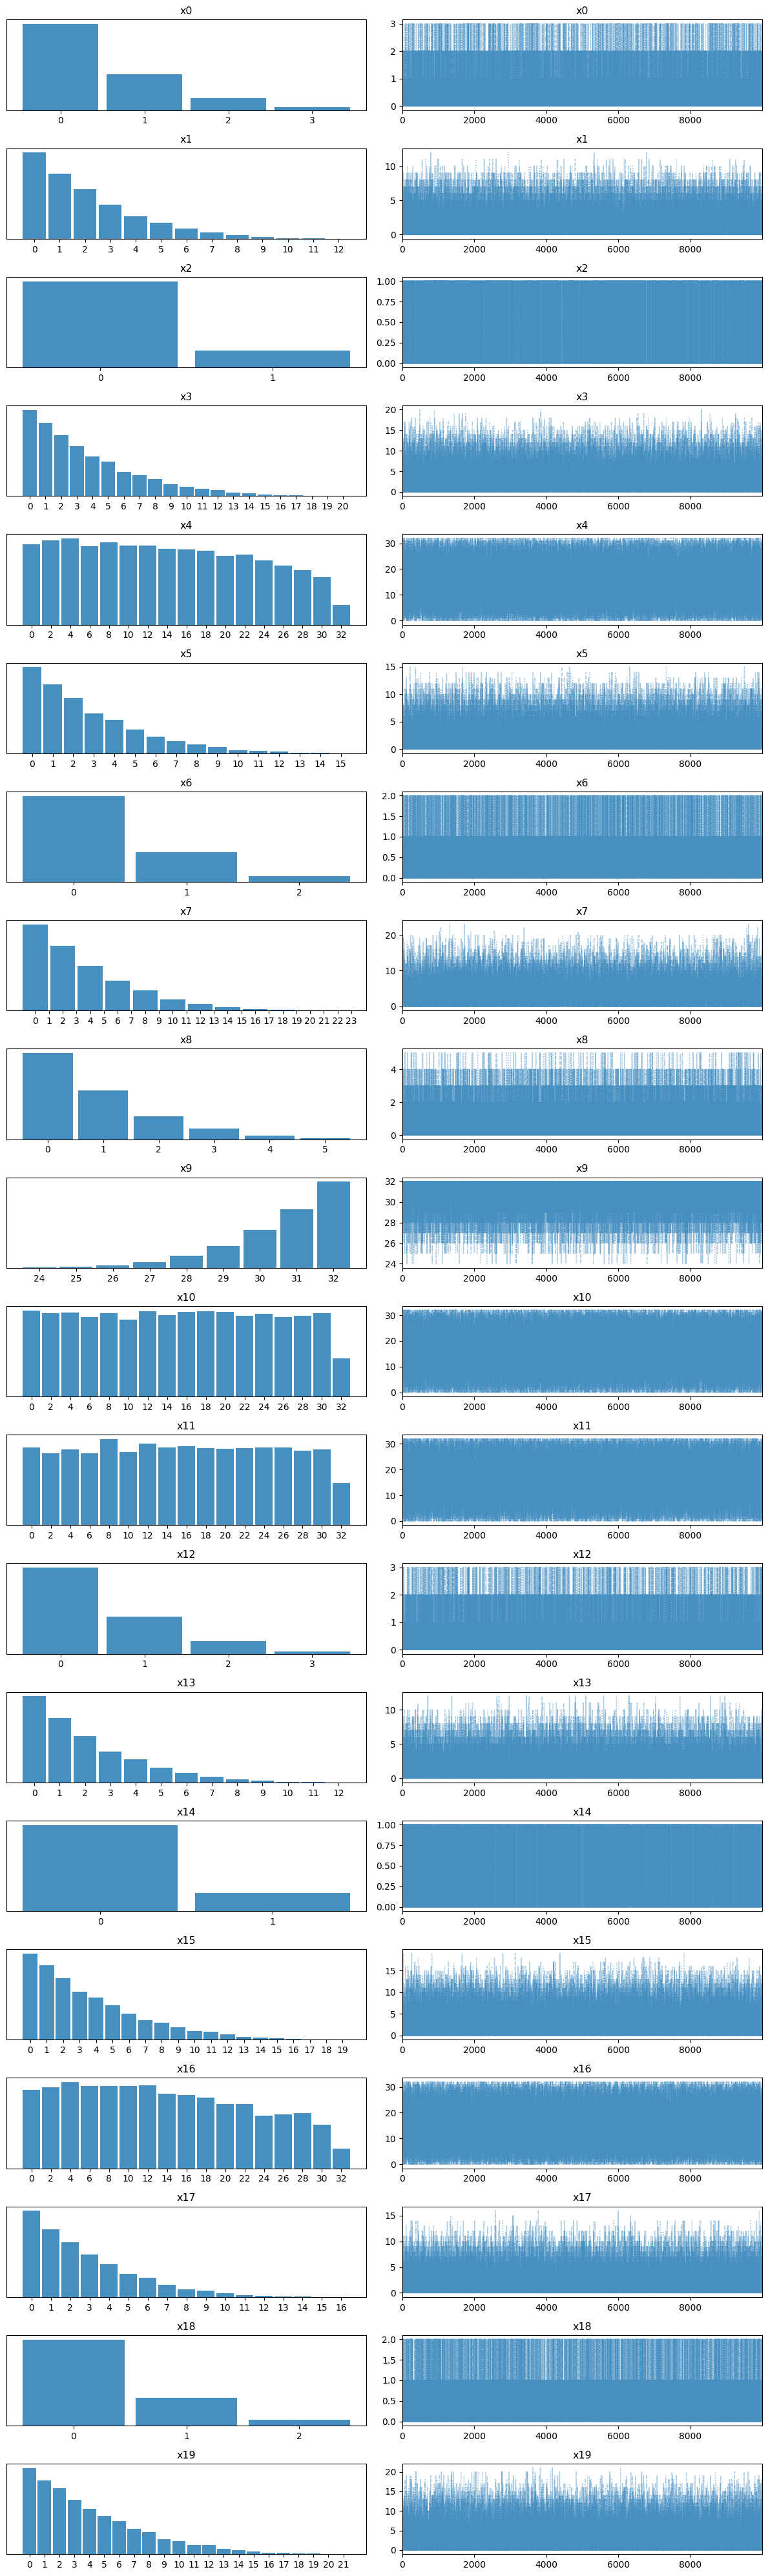

In [23]:
# Plot the posterior
az.plot_trace(trace);
plt.savefig('spur_trace_plot.png', dpi=150);

In [24]:
# Diagnosis
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,0.493,0.734,0.0,2.0,0.004,0.003,39726.0,39084.0,1.0
x1,2.008,2.072,0.0,6.0,0.010,0.007,40370.0,39808.0,1.0
x2,0.165,0.371,0.0,1.0,0.002,0.001,38540.0,38540.0,1.0
x3,3.544,3.433,0.0,10.0,0.017,0.012,39854.0,39692.0,1.0
x4,14.533,9.145,0.0,29.0,0.046,0.032,40086.0,39187.0,1.0
...,...,...,...,...,...,...,...,...,...
x67,4.089,3.831,0.0,11.0,0.019,0.014,39051.0,38230.0,1.0
x68,0.831,1.043,0.0,3.0,0.005,0.004,39811.0,38752.0,1.0
x69,30.657,1.496,28.0,32.0,0.008,0.005,39226.0,39177.0,1.0
x70,16.112,9.549,0.0,31.0,0.048,0.034,39296.0,39205.0,1.0


In [31]:
utils.save_trace(trace, f'books_SAT_{num_vars}_{num_bits}.nc')